In [1]:
######  Import required libraries #########
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import pandas as pd
from pathlib import Path as Path
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt, dates
import numpy as np
import numpy as np
from matplotlib import gridspec
import os
import glob
import dataframe_image as dfi
import itertools
import matplotlib.patheffects as pe
import matplotlib.dates as mdates
# from matplotlib.dates import DateFormatter
from matplotlib.dates import YearLocator, DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#### Specify Path of data and Loaing data #######

# Path1=Path('/media/kenz/DISK/Data for publications/')

file_path = Path('/media/kenz/DISK/Data for publications/Data')
file_path_sgf = Path('/media/kenz/DISK/Data for publications/stephen_DClimdata')
file_path_per=Path('/media/kenz/DISK/Data for publications/stevepercent')
file_path_cgf= Path('/media/kenz/DISK/Data for publications/stevecgf')

################## Reading data for Stations  ###############
dat = pd.read_fwf(file_path/'GMet_location_avgSI.txt', names = ['Station', 'Longitude', 'Latitude', 'St'])  ###

######  Loading sgf data #######

RR_sgf = glob.glob(os.path.join(file_path_sgf, '*dRR_sgf.txt'))
Tx_sgf = glob.glob(os.path.join(file_path_sgf, '*dTx_sgf.txt'))
Tn_sgf = glob.glob(os.path.join(file_path_sgf, '*dTn_sgf.txt'))
Tm_sgf = glob.glob(os.path.join(file_path_sgf, '*dTm_sgf.txt'))

######  Loading cgf data #######

RR_cgf = glob.glob(os.path.join(file_path_cgf, '*mmRR_cgf.txt'))
Tx_cgf = glob.glob(os.path.join(file_path_cgf, '*mmTx_cgf.txt'))
Tn_cgf = glob.glob(os.path.join(file_path_cgf, '*mmTn_cgf.txt'))
Tm_cgf = glob.glob(os.path.join(file_path_cgf, '*mmTm_cgf.txt'))

##### Loading Percent Avail data ######
RR_per = glob.glob(os.path.join(file_path_per, '*percentavail_qc_RR.txt'))
Tx_per = glob.glob(os.path.join(file_path_per, '*percentavail_qc_Tx.txt'))
Tn_per = glob.glob(os.path.join(file_path_per, '*percentavail_qc_Tn.txt'))

#ds=pd.read_fwf('/media/kenz/DISK/Data for publications/stevepercent/Bole_percentavail_qc_RR.txt', names = ['Year','Month','Value'])


In [3]:
RR_cgf

['/media/kenz/DISK/Data for publications/stevecgf/Yendi_1960_2020_mmRR_cgf.txt',
 '/media/kenz/DISK/Data for publications/stevecgf/Tamale_1960_2020_mmRR_cgf.txt',
 '/media/kenz/DISK/Data for publications/stevecgf/Wa_1960_2020_mmRR_cgf.txt',
 '/media/kenz/DISK/Data for publications/stevecgf/Zuarungu_1960_2020_mmRR_cgf.txt',
 '/media/kenz/DISK/Data for publications/stevecgf/Damongo_1960_2020_mmRR_cgf.txt',
 '/media/kenz/DISK/Data for publications/stevecgf/Bole_1960_2020_mmRR_cgf.txt',
 '/media/kenz/DISK/Data for publications/stevecgf/Kete_Krachi_1960_2020_mmRR_cgf.txt',
 '/media/kenz/DISK/Data for publications/stevecgf/Navrongo_1960_2020_mmRR_cgf.txt']

### Study Area ####

#### Specifying Boarders for the study area map #####

In [4]:
##### Functoin to Draw a zebra border around maps ############

crs = ccrs.PlateCarree()
def add_zebra_frame(ax, lw=4, crs="pcarree", zorder=None):

    ax.spines["geo"].set_visible(False)
    left, right, bot, top = ax.get_extent()
    
    # Alternate black and white line segments
    bws = itertools.cycle(["k", "white"])

    xticks = sorted([left, *ax.get_xticks(), right])
    xticks = np.unique(np.array(xticks))
    yticks = sorted([bot, *ax.get_yticks(), top])
    yticks = np.unique(np.array(yticks))
    for ticks, which in zip([xticks, yticks], ["lon", "lat"]):
        for idx, (start, end) in enumerate(zip(ticks, ticks[1:])):
            bw = next(bws)
            if which == "lon":
                xs = [[start, end], [start, end]]
                ys = [[bot, bot], [top, top]]
            else:
                xs = [[left, left], [right, right]]
                ys = [[start, end], [start, end]]

            # For first and lastlines, used the "projecting" effect
            capstyle = "butt" if idx not in (0, len(ticks) - 2) else "projecting"
            for (xx, yy) in zip(xs, ys):
                ax.plot(
                    xx,
                    yy,
                    color=bw,
                    linewidth=lw,
                    clip_on=False,
                    transform=crs,
                    zorder=zorder,
                    solid_capstyle=capstyle,
                    # Add a black border to accentuate white segments
                    path_effects=[
                        pe.Stroke(linewidth=lw + 1, foreground="black"),
                        pe.Normal(),
                    ],
                )

#### Area of interest ####

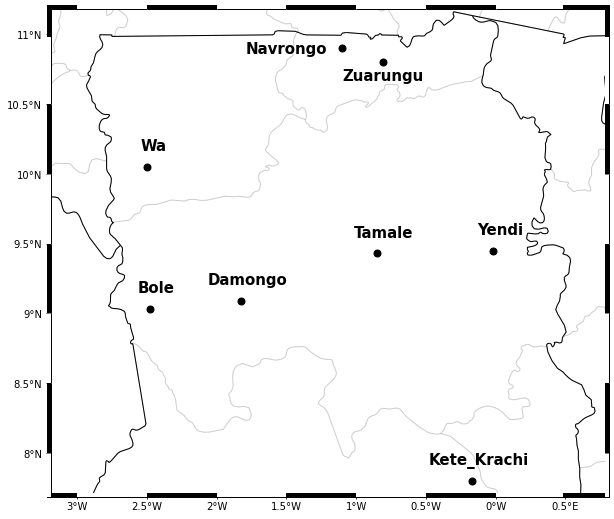

In [5]:
#####################  Plot for  study Area ###########################
plt.figure(figsize=(10,9))                         ###### Specifying the size of the figure
ax = plt.axes(projection = ccrs.PlateCarree())       ###### Specifying the type of geopatial plot
ax.add_feature(cf.COASTLINE,alpha=0.8)             
ax.add_feature(cf.BORDERS)
#ax.add_feature(cf.LAND)
ax.set_extent([-3.2,0.8,11.2,7.7])                   #### setting the map boundaries
#ax.stock_img()
ax.add_feature(cf.STATES, alpha= 0.1)               ####  adding territorial boundaries

ax.plot(dat.Longitude,                            
        dat.Latitude, 
        'ro',                                       ##### plotting the longitudes and latitudes of the station
        ms=7, 
        color = 'k')#,
# for longitude, latitude, name in zip(dat.Longitude, dat.Latitude, dat.Station):
#     if name in ['Damongo', 'Kete_Krachi', 'Wa', 'Bole', 'Tamale', 'Yendi']:
#         ax.plot(dat.Longitude,                            
#                 dat.Latitude, 
#                 'ro',                                       ##### plotting the longitudes and latitudes of the station
#                 ms=7, 
#                 color = 'k')
        #transform=ccrs.Geodetic(),label='Synoptic stations')  

s_stations = np.asarray(dat.Station)
                          
for longitude, latitude, name in zip(dat.Longitude, dat.Latitude, dat.Station):
    if name in ['Damongo', 'Kete_Krachi', 'Wa', 'Bole', 'Tamale', 'Yendi']:
        ax.text(longitude + .05, latitude + .15, 
                name, 
                va='center',
                ha='center', transform=ccrs.Geodetic(), fontweight='bold',fontsize = '15')
    if name in ['Navrongo']:
        ax.text(longitude - 0.4, latitude, 
                name, 
                va='center',
                ha='center', transform=ccrs.Geodetic(), fontweight='bold',fontsize = '15')
    if name in ['Zuarungu']:
        ax.text(longitude , latitude-0.1, 
                name, 
                va='center',
                ha='center', transform=ccrs.Geodetic(), fontweight='bold',fontsize = '15')
    # else:    
    #     ax.text(longitude + .05, latitude + .12,     
    # else:    
    #     ax.text(longitude + .05, latitude + .12, 
    #             name, 
    #             va='center',
    #             ha='center', transform=ccrs.Geodetic(), fontweight='bold',fontsize = '10')


ax.set_xticks([-3,-2.5,-2.0,-1.5,-1.0,-0.5,0,0.5], crs=ccrs.PlateCarree())
ax.set_yticks([11,10.5,10,9.5,9.0,8.5,8], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
add_zebra_frame(ax, lw=4, crs=crs)
# plt.title('')

# #plt.savefig('Synoptic Stations.pdf',bbox_inches = 'tight')
# plt.savefig('Graphs/graphs/Study_Area.JPEG',bbox_inches = 'tight')

In [6]:
RR_cgf

['/media/kenz/DISK/Data for publications/stevecgf/Yendi_1960_2020_mmRR_cgf.txt',
 '/media/kenz/DISK/Data for publications/stevecgf/Tamale_1960_2020_mmRR_cgf.txt',
 '/media/kenz/DISK/Data for publications/stevecgf/Wa_1960_2020_mmRR_cgf.txt',
 '/media/kenz/DISK/Data for publications/stevecgf/Zuarungu_1960_2020_mmRR_cgf.txt',
 '/media/kenz/DISK/Data for publications/stevecgf/Damongo_1960_2020_mmRR_cgf.txt',
 '/media/kenz/DISK/Data for publications/stevecgf/Bole_1960_2020_mmRR_cgf.txt',
 '/media/kenz/DISK/Data for publications/stevecgf/Kete_Krachi_1960_2020_mmRR_cgf.txt',
 '/media/kenz/DISK/Data for publications/stevecgf/Navrongo_1960_2020_mmRR_cgf.txt']

### Funtions ##

In [7]:
###### Percentage calculator function ####
def percentage_calculator(data,variable):
    return 100 - round((len(data[data[variable] == 9.9])/len(data))*100,2)

#### define a funtion to pivot the data. #####################
def heatmap_pivot(x,R,index,column):
    pivot=pd.pivot_table(x, values= R, index=index, columns=column)
    return(pivot)

##### Coefficient of Variation #####
def Cof_V(a): 
    CV=pd.DataFrame()
    RR_data= a.groupby('Month').mean('rainfall')
    std_cv=np.std(a.Rainfall)
    # g=f'{Yendi_RR=}'.split('=')[0]+' CV'
    CV['CV']=std_cv/RR_data['Rainfall']
    # CV.append(pt)
    return(CV)

###### Standard rainfall anomaly function #####
def SRA(X):
    RR = X.RR
    RR_df = pd.DataFrame(RR)
    RR_df['date']=pd.date_range(start='1960-01-01', freq='M', periods=len(X))
    RR_df=RR_df.set_index('date')
    R=RR_df.sub(RR_df.groupby([RR_df.index.month]).transform('mean'))
    std=RR_df.groupby([RR_df.index.month]).transform(np.std)
    tt=R.RR/std.RR
    tt=pd.DataFrame(tt)
    tt=tt.reset_index()
    tt['Month']=X.Month
    tt['Year']=X.Year
    return(tt)

###### Standard temperature anomaly funtion #####
def SAI(y):
    RR = y.Temperature
    RR_df = pd.DataFrame(RR)
    RR_df['date']=pd.date_range(start='1960-01-01', end='2020-12-31',freq='M')
    RR_df=RR_df.set_index('date')
    R=RR_df.sub(RR_df.groupby([RR_df.index.month]).transform('mean'))
    std=RR_df.groupby([RR_df.index.month]).transform(np.std)
    return(R/std)
def SAI_80(y):
    RR = y.Temperature
    RR_df = pd.DataFrame(RR)
    RR_df['date']=pd.date_range(start='1960-01-01', end='2020-12-31',freq='M')
    RR_df = RR_df.loc[240:]
    RR_df=RR_df.set_index('date')
    R=RR_df.sub(RR_df.groupby([RR_df.index.month]).transform('mean'))
    std=RR_df.groupby([RR_df.index.month]).transform(np.std)
    return(R/std)
##### function to convert significan gap filled data into RClimdex data format to perfom quality control #####
#### 
# def Rcli_data(RR,TX,TN):
#     RR.loc[RR['RR'] == 9.9, 'RR']= -99.9
#     TX.loc[TX['TX'] == 9.9, 'TX']= -99.9
#     TN.loc[TN['TN'] == 9.9, 'TN']= -99.9
#     data = pd.DataFrame(RR)
#     data['TX'] = TX['TX']
#     data['TN'] = TN['TN']
#     Station = data
#     return Station.to_csv('/media/kenz/DISK/Data for publications/Rclim_data/' + str(input()) +'.txt', sep=' ', index=False, header=False)


def col(ds,color1,color2):
        return np.where(ds>0,color1,color2)
    
def ARA(X):
    RR = X.RR
    RR_df = pd.DataFrame(RR)
    RR_df['date']=pd.date_range(start='1960-01-01', freq='M', periods=len(X))
    RR_df=RR_df.set_index('date')
    R=RR_df.groupby(RR_df.index.year).sum()
    return(R)

def ATT(X):
    TT = X.Temperature
    TT_df = pd.DataFrame(TT)
    TT_df['date']=pd.date_range(start='1960-01-01', freq='M', periods=len(X))
    TT_df=TT_df.set_index('date')
    t=TT_df.groupby(TT_df.index.year).mean()
    return(t)

#

In [8]:
# p=pd.read_fwf('/media/kenz/DISK/Data for publications/stevecgf/Tamale_1960_2020_mmRR_cgf.txt', names=['U','K','RR'])
# p.groupby
# ARA(p)

### Calculation of percentage of the data available data #####

In [9]:
for i, j in enumerate(RR_sgf):
    p = pd.read_fwf(j, names = ['Year','Month','Day','RR'])
    print('percentage of rainfall data in ',  j[57:-22], ' = ' ,percentage_calculator(p,'RR'))

percentage of rainfall data in  Zuarungu  =  99.65
percentage of rainfall data in  Navrongo  =  99.64
percentage of rainfall data in  Walewale  =  99.96
percentage of rainfall data in  Tamale  =  99.9
percentage of rainfall data in  Yendi  =  99.93
percentage of rainfall data in  Bole  =  99.87
percentage of rainfall data in  Wa  =  99.87


In [10]:
for i, j in enumerate(Tx_sgf):
    p = pd.read_fwf(j, names = ['Year','Month','Day','Tx'])
    print('percentage of Tx data in ',  j[57:-22], ' = ' ,percentage_calculator(p,'Tx'))

percentage of Tx data in  Zuarungu  =  100.0
percentage of Tx data in  Navrongo  =  100.0
percentage of Tx data in  Walewale  =  100.0
percentage of Tx data in  Tamale  =  100.0
percentage of Tx data in  Yendi  =  100.0
percentage of Tx data in  Bole  =  100.0
percentage of Tx data in  Wa  =  100.0


In [11]:
for i, j in enumerate(Tn_sgf):
    p = pd.read_fwf(j, names = ['Year','Month','Day','Tn'])
    print('percentage of Tn data in ',  j[47:-22], ' = ' ,percentage_calculator(p,'Tn'))

percentage of Tn data in  DClimdata/Zuarungu  =  100.0
percentage of Tn data in  DClimdata/Navrongo  =  100.0
percentage of Tn data in  DClimdata/Walewale  =  100.0
percentage of Tn data in  DClimdata/Tamale  =  100.0
percentage of Tn data in  DClimdata/Yendi  =  100.0
percentage of Tn data in  DClimdata/Bole  =  100.0
percentage of Tn data in  DClimdata/Wa  =  100.0


In [12]:
for i, j in enumerate(Tm_sgf):
    p = pd.read_fwf(j, names = ['Year','Month','Day','Tm'])
    print('percentage of Tm data in ',  j[57:-22], ' = ' ,percentage_calculator(p,'Tm'))

#### Graphs of Available data

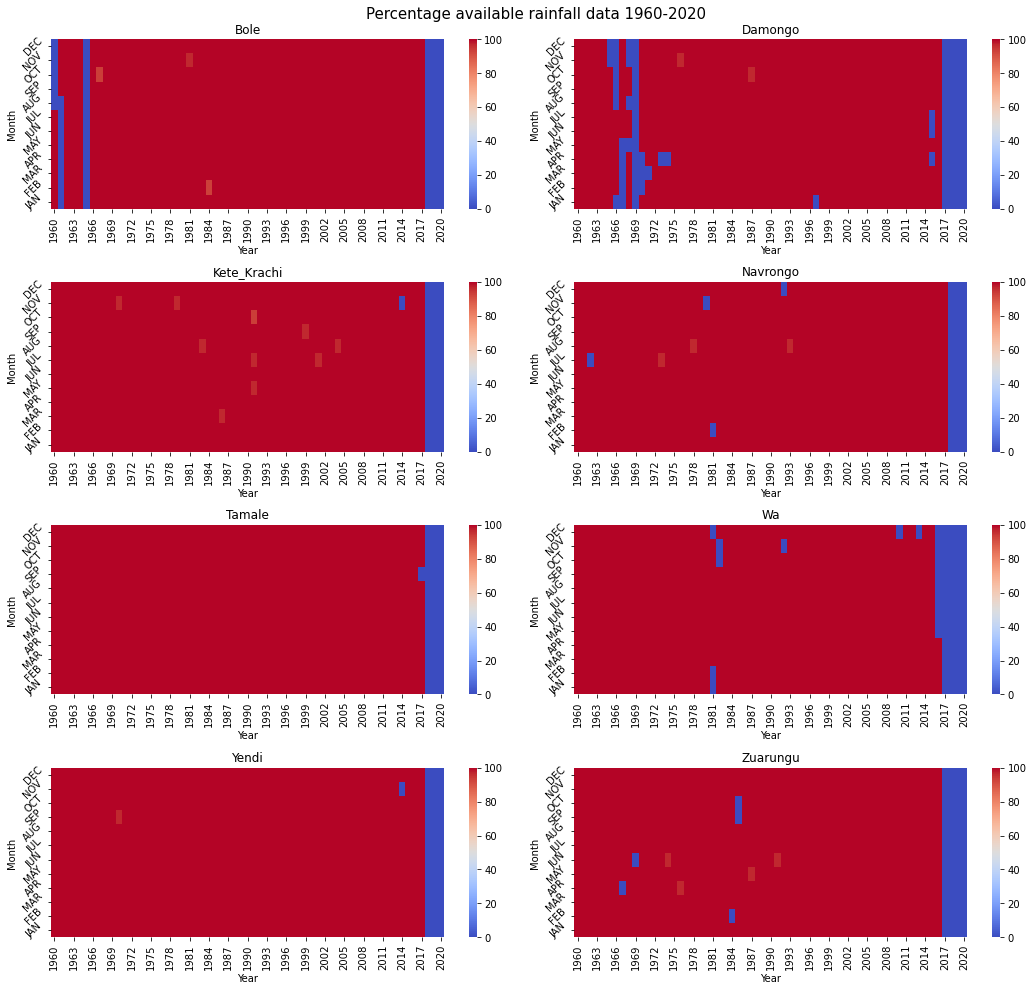

In [13]:
#################### Plot data #############

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,14))
ax = axes.flatten()
# cbar_ax = fig.add_axes([0.09, 0.12, 0.02, 0.7])
# cbar_ax = fig.add_axes([0.54, 0.13, 0.45, 0.03])
# fig.delaxes(axes[3][1])
# RR_all=[Navorngo_RR, Zuarungu_RR, Walewale_RR, Wa_RR, Bole_RR, Tamale_RR, Yendi_RR]
# RR_all_l=['Navrongo', 'Zuarungu', 'Walewale', 'Wa', 'Bole', 'Tamale', 'Yendi']
labels=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV','DEC']

for i,j in enumerate(RR_per):
    # print(j)
    data = pd.read_fwf(j, names = ['Year','Month','RR'])
    sns.heatmap(heatmap_pivot(data, 'RR', ['Month'], 'Year'), ax=ax[i], cmap='coolwarm', vmax=100)#,
                #cbar_ax=cbar_ax, cbar_kws={'label': 'Monthly Rainfall [ mm / month]', 'orientation': 'horizontal'})
    ax[i].invert_yaxis()
    ax[i].set_yticklabels(labels, rotation=45)
    ax[i].set_title(j[52:-23])
plt.suptitle('Percentage available rainfall data 1960-2020', fontsize=15)
fig.tight_layout()
# plt.savefig('Graphs/graphs/avail_data.JPEG',bbox_inches = 'tight')
# plt.title(

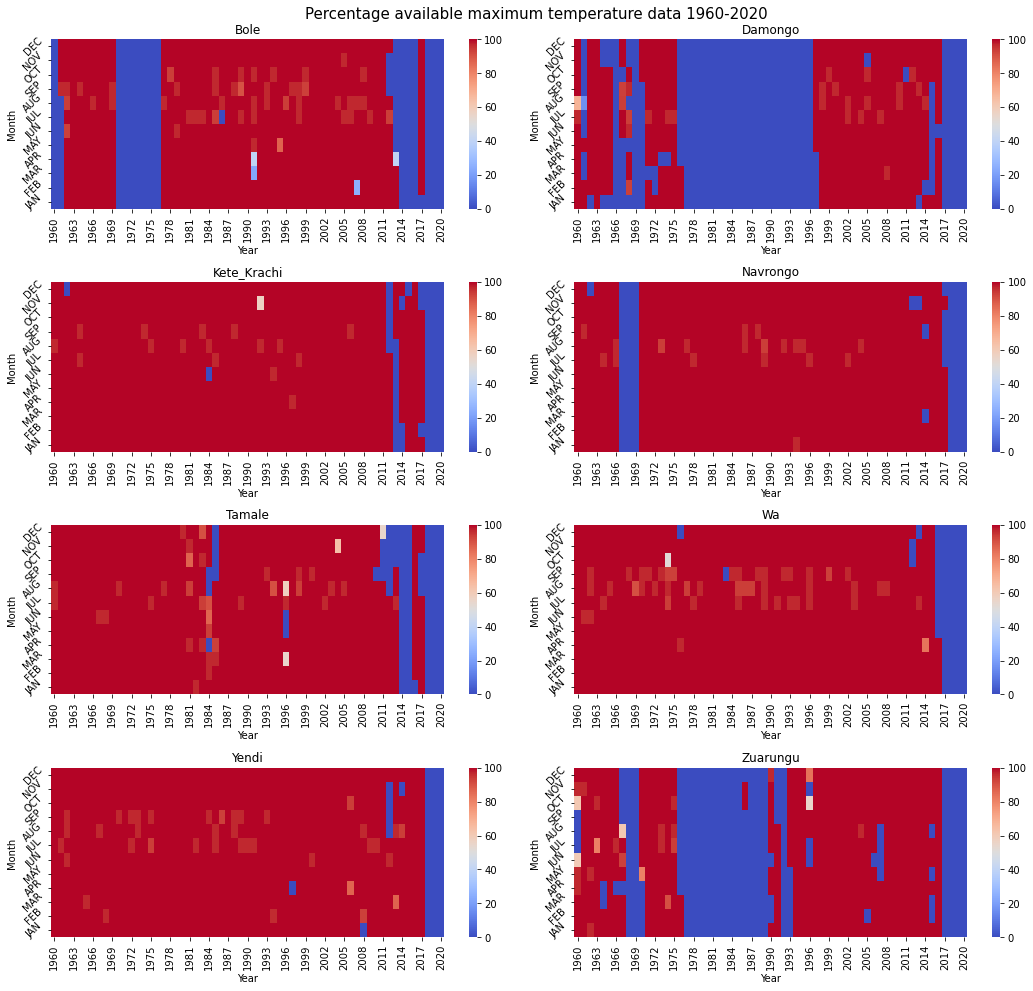

In [14]:
#################### Plot data #############

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,14))
ax = axes.flatten()
# cbar_ax = fig.add_axes([0.09, 0.12, 0.02, 0.7])
# cbar_ax = fig.add_axes([0.54, 0.13, 0.45, 0.03])
# fig.delaxes(axes[3][1])
# RR_all=[Navorngo_RR, Zuarungu_RR, Walewale_RR, Wa_RR, Bole_RR, Tamale_RR, Yendi_RR]
# RR_all_l=['Navrongo', 'Zuarungu', 'Walewale', 'Wa', 'Bole', 'Tamale', 'Yendi']
labels=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV','DEC']

for i,j in enumerate(Tx_per):
    # print(j)
    data = pd.read_fwf(j, names = ['Year','Month','RR'])
    sns.heatmap(heatmap_pivot(data, 'RR', ['Month'], 'Year'), ax=ax[i], cmap='coolwarm')#, vmax=100,
                # cbar_ax=cbar_ax, cbar_kws={'label': 'Monthly Rainfall [ mm data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABAkAAAPfCAYAAAClx5A9AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOzdd5gkVdn+8e89u+Qlg4CAoJIUfyqvK4r6iorAogQDEkwg6CqKAVGCvipGDIhidhUVRDEgStJFQEERlWAgiiA5xwV2WRZ25/79UTXQjDM9PTMdqnruz3XVNdPVVaee6unu88ypc07JNhERERERERERA70OICIiIiIiIiKqIY0EEREREREREQGkkSAiIiIiIiIiSmkkiIiIiIiIiAggjQQRERERERERUUojQUREREREREQAaSSIiD4g6TBJblhukfQLSU/tdWzjJekgSS/pdRy9JulsSSc0PD5M0l0TKMeS9h9jm73L7WZMJNYqqfu5SNpN0t69jqNXJG0n6X29jqMZSRdK+sE499lS0mFtjGFNSV+RdL6khyVdN8p2y0g6UtJtkh6U9EdJM0fZdrakSyU9JOl2ST8dYZu3Sbqq3OYiSdu0EOtKkj5exnpfGcsvJW0ywrbrls/Nl3SXpK9JWr4TZUVENJNGgojoF/cBW5XLB4BnA2dJWqGXQU3AQcBLeh1EBbwTOLTXQdTQaRSfgQd7HcgE7Qbs3esgemg74H29DqIDtgQ+1sby1gV2B24D/tFku68A+wKHAa8F5gNnStqgcSNJnwI+D/wA2B54N3DXsG32AL4FHAvsAFwGnCrpGWPE+iTgbcDpwK7A24F1gL9KWr+h/OnlNhuU5/Ze4HXAnA6VFRExqum9DiAiok0W2/5L+ftfJN0A/BF4BfDziRQoaTnbC9sVYLTO9uW9jqGObN8J3NnrOOIxvfwe6ePvsIttrwUg6QiKf5gfR9J6FA0Es21/r1z3O+Aa4IPA/uW6zSkaJGfZPqOhiJ8NK/LjwDG2P1nudw6wBXAI8MYmsV4LPLXx7yDpj8ANwD5luVD8E/80YCPb15bbPQL8RNLHbV/V5rIiIkaVngQR0a8uKn9uCCBpWUmfl3SjpEWS/inpFY07SLpO0hclfUTSTcD95fppkg6V9O9y35uGd7eVtEvZDfehsgvo5yUt1fD8YWWXzy0k/aXs+vp3Sf/beHxgdeBjemzoxEvK5w6UdEHZxfR2SadI2mhYDJL0SUl3SLpf0vck7VGWs2HDdmO+FiOR9FlJl5TdV2+S9CNJazc8f4yk80fYb39JC1V2gW/xXB433GCEMlcou89eWb6W10r6uqSVRth8aUlHSbpH0jxJX5W09BjnOu7XSNKG5Wu9h6Tvl3+DmyS9sXz+IBVDYe6U9DlJAw37bibpJ+XxHpR0maT3Ddvm6+W+T2hY99rymNuWjx833GCSMf1A0oWjnOOODess6QAVn527y/f5B8rn9pJ0Tfm6f0/Ssk1evx9QXO3duuH9f1jD861+xp5XbrdQ0rmSnizpCZJ+Vb53r5D0smHHvk7SESo++7eV2/1I0srDtltN0rfL9+1Dks6T9Lxh21jS+yV9WdKdwCXl+ldKOkOPfT7/Imm7xviBA4ENGs7/B+Vz//V5kPSScptnDPvbvEHSsZLmAae0Gvcof5NnSPpTuc8VknYeYZutJJ1cvo8WSPqHpDc0PL838NWG18aSzi4fj/m+H4ntwbFiB/4fMA04s2G/RRSNx69s2G4v4D/DGgiGn+NTgE1oaDgoY/g5Ra+CZrEuGN5QY/se4HrgCQ2rdwAuGPqnvvQr4GFgVrvLiohoJj0JIqJfbVj+vK38eQKPdXn9D0W35pMlzbT9j4b9Xk/RjfSdPPYd+W3gzRTdUc8BVqPhypWk3YDjy+0+BDwVOJyiIfYDDWUvDxwDfKmM62PALyU9yfaDwKuB35exfrfcZ+iK+nrA1yiSwZWAdwB/krSJ7fvKbd5XHv/TwLnALmXMw7X6Wgz3BOAzwC3AmhT/0PxO0v+zvQT4CfBrSU+xfU3DfrsBp9meP45zGcvyFP8AfJjiyvn65e8/p+gu3OhA4C/AG4DNKV6fhyiuJo5moq8RwOeAH1H8w7sPcIykLSi6/u4DPAf4FPB3itcMiu7TV5b7PUAxXObjwHIU7yUohqJsT/E+e7WKxoJvAt9q9g/OJGIajwMphjrsCewIfKGM77nAeyi6SX8J+Dfw2VHK+GS53SoUnz+Am2Dcn7E5FO/7BRTdzX8ILAJ+A3yD4nX8uaT1y8/dkD2Bqym6c69TlvFdiquySFqG4h/OVSjeO3cA+1F0X9/Y9m0NZX0Q+APwJh67IPNkin/ajwAGKf6R+42kF9v+U3msjYGXUXwXwMR6hRwBnFjGvWSccT9K0nIUXdbvovheXA74MjADuLRh0w2AP1F0xX8IeCHwfUmDto+neF98keI9slW5z/3lz1be9xM11CD18LD1iygaYpYv//7PAy4pG2n2B1akaEh4t+0ryn02K3/+a1hZVwCrSVqz7MXTEklrAhtRvB+HbMZj3/cA2H5Y0n8ajt/RsiIiHmU7S5YsWWq9UIw3vYvin/rpFFd8fk+RiK4DbAMY2HrYfn8Aft7w+DrgVmDZhnWblfu+Z5Rji+Kf3e8PW78PsBBYvSFGAy9r2ObZ5bpZDevuAg4b43ynUSTRDwBvblh3K/D1Ydv+ujzGhuXjll6LFl7zaRQJvoEXl+uml/Ef0rDduhT/EO3a6rmU688GThj+N24Sz3SKf04MPKlhvSkS+4GGdR+mGLO/Wvl473K7GZN5jSgaptz4XqBoBHkEuAqY1rD+fOCnTd5T0yn+Gb5m2HMvBJZQ/PP5C4oGjBkNzw8/lwnHRDE++8JRznHHYa/x7xseD5TvxXuBlRrW/wz46xjvqxOAsyf5Gdu6YZt3lus+2rDu6eW6HRrWXQfcM+y1fAPFe/dp5eN9Kf7h3HjY++4/wBeGvR5/H+M8B8p9Twe+17D+COC6EbY/m4bPQ7nuJeWxnjHsb/PLYdu1FPcIx3xn+T5Zb9j7z8APxnjvfhv4XcP6/QGP8ZqM+r4fY7/RXrP/V8a607BjXF6uf2K57kqK75/LKRpndgL+Wb7nlm14LxhYZdgxXl6u36TVeMv9jgXuHnrvluuuAr48wrbnAj/uRllZsmTJMrRkuEFE9IvVKRLaRyiSvqcAu9u+lSKRu43iavX0oQU4Cxg+0/VZth9qePzS8ucPRjnuJhRXP382rOzfUVzJapzU6hGKZH9IYy+BpiQ9v+yqfDewmOKf3Bnl8aG4kr42cPKwXYc/Hs9rMTyGHcpuyveVMdxUPrUJgO3FFFcwd2/Y7XUUV3RPG8e5tETSm1QM2ZhP8dqe2xhPg5P8+O7JJ1I0TIw24diEX6PSWUO/2L6f4mrwOS56Wwy5mqIBZehcllUxa/nVFFc6H6Ho8fDk8thD5f0JOBL4DvAqYG8/1kOjrTGNU2P5gxRjpy8qjzXZ8sfzGXuY4ipw4zEptx2+bngsZwx7LU+k+KfyueXjl1MMY7q2IQYoehcNf1+cNuwxktZTMSTnZor3/SMUExWO633fguHHHk/cjbak+BsOfc6H3n93NG4kaVUVdxq4nse+g2fTwnm1+r6fCNuXUPRwOELSc8or7p9piGvovT8ArAC81vYvbZ9C0ViwLkXjwOOKHX4Kjesb35+Spo0Ul6T9KOYweKvtu8cof+gYI61va1kREY0y3CAi+sV9PHZV5zbgFttDydAaFP9APzLCfkuGPb592OPVgQXD/tlptEb589ejPL9+w+/3N/6z6qL7JzzWLXZEkp4E/JbiSu/bKbr7P0zxz8DQvkNzAwzv8jr88Xhei8YYnkvR4PBLiu7id1C81n8ZFv9PgLeVQwf+TdFgcLLLcbQtnsuYJL2a4graNymuPN5D0WvklyOUc8coj9cZpfgJvUYN5g17/PAo6xrj/BzwVoqu1n8rt98F+L9yu8Z/Xo+n6GJ/se3Gf4jbHdN4dLL88XzGHhjWIDTU1fzRWJp87h73PrG9sGyAGnqfrAE8n5HfF/8Z9vhx3yPlGPuTKbqyf5SioWIB8AkeP5a8HYZ/h40n7kZr89+fHUZY94Oy/E9SNHzeTzGcYZcWYh3P+34i9qYYgjQ0t8ZlwFEUdy+4p1w31INkaGgBtq9RMUfM08tV95Y/V6Goa2h4DDBPxbwv1zY8dz2PDXsDoJzT4avAwbZ/OSzWexvKa7QK//1ZamtZERHDpZEgIvrFYtsXjvLcPcDNFFdexzL8KsvdwAqSVhqloWAo0ZxNMZ57uGtHWDdesyjGWu9iewE8eour1Rq2GRpXvOawfYc/Hs9r0ejVFA0Ouw81vmjYbcRKZ5ex7C7pWIrxvo1ji1s5l1a8jqLr+tDYdSRtPcq2w/8JG3p86yjbT/Q1mozXAV+1/egcEpJeOXyj8rWaQzEZ3uaSZtvu1G3NHgKGT/A43r9TO3TjMwbD3iflmPwZPPY+uYfin839Rth30bDHw79HNqKYCX8H23OHHaMV4/lbDD/2eOJudBsjj19vnDhzWYpJAPe3/a2G9a32VG3pfT9Rtq8GtignHlyKYk6MrwJ/sz3UaHIFRU+V4UQx3AQem4tgM4p//ml4fI/tO8seVs9teO5xr62kF1A0on7L9hdGON6/GPZ6q5hg9SkU8z10pKyIiJGkkSAipoKzKCbNmm97+MRTYxnqpvxmisn2hruS4h/KDW1/Z+IhPmqkq63LUSSrixvW7cbjv8NvpEjqd6EY5zxk+GzkE30tlgMeaeidAf/dFRfbgypmYd+d4h+b+4G5DZu0ci6txjP8H5z/iqe0i6RDG64wv4ZiLPulo2w/mffLRD3ufMquynuMsN2HgE2BZ1JcgT1C0m9tX9eBmG4CNpS0bMMQnG07cJxGI73/2/0ZG822kmY0DDl4DcU/3EONj2dRDA+4wfZIV9ibGWoMaPwbb0Axxv/ihu1G621xE/Di4fG2eOyJxn0B8AZJ6w0NOZD0Qh7fmLIMxbwijee1IsX3TuN3xcPlc43vJWj9fT8pLidSlbQGxffNhxuePhXYS9LTXd56VdJTKSZk/OfQ/pL+TdGocXq5zUD5+DflNg/z2HvlcVTcZvFUiu/C94wS5m+A10vawPZQQ8TOFK9xY8NS28qKiBhNGgkiYio4gyKxO0PS5yi6nK5EMXHgsrYPHW1H21dKmgN8UcVs7X+g6LK5q+09yn+KDwR+qOL2e7+hSIifQnElelc/fgb1sfwLeKWkuRRdba+kaKiYRjFj+NEUM/R/gMd3oV4i6QsUs8rfSTEWd2eKybvgsStiE30tzgDeJ+nLFDO0v4DR7w3+U4qJyg6gmEStcXbxMc+lRWcAX5f0YeCvwCsoJhwcyYoUs9l/pzzeR4Gvubh12GhlT+j9MglnAO8qx2bfA7yLIqF/lIq7Efwfxazr10r6OMWdBL4naZthDTjt8CuK7vDfVXErvi2At7T5GMP9i6JR51UU/xjfYvuWNn/GRrMQOK38HK0DfIHi/Ts0d8ixFHfiOFvSEcA1FMORtgRus/2lMc7rJorvkY9QvCc/TtH4MXy7tVTcNvBSisk6r6MYRrOvpC9RDM15Kf99F4/RTDTu71O8305TMfP/chRDCu4a2sD2fZIuAD4q6X6K75lDKLrkN96OdKix7b2Sfkcx9OpKWnjfj0bS0B1mNgGWb3h8jss7DUh6D0VvsJsp7hxxKEUvnKMbivolxVCHEyX9H8WQok9Q9Dr4acN2hwHHlcMQ/kRx68SNKe780CzOJ1D8Yz6f4m4bW5bDXShfh6H31wkUjRcnlu+RlSnuCPJj21e1u6yIiKY6MRtilixZsnRzYYyZ78ttlqFIyq+m+AfjNopk65UN21wHHDHCvtMoZ9wu972J/55pfQeKCdMWUFw9/wfFLeWmN4uR4mrb/g2Pn0Mxzn9B+dxLyvVvphg/vLB8/nnD46XoHvtJimEBD1DcVmw/hs3K3cprMcpreBBFj4UFFLdU23h4/A1x3FA+t/0I5bRyLmfT5O4G5d/kCIrx0fdTzPT/PEaeef/9FL1A7qX45+XrwDIN2+xNwx0BJvoaMcLM/6O9rxh25wBgLYp/Vu6nGFP+eYpb8Zmiy/vSFFecTx9WzrPL+N490rlMJqaG8v5DMbnkqRSNQyO9xsPfA4/7+43jc7pG+TrcU5Z72GQ+Ywy7A0CTz911FLfpO6x8/RdQzP2wyrD9VqYY034jj30XnAi8sNnrUa5/LsVcHAspZp/fe4T3wbIU/5wPzfnxg4bnDi2P+wBwHI9drR9+d4MdRzj2mHGP8vd4JnAexdX+KykaZS4cFtdGFI1/Cyg+9wcN/1tQfCd8nmIOkkHKO1gwxvt+jNg8yvKShm0OphiOsqg8988By49Q1lrl3/u+8vX9JQ13SWnY7m0U3wmLKBoWtmkW47D34EjL2cO2XY+icW4+RePG1xvjbWdZWbJkydJskd3uCw8REVEVkr4LbGt7g17HElFV5dXhE2x/oNexRERE9FqGG0RE9AlJz6CYC+A8iqt1O1B0Dz+4l3FFRERERH2kkSAion8sAF5EMR/AChSzcB9M0Y06IiIiImJMGW4QEREREREREQC0eh/biIiIiIiIiOhzaSSImAIk7S3p3F7HERERERER1ZZGgogakXSdpIWS5ku6V9JpktbvdVwRERHRHg11/QOS5kk6T9I7JCVvj4iuyJdNRP3sZHsGsA7FfaW/2uN4IiIior12sr0isAHwWYpJaI/ubUgRMVWkkSCipmw/BJwAPB1A0sqSjpV0p6TrJf3faFcdJG0m6QxJ90i6UtJu3Yw9IiIixmb7PtsnU9zedi9Jz5D0Skl/l3S/pBslHTa0vaQNJVnSW8rn7i17ITxX0sVlz4SvNWw/UOYL10u6o8wjVh5W1l6SbpB0l6QPN+y7nKRjymNcIekgSTc1PP80SWeXx7xM0s5dedEiYtLSSBBRU5KWp0ga/lKu+iqwMvAUYGvgzcBbRthvBeAM4MfAE4A9gW9I2rwLYUdERMQ42T4fuAn4X4rb3b4ZWAV4JbCfpFcN2+V5wMYUecKXgQ8DLwc2B3aTtHW53d7l8lKK/GEG8LXHF8WLgE2BbYCPSnpauf5jwIblftsCbxzaQdJSwCnAbylyjXcDP5K06QROPyK6LI0EEfXzK0nzgPspKuUvSJpGkQgcavsB29cBXwTeNML+OwLX2f6+7cW2/wb8Ati1K9FHRETERNwCrGb7bNuX2B60fTFwPMXFgUaftP2Q7d9SNCocb/sO2zcDfwS2KLd7A3Ck7WtszwcOBfaQNL2hrI/bXmj7n8A/gWeV63cDPmP7Xts3AV9p2Of5FA0On7X9sO3fAadSXJiIiIpLI0FE/bzK9irAMsD+wDnAesDSwPUN210PrDvC/hsAzyu7/80rGxzeAKzdyaAjIiJiUtYF7pH0PEm/L4cX3ge8A1hj2La3N/y+cITHM8rfn8h/5w7TgbUa1t3W8PuDw/a9seG5xt+fCNxoe3BY2SPlJRFRMWkkiKgp20tsnwgsoWixf4SiAWDIk4CbR9j1RuAc26s0LDNs79f5qCMiImK8JD2X4h/scymGC54MrG97ZeBbgCZY9C38d+6wmMc3KozmVoqLFEMa77Z0C7D+sLmRRstLIqJi0kgQUVMq7AKsClwK/Az4tKQVJW0AvB84boRdTwU2kfQmSUuVy3MbxhhGREREBUhaSdKOwE+A42xfAqwI3GP7IUlbAq+fxCGOBw6Q9GRJM4DPAD+1vbiFfX8GHCppVUnrUvRuHPJXimEOB5V5xkuAncrziIiKSyNBRP2cImk+xZwEnwb2sn0ZxaRAC4BreOxKw/eG72z7AWA7YA+Klv7bgM9RDF+IiIiI3jtF0gMUvf8+DBzJY5MRvxP4RPn8Ryn+WZ+o7wE/BP4AXAs8RJFPtOITFJMpXgucSXHHpUUAth8GdgZ2AO4CvgG82fa/JhFrRHSJbPc6hoiIiIiIqDFJ+wF72B4+iWJE1Ex6EkRERERExLhIWkfSCyUNlLc2PBD4Za/jiojJSyNBRERERUj6nqQ7JF3asG41SWdIuqr8uWrDc4dKulrSlZK2703UETFFLQ18G3gA+B1wEsWwgojosE7nC5UabiDpxcCGwAW2r+hxOBEREV1V1oPzgWNtP6Nc93mKSco+K+kQYFXbB0t6OsWkY1tS3G7sTGAT20t6FH5XJFeIiIiprtP5QmV6EkjaCfg6YIr7t0ZEREwptv8A3DNs9S7AMeXvxwCvalj/E9uLbF8LXE2RAPSt5AoRERGdzxemty/UiZM0E/gC8CbbF0y0nBftdM6o3SIOnTt7osXWyuGz5vQ6hHGbKn+biDrqxndKs++Adh7/3FO2nuh9xFt22lKbNu2et+Pif78daDzhObbHOsm1bN8KYPtWSU8o168L/KVhu5vKdX2pXblCs7/RaO+3idRT7XzvtvszUtV6t445THRPVd+30T3d+I6oca4AbcwXKtFIAKwB/ML2BZKWsb2o1wFFRESMl5Zqnlv4Ec8B2pXljHSw6owhbL/kChERUXtdzhVgAvlCTxsJJK1k+37gScDzAGwvkiSXkyVI2hx4xPa/exhqRETEmKYtN60Txd4uaZ3yqsA6wB3l+puA9Ru2Ww+4pRMB9FJyhYiI6CcdyhWgjflCz+YkkPRK4KOSBoCfAPdLeiuAbUsaasDYEdiiR2FGRES0bGC6mi4TdDKwV/n7XhQziA+t30PSMpKeDGwMnD+pE6iY5AoREdFvOpQrQBvzhZ40EkjaFvgMcLrtQeBh4BTg2ZLeDmB7saTdgN2Bi3oRZ0RExHhMW26g6TIWSccDfwY2lXSTpH2BzwLbSroK2LZ8jO3LgJ8BlwNzgXf1050NkitEREQ/mmyuAJ3PF7o+3EDSdsDRwCttXyzpKcB2FC0cS4DXSHoD8A/gpcDrbV/d7TgjIiLGq9XKfTS29xzlqW1G2f7TwKcnddAKSq4QERH9arK5AnQ+X+hqI4GkpYBnAncD10lanqL74Am2b5H0Y+CnwM7AbcAXbV/fzRgjIiImStM6Pily30uuEBER/awOuUJXGwlsPyLpO8Ai4ERgA+ATtn9YPr9Y0goUsxcPtlKmpNmUt4h46v87kLU32KkzwUdERIxh2lI9m+qnb3Q6V9h/4AnMGlilI7FHRESMpQ65QlcilLSxpK0kvZRirqGvAqcDC2m4Z6OkvYBPAcu1WrbtObZn2p6ZBoKIiOglTRtousToupUrpIEgIiJ6qQ65Qsd7EpQzE38SuB5YEdhE0k7AVygmITpS0nuBTYH3AHvZXtDpuCIiItqtDlcHqii5QkRETBV1yBU62kggaRbwEeAA2+eU6z5GMfHQK20fJWkQ+C1gYGfbV3QypoiIiE4ZqME4w6pJrhAREVNJHXKFjjUSSFoN+DVFZX6OpGVtP2T745IEnCTpWcAPKSr9s2xfIWll2/d1Kq6IiIhOGVhqWq9DqJXkChERMdXUIVfoWF8H2/cAOwGHS1rd9kOSlimfOwy4AdjE9jzgG2WlvyHwY0nrdyquiIiITtGAmi7xeMkVIiJiqqlDrtDR4Qa2Tyu7CJ4vaabteyUtZfsR4H7gkXK7odmJByhuebQycKMk2XYnY4yIiGiXOowzrJrkChERMZXUIVfo+MSFtn8jaX/gwobK/83A2sDtw7a9RtKdwDeAF6fSj4i6mbHRyBOuz796YZcjad3hs+b0OoS+oYHqV/xVlFwhIqaSZvXuoXNndzGS6IU65ApdidD2b4D9gT9I2g94B7Cv7TskrSFp5YZtDwRukfQagHJMYkREROVNW2qg6RKjS64QERFTQR1yhY73JBhSXiWYBpwIbGH7MklPpbjX8WJJX7c9dB/kvwPPB07MFYKIiKiLqowlrKvkChER0e/qkCt0rZEAwPapklax/WD5+D+SPge8APippO8DFwLfBC6W9Afbp3YzxoiIiIkamF79GYurLrlCRET0szrkCl1tJACw/aCk7YGXAusCPwOOB04HtgU+AZwFnA1sK+n0cvKiiIiISqvD1YE6SK4QERH9qg65QtcHPUjaGfgycBFwDbA1cDSwpu1vlY8BngrsCizT7RgjIiImYmD6tKZLtCa5QkRE9Ks65Apd7UkgaTXgAOAt5ZjCn5f3Od4FeL+kT9m+WNLBwHLASrbndzPGiIiIiRqYVv2rA1WXXCEiIvpZHXKFbvckmAYsDdw5NBOx7RuBU4BbgTXKdYO2F9i+dawCJc2WdKGkC2+7/pQOhh4REdFcHa4O1EBHc4W5g/M6F3lERMQY6pArdKWRQNKTJK1o+07gP8DKti1pOoDt64GHKboMjovtObZn2p659gY7tTfwiIiIcdCAmi4xum7lCrMGVmlr3BEREeNRh1yh440EktYCDgRml7c1+jdwtKQVbC9u2PRm4MZOxxMREdEpdbg6UEXJFSIiYqqoQ67QjTkJ7gQuAGYC+9r+VDm28A+S3l8+/2xgX2D3oZ0kKfc9joiIOqnKFYAaSq4QERFTQh1yhY41EkjaGBiwfaWkHwH3Aa+U9Dbbb5f0QeBNwAbAYuANti+X9CTbN6TSj4iIutG0alwBqIvkChERMdXUIVfoSCOBpNWBK4G7JH0cWALMAVYGNpK0H3Ck7SWSVgKW2F4gaRawn6T9bN/SidgiIiI6pQ5XB6oiuUJERExFdcgVOtJIYPtuSS8HzqSY9+BZwE+B+RSTDm0ODEg62vb9AJK2Aw4H3pVKPyIi6qgqYwnrILlCRERMRXXIFTo23MD27yRtD3yFouJfC3gZsAewJfA04DjgoXK7E4FzbZ8HGWcYsNYLVhv1udvPu6eLkbRuxkbLjfrc/KsXdvw4zY4xkX3GW9ZEy6vb8Zvpxt+53ceJ9tFAt+8sXG/9nCscOnf2uPc5fNacca1vdpxm+0RMFe3Mfdrp01e/d9Tn5ncxjpGM9t3RNObkJONSh1yhoxHaPgP4AHApsMD2McDrKSr9HW3fJ+kFwJeAV1PU998u961kpR8RETGagekDTZf4b8kVIiJiKqlDrtDxuxvYPk3SIPAXSVvZvnvoOUmbAc8E3mL7r5LOA06X9C3b7+h0bBEREW1Vg6sDVZRcISIipowa5ApdidD2b4APAmdKGgCQtCPwDYqGioskLWV7PrAt8AxJ3+pGbBEREe0yMG1a06UVkg6QdJmkSyUdL2lZSatJOkPSVeXPVTt8Kl2XXCEiIqaCOuQKXWvGsH0S8L+2ByXtABwBfBj4nu3Fth+RNM32g8B2wGaSjutWfBEREZOlATVdxtxfWhd4DzDT9jOAaRTj8w8BzrK9MXBW+bjvJFeIiIh+V4dcoat9HWzPlyRgV+CDtv8MLAKQNFDe5mio8n8lsLqktbsZY0RExERp+rSmS4umA8tJmg4sD9wC7AIcUz5/DPCqdsdeFckVIiKin9UhV+jFgIilgY0oWjwABgFsD5aPVy2TgAW2d7B9Ww9ijIiIGDdpYIxFsyVd2LA8bmp62zdTXD2/AbgVuM/2b4G1bN9abnMr8IRun1uXJVeIiIi+VIdcoeMTFw6RtB6wkOJqwLHAUyWtXM5aPFB2LVwdeAvwTXp/B5CIiIhxGesKgO05wKj3pivHD+4CPBmYB/xc0hvbGGKlJVeIiIh+V4dcoSs9CSTtAvwc+B7wW+BdwJOArcrKf+jKwLbA9sAy4yj70ZaW264/pc2RR0REtG6y4wyBlwPX2r7T9iPAicALgNslrQNQ/ryjYyfRI93KFeYOzmtv4BEREeNQh1yh4z0JJL0U+AKwJ3ANsCpwNPCycpMtJV1Vrn8nsGfjrY/G0tjS8qKdzsn9kiMiomfU4qzETdwAPF/S8hRX1LcBLgQWAHsBny1/njTZA1VJN3OF05baNLlCRET0TB1yhW4MN3gB8BXbF0la1va9kt5AcbVgS+DrwG7AzcDuti/rQkwRERHtN8l7H9v+q6QTgL8Bi4G/U/xzOwP4maR9KZKD100y0qpJrhAREVNDDXKFjjUSSJJtA+sBS5WrF5UzEt8i6W3A14CfAj+xvbhTsURERHRDG64OYPtjwMeGrV5EcaWgryRXiIiIqaYOuULH5iQoK32AE4AXSXpOuc6SlgLuo5hoYZlU+hER0Q/aMM5wSkmuEBERU00dcoVuDDf4C3AusLskbF8EDEp6IcXYwq7dYSEiIqKj2nB1YIpKrhAREVNDDXKFjle6thdI+g7wVuBISX8GHgZ2pZh4aB6ApG2AZwEDto8o16nhKkNERESlSV25aVDfSa4QERFTRR1yha60zNu+WdLngd9R3LboHuDVtq8EkDQLOAL4BnCApKfb3qedlf6MjZYb1/bzr1447rKa7dNO4z2Xurr9vHtGfa7Xf4NuaPZ3fsLT1xxx/fyrbxh1n4m8Nt14nSfyfp6x9gqjPtdP74F+OpepYqx7H8foqpArVNVR8z806nPzJ/AdeviskW+/fejc2eMuK6LXmuURo9WjE9mnnXpdvzc7/9G+B+ZPoLxm5zmVv4fqkCt0rfue7YXAH8vlUZKeCXwHONj2jyUdC1wiaTvbv+1WfBEREZOmaowlrKvkChER0fdqkCv0dIxfOSnRw8DpwKqSnmr7P5LOoXmDVURERPXUYJxh3SRXiIiIvlKDXKFnjQRlt8FX2X6HpJ8ArwB2lvR0YDXg/F7FFhERMRGa5L2P4/GSK0RERL+pQ67Qk0YCSdsDnwEOArB9pqT7gbcBzwd2tb24vE/ykl7EGBERMW41uDpQF8kVIiKiL9UgV+h6I4GklwNHAvvb/r2kDYDX2j5S0nTgAWA7SQO2r+h2fBERERNVhxmL6yC5QkRE9Ks65ApdbSSQtAqwH/CPstJ/EvAz4HsAts+TtCywJzBd0lW2F3czxoiIiAmrwdWBqkuuEBERfa0GuULXmjEk7Qi8B/gisLKko4BfAD+0/W2pmObR9u+ALwM/bqXSlzRb0oWSLrzt+lM6dwIRERFjkZov0VQ3coW5g/M6Fn9ERMSYapArdKWRoKz0Pw1cbvs8YF9gLeBWivsdY9uS3iLpOOAK27e3UrbtObZn2p659gY7degMIiIiWjBtevMlRtWtXGHWwCqdOYGIiIhW1CBX6HgjgaS1gQOBt9o+QdLyZaV+JDADeK8KbwDeDnzW9mCn44qIiGi7ATVfYkTJFSIiYsqoQa7QjaaKRcAjwEPlGMKDJL0EuBsYBF4LvBjYEHgDkAmIIiKingaqP86wopIrRETE1FCDXKEbjQTzgNOBI4DNgTOB4ygq+FcD1wBbAJ+zfXkX4omIiOiMGtz7uKLmkVwhIiKmghrkCh1vJCjHD34bOA9YHzjJ9iIoJhICzqao/A+Q9GfbX+50TBERER1Rg6sDVZRcISIipowa5ApdmRnB9nzgz+UCgKTXAc8AzqW41dGBFFcSIiIi6qkGtzWqquQKERExJdQgV+j69ImS1gF2B94GfAA4HJht+/yGbfYBzrB9Y7uO++GNjhpx/ZfvP2TE9fOvXjhqWc2eG82MjZZrW1n9ZiKvTVVft2Zxjfc8m5//DeMLbALHb7e1XrDaiOtvP++eUfcZLebbzr2rLTFNxnhfz9G2n6h2/t0OnTt71OcOnzWnbceZElT9LoR10MlcYZtfHTDqc7+9+n9GfmLueI7Qfh4cfY7G0fKbiBhdr3P5ZjlBVXPcZrqV+/SNGuQKvYhwHnAVsAtwA3C17fMlLQUg6VPA14GjJW3Yg/giIiImZtq05ku0ah7JFSIioh/VIFfoeiOB7YXAnyjGFg4Aa5brHymvHNxgezngIuCjUg2aWiIiIgBLTZdoTXKFiIjoV3XIFbpeqUraBDgM2NL2JcBCST8AsH0rcGy56d+Ah4Glux1jRETEhAxMb75ES5IrRERE36pBrtCLlvdbKeZC2F3SMykmIlpG0o/K5xdJej3F5ERH2X6oBzFGRESMWx2uDtREcoWIiOhLdcgVejHc4AHgUGAJsDewDnAQsJqk3wG/Ag4A3mb7im7HFxERMWED05ov0ZLkChER0bdqkCt0pZFA0uaSvjL0uKz8Pw4MAq8BltjeAXgX8F7gFWX3woiIiPoYGGi+xKiSK0RExJRQg1yho1FIj/aXmA6sIemLQ881VP6rAh8u111h+zrbd47jGLMlXSjpwtuuP6WN0UdERIyPB6Y1XVohaRVJJ0j6l6QrJG0laTVJZ0i6qvy5aodPpWu6nSscPfePbYw+IiJifOqQK3S6qWItANv/BD5B0U3wqKGEoKz8PwQ8WdKMiRzA9hzbM23PXHuDndoVd0RExLhZA02XFh0FzLW9GfAs4ArgEOAs2xsDZ5WP+0VXc4V9Z/1vu+KOiIgYtzrkCh1rJJC0GXCLpC9JeovtfwFfLI/51YZNXwZMoxh3GBERUVuTvTogaSXgxcDRALYftj0P2AU4ptzsGOBVHTmBLkuuEBERU00dcoVO9iRYAPwZuA3YU9LRwEbA8cACSX+RdBBFC8eB5T2RIyIi6ktqvoztKcCdwPcl/V3SdyWtAKxV3vpv6BaAT+jcSXRVcoWIiJhaapArdOxGjLZvlHQ+8D/AK4DdgDdSBPteiisC/wR+ZfvfnYojIiKiW8a6AiBpNjC7YdUc23MaHk+nqDffbfuvko6iv4YWPE5yhYiImGrqkCt0pCdBwyREBwMG1gBuAZ4DXElxW6PlgT+k0o+IiL6hgaZL49j4cpkzrISbgJts/7V8fAJFInC7pHUAyp93dO+kOiO5QkRETEk1yBU60pPAtsvKX8DVwJEUgR9g+1eSNgHuSrfBiIjoJ4Oa3P2Nbd8m6UZJm9q+EtgGuLxc9gI+W/48abKx9lpyhYiImIrqkCt0criBgUWSfgj8Efiq7V+Vzz16RUDSmoBs9+SqyO3n3dOV48y/un05TtOyNmrbYbqmna/NaGZstFxbyxst5rVesNqo+7xvpc+OuP7Qq2ePuL6Z0c6n3a9lO8vr1metW0Z7bSbyXpvI69zO90Cz922MU+uzEjfzbuBHkpYGrgHeQtHz72eS9gVuAF7XjgP1Wqu5ArQvX/jrB7416nMXbfS0EddvN5kDtkGz788vv2DkHqaj1TnNNPv+auf3VEQ7dSOPnKh21tXt/Hx26zXrt/9Z2qYGuULLjQSSXgBs2LiP7WPH2s/2lZIOBjaQtLztBxvKFEVLxxJJH7F9+wjHVZlEREREVNpgi/c3bsb2P4CZIzy1zaQL77BO5ApluckXIiKiL9QhV2ipGaNs4T8CeBHw3HIZKajR/JlijGFjmasDqwEHADOAgyWt3fD80Ku39DiOExER0TuTn7G4tjqRK5TlJl+IiIj+UYNcodWeBDOBp0+0hd72vyTtPnRlQNJSwMeAhcAXgLdT3OfxIElfAG63vUTSi4F9JL0TWJgrBBERUWWTHWdYc23NFSD5QkRE9J865AqtDoi4FFh7zK2aaKz0bT8CfAdYFXgnsAywL7AecJDtQUlbAz+iuO3Rg6nwIyKi6qyBpkufa2uuUD5OvhAREX2lDrlC054Ekk6huC3RisDl5b2MFw09b3vn8RxM0qq27y33vUTSl4EPUFT8XwfeCnxX0onA84H9yxmOM84wIiIqzzW4OtBu7c4VyjKTL0RERF+qQ64w1nCDI9p1IEnLAh+XdIftTwHYvlzSEcCBwD62vyBpP+BLwFtt/zoVfkRE1IUrMpawy9qWK0DyhYiI6G91yBWa9mewfY7tc4BXDP3euK7Vg0haFziF4l6NG0h6f8MxLgeOAmZL2s723cBbWq3wJc2WdKGkC2+7/pRWQ4qIiGi7QU1ruvSjduUK0Ll8oTFXOGXe3RM5zYiIiLaoQ67Q6qCHbUdYt0OrB7F9M8Wsw58Efgg8Y1jFf3G5fnr5eEn5c8wrArbn2J5pe+baG+zUakgRERFtV4dxhh00qVwBOpcvNOYKO62y+nhCioiIaKs65ApNo5C0n6RLgE0lXdywXAtc0soBpOJMbW8N3EXRLfEHFBX/h8pttgL2KJ+PiIiopUENNF36UTtyhbKc5AsREdH36pArjDUnwY+B3wCHA4c0rH/A9j2tHKCceXjA9qDtnSWdTFHxvw04UtJM4CnAB22fP/5TiIiIqIaqXAHosknnCpB8ISIipoY65ApNGwls3wfcB+wpaRqwVrnPDEkzbN/QykFGqPhPBQ63vY2kNYBVbV81tH0mH4qIiDqqyljCbmpXrlCW1XK+kFwhIiLqqA65QkvNGJL2B24HzgBOK5dTx3OgoYq//H1HYJqk023fZfsqSeuWMxVj21INpn2MiIhoYNR06WftyBWgeb4APJhcISIi6qwOucJYww2GvA/YtJxJeMKGXSHYXtKJkva3/TVgPeBNkpa2fdRQ5Z+rBBERURd1uDrQQe+jDbkCjJ4vABeQXCEiImqsDrlCq40EN1J0JZy0xoqforJfuXzqb8BBwEckTbN9ZDcq/7VftMaI6287N3MiVdmMjZYbcf38qxeOa3273X7e6MNvD2V2244zkfPp1mvQTom5O8dp9r5lVtsOMyXU4d7HHdS2XAFGzRcmnSs0/exs1IbAu2zBHaOcz0rjL6vd31/jLq+Gr39MHb3OveqYE03E4bPm9DqEjqtDrtBqI8E1wNmSTgMWDa20feREDlpW/MsA6wMrSXo6MM/2uZI+BRwoabrtz+cqQURE1MWgq391oIPamiuU+w5KehrwGuATwJrJFSIios7qkCu02khwQ7ksXS6TZnuRpIeB1wOrAqtJOg64iWKG5I9Kutv20an0IyKiDqoylrBH2p4rlGYDzwHeQXKFiIiouTrkCi01Etj+OICkFYuHnj+Zg0panWLSxA8BywODwBxgS+DFwArlus9LGrT9/ckcLyIiohsGW5sPuC91MFf4MI/lBckVIiKi1uqQK7R6d4NnSPo7cClwmaSLJG0+kQNKWgr4GPABYAZwILAG8Ezg67Z3B74L/B64C7h2IseJiIjotjrMWNwpyRUiIiLGVodcodVmjDnA+21vYHsDisr6OxM5oO1Hyn1Xpeg6uAywD0XFf4ikVWz/qhzD+FzbZ+cWRxERUQeDHmi69LnkChEREWOoQ67QahQr2P790APbZ1N082uZpFUb9r8E+DKwIfBOYClgX2At4NOSnlhuOr/cPuMMIyKi8upwdaCDkitERESMoQ65QquNBNdI+oikDcvl/xhH1z5JywIfL/cDwPblwBHABsA+tu8H3gWsS3njnvK2R2OVPVvShZIuvO36U1oNKSIiou3qcHWgg2qRK8wdnDeuk4qIiGinOuQKrUaxD7AmcCLwy/L3t7Syo6R1gVOAk4ANJL1/6Lmy8j8KmC1pO9t3Abva/lerJ2B7ju2ZtmeuvcFOre4WERHRdoOo6dLnapErzBpYpdXdIiIi2q4OuUKrdze4F3jPRA5g+2ZJSwOfBA4B9pb0/qH7Jtu+WNIPG2JZMpHjRERE9FpVrgD0QnKFiIiIsdUhV2jaSCDp5GbP2955jP0HbA/a3ros6wiKmYr3lvQh25+RtBWwBzC3LDNjCiMiopaqMpawm5IrREREtK4OucJYPQm2Am4Ejgf+CuM7I9uDDZX/zg2V/9uAIyXNBJ4CfND2+QCS1rN903hPJCIiotfqcHWgA5IrREREtKgOucJYjQRrA9sCewKvB04Djrd9WasHGKHyPxU43PY2ktYAVrV9FYCkDYCPSnpHefujiIiI2rCrf3WgA5IrREREtKgOuULTZgzbS2zPtb0X8HzgauBsSe8ez0GGKv/y9x2BaZJOt32X7asa7m28EHgu8Kxxn0lERESPLbGaLq2SNE3S38t/lpG0mqQzJF1V/lx1rDK6JblCRERE6+qQK4w5caGkZYBXUlwh2BD4CsXMxeMy7CrB9pJOlLS/7a8NjS20fYekM4Dly2Or0+MObzv3rk4WHx0y/+qFvQ6hdmZstNyI69v9Wm6+12Yjrr/smJYnIo+orTaOM3wvcAXlbf4oJvM7y/ZnJR1SPj64XQebrH7JFQ6dO7sdxbTd4bPm9DqEiIiuaPY93C/fhXXIFZr2JJB0DHAe8D/Ax20/1/Ynbd88kYM1XiUALgBWlrSVpNMkfVDSs4BpwGvK7TMxUURE1EY77n0saT2Kf7i/27B6F+CY8vdjgFe1M+7JSK4QERHRujrkCmP1JHgTsADYBHjPYz39EEW9vNJoO46mrPyXAVYEjgOuBX5DcUXgc8AKFBcGnmD7jvGWHxER0SuD7fl39cvAQRT15JC1bN8KYPtWSU9oy5HaI7lCREREi+qQK4w1J8GA7RXLZaWGZcWJVPoN5S6iqOxn2l5YdiP8PLArsBPFeMaPSVp/oseIiIjotrGuDkiaLenChuVx/Sol7QjcYfuiHp3CuCVXiIiIaF0dcoUx5yToBEkrA58BXlh2lVgIfNP2/PL5dwDfAT4t6dCJdlmMiIjoprE6vtueAzQbVPlCYGdJrwCWBVaSdBxwu6R1yisD6wB9f/U8uUJERPSjOuQKPblJo+37gK8DlwIPAhsDv5a0g6SNbT8EzC6fW9KLGCMiIsZriQeaLmOxfajt9WxvCOwB/M72G4GTgb3KzfYCTurUOVRFcoWIiOhHdcgVutpIMOw2DKdT3Ev5ItvvBG4GvgUcI+lg4CHb77B9WzdjjIiImCi7+TIJnwW2lXQVsG35uC8lV4iIiH5Wh1yha40EkrYDzih/YvteiuEOe0raHNgS2B84ENgGWLPFch8ds3Hb9ad0JviIiIgWtOvexwC2z7a9Y/n73ba3sb1x+fOejpxAj3UjV5g7OK8jsUdERLSiDrlCN+ck2BR4BvABSSva/gXFfRsvBN4C7Gn7FCgmY7D9cCuFNo7ZeNFO5+Q2SBER0TODg2279/FU1fFc4bSlNk2uEBERPVOHXKGbjQTHA08BbgDeIGlp28dL+jbw/2z/StJ0inGFj3QxroiIiLYYpPoVf8UlV4iIiL5Wh1yho8MNJD1T0jPLh/cADwObU4wn3LOckfEXwG6Stre92KVOxhUREdEJg4NqusR/S64QERFTSR1yhY41EkhaHfgHcKqkXYHnAB8GFgECfgzsB2xBMfvitZ2KJSIiohsG3XyJx0uuEBERU00dcoWODTewfbeklwNnAs8EngYcQDEz8Zq2j5O0HLAv8FZgAYAk5epARETU0eA4Jxya6pIrRETEVFOHXKGjww1s/47i9gt7Ad8AzqGYmXgHSUsDJwBvsz0fWLlxX0nVf/UiIiIa1OHqQNUkV4iIiKmkDrlCxycutH2WpP2As4GtbH9b0pPLGYkfBpA0i2Im42uBcyT93PaiTscWMaWccN7I65+9RVsPc9kx/2predFbn/7sc0dc/+FDLuhyJPUwONjrCOqpKrnC4bPmjLj+0Lmz23mYthotttHOpd0mcpwqv55RXXX8fEaMpA65Qkd7Egyx/WuKWxhdIGk129dCcQVA0iuBjwNfpOhe+AJg/aHnuxFfREREOwxaTZcYXXKFiIiYCuqQK3SlkQAerfwPAc6UNFBW6mtSTEr0e9u/oUgAlqWo/CMiImplcLD5Es0lV4iIiH5Xh1yha40EALZPAl5se7C8e9EdFGMQXyZp13ISouWAd0k6EfispC0kLdPNOCMiIiaiDuMMqy65QkRE9LM65Aodn5NgONvzJb0EeAXwN+ACitsdfUHSPuVmewMvBJ4NHAm8iuJ2SBEREZVVlfsb111yhYiI6Fd1yBW63kggaXvgc8BpwGsobnl0BPAx4LvA/ravkPQv25a0su37uh1nRETEeFXlCkDdJVeIiIh+VYdcoauNBJKeCfwGeIntP0h6PvAl4Je2TyrnHvqIpKVt/7Dc7f5uxhgRETFRVRlLWGfJFSIiop/VIVfo6pwEwLXAL4G3A9j+C8UsxWuVj0+iuHLwdkkzJKkcezgqSbMlXSjpwtuuP6Wz0UdERDRRh3GGNdDRXGHu4LyOBh8REdFMHXKFrjQSSFobwPYDwOvLdT+X9AVgaeDMoW1t/xyYZXv+WJV+uf0c2zNtz1x7g506cwIREREtWLKk+RKj61auMGtglY7EHxER0Yo65AodbySQtBlwi6QvSXqb7UXAbGAe8G5gV9sPSVp2aB/b8zsdV0RERLvZzZcYWXKFiIiYKuqQK3RjToIFwJ+B24DXSXoR8FPgk8ADwLGS3mT7oS7EEhER0TFLajDOsKKSK0RExJRQh1yh4z0JbN8InA/8D8WtjOZSjDM8FjgaeDLFhEQRERG1ZrvpEiNLrhAREVNFHXKFjjYSqJyCGDgYMLAGcCvFrYyuAj4K/Af4arn9tIZ9uz2pYkRExKTUYZxh1SRXiIiIqaQOuUJHhxuU9y4WIOBq4EiKqwQH2P6VpI2Bu2zfK2kH4JWSVgbeYXuBpAHbNeiQERERUZ2xhHWSXCEiIqaSOuQKHZ+ToJx1eJGkHwJ/BL5q+1flc1cBlJX+4cDHgX2B30p6ke3BVm5tFBFjO/eSZUZc/+zuhhE1M//ZW4z8xKw53Q2kJuowzrCKkitUw+ET+FwfOnd2247frKyJxBYxVczYaLkR18+/emGXI4lW1CFX6Fo3PdtXUnQlnCZp+aH15RWCLwNH2/6l7R2B64AXl/u53E7Dy4yIiKgSD7rpEs0lV4iIiH5Xh1yh22P5/gw8Z9i6xcApwEqStirXrQrsK+lkSc+X9IxcIYiIiKpbMth8iZYkV4iIiL5Vh1yhq40Etv8F7G77wYZ111LMXLwssL2k44EVgWOA24F3Utz6aIVcIYiIiCobHHTTJcaWXCEiIvpZHXKFjs9JMJztByW9AHiq7R+WEw5dIelnwJ7ApsA7bf8FOEvSUsDythd0O9aIiIjxGKzIFYC6S64QERH9qg65QtcbCcoZiT8LvEjSesBCSd+yfYmk+yluf7S9pBVtn2H7EeC+bscZERExXoOT7O0uaX3gWGBtYBCYY/soSasBPwU2pBiLv5vteyd1sApLrhAREf2qDrlC1+8vbPs+4BvApcBCYBPgN5JeAcwHPgOsAjxP0rLdji8iImKiBpe46dKCxcCBtp8GPB94l6SnA4cAZ9neGDirfNy3kitERES/qkOu0LVGAkmrNjw8HTgNuMj2O4GbgG8BpwJ7AD8Bvm37oRbKnS3pQkkX3nb9KR2IPCIiojWDg82Xsdi+1fbfyt8fAK4A1gV2oRh/T/nzVR05gR7rRq4wd3Be+wOPiIhoUR1yha40EkjaDjij/EnZ7WE6sKekzYEtgXcBBwK7A1fbvrOVsm3PsT3T9sy1N9ipMycQERHRgiWDbrqMh6QNgS2AvwJr2b4ViuQAeEK7Y++1buUKswZW6Uj8ERERrahDrtCtOQk2BZ4BfKAcP/gLivsgXwi8BdjT9ikAkna0/XCX4oqIiGibse5vLGk2MLth1Rzbc0bYbgbwC+B9tu+fIhP2J1eIiIi+V4dcoVuNBMcDTwFuAN4gaWnbx0v6NvD/bP9K0nRgCfBIl2KKiIhoqyVjjCUsK/n/qugblTP1/wL4ke0Ty9W3S1rH9q2S1gHuaEe8FZNcISIi+l4dcoWODTeQ9ExJzywf3gM8DGxOMZ5wz3LyoV8Au0na3vZilzoVU0RERCfZbrqMRcVlgKOBK2wf2fDUycBe5e97ASe1PfgeSK4QERFTTR1yhY70JJC0OvAP4CZJ7weuBz4MHAUI+DGwH8WVgL2AazsRR0RERDeNdXWgBS8E3gRcIukf5boPUdwO8GeS9qW40v66yR6o15IrRETEVFSHXKEjjQS275b0cuBM4JnA04ADgJuBNW0fJ2k5YF/grbbnDy9DknKlICIi6mSy1Zbtcyn+QR7JNpMqvGLakStA8oWIiKiXOuQKHZuTwPbvJG0LfA/4H2BX4PXAEyX9DDgBOGGo0pe0NbAB8Ijt41PhR7TXs9/09F6HEKO48oR/jbh+010363IkMVltuDowpYw3V4DO5guHzp099kYVs/aL1mhbWc3O//BZTYfHRkQPzb96Ya9DGFG+N0ZWh1yhoxMX2j5L0n7A2cBWtr8t6cnljMSPzkpc3u7oa8D3gVdJesT2CeVzuUIQERG1MNaMxfHfWs0VIPlCRETUXx1yhY7f3cD2r8vbMVwg6YW2r4XHKnNJOwOfAV5l+3JJi4AVJL3Y9h/KbVLxR0RE5S1ZMtjrEGpprFyh/D35QkRE1F4dcoWu3AKxrPyXAs6UNLNY9WglvhXwlLLCnw58AJgLHCTpr7b3SYUfERF1UIerA1U1Rq4AyRciIqIP1CFX6EojAYDtkySdZXsQQNLzgYW2D5W0mqTrKe7l+EHbP5K0PHCppLfZ/k634oyIiJioOowzrLLhuQIkX4iIiP5Sh1xhoJsHa5ikcHvgOGDpcv3bgZ8Am9n+UbnuQeBYho1HjIiIqKrJ3vs4HssVIPlCRET0nzrkCl3rSTBE0o4U93F8q+0LJK0DPGj7YEmrSLrS9qZlYvA64DXdjjEiImIi6jDOsC6SL0RERD+qQ67Q1Z4EZQX/TeAPts+WtD5wFvASePQKwe8kDQKfBXa1fWU3Y4yIiJgoD7rpEq1JvhAREf2qDrlC1xoJJK0N3Ad8GHhSebuj7wPfKMcgDgDY3q/cZi/bV7RQ7mxJF0q68LbrT+ngGURERDS3ZMlg0yXG1ol8oTFXmDs4r7MnEBER0UQdcoWuDDcouwx+FNgeOAl4BDic4grB1wBsD0raCbjP9uGtlm17DjAH4EU7nVONppeIiJiSqnIFoK46lS805gqnLbVp/kgREdEzdcgVOt6TQNIs4GDgY7bvBe63fTxF6/+Kkl5dbvd64HPATZ2OKSIiohPqcHWgqpIvRETEVFCHXKGjPQkkrQb8GniN7d9I2gj4iKT3AKcCS4DXS3olsBnFmMJrOhlTREREp9Th6kAVJV+IiIipog65QkcbCWzfU3YJ/KSka4AvAafavg9A0mnAssAHgT1sX97JeCIiIjppcMmSXodQS8kXIiJiqqhDrtDxOQlsnyZpCfAP4EO2vyRpGjBo+wFJPwVOpLhKEBERUVuDNbg6UFXJFyIiYiqoQ67Qlbsb2J5LMQnR3pJWtr2EsoHC9kKKCn+upN27EU9EREQnDC4ZbLpEc8kXIiKi39UhV+jK3Q0AbJ8h6QDgfElb2b6n4bkFkr4JHCxpke1fdSuuiIhe23TXzXodQk8dPmtOr0NomzqMM6y6KuYLzd6jh86dPe592um9Mz7TleOMdp4REaN93+V7Y2R1yBW61kgAUE5GtDRwpqSZwOrAfGCR7R9LepBiPOKA7RO7GVtERMRkLanBOMM6SL4QERH9qg65QlcbCQBsnyTpLGBl4GLgHuACSV8BzgLuBL4paaHt33Q7voiIiImqSjfBfpB8ISIi+lEdcoWuzEkwnO355a9fB66luJ3RbsDvgY2Ay4HPSHpVL+KLiIiYiMHBwaZLjE/yhYiI6Dd1yBW63pNgiO17Jf0AuAPYBPgjMAd4NXAv8CzgF5LWs31rr+KMiIhoVR1ua1Q3yRciIqKf1CFX6GojgaSNgOcBP7G9xPZNkn4HLAW8Fviu7S+W2x4LPJgKPyIi6qIOkxHVQfKFiIjoV3XIFbrWSFBOQHQwsA/wJEnTbH/K9tWS7qcY+rCXpLVs/9L2nxv2le3qv5oRETGl1WEyoqpLvhAREf2sDrlC1+YksP0w8DuKiYZuA54iaehex9NsfxW4EniFpDWH7TtqhS9ptqQLJV142/WndPAMIiIimvOgmy4xtk7kC425wtzBeZ09gYiIiCbqkCt0vJFA0rqSTgOwfTxwLEUlvw/wV+BI4AxJbwEuAT5h+85Wy7c9x/ZM2zPX3mCnDpxBREREawYXL2m6xOg6mS805gqzBlbpzAlERES0oA65QscbCWzfDKwi6fflqguA50iaAewMHAa8A3gVcJ3tGzsdU0RERCfYg02XGF3yhYiImArqkCt0tJFA0gCA7RcCD0k63fbPgacB9wPH2v6O7XOBN9q+qpPxREREdNKSxUuaLq2QNEvSlZKulnRIh0OuhOQLERExVdQhV+hoI4HtwYaKfweKOYVOBj4GfBP4GsXKacD8UQuKiIiogcmOMyzrw68DOwBPB/aU9PQOh91zyRciImKqqEOu0I3hBo0V/3aAgOOAZwNbleuXZDbiiIiou8ElS5ouLdgSuNr2NeUEfj8Bdulo0BWRfCEiIqaCOuQKXbm7wbCKfyfgtxQVftduwRgREdFpHhxsurRgXaBxrP1N5bopIflCRET0u1rkCra7tgADDb//CNing8eaXdXyqlpWlWPLefa+vKqWVeXYcp69L6/dsbUjHuDChmX2sOdfB3y34fGbgK/2Ou4evE61zBeqWlaVY8t59r68qpZV5diqWlaVY5sq59mueHqdK3SlJ8EQN1whAC4F1ung4WZXuLyqltXu8qpaVrvLq2pZ7S6vqmW1u7yqltXu8qpaVrvLa3dsk+KGW/GVy5xhm9wErN/weD3glu5FWA01zheqWla7y6tqWe0ur6pltbu8qpbV7vKmQlntLq+qZbW7vOQKw3S1kQAerfiXAVYEftnt40dERFTYBcDGkp4saWlgD+DkHsfUE8kXIiIiRtTxXKEnY/xsL5L0UduLe3H8iIiIKrK9WNL+wOnANOB7ti/rcVg9k3whIiLi8bqRK/RsIqAuVPjDu2VUqbyqltXu8qpaVrvLq2pZ7S6vqmW1u7yqltXu8qpaVrvLa3dsHWf718Cvex1HVdQsX6hqWe0ur6pltbu8qpbV7vKqWla7y5sKZbW7vKqW1e7ykisMo3Kyg4iIiIiIiIiY4ro+J0FEREREREREVFMaCSIiIiIiIiICSCNBRERERERERJTSSBARERERERERQBoJImKKk7S9pH0lbThs/T7jLGeNYY/fKOkrkmZL0jjLWk3SRyW9VYUPSzpV0hckrTqeslo41kfbUMbvJrjfkZJeONnjDytze0nflHSypJPK32e18xgRETG1VDFXKPfvSr7Qy1yh3Let+UJyhbH1zd0NJG0PvApYFzBwC3CS7bkTKEvA68pyTgBeBuwC/Av4lu3BcZT1auAc2/dIWhP4IrAFcDlwoO2bxhnbS4HXAusDi4GrgO/avno85TSUtz2wHnCW7esa1u9j+3vjKGcN23c1PH4jsCVwKfAdj+ONJmk1YH+Kv+HRwIeArYArgM/YvrfVslo41kdtf2KSZfzO9ssmsN+RwC9s/2kyxx9WZls+B1X+DJRltuVzIOkzwIuAvwE7AV+2/dXyub/Z/p9xlPXo9pL+D/hf4MfAjsBNtg8YR1m/Bi4BVgKeVv7+M2Bb4Fm2d2m1rBaOdYPtJ41j+4uHrwI2Aa4EsP3McZR1J3A9sCbwU+B4239vdf8RyvtyGcuxwND7aj3gzcBVtt870bKjf+R7cvz5QhVzhXL/ruQLvcwVyn3bmi9U8TNQllfJnLmquUJZRlfyhV7mCmV5bcsXkiu0pi8aCdr9x5b0DeAJwNLA/cAywCnAK4Dbx1OepMttP738/afAX4CfAy8H3mB723GU9VlgLeAsii/3a4F/A++kqAx/3mpZZXmV/NLLP0gT087PQVU/A2UZbfscSLoE2ML2YkmrULxnr7R9gKS/295iHGU9ur2kvwH/a3uBpKWAv9n+f+Mo6x+2n10mYDfZXnf4c62WVe5z/2hPAcvZnj6Osk6meE98ClhYlvFHiu8SbF8/jrL+bnsLSRsDe5TLNOB4is/Dv1stqyzv37Y3GWG9gH/b3ng85UX/yffkhL4nK5krlGXkH6RxqupnoCyvkjlzVXOFsoy25QtVzRXK8tqWLyRXaJHt2i8Uf9CR1oviC2+85V1S/lwKuBtYunw8fei5cZR1ZcPvFw177h8Tiashlj+Vv68KXDqR8wSml7+vAvwa+FL5+O/jLOvvDb//DVih4TUc72v2j4a/382Tec3Kfe4fZXkAWDzOsk4GjgM2AzYANgRuLH/fYCKvGbAx8BHgMorW948Bm0zgPNv2OajqZ6AxtoZ4Jvw5AK4Y9ngaxdWonwOXjbOsf1Fc8XgO8M/JnCdwcXk+TwLuAzYs168OXD6B1+wGYK1RnrtxAuW9GvgDsHP5+JrxllHu97cR1j0TOBy4egLlXQxsOcL6Lcf7vs3Sn0u+Jyf0PVnJXKHxtaEN+QIVzRUaXzfakC9U9TNQ7lfJnJmK5grlPm3LF6horlDu27Z8geQKLS39MifBQ5K2HGH9c4GHJlDeYgDbjwAX2H64fLwYWDLOss6W9AlJy5W/vwoe7QJ13zjLGiy71gE8keJLChfd6cY9jomi0h8613kUVwhWkvRzilbh8VhO0haSngNMs72gLPcRxv+aDagYR7U+MEPl+C9Jq08gLoB5wMa2Vxq2rAjcOp6CbO8M/AKYQ3GV4jrgEdvXe5ytohTd87B9le1P2t4c2A1YliIJG692fg6q+hmA9n4O/iNp66EHtpfY3pfias/TxlnWrcCRwBHAPZLWgUfft4vHWdbhFInEBcA+wHclnUFRsX15nGVBccVog1Ge+/F4C7P9S2AH4CXl1YKJfC5hhL+X7YttH2p7owmUtzfwVUmXS/ptuVwBfLV8LiLfk+P/nqxqrgDtzRfmUc1cAdqbL1T1MwDVzZmrmitAe/OFquYK0N58YW+SK4yt160U7ViA/wH+SjFm6bflckW57jkTKO83wIwR1q8NnD/OspYCDqNonbsBGKRolf4x8KRxlrU7RXez35ZlvbJcvybw4wmc56nA1iOs/xQwOM6yzgZ+37CsU65fHbhwnGXtCdxeLq8FzgTOAG4GZk/gPD/FCC2G5XOfm+B7bgWKL/mTKbp3TaSMv09kvyblte1zUNXPQFle2z4HwHIUXehGem7dNv1dpgHLT3C/oat304GZQ5+rKi3As4B3THDf/3qPtSmmtSmu0swE1u71a5SlOku+Jyf0PVnJXKHcr235AhXNFcpy/j7RfUcoq5KfgXK/SubMVDhXaNi30vkCk8gVyv3bni+QXKHp0hdzEgyRtDbFJCxD43Jua3P5K1B0jbtjgvuvTPEhvnsSMawGPIWia828iZZTlrUcgO2FIzy3ru2bJ1N+Wc40YBnbD05gP7kY/zUdeDZFV8JxteZ3mqRnAVvZ/tYE9p1he34HYurY56AKn4GynHZ+DkTRxaxxAqfzPYEvx6qWNcZxNrP9r34qS9JSLq5sNa573IRpMbXle3Jc5VQ2V2jYt9L5wmRyhXL/tucLVf4MlGVULWeubP3ejXyhKvV7O8tLrtBcXzQSSFqaohuXy8cvpWgpvcwTu7vBaOVdbvs3/VBWuf8zbQ+fXGdCqlpWQ5lPAu63Pa/sjjgT+JftS/ulrIYyZ9Iwk+9kvoirWla7ypO0HfANihmPhxLd9YCNgHfa/m3dy2rhWOOakKvKZZXfiT+kmDzr7xRXEq8rnxvXBGvRn9qZL1S8fm9nbJWt3ztQXmXr9w6U19f1ezvLqnL93q18odf1ezvLS67Qmn5pJPgn8BLb90r6IMVEGb8GtqbovnZor8rrYlkX2T6k1bLK8pZQzPY6NDPo5ePZvw5lleUdArwdWEQxBuwDwJ+A5wNH2z6y7mWV5W1NcbugeRTdp/5EMZnNI8CbbN9Y97I6ENsVwA5uuKVXuf7JwK9ttzzWsKpllft9ZbSngL1sr1T3ssryLgD2tn2ZpF0pxmq+yfZfNM4ZqKM/1bR+b3ceM658oeL1eztjq3L93s7Ypkr93ve5Qgdiq3L93s7Ykiu0whUY8zDZhYZZSoELKccNUYzLubiX5VW1rHK/vwPPAD4NXA38EziEcmbUfiirLO8yivFkq1OMbVuzXL8C45/htpJlNbxuQ2U8Gfhl+fu2wG/7oawOxHYV5Ti+YeuXZvyz5VayrHK/B4DZwF4jLHf1Q1llecNnit6cYmKpVzPCzMhZpt5CRevkdpbVgdiqXL+3M7Yq1+/tjG2q1O99nyt0ILYq1+/tjC25QgtLy/e7rLj7JT3DRZeruyhme11IURlO5A4O7SyvqmUBuCzrw8CHVcx2uwfwR0k32n5BH5QFsMT2QkkPU7xed5cHWSCN+6YQVS0Lipmi7yx/v4FyhlrbZ6i4L3I/lNXu8r4HXCDpJxS3p4KiW+IeFLc36oeyoJj1+FLb5w1/QtJhfVIWwCOS1nY5ttbFVYJtKCZee+oEyov+U9U6ucp5TJXr93aWV+X6vZ3lTZX6fSrkCu0ur8r1ezvLS67Qgn4ZbvBMirEl/yxXvRA4h+L+mUfaHtdtO9pZXlXLKsv7u0foUqOixnmx7XPqXla53w8oWlRXAB6kGJc2F3gZsKLt3epeVlne9ygmrDkL2IVi4qb3S1qeomV0s7qX1aHyng7sTMMETsDJnkC31QqXtRrwkCcwKVhdyirLezlwp+1/Dlu/CvAu259ux3GivqpaJ1c8j6ly/d7O2H5Adev3dsY2Jer3qZIrtLO8itfv7YwtuUIL+qKRAEDF7LbbAZtQtJTfBJzuCc5m2s7yKlzW68ebeNStrLK86cDrKCqLE4DnUdw26Qbg6y7v01znssrylgLeBjydIjH8nu0lKmamfoLHcW/mqpbVifIiYmqpcJ1cyTym4vV7O2Orcv3eztimRP2eXCFicvqmkSAiYrxU3GLpUOBVFPdOBrgDOAn47HiS6aqWVeXYqnyeERERMHXqvaqWVfXY+tVExrlVjqQZkj4h6TJJ90m6U9JfJO3d6/KqWlaVY+viee7VL2UNK+/SNv4NKlVWB8r7GXAvxSzgq9teHXgpxWzIP++TspqVd28bY+t1WZ0oL/pMVeuq1O+VPs8q1e/tjK2v6/cpkit0K7Z+q9+TK7SgL3oSSDoJ+CVwJrAbxZitnwD/RzEG6UO9Kq+qZVU5tpxnzrOLsV1pe9PxPlensqocW5XPM/pTVb/bKv49WcmyqhxbzrPvznNK1HtVLavqsfUtV+AWC5Nd+O9bWVxQ/hwA/tXL8qpaVpVjy3nmPLsY22+Bg4C1GtatBRwMnNkPZVU5tiqfZ5b+XKr63Vbx78lKllXl2HKefXeeU6Leq2pZVY+tX5e+GG4ALJD0IgBJOwH3ANgeBCZyr5l2llfVsqocW84z59mt8nanuO/0OZLulXQPcDawGsWVh34oq8qxVfk8oz9V9butyt+TVS2ryrHlPPvrPKdKvVfVsqoeW3/qdStFOxaKW/qcTzH+5lxgk3L9msB7elleVcuqcmw5z5xnl8vbDHg5MGPY+ln9UlaVY6vyeWbpv6Wq321V/p6sallVji3n2V/nWe43Jeq9qpZV9dj6cel5AB0/QXhLVcurallVji3n2fvyqlrWRMoD3gNcCfwKuA7YpeG5v/VDWVWOrcrnmWXqLVX9buv192Qdy6pybDnP3pfXL7lClWObKufZz0vPA+j4CcINVS2vqmVVObacZ+/Lq2pZEykPuISyFRnYELgQeG/5+O/9UFaVY6vyeWaZektVv9t6/T1Zx7KqHFvOs/fl9UuuUOXYpsp59vMynT4g6eLRnqKYiKJn5VW1rHaXV9Wy2l1eVctqd3lVLasD5U2zPR/A9nWSXgKcIGkDxj9msaplVTm2Kp9n9KGqfrdV+XuyqmW1u7yqltXu8qpaVrvLmyK5QpVjmyrn2bf6opGA4sO+PcX9LRsJOK/H5VW1rCrHlvPMeXarvNskPdv2PwBsz5e0I/A94P/1SVlVjq3K5xn9qarfbVX+nqxqWVWOLefZX+c5Veq9qpZV9dj6Ur80EpxK0W3kH8OfkHR2j8urallVji3nmfPsVnlvBhY3rrC9GHizpG/3SVlVjq3K5xn9qarfbVX+nqxqWVWOLefZX+c5Veq9qpZV9dj6klyMv4iIiIiIiIiIKW6g1wFERERERERERDWkkSAiIiIiIiIigDQSRNSOCudK2qFh3W6S5vYyroiIiKiG5AoRMRmZkyCihiQ9A/g5sAUwDfgHMMv2fyZQ1jTbS9obYURERPRScoWImKg0EkTUlKTPAwuAFcqfG1DcumU6cJjtkyRtCPyw3AZgf9vnlfeE/RhwK/Bs20/vbvQRERHRackVImIi0kgQUVOSVgD+BjxMcaufy2wfJ2kV4HyKKwcGBm0/JGlj4HjbM8uK/zTgGbav7UX8ERER0VnJFSJiIqb3OoCImBjbCyT9FJgP7AbsJOkD5dPLAk8CbgG+JunZwBJgk4Yizk+lHxER0b+SK0TERKSRIKLeBstFwGttX9n4pKTDgNuBZ1FMVPpQw9MLuhRjRERE9E5yhYgYl9zdIKI/nA68W5IAJG1Rrl8ZuNX2IPAmiomLIiIiYupJrhARLUkjQUR/+CSwFHCxpEvLxwDfAPaS9BeK7oO5IhARETE1JVeIiJZk4sKIiIiIiIiIANKTICIiIiIiIiJKaSSIiIiIiIiICCCNBBERERERERFRSiNBRERERERERABpJIiIiIiIiIiIUhoJIiIiIiIiIgJII0FERERERERElNJIEBERERERERFAGgkiIiIiIiIiopRGgoiIiIiIiIgA0kgQEREREREREaU0EkREREREREQEkEaCiJgESYdJOq7J85dJekn3IoqIiKg3SddJul3SCg3r3irp7B6GFRFTSBoJIjqgrOBf3vB4D0n3Stq6yT57Szq3Dcd+iaSbGh4vLelESX+StNJkyx8P25vbPrubx4yIiOgD04H3dvIAkqZ3svyIqK80EkR0mKS9gK8Dr7R9TpePvQxwIrAKsJ3t+0fYJklCREREtXwB+ICkVYY/IekoSTdKul/SRZL+t1z/REkLJa3WsO0Wku6StFR5MeJPkr4k6R7gMEkrSzpW0p2Srpf0f5IGyn33lnSupCPKCx3XStqhoewnS/qDpAcknSnp6429CyXtXPYonCfpbElP6+DrFRFtlEaCiA6SNBv4IrC97fPKyvhoSbdKulnSpyRNKyvObwFbSZovaV65/zJl5XxD2fXwW5KWa/HYywOnAEtRNFAsKNcfJukEScdJuh/YW9KWkv5cVuS3SvqapKUbytpc0hmS7inj+FDDoZYuE4wHymRgZsN+j+tRERERES25EDgb+MAIz10APBtYDfgx8HNJy9q+Bfgz8NqGbV8PnGD7kfLx84BrgCcAnwa+CqwMPAXYGngz8JaG/Z8HXAmsAXweOFqSyud+DJwPrA4cBrxpaCdJmwDHA+8D1gR+DZzSmFtERHWlkSCic/YDPglsY/vCct0xwGJgI2ALYDvgrbavAN4B/Nn2DNurlNt/DtiEIhnYCFgX+GgLx14G+A3wELCz7YXDnt8FOIGih8GPgCXAARRJwFbANsA7ASStCJwJzAWeWMZxVkNZOwM/Kcs6GfhaC/FFREREcx8F3i1pzcaVto+zfbftxba/SFHnb1o+/WNgT4Dyn/k9ynVDbrH9VduLgYeB3YFDbT9g+zqKCxtvatj+etvfsb2EIodZB1hL0pOA5wIftf2w7XMpcoAhuwOn2T6jbKA4AlgOeMFkX5SI6Lw0EkR0zrbAX4BLACStBewAvM/2Att3AF+iqMD/S1m5vw04wPY9th8APjPa9sOsSPHP/jG2F43w/J9t/8r2oO2Fti+y/Zcy4bgO+DbFFQWAHYHbbH/R9kNlIvHXhrLOtf3rMoH4IfCsFuKLiIiIJmxfCpwKHNK4XtKBkq6QdF/Z83BlikZ+KC4AbCXpicCLAQN/bNj9xobf1wCWBq5vWHc9xQWJIbc1xPNg+esMiosG9zSsG172ExvLtT1YPt9YdkRUVMYiR3TOO4CPAN+VtC+wAUXX/1sf66nHAI+vVButCSwPXNSwvYBpLRz7LuA9wLGS5ts+fdjzjztm2S3wSGBmeczpwEXl0+sD/2lyrNsafn8QWFbS9PIqRUREREzcx4C/UVzhp5x/4GCKHn+X2R6UdC9FfoDteZJ+C+wGPA043rYbymv8/S7gEYr85PJy3ZOAm1uI61ZgNUnLNzQUrN/w/C3A/xt6UF74WL/FsiOix9KTIKJz7qCoxP8X+AbFP+aLgDVsr1IuK9nevNzew/a/C1gIbN6w/cq2Z7RycNsnUvREOEHSS4c/PezxN4F/ARvbXgn4EGXCUcb91FaOGREREe1j+2rgpxQN/1D0FFwM3AlMl/RRYPidi35MMbfAa3n8UIPhZS8BfgZ8WtKKkjYA3g+Memvjhn2vp5g34bDyLkpbATs1bPIz4JWStpG0FHAgRQ503lhlR0TvpZEgooPKSYReBswCDgJ+C3xR0kqSBiQ9VY/dFvF2YL2hSX3KrnnfAb4k6QkAktaVtP04jn88sD9wkqQXNtl0ReB+YL6kzSjmUxhyKrC2pPeVEymuKOl5rcYQERERk/IJYIXy99Mp5hz6N0V3/of47x6JJwMbA7fb/ucYZb8bWEAxmeG5FI0K32sxrjdQDG28G/gURWPGIgDbVwJvpJgY8S6KBoSdbD/cYtkR0UNpJIjoMNs3UjQU7EpRCS9N0a3vXoqxg+uUm/4OuAy4TdJd5bqDgauBv5R3IjiTxyYnavX4x1C04J8mactRNvsAxQzID1A0TPy0Yf8HKOZX2IliaMFVwPCeCREREdEGtje0fWbD4xttL2v7JbaX2N637Im4ju3Pj7D9QtsrNvRUHFr/A9svGrbuXttvtL2m7fVtf6K8SDHa9ip7N2D7P7b/tzzWNhRzI9zUsO0vbT+97AW5te3L2vk6RUTn6PHDlCIiIiIiIpqT9FzgHuBairs1/QrYyvbfexlXRExeehJERERUhKTvSbpD0qUN61aTdIakq8qfqzY8d6ikqyVdOZ6hSBERbbA2cDYwH/gKsF8aCCK6o9P5QhoJImpI0ockzR9h+U2vY4uISfkBxRwmjQ4BzrK9MXBW+RhJT6e4Jerm5T7fkNTK3U8iIibN9inlEIXlbW9i+/u9jiliCvkBHcwXKtVIIOnFkt4s6Wm9jiWiymx/xvaMEZYdeh1bREyc7T9QdN9ttAtwTPn7McCrGtb/xPYi29dSzF8y2rwjfSO5QkRETHWdzhcq00ggaSfg6xS3ZlvY43AiIiKqYi3btwKUP59Qrl+Xx89qflO5rm8lV4iIiBhV2/KF6R0Jb5wkzQS+ALzJ9gUTLee0pTYd9yyMh8+aM+L6Q+fOnmgYERG1Mtr3IIz/u3AiZTXbp53OPWVrdfoYY9VDOy7+99uBxhdiju2JvgAjnU/fzkZcxVwBupMvtPszkhwnIuqoG/lCH+YKMIF8oRKNBMAawC9sXyBpGduLeh1QRETEeE1brnkHPd/vOcB4K/rbJa1j+1ZJ6wB3lOtvAtZv2G494JZxll0nyRUiIqL2OpQrQBvzhZ4ON5C0Uvnrk4DnAdheJEkN22wuaZNexBcRETEeWmqg6TJBJwN7lb/vBZzUsH4PSctIejKwMXD+pE6ggpIrREREP+lQrgBtzBd61kgg6ZXARyUNAD8B7pf0VgDbljTUy2FHYIsehRkREdGyacsNNF3GIul44M/AppJukrQv8FlgW0lXAduWj7F9GfAz4HJgLvAu20s6dGo9kVwhIiL6zWRzBeh8vtCT4QaStgU+A3zA9qCkh4FTgOdIervtb9teLGk3YHdgt17EGRERMR4D0yc3lNH2nqM8tc0o238a+PSkDlpRyRUiIqIfTTZXgM7nC11vJJC0HXA08ErbF0t6CrAdRTeIJcBrJL0B+AfwUuD1tq/udpwRERHj1eoVgGguuUJERPSrOuQKXW0kkLQU8EzgbuA6SctTdB88wfYtkn4M/BTYGbgN+KLt67sZY0RExERpWscnRe57yRUiIqKf1SFX6Gojge1HJH0HWAScCGwAfML2D8vnF0tagWL24sFWypQ0m/IWEfsPPIFZA6t0JPaIiIixTJvchENBcoWIiOhvdcgVuhKhpI0lbSXppRRzDX0VOB1YCPylYbu9gE8By7Vatu05tmfanplKPyIieknTBpouMbrkChERMRXUIVfoeE+CcmbiTwLXAysCm0jaCfgK8DBwpKT3ApsC7wH2sr2g03FFRES0Wx2uDlRRcoWIiJgq6pArdLSRQNIs4CPAAbbPKdd9jGLioVfaPkrSIPBbwMDOtq/oZEwRERGdMlCDcYZVk1whIiKmkjrkCh1rJJC0GvBrisr8HEnL2n7I9sclCThJ0rOAH1JU+mfZvkLSyrbv61RcERERnTKw1LReh1AryRUiImKqqUOu0LG+DrbvAXYCDpe0uu2HJC1TPncYcAOwie15wDfKSn9D4MeS1u9UXBEREZ2iATVd4vGSK0RExFRTh1yho8MNbJ9WdhE8X9JM2/dKWsr2I8D9wCPldkOzEw9Q3PJoZeBGSbLtTsYYERHRLnUYZ1g1yRUiImIqqUOu0PGJC23/RtL+wIUNlf+bgbWB24dte42kO4FvAC/uRqV/6NzZnT5ERKVt9bejR33uz/+zbxcjiTo5fNacEddP9e9UDVS/4q+i5AoREdU2Wr3fTLu/O0crbyKx9VIdcoWuRGj7N8D+wB8k7Qe8A9jX9h2S1pC0csO2BwK3SHoNQDkmMSIiovKmLTXQdInRJVeIiIipoA65Qsd7EgwprxJMA04EtrB9maSnUtzreLGkr9seug/y34HnAyemC2FERNRFVcYS1lVyhYiI6Hd1yBW61kgAYPtUSavYfrB8/B9JnwNeAPxU0veBC4FvAhdL+oPtU7sZY0RExEQNTK/+jMVVl1whIiL6WR1yha42EgDYflDS9sBLgXWBnwHHA6cD2wKfAM4Czga2lXR6OXlRREREpdXh6kAdJFeIiIh+VYdcoeuDHiTtDHwZuAi4BtgaOBpY0/a3yscATwV2BZbpdowRERETMTB9WtMlWpNcISIi+lUdcoWu9iSQtBpwAPCWckzhz8v7HO8CvF/Sp2xfLOlgYDlgJdvzuxljRETERA1Mq/7VgapLrhAREf2sDrlCt3sSTAOWBu4cmonY9o3AKcCtwBrlukHbC2zfOlaBkmZLulDShXMH53Uu8oiIiDHU4epADSRXiIiIvlWHXKErjQSSniRpRdt3Av8BVrZtSdMBbF8PPEzRZXBcbM+xPdP2zFkDq7Q17oiIiPHQgJouMbrkChERMRXUIVfoeCOBpLWAA4HZ5W2N/g0cLWkF24sbNr0ZuLHT8URERHRKHa4OVFFyhYiImCrqkCt0Y06CO4ELgJnAvrY/VY4t/IOk95fPPxvYF9h9aCdJyn2PIyKiTqpyBaCGkitERMSUUIdcoWONBJI2BgZsXynpR8B9wCslvc322yV9EHgTsAGwGHiD7cslPcn2Dan0IyKibjStGlcA6iK5QkRETDV1yBU60kggaXXgSuAuSR8HlgBzgJWBjSTtBxxpe4mklYAlthdImgXsJ2k/27d0IraIiIhOqcPVgapIrhAREVNRHXKFjjQS2L5b0suBMynmPXgW8FNgPsWkQ5sDA5KOtn0/gKTtgMOBd6XSj4iIOqrKWMI6SK4QERFTUR1yhY4NN7D9O0nbA1+hqPjXAl4G7AFsCTwNOA54qNzuROBc2+dBxhlGdMuf/2ffXocQNXTo3NldKevwWXPadpxu0EC37yxcb8kVIiLqoZ31/kTVLScYTR1yhY5GaPsM4APApcAC28cAr6eo9He0fZ+kFwBfAl5NUd9/u9w3lX5ERNTKwPSBpkv8t+QKERExldQhV+h4FLZPA94L/EXS6rbvtX2H7eskbQY8E3iL7d8CrwGeIelbnY4rIiKi7QYGmi8tkHSApMskXSrpeEnLSlpN0hmSrip/rtrhM+mq5AoRETFl1CBX6EpThe3fAB8EzpQ0ACBpR+AbFEMeLpK0lO35wLak8o+IiBoamDat6TIWSesC7wFm2n4GMI2i6/0hwFm2NwbOKh/3leQKERExFdQhV+hafwbbJwH/a3tQ0g7AEcCHge/ZXmz7EUnTbD8IbAdsJum4bsUXERExWRpQ06VF04HlJE0HlgduAXYBjimfPwZ4Vbtjr4LkChER0e/qkCt0ddCD7fmSBOwKfND2n4FFAJIGytscDVX+rwRWl7R2N2OMiIiYKE2f1nQZi+2bKf4xvgG4Fbiv7GK/lu1by21uBZ7QwdPoqeQKERHRz+qQK/RiZoSlgY0oukUADALYHiwfr1omAQts72D7th7EGBERMW6aNq35Is2WdGHD8rjposvxg7sATwaeCKwg6Y29OJceS64QERF9qQ65QtcaCSStJ2l1YCngWOCpkla27Yaxh6sDb6HoMtFquY++iHMH53Ui9IiIiJZoYKDpYnuO7ZkNy/D7Ob0cuNb2nbYfobjl3wuA2yWtA1D+vKO7Z9YdyRUiIqLf1SFX6EojgaRdgJ8D3wN+C7wLeBKwVVn5D10Z2BbYHlim1bIbX8RZA6u0N/CIiIhxGOvqQAtuAJ4vafmyy/02wBXAycBe5TZ7ASd15AR6KLlCRERMBXXIFaZPdMdWSXop8AVgT+AaYFXgaOBl5SZbSrqqXP9OYE/bd3c6roiIiHYbx4RDI7L9V0knAH8DFgN/B+YAM4CfSdqXIjl43SRDrZTkChERMVXUIVfoeCMBRdeHr9i+SNKytu+V9AaKqwVbAl8HdgNuBna3fVkXYoqIiGi7Fq8ANGX7Y8DHhq1eRHGloF8lV4iIiCmhDrlCxxoJJMm2gfUoxhYCLCpnJL5F0tuArwE/BX5ie3GnYomIiOiKgV7MB1xfyRUiImLKqUGu0LEIy0of4ATgRZKeU66zpKWA+4B5wDKp9CMioh+0YZzhlJJcISIippo65ArdGG7wF+BcYHdJ2L4IGJT0Qoqxhd2IISIiovMmOc5wCkuuEBERU0MNcoWOV7q2F0j6DvBW4EhJfwYeBnalmHhoHoCkbYBnAQO2jyjXqeEqQ2XM2Gi5EdfPv3phlyPpjdHOH/rrNej1efb6+NFe+XtODVW5AlA3VckVpnr9Hr03kfdg3rdRVYfPGn7nvsccOnd2FyOpljrkCl0ZEGH7ZuDzwP9RzMB4D/Bq2/8EkDQLOAp4CHi7pO+V+1WugSAiImI0Y937OEaXXCEiIqaCOuQKXeu+Z3sh8MdyeZSkZwLfAQ62/WNJxwKXSNrO9m+7FV9ERMSk1eDqQJUlV4iIiL5Xg1yhp00V5aREDwOnA6tKeqrt+cA5wPxexhYRETFuUvMlxi25QkRE9JUa5Ao9mwio7Db4KtvvkPQT4BXAzpKeDqwGnN+r2CIiIiZC0zK/XjslV4iIiH5Th1yhJxFK2h74DHAQgO0zJd0PvA14PrCr7cXlfZKX9CLGiIiIcavBjMV1kVwhIiL6Ug1yha43Ekh6OXAksL/t30vaAHit7SMlTQceALaTNGD7im7HFxERMVF1mLG4DpIrREREv6pDrtDVOQkkrQLsB/yjrPSfBPwMWABg+zzgVOCZwKwyEYiIiKgHDTRfYkzJFSIioq/VIFfoWsUqaUfgf4AvAh+SdBTwAuAY298eus+x7d9Juh24y/biFsqdDcwG2H/gCcwaWKVzJxEREdFMDa4OVFlyhYiI6Hs1yBW60lRRVvqfBi4vrwDsC6wF3Ap8A4r7HEt6i6TjgCts395K2bbn2J5pe2Yq/YiI6KkaXB2oquQKERExJdQgV+h4FJLWBg4E3mr7BEnLl5X6kcAM4L0qvAF4O/BZ24OdjisiIqLtpk1rvsSIkitERMSUUYNcoRvDDRYBjwAPSVoWOEjSS4C7gUHgtcCLgQ2BNwCZgCgiIuqpIvc3rqHkChERMTXUIFfoRiPBPOB04Ahgc+BM4DiKCv7VwDXAFsDnbF/ehXgiIiI6oyJXAGpoHskVIiJiKqhBrtDxRoJy/OC3gfOA9YGTbC+CRycSOpui8j9A0p9tf7nTMUVERHRERcYS1k1yhYiImDJqkCt05e4GtucDfy4XACS9DngGcC7FrY4OpLiSEBERUU81uDpQVckVIiJiSqhBrtD1ewtLWgfYHXgb8AHgcGC27fMbttkHOMP2jeMpe8ZGy4363PyrF04o3k6XVUfNzn+0v0G3XrN2Hr/X59nr12yiMfT6PVBVdT3/w2fNGXH9oXNndzmSmqjB1YE66GSu0EyvP6fNvo+raq0XrDbqc7efd0/bjpO6ZXSjvQbt/tuM928wkfdzv/09p/r7NrnCKGqQK/QiwnnAVcAuwA3A1bbPl7QUgKRPAV8Hjpa0YQ/ii4iImJgazFhcE/NIrhAREf2oBrlC1xsJbC8E/kQxtnAAWLNc/0h55eAG28sBFwEflWrQ1BIREQFYarpEa5IrREREv6pDrtD1SlXSJsBhwJa2LwEWSvoBgO1bgWPLTf8GPAws3e0YIyIiJmRgevMlWpJcISIi+lYNcoVetLzfSjEXwu6SnkkxEdEykn5UPr9I0uspJic6yvZDPYgxIiJi3OpwdaAmkitERERfqkOu0IvhBg8AhwJLgL2BdYCDgNUk/Q74FXAA8DbbV3Q7voiIiAkbmNZ8iZYkV4iIiL5Vg1yhK40EkjaX9JWhx2Xl/3FgEHgNsMT2DsC7gPcCryi7F0ZERNTHwEDzJUaVXCEiIqaEGuQKHY1CerS/xHRgDUlfHHquofJfFfhwue4K29fZvnMcx5gt6UJJF54y7+42Rh8RETE+HpjWdGmFpFUknSDpX5KukLSVpNUknSHpqvLnqh0+la7pdq4wd3Be+4KPiIgYpzrkCp1uqlgLwPY/gU9QdBM8aighKCv/DwFPljRjIgewPcf2TNszd1pl9XbFHRERMW7WQNOlRUcBc21vBjwLuAI4BDjL9sbAWeXjftHVXGHWwCptCjsiImL86pArdKyRQNJmwC2SviTpLbb/BXyxPOZXGzZ9GTCNYtxhREREbU326oCklYAXA0cD2H7Y9jxgF+CYcrNjgFd15AS6LLlCRERMNXXIFTrZk2AB8GfgNmBPSUcDGwHHAwsk/UXSQRQtHAeW90SOiIioL6n5MranAHcC35f0d0nflbQCsFZ567+hWwA+oXMn0VXJFSIiYmqpQa7QsRsx2r5R0vnA/wCvAHYD3kgR7Hsprgj8E/iV7X93Ko6IiIhuGesKgKTZwOyGVXNsz2l4PJ2i3ny37b9KOor+GlrwOMkVIiJiqqlDrtCRngQNkxAdDBhYA7gFeA5wJcVtjZYH/pBKPyIi+oYGmi6NY+PLZc6wEm4CbrL91/LxCRSJwO2S1gEof97RvZPqjOQKERExJdUgV+hITwLbLit/AVcDR1IEfoDtX0naBLgr3QYjIqKfDGpy9ze2fZukGyVtavtKYBvg8nLZC/hs+fOkycbaa8kVIiJiKqpDrtDJ4QYGFkn6IfBH4Ku2f1U+9+gVAUlrArI96asi86/uTh4xY6Plenr8Kuv1a9Ct4492nNHeG8326bV2x9XO8vJZ645D584e9bnDZw1vvI6mWp+VuJl3Az+StDRwDfAWip5/P5O0L3AD8Lp2HKjXWs0VoL35QjfUsT6YiNvPu6crx+mnereZdsa84I7e1u8TOZcq/z0nkpP0OuaoqBrkCi03Ekh6AbBh4z62jx1rP9tXSjoY2EDS8rYfbChTFC0dSyR9xPbtIxxXZRIRERFRaYMt3t+4Gdv/AGaO8NQ2ky68wzqRK5TlJl+IiIi+UIdcoaVmjLKF/wjgRcBzy2WkoEbzZ4oxho1lrg6sBhwAzAAOlrR2w/NDr97S4zhORERE70x+xuLa6kSuUJabfCEiIvpHDXKFVnsSzASePtEWetv/krT70JUBSUsBHwMWAl8A3k5xn8eDJH0BuN32EkkvBvaR9E5gYa4QRERElU12nGHNtTVXgOQLERHRf+qQK7Q6IOJSYO0xt2qisdK3/QjwHWBV4J3AMsC+wHrAQbYHJW0N/IjitkcPpsKPiIiqswaaLn2urblC+Tj5QkRE9JU65ApNexJIOoXitkQrApeX9zJeNPS87Z3HczBJq9q+t9z3EklfBj5AUfF/HXgr8F1JJwLPB/YvZzjOOMOIiKg81+DqQLu1O1coy0y+EBERfakOucJYww2OaNeBJC0LfFzSHbY/BWD7cklHAAcC+9j+gqT9gC8Bb7X961T4ERFRF67IWMIua1uuAMkXIiKiv9UhV2jan8H2ObbPAV4x9HvjulYPImld4BSKezVuIOn9Dce4HDgKmC1pO9t3A29ptcKXNFvShZIunDs4r9WQIiIi2m5Q05ou/ahduQJ0Ll9IrhAREVVRh1yh1UEP246wbodWD2L7ZopZhz8J/BB4xrCK/+Jy/fTy8ZLy55hXBGzPsT3T9sxZA6u0GlJERETb1WGcYQdNKleAzuULyRUiIqIq6pArNI1C0n6SLgE2lXRxw3ItcEkrB5CKM7W9NXAXRbfEH1BU/B8qt9kK2KN8PiIiopYGNdB06UftyBXKcpIvRERE36tDrjDWnAQ/Bn4DHA4c0rD+Adv3tHKAcubhAduDtneWdDJFxf824EhJM4GnAB+0ff74TyEiIqIaqnIFoMsmnStA8oWIiJga6pArNG0ksH0fcB+wp6RpwFrlPjMkzbB9QysHGaHiPxU43PY2ktYAVrV91dD2mXwoIiLqqCpjCbupXblCWVbL+UJyhYiIqKM65AotNWNI2h+4HTgDOK1cTh3PgYYq/vL3HYFpkk63fZftqyStW85UjG1LNZj2MSIiooFR06WftSNXgOb5AvBgcoWIiKizOuQKYw03GPI+YNNyJuEJG3aFYHtJJ0ra3/bXgPWAN0la2vZRQ5V/rhJERERd1OHqQAe9jzbkCjB6vgBcQHKFiIiosTrkCq02EtxI0ZVw0horforKfuXyqb8BBwEfkTTN9pFVrfznX72w1yFEjx0+a86I6w+dO7vLkfTGjI2WG/W5dn4+8lmLuhls+aZBfaltuQKMmi/0da4w6j4bTTKYPpZ6YnR1fG2qHHOVY5sqRsuzR8vLq6oOuUKrjQTXAGdLOg1YNLTS9pETOWhZ8S8DrA+sJOnpwDzb50r6FHCgpOm2P1/Vyj8iImI416Di76C25grlvoOSnga8BvgEsGZyhYiIqLM65AqtNhLcUC5Ll8uk2V4k6WHg9cCqwGqSjgNuopgh+aOS7rZ9dCr9iIiogzpcHeigtucKpdnAc4B3kFwhIiJqrg65QkuNBLY/DiBpxeKh50/moJJWp5g08UPA8sAgMAfYEngxsEK57vOSBm1/fzLHi4iI6IaqTDjUCx3MFT7MY3lBcoWIiKi1OuQKLTUSSHoG8ENgtfLxXcCbbV823gNKWgr4GLAQ+CJwIPB94JnA123fIulVFPdC3gS4drzHiIiI6IVBV//qQKckV4iIiBhbHXKFViOcA7zf9ga2N6CorL8zkQPafqTcd1WKroPLAPtQVPyHSFrF9q/KMYzPtX12bnEUERF1UIfbGnVQcoWIiIgx1CFXaLWRYAXbvx96YPtsim5+LZO0asP+lwBfBjYE3gksBewLrAV8WtITy03nl9tnnGFERFTeIANNlz6XXCEiImIMdcgVWo3iGkkfkbRhufwf4+jaJ2lZ4OPlfgDYvhw4AtgA2Mf2/cC7gHWBlcptBlsoe7akCyVdOHdwXqshRUREtJ2tpkufS64QERExhjrkCq02EuwDrAmcCPyy/P0trewoaV3gFOAkYANJ7x96rqz8jwJmS9rO9l3Arrb/1eoJ2J5je6btmbMGVml1t4iIiLZbwkDTpc8lV4iIiBhDHXKFVu9ucC/wnokcwPbNkpYGPgkcAuwt6f1D9022fbGkHzbEsmQix4mIiOi1qlwB6IXkChEREWOrQ67QtJFA0snNnre98xj7D9getL11WdYRwAcoKv8P2f6MpK2APYC5ZZkZUxgREbVUhxmL2y25QkREROvqkCuM1ZNgK+BG4HjgrzC+6RZtDzZU/js3VP5vA478/+zdd5gkZbn+8e89u0vOSDqgGEgqB0RXDqg/M7AoCioi6PEgoKsoRw8mQI9iRo+KOa3CEUVBwQASVoICJoQliERZRcmZBReWsDv374+q4bTjzGx3T4eq7vtzXXVNd1XX00/NTvf77Fv1viVpNsXti95j+wIASZvYvrHVA4mIiOi3qsxK3GOpFSIiIppUh1pheZ0EGwI7AfsArwVOBY5r5Z7HEzT+pwBH2H6RpMcAa9u+FkDSpsAHJb2lvP1RREREbSyrwSWEXZBaISIiokl1qBWmvNbB9jLb823vC+wALATOkfSfrbzJWONfPt4NmCHp57bvtH1tw72NlwDPBLZt+UgiIiL6rFMzFkuaIemS8j/LSFpH0pmSri1/rr28GL2SWiEiIqJ5dagVljtxoaQVgZdSnCF4PPBFipmLWzLuLMEukn4s6SDbXx4bW2j7dklnAquU762MO4wqOmz+3H6n0FeLFy7pdwoRldTBcYbvAK6ivM0fxWR+Z9v+pKRDy+eHdOrNpiu1QkRERHPqUCtMmaGkY4DfAk8HPmz7mbY/avumdt6s8SwBcCGwpqQdJZ0q6T2StgVmAK8sX59GPyIiasNoyqUZkjah+A/3txpW7w4cUz4+Btijk3lPR2qFiIiI5tWhVljelQSvB+4HtgDe/n9X+iGKdnmNyXacTNn4rwisDhwLXAecTnFG4FPAqhQnBta3fXur8SMiIvqlQ+MMPw+8l6KdHLOB7VsAbN8iaf1OvFGHpFaIiIhoUh1qheXNSTBie/VyWaNhWb2dRr8h7kMUjf1s20vKywj/B9gTeBnFeMbDJT223feIiIjoteWNM5Q0V9KChuUfxi5J2g243fZFfTqElqVWiIiIaF4daoXlzknQDZLWBD4BPLu8VGIJ8DXbi8vtbwG+CXxc0mHtXrIYERHRS8s7O2B7HjBvipc8G3i5pJcAKwFrSDoWuE3SRuWZgY2AgT97nlohIiIGUR1qhY7NmtAK2/cCXwEuBx4ANgdOk7SrpM1tPwjMLbct60eOERERrZrujMW2D7O9ie3HA3sDv7D978DJwL7ly/YFTurWMVRFaoWIiBhEdagVetpJMO42DD+nuJfyRbbfCtwEfB04RtIhwIO232L71l7mGBER0a5Ra8plGj4J7CTpWmCn8vlASq0QERGDrA61Qs86CSTtDJxZ/sT2PRTDHfaR9FRge+Ag4F3Ai4D1moz76JiN+aOLupJ7REREM0Y99dIK2+fY3q18fJftF9nevPx5dzfy77fUChERMejqUCv0ck6CLYGtgXdLWt32jyju27gA2A/Yx/bPoJiMwfbDzQRtHLNx6qwtcxukiIjom9HRjsxYPMxSK0RExECrQ63Qy06C44AnAtcDr5O0gu3jJH0D+FfbP5U0k2Jc4SM9zCsiIqIjRpu8v3FMKrVCREQMtDrUCl0dbiBpG0nblE/vBh4GnkoxnnCfckbGHwF7SdrF9lKXuplXREREN4yOasol/llqhYiIGCZ1qBW61kkgaV3gUuAUSXsCzwDeDzwECPg+cCCwHcXsi9d1K5eIiIhe6OQ4w2GQWiEiIoZNHWqFrg03sH2XpBcDZwHbAE8GDqaYmXg928dKWhk4AHgjcD+AJOXsQERE1NE0ZyUeOqkVIiJi2NShVujqcAPbv6C4/cK+wFeBcylmJt5V0grAicCbbC8G1mzcV1L1f3sREREN6nB2oGpSK0RExDCpQ63Q9YkLbZ8t6UDgHGBH29+Q9IRyRuKHASTNoZjJ+DrgXEkn2H6o27lFRP+tttnKk25bvHBJDzOJmL7R0X5nUE+pFSIiYljUoVbo6pUEY2yfRnELowslrWP7OijOAEh6KfBh4LMUlxc+C3js2PZe5BcREdEJo9aUS0wutUJERAyDOtQKPekkgEcb/0OBsySNlI36ehSTEv3S9ukUBcBKFI1/RERErYyOTr3E1FIrRETEoKtDrdCzTgIA2ycBz7U9Wt696HaKMYgvlLRnOQnRysDbJP0Y+KSk7SSt2Ms8IyIi2lGHcYZVl1ohIiIGWR1qha7PSTCe7cWSng+8BLgYuJDidkeflrR/+bI3AM8GngYcCexBcTukiIiIyqrK/Y3rLrVCREQMqjrUCj3vJJC0C/Ap4FTglRS3PPoMcDjwLeAg21dJutq2Ja1p+95e5xkREdGqqpwBqLvUChERMajqUCv0tJNA0jbA6cDzbZ8naQfgc8BPbJ9Uzj30AUkr2P5uudt9vcwxIiKiXVUZS1hnqRUiImKQ1aFW6OmcBMB1wE+ANwPYPp9iluINyucnUZw5eLOk1SSpHHs4KUlzJS2QtGD+6KKuJh8RETGVOowzrIHUChERMbDqUCv0pJNA0oYAtv8OvLZcd4KkTwMrAGeNvdb2CcAc24uX1+iXr59ne7bt2XNG1upK/hEREc1YtmzqJSaXWiEiIoZBHWqFrncSSNoKuFnS5yS9yfZDwFxgEfCfwJ62H5S00tg+thd3O6+IiIhOs6deYmKpFSIiYljUoVboxZwE9wO/A24FXi3pOcAPgI8Cfwe+I+n1th/sQS4RERFds6wG4wwrKrVCREQMhTrUCl2/ksD2DcAFwNMpbmU0n2Kc4XeAo4AnUExIFBERUWu2p1xiYqkVIiJiWNShVuhqJ4HKKYiBQwADjwFuobiV0bXAB4E/A18qXz+jYd9eT6oYERExLXUYZ1g1qRUiImKY1KFW6Opwg/LexQIELASOpDhLcLDtn0raHLjT9j2SdgVeKmlN4C2275c0YrsGF2RERERUZyxhnaRWiIiIYVKHWqHrcxKUsw4/JOm7wK+AL9n+abntWoCy0T8C+DBwAHCGpOfYHm3m1kYRUV+LFy7pdwoRHVOHcYZVlFohImLwHDFn3qTbDps/t4eZVEsdaoWeXaZn+xqKSwlnSFplbH15huDzwFG2f2J7N+CvwHPL/Vy+TuNjRkREVIlHPeUSU0utEBERg64OtUKvx/L9DnjGuHVLgZ8Ba0jasVy3NnCApJMl7SBp65whiIiIqls2OvUSTUmtEBERA6sOtUJPOwlsXw28xvYDDeuuo5i5eCVgF0nHAasDxwC3AW+luPXRqjlDEBERVTY66imXWL7UChERMcjqUCt0fU6C8Ww/IOlZwJNsf7eccOgqST8E9gG2BN5q+3zgbEmzgFVs39/rXCMiIloxWpEzAHWXWiEiIgZVHWqFnncSlDMSfxJ4jqRNgCWSvm77j5Luo7j90S6SVrd9pu1HgHt7nWdERESrRqd5tbukxwLfATYERoF5tr8gaR3gB8DjKcbi72X7nmm9WYWlVoiIiEFVh1qh5/cXtn0v8FXgcmAJsAVwuqSXAIuBTwBrAf8maaVe5xcREdGu0WWecmnCUuBdtp8M7AC8TdJTgEOBs21vDpxdPh9YqRUiImJQ1aFW6FkngaS1G57+HDgVuMj2W4Ebga8DpwB7A8cD37D9YBNx50paIGnB/NFFnU88IiKiScuWecpleWzfYvvi8vHfgauAjYHdKcbfU/7coztH0F+pFSIiYtDVoVboSSeBpJ2BM8uflJc9zAT2kfRUYHvgbcC7gNcAC23f0Uxs2/Nsz7Y9e87IWl3JPyIiohmjnnpphaTHA9sBvwc2sH0LFMUBsH6HU++71AoRETEM6lAr9GpOgi2BrYF3l+MHf0RxH+QFwH7APrZ/BiBpN9sP9yiviIiIjlneZYKS5gJzG1bNsz1vgtetBvwI+C/b9w3JhP2pFSIiYuDVoVboVSfBccATgeuB10lawfZxkr4B/Kvtn0qaCSwDHulRThERER21vFsXlY38PzX0jcqZ+n8EfM/2j8vVt0nayPYtkjYCbu9EvhWTWiEiIgZeHWqFrg03kLSNpG3Kp3cDDwNPpRhPuE85+dCPgL0k7WJ7qUvdyikiIqKbpjsZkYrTAEcBV9k+smHTycC+5eN9gZM6nnwfpFaIiIhhU4daoStXEkhaF7gUuFHSO4G/Ae8HvgAI+D5wIMWZgH2B67qRR0RERC9N97ZGwLOB1wN/lHRpue59FLcD/KGkAyjOtL96um/Ub6kVIiJiGNWhVuhKJ4HtuyS9GDgL2AZ4MnAwcBOwnu1jJa0MHAC80fbi8TEkKWcKIiKiTpYtG53W/rZ/TfEf5Im8aFrBK6YTtQKkXoiIiHqpQ63QtTkJbP9C0k7A0cDTgT2B1wL/IumHwInAiWONvqTnAZsCj9g+Lg1+RER1HTFn4qFyh82fO+H6dmLVUVqu1rRaK0DqhYiIuminJhgGdWi1ujpxoe2zJR0InAPsaPsbkp5Qzkj86KzE5e2Ovgz8L7CHpEdsn1huyxmCiIiohemeHRhGzdYKkHohIiLqrw61QtfvbmD7tPJ2DBdKerbt6+D/GnNJLwc+Aexh+0pJDwGrSnqu7fPK16Thj4iIynOrNzgOYPm1Qvk49UJERNReHWqFntwCsWz8ZwFnSZpdrHq0Ed8ReGLZ4M8E3g3MB94r6fe290+DHxERdbCsiVmJY2LLqRUg9UJERAyAOtQKPekkALB9kqSzbY8CSNoBWGL7MEnrSPobxb0c32P7e5JWAS6X9Cbb3+xVnhEREe2qw9mBKhtfK0DqhYiIGCx1qBVGevlmDZMU7gIcC6xQrn8zcDywle3vleseAL7DuPGIERERVbVs2eiUSyzfuEkKUy9ERMRAqUOt0LMrCcZI2o3iPo5vtH2hpI2AB2wfImktSdfY3rIsDF4NvLLXOUZERLQjV7t3TuqFiIgYRHWoFXp6JUHZwH8NOM/2OZIeC5wNPB8ePUPwC0mjwCeBPW1fs5yYcyUtkLRg/uiiruYfERExldGlo1Mu0ZxO1wupFSIioirqUCv07EoCSRsC9wLvB+aUtzt6FfDVcgziiO1R2wdKuh441fZVy4trex4wD+DUWVtWv1smIiIG1mgNzg5UXTfqhdQKERFRFXWoFXrSSVBeMvhBYBfgJOAR4AiKMwRfBrA9KullwL22j+hFXhEREZ00WpGxhHWVeiEiIgZdHWqFrg83kDQHOAQ43PY9wH22j6M4Q7C6pFeUr3st8Cngxm7nFBER0Q2jo55yicmlXoiIiGFQh1qhq1cSSFoHOA14pe3TJW0GfEDS24FTgGXAayW9FNiKYkzhX7qZU0RERLfU4exAFaVeiIiIYVGHWqGrnQS27y4vCfyopL8AnwNOsX0vgKRTgZWA9wB7276ym/lERER0k0er3/BXUeqFiIgYFnWoFbo+J4HtUyUtAy4F3mf7c5JmAKO2/y7pB8CPKc4SRERE1FZV7m9cR6kXIiJiGNShVujJxIW255f3Mf6SpK/ZvlfSLOAR20skjQDzJX3Z9g96kVNERFTDYfPnTrrtiDnzepjJ9LkiYwnrKvVCxOBYbbOVJ922eOGSHmYSUS11qBW6PnHhGNtnAgcDF0hax/YjDdvup7gf8iGS9uhVThEREZ20bNmyKZdYvtQLERExyOpQK/TkSoIx5WREKwBnSZoNrAssBh6y/X1JD1CMRxyx/eNe5hYRETFddTg7UAepFyIiYlDVoVboaScBgO2TJJ0NrAlcBtwNXCjpi8DZwB3A1yQtsX16r/OLiIhoVx1mLK6L1AsRETGI6lAr9Gy4QSPbi8uHXwGuo7id0V7AL4HNgCuBT+RSwoiIqJPR0dEpl2hN6oWIiBg0dagVen4lwRjb90j6NnA7sAXwK2Ae8ArgHmBb4EeSNrF9S7/yjIiIaNZoRcYSDpLUCxERMUjqUCv0tJNA0mbAvwHH215m+0ZJvwBmAa8CvmX7s+VrvwM8kAY/IiLqog7jDOsg9UJERAyqOtQKPeskKCcgOgTYH3icpBm2P2Z7oaT7KIY+7CtpA9s/sf27hn1lu/q/zYiIGGpVmZW4zlIvRETEIKtDrdDLWyA+DPyCYqKhW4EnSpov6TXADNtfAq4BXiJpvXH7TtrgS5oraYGkBfNHF3XvACIiIpbDo55yieXrRr2QWiEiIqqiDrVC1zsJJG0s6VQA28cB36Fo5PcHfg8cCZwpaT/gj8BHbN/RbHzb82zPtj17zshanT+AiIiIJo0uXTblEpPrZr2QWiEiIqqiDrVC1zsJbN8ErCXpl+WqC4FnSFoNeDnwIeAtwB7AX23f0O2cIiIiusEenXKJyaVeiIiIYVCHWqGrnQSSRgBsPxt4UNLPbZ8APBm4D/iO7W/a/jXw77av7WY+ERER3bRs6bIpl2ZImiPpGkkLJR3a5ZQrIfVCREQMizrUCl3tJLA92tDw70oxp9DJwOHA14AvU6ycASyeNFBEREQNTHecYdkefgXYFXgKsI+kp3Q57b5LvRAREcOiDrVCL4YbNDb8OwMCjgWeBuxYrl+W2YgjIqLuRpctm3JpwvbAQtt/KSfwOx7YvatJV0TqhYiIGAZ1qBV6cneDcQ3/y4AzKBr8nt2CMSIiots8Ojrl0oSNgcax9jeW64ZC6oWIiBh0tagVbPdsAUYaHn8P2L+L7zW3qvGqGqvKueU4+x+vqrGqnFuOs//xOp1bJ/IBFjQsc8dtfzXwrYbnrwe+1O+8+/B7qmW9UNVYVc4tx9n/eFWNVeXcqhqryrkNy3F2Kp9+1wo9uZJgjBvOEACXAxt18e3mVjheVWN1Ol5VY3U6XlVjdTpeVWN1Ol5VY3U6XlVjdTpep3ObFjfciq9c5o17yY3AYxuebwLc3LsMq6HG9UJVY3U6XlVjdTpeVWN1Ol5VY3U63jDE6nS8qsbqdLzUCuP0tJMAHm34VwRWB37S6/ePiIiosAuBzSU9QdIKwN7AyX3OqS9SL0REREyo67VCX8b42X5I0gdtL+3H+0dERFSR7aWSDgJ+DswAjrZ9RZ/T6pvUCxEREf+oF7VC3yYC6kGDP/6yjCrFq2qsTseraqxOx6tqrE7Hq2qsTseraqxOx6tqrE7H63RuXWf7NOC0fudRFTWrF6oaq9Pxqhqr0/GqGqvT8aoaq9PxhiFWp+NVNVan46VWGEflZAcRERERERERMeR6PidBRERERERERFRTOgkiIiIiIiIiAkgnQURERERERESU0kkQEREREREREUA6CSJiyEnaRdIBkh4/bv3+LcZ5zLjn/y7pi5LmSlKLsdaR9EFJb1Th/ZJOkfRpSWu3EquJ9/pgB2L8os39jpT07Om+/7iYu0j6mqSTJZ1UPp7TyfeIiIjhUsVaody/J/VCP2uFct+O1gupFZZvYO5uIGkXYA9gY8DAzcBJtue3EUvAq8s4JwIvBHYHrga+bnu0hVivAM61fbek9YDPAtsBVwLvsn1ji7m9AHgV8FhgKXAt8C3bC1uJ0xBvF2AT4Gzbf21Yv7/to1uI8xjbdzY8/3dge+By4Jtu4Q9N0jrAQRT/hkcB7wN2BK4CPmH7nmZjNfFeH7T9kWnG+IXtF7ax35HAj2z/ZjrvPy5mRz4HVf4MlDE78jmQ9AngOcDFwMuAz9v+UrntYttPbyHWo6+X9N/A/wO+D+wG3Gj74BZinQb8EVgDeHL5+IfATsC2tndvNlYT73W97ce18PrLxq8CtgCuAbC9TQux7gD+BqwH/AA4zvYlze4/QbzPl7l8Bxj7u9oE+A/gWtvvaDd2DI58T7ZeL1SxVij370m90M9aody3o/VCFT8DZbxK1sxVrRXKGD2pF/pZK5TxOlYvpFZozkB0EnT6H1vSV4H1gRWA+4AVgZ8BLwFuayWepCttP6V8/APgfOAE4MXA62zv1EKsTwIbAGdTfLlfB/wJeCtFY3hCs7HKeJX80st/kNrTyc9BVT8DZYyOfQ4k/RHYzvZSSWtR/M1eY/tgSZfY3q6FWI++XtLFwP+zfb+kWcDFtv+1hViX2n5aWYDdaHvj8duajVXuc99km4CVbc9sIdbJFH8THwOWlDF+RfFdgu2/tRDrEtvbSdoc2LtcZgDHUXwe/tRsrDLen2xvMcF6AX+yvXkr8WLw5Huyre/JStYKZYz8B6lFVf0MlPEqWTNXtVYoY3SsXqhqrVDG61i9kFqhSbZrv1D8g060XhRfeK3G+2P5cxZwF7BC+Xzm2LYWYl3T8PiicdsubSevhlx+Uz5eG7i8neMEZpaP1wJOAz5XPr+kxViXNDy+GFi14XfY6u/s0oZ/v5um8zsr97lvkuXvwNIWY50MHAtsBWwKPB64oXy8aTu/M2Bz4APAFRS974cDW7RxnB37HFT1M9CYW0M+bX8OgKvGPZ9BcTbqBOCKFmNdTXHG4xnAH6ZznMBl5fE8DrgXeHy5fl3gyjZ+Z9cDG0yy7YY24r0COA94efn8L63GKPe7eIJ12wBHAAvbiHcZsP0E67dv9e82y2Au+Z5s63uykrVC4++GDtQLVLRWaPy90YF6oaqfgXK/StbMVLRWKPfpWL1ARWuFct+O1QukVmhqGZQ5CR6UtP0E658JPNhGvKUAth8BLrT9cPl8KbCsxVjnSPqIpJXLx3vAo5dA3dtirNHy0jqAf6H4ksLF5XQtj2OiaPTHjnURxRmCNSSdQNEr3IqVJW0n6RnADNv3l3EfofXf2YiKcVSPBVZTOf5L0rpt5AWwCNjc9hrjltWBW1oJZPvlwI+AeRRnKf4KPGL7b26xV5Ti8jxsX2v7o7afCuwFrERRhLWqk5+Dqn4GoLOfgz9Let7YE9vLbB9AcbbnyS3GugU4EvgMcLekjeDRv9ulLcY6gqKQuBDYH/iWpDMpGrbPtxgLijNGm06y7futBrP9E2BX4Pnl2YJ2Ppcwwb+X7ctsH2Z7szbivQH4kqQrJZ1RLlcBXyq3ReR7svXvyarWCtDZemER1awVoLP1QlU/A1DdmrmqtQJ0tl6oaq0Ana0X3kBqheXrdy9FJxbg6cDvKcYsnVEuV5XrntFGvNOB1SZYvyFwQYuxZgEfouidux4YpeiV/j7wuBZjvYbicrMzylgvLdevB3y/jeM8BXjeBOs/Boy2GOsc4JcNy0bl+nWBBS3G2ge4rVxeBZwFnAncBMxt4zg/xgQ9huW2T7X5N7cqxZf8yRSXd7UT45J29psiXsc+B1X9DJTxOvY5AFamuIRuom0bd+jfZQawSpv7jZ29mwnMHvtcVWkBtgXe0ua+//Q31qGcNqQ4SzMb2LDfv6Ms1VnyPdnW92Qla4Vyv47VC1S0VijjXNLuvhPEquRnoNyvkjUzFa4VGvatdL3ANGqFcv+O1wukVphyGYg5CcZI2pBiEpaxcTm3djj+qhSXxt3e5v5rUnyI75pGDusAT6S4tGZRu3HKWCsD2F4ywbaNbd80nfhlnBnAirYfaGM/uRj/NRN4GsWlhC315nebpG2BHW1/vY19V7O9uAs5de1zUIXPQBmnk58DUVxi1jiB0wVu48uxqrGW8z5b2b56kGJJmuXizFbjun+YMC2GW74nW4pT2VqhYd9K1wvTqRXK/TteL1T5M1DGqFrNXNn2vRf1QlXa907GS60wtYHoJJC0AsVlXC6fv4Cip/QKt3d3g8niXWn79EGIVe6/je3xk+u0paqxGmI+DrjP9qLycsTZwNW2Lx+UWA0xZ9Mwk+90voirGqtT8STtDHyVYsbjsUJ3E2Az4K22z6h7rCbeq6UJuaocq/xO/C7F5FmXUJxJ/Gu5raUJ1mIwdbJeqHj73sncKtu+dyFeZdv3LsQb6Pa9k7Gq3L73ql7od/veyXipFZozKJ0EfwCeb/seSe+hmCjjNOB5FJevHdaveD2MdZHtQ5uNVcZbRjHb69jMoFe2sn8dYpXxDgXeDDxEMQbs3cBvgB2Ao2wfWfdYZbznUdwuaBHF5VO/oZjM5hHg9bZvqHusLuR2FbCrG27pVa5/AnCa7abHGlY1VrnfFyfbBOxre426xyrjXQi8wfYVkvakGKv5etvnq8UZqGMw1bR973Qd01K9UPH2vZO5Vbl972Ruw9K+D3yt0IXcqty+dzK31ArNcAXGPEx3oWGWUmAB5bghinE5l/UzXlVjlftdAmwNfBxYCPwBOJRyZtRBiFXGu4JiPNm6FGPb1ivXr0rrM9xWMlbD720sxhOAn5SPdwLOGIRYXcjtWspxfOPWr0Drs+VWMla539+BucC+Eyx3DkKsMt74maKfSjGx1CuYYGbkLMO3UNE2uZOxupBbldv3TuZW5fa9k7kNS/s+8LVCF3KrcvveydxSKzSxNH2/y4q7T9LWLi65upNittclFI1hO3dw6GS8qsYCcBnr/cD7Vcx2uzfwK0k32H7WAMQCWGZ7iaSHKX5fd5Vvcr/U8k0hqhoLipmi7ygfX085Q63tM1XcF3kQYnU63tHAhZKOp7g9FRSXJe5NcXujQYgFxazHl9v+7fgNkj40ILEAHpG0ocuxtS7OEryIYuK1J7URLwZPVdvkKtcxVW7fOxmvyu17J+MNS/s+DLVCp+NVuX3vZLzUCk0YlOEG21CMLflDuerZwLkU98880nZLt+3oZLyqxirjXeIJLqlR0eI81/a5dY9V7vdtih7VVYEHKMalzQdeCKxue6+6xyrjHU0xYc3ZwO4UEze9U9IqFD2jW9U9VpfiPQV4OQ0TOAEnu43LViscax3gQbcxKVhdYpXxXgzcYfsP49avBbzN9sc78T5RX1Vtkytex1S5fe9kbt+muu17J3MbivZ9WGqFTsarePveydxSKzRhIDoJAFTMbrszsAVFT/mNwM/d5mymnYxX4VivbbXwqFusMt5M4NUUjcWJwL9R3DbpeuArLu/TXOdYZbxZwJuAp1AUhkfbXqZiZur13cK9masaqxvxImK4VLhNrmQdU/H2vZO5Vbl972RuQ9G+p1aImJ6B6SSIiGiVilssHQbsQXHvZIDbgZOAT7ZSTFc1VpVzq/JxRkREwPC0e1WNVfXcBlU749wqR9Jqkj4i6QpJ90q6Q9L5kt7Q73hVjVXl3Hp4nPsOSqxx8S7v4L9BpWJ1Id4PgXsoZgFf1/a6wAsoZkM+YUBiTRXvng7m1u9Y3YgXA6aqbVXa90ofZ5Xa907mNtDt+5DUCr3KbdDa99QKTRiIKwkknQT8BDgL2ItizNbxwH9TjEF6X7/iVTVWlXPLceY4e5jbNba3bHVbnWJVObcqH2cMpqp+t1X8e7KSsaqcW45z4I5zKNq9qsaqem4DyxW4xcJ0F/75VhYXlj9HgKv7Ga+qsaqcW44zx9nD3M4A3gts0LBuA+AQ4KxBiFXl3Kp8nFkGc6nqd1vFvycrGavKueU4B+44h6Ldq2qsquc2qMtADDcA7pf0HABJLwPuBrA9CrRzr5lOxqtqrCrnluPMcfYq3mso7jt9rqR7JN0NnAOsQ3HmYRBiVTm3Kh9nDKaqfrdV+XuyqrGqnFuOc7COc1javarGqnpug6nfvRSdWChu6XMBxfibXwNblOvXA97ez3hVjVXl3HKcOc4ex9sKeDGw2rj1cwYlVpVzq/JxZhm8parfbVX+nqxqrCrnluMcrOMs9xuKdq+qsaqe2yAufU+g6wcI+1U1XlVjVTm3HGf/41U1VjvxgLcD1wA/Bf4K7N6w7eJBiFXl3Kp8nFmGb6nqd1u/vyfrGKvKueU4+x9vUGqFKuc2LMc5yEvfE+j6AcL1VY1X1VhVzi3H2f94VY3VTjzgj5S9yMDjgQXAO8rnlwxCrCrnVuXjzDJ8S1W/2/r9PVnHWFXOLcfZ/3iDUitUObdhOc5BXmYyACRdNtkmioko+havqrE6Ha+qsTodr6qxOh2vqrG6EG+G7cUAtv8q6fnAiZI2pfUxi1WNVeXcqnycMYCq+t1W5e/JqsbqdLyqxup0vKrG6nS8IakVqpzbsBznwBqITgKKD/suFPe3bCTgt32OV9VYVc4tx5nj7FW8WyU9zfalALYXS9oNOBr41wGJVeXcqnycMZiq+t1W5e/Jqsaqcm45zsE6zmFp96oaq+q5DaRB6SQ4heKykUvHb5B0Tp/jVTVWlXPLceY4exXvP4CljStsLwX+Q9I3BiRWlXOr8nHGYKrqd1uVvyerGqvKueU4B+s4h6Xdq2qsquc2kORi/EVEREREREREDLmRficQEREREREREdWQToKIiIiIiIiIANJJEFE7Kvxa0q4N6/aSNL+feUVEREQ1pFaIiOnInAQRNSRpa+AEYDtgBnApMMf2n9uINcP2ss5mGBEREf2UWiEi2pVOgoiakvQ/wP3AquXPTSlu3TIT+JDtkyQ9Hvhu+RqAg2z/trwn7OHALcDTbD+lt9lHREREt6VWiIh2pJMgoqYkrQpcDDxMcaufK2wfK2kt4AKKMwcGRm0/KGlz4Djbs8uG/1Rga9vX9SP/iIiI6K7UChHRjpn9TiAi2mP7fkk/ABYDewEvk/TucvNKwOOAm4EvS3oasAzYoiHEBWn0IyIiBldqhYhoRzoJIupttFwEvMr2NY0bJX0IuA3YlmKi0gcbNt/foxwjIiKif1IrRERLcneDiMHwc+A/JQlA0nbl+jWBW2yPAq+nmLgoIiIihk9qhYhoSjoJIgbDR4FZwGWSLi+fA3wV2FfS+RSXD+aMQERExHBKrRARTcnEhREREREREREB5EqCiIiIiIiIiCilkyAiIiIiIiIigHQSREREREREREQpnQQRERERERERAaSTICIiIiIiIiJK6SSIiIiIiIiICCCdBBERERERERFRSidBRERERERERADpJIiIiIiIiIiIUjoJIiIiIiIiIgJIJ0FERERERERElNJJEBEASDpH0hv7nUdERERERPRPOgkiKkDS4oZlVNKShuev63d+ERERUT+SDpN02rh1106ybu/eZhcRVZVOgogKsL3a2AJcD7ysYd33+p1fRERE1NJ5wLMlzQCQtCEwC3j6uHWbla+NiEgnQUSVSdpe0u8kLZJ0i6QvS1qhYbslvbU8A/B3SR+V9KRyn/sk/XDs9ZLWlnSKpDsk3VM+3mSK995f0lXla38uadNeHHNERER0zIUUnQJPK58/F/glcM24dX8Gdinb/b9L+oukN/c414ioiHQSRFTbMuBg4DHAjsCLgLeOe80c4BnADsB7gXnA64DHAlsD+5SvGwH+F9gUeBywBPjyRG8qaQ/gfcArgfWAXwHHdeaQIiIiohdsPwz8nqIjgPLnr4Bfj1t3HnA7sBuwBrAf8DlJT+9pwhFRCekkiKgw2xfZPt/2Utt/Bb4BPG/cyz5l+z7bVwCXA2fY/ovte4HTge3KWHfZ/pHtB2z/Hfj4BLHGvBk4wvZVtpcCnwCelqsJIiIiaudc/q9D4P9RdBL8aty6c22favvPLpwLnFFui4ghk06CiAqTtEU5LOBWSfdR/Gf9MeNedlvD4yUTPF+tjLWKpG9I+lsZ6zxgrbExieNsCnyhHOawCLgbELBxRw4sIiIieuU84DmS1gbWs30t8FvgWeW6rYHzJO0q6XxJd5dt/0v455ojIoZAOgkiqu1rwNXA5rbXoBgCoDZjvQvYEvi3MtbYGYSJ4t0AvNn2Wg3LyrZ/2+Z7R0RERH/8DlgTmAv8BsD2fcDN5bqby+VHwGeADWyvBZxG+zVHRNRYOgkiqm114D5gsaStgAOnGWsJsEjSOsDhU7z268Bhkp4KIGlNSa+exntHREREH9heAiwA3kkxzGDMr8t15wErACsCdwBLJe0K7NzjVCOiItJJEFFt7wZeC/wd+Cbwg2nE+jywMnAncD4wf7IX2v4J8Cng+HJowuXArtN474iIiOifc4H1KToGxvyqXHdeOVfR24EfAvdQ1B4n9zrJiKgG2e53DhERERERERFRAbmSICIiIiIiIiKAdBJERERUhqSjJd0u6fKGdetIOlPSteXPtRu2HSZpoaRrJO3Sn6wjIiKil7pdL6STICIiojq+DcwZt+5Q4GzbmwNnl8+R9BRgb+Cp5T5fneSWphERETFYvk0X64VKdRJIeq6k/5D05H7nEhER0Wu2zwPuHrd6d+CY8vExwB4N64+3/ZDt64CFwPa9yLOfUitERMSw63a9UJlOAkkvA74CmOI2bREREVHcs/wWgPLn+uX6jYEbGl53Y7luYKVWiIiImFTH6oWZXUmvRZJmA58GXm/7wnbjnDpry9yqYcitttnKE65fvLD1WvIJu20y6bbrTrlxwvVHzJk36T6HzZ/bcg4RnfTMP3xvwvWvPOT+nrx/O5+BqT5Trfr1z56njgWbxPLaod2W/unNQOMvYp7tdg9youMZ2HYwtcLgSxsaUU+TfXb73e63YwBrBWijXqhEJwHwGOBHti+UtKLth/qdUERERKtmrDz1BXq+z/OAVhv62yRtZPsWSRsBt5frbwQe2/C6TYCbW4xdJ6kVIiKi9rpUK0AH64W+DjeQtEb58HHAvwHYfkiSGl7zVElb9CO/iIiIVmjWyJRLm04G9i0f7wuc1LB+b0krSnoCsDlwwbQOoIJSK0RExCDpUq0AHawX+tZJIOmlwAcljQDHA/dJeiOAbUsau8phN2C7PqUZERHRtBkrj0y5LI+k44DfAVtKulHSAcAngZ0kXQvsVD7H9hXAD4ErgfnA22wv69Kh9UVqhYiIGDTTrRWg+/VCX4YbSNoJ+ATwbtujkh4GfgY8Q9KbbX/D9lJJewGvAfbqR54RERGtGJk5vaGMtveZZNOLJnn9x4GPT+tNKyq1QkREDKLp1grQ/Xqh550EknYGjgJeavsySU8Edqa4DGIZ8EpJrwMuBV4AvNb2wl7nGRER0apmzwDE1FIrRETEoKpDrdDTTgJJs4BtgLuAv0paheLywRNt3yzp+8APgJcDtwKftf23XuYYERHRLs3o+qTIAy+1QkREDLI61Ao97SSw/YikbwIPAT8GNgU+Yvu75falklalmL14tJmYkuZS3iLioJH1mTOyVldyj4iIWJ4Z05twKEitEBERg60OtUJPMpS0uaQdJb2AYq6hLwE/B5YA5ze8bl/gY8DEN7ufgO15tmfbnp1GPyIi+kkzRqZcYnKpFSIiYhjUoVbo+pUE5czEHwX+BqwObCHpZcAXgYeBIyW9A9gSeDuwr+37u51XREREp9Xh7EAVpVaIiIhhUYdaoaudBJLmAB8ADrZ9brnucIqJh15q+wuSRoEzAFOML7y5mzlFRER0y4wVqt/wV01qhYiIGCZ1qBW61kkgaR3gNODlts+VtJLtB21/WJKAkyRtC3yXotE/m+KSwu9LeovtG7qVW0RERDdopPoNf5WkVoiIiGFTh1qhaxnavht4GXCEpHVtPyhpxXLbh4DrgS1sLwK+avuqMp+7gDUBygIhIiKiFmbMGplyiX+UWiEiIoZNHWqFrg43sH1qeYngBZJm275H0izbjwD3AY+Urxstf/5F0h3AV4Hn2nY384uIiOgkjeT/q61KrRAREcOkDrVC1ycutH26pIOABQ2N/38AGwK3SXoM8Ijte8vXv0vS8ZJeafvHkpQCIJq1eOGSCdevttnkk2BPts91p9zYkZxiML3g7I9OuP6XL/pAjzNp3isPyTxv3TYyc0a/U6il1AoBcNj8uf1OISImccSceZNuy2e3NXWoFXpyPYPt04GDgPMkHQi8BTiAYgbjLwFflrRDwy6XADuU+6bRj4iIWhiZoSmXmFxqhYiIGAZ1qBW6fiXBmPIswQzgx8B2tq8AkPQp4FnADyT9L7AA+BpwmaTzbJ/SqxwjIiKmow5nB6ostUJERAy6OtQKPZ0ZoWzE1wI2kfRJSd8FHgscB7wQuBX4CMWtkM4BdpI0q5c5RkREtEsjmnKJ5UutEBERg6wOtUI/pk98MfB54CLgL8DzgKOA9Wx/vXwO8CRgT2DFPuQYERHRspGZI1Mu0bTUChERMZDqUCv0bLgBPHo/5IOB/WyfD5wg6bHA7sA7JX3M9mWSDgFWBtawvbiXOUZERLSrDvc+rrrUChERMcjqUCv0tJMAmAGsANwxNhOx7Rsk/QzYHHgMPHqbo/vLJSIiohaqcn/jmkutEBERA6sOtUJPMpT0OEmr274D+DOwpm1Lmglg+2/AwxSXDLYae66kBZIWzB9d1NG8IyIiWqGRkSmXmFxqhYiIGAZ1qBW6noWkDYB3AXPLGYv/BBwlaVXbSxteehNwQ6vxbc+zPdv27Dkja3Uk54iIiHbUYZxhFaVWiIiIYVGHWqEXww3uAC4EZgMH2P5YObbwPEnvLLc/jeJeyK/pQT4RERFdUZUzADWUWiEiIoZCHWqFrnUSSNocGLF9jaTvAfcCL5X0JttvlvQe4PXApsBS4HW2r2zYX7bdrfwiIiI6rQ73Pq6S1AoRETFs6lArdKWTQNK6wDXAnZI+DCwD5gFrAptJOhA40vYySWsAy2zfX+77ONvXp9GPiIjaUTXub1wHqRUiImIo1aBW6Eonge27JL0YOIti3oNtgR8AiykmHXoqMCLpKNv3je0naQ5woKQDbd/cjdwiIiK6pQ5nB6oitUJERAyjOtQKXRtuYPsXknYBvkjR8G8AvBDYG9geeDJwLPAggKSdgSOAt6XRj4iIOtJI9c8OVElqhYiIGDZ1qBW6OnGh7TMlvRu4HNjB9jGSTgZmAavYvhegLBB+DPza9m/LdRlnGB2z6bM3nXTbFQuvnnD9aputPOk+ixcumXZOUW+/fNEH+p3CwDhizrx+p9AxdTg7UDWpFQbXv1750wnX//Epe/Q0j4iIKqlDrdD1qRVtnwq8Azhf0rq277F9u+2/Akh6FvA54BXFU32j3C+NfkRE1IpGNOUSE0utEBERw6IOtUJP7r9g+3TgPcBZkh59T0lbAdsA+9k+A3glsLWkr/cir4iIiE7SjBlTLk3FkA6WdIWkyyUdJ2klSetIOlPSteXPtbt8KD2XWiEiIoZBHWqFnt2k0fZJwP+zPQogaTfgqxRDHi6SNMv2YmAn0vhHREQNaWRkymW5+0sbA28HZtveGphBMT7/UOBs25sDZ5fPB05qhYiIGHR1qBV61kkAUDbsSNoV+AzwfuBo20ttPyJphu0HgJ2BrSQd28v8IiIipkMzZ0y5NGkmsLKkmcAqwM3A7sAx5fZjgD06nXtVpFaIiIhBVodaoaedBFAMJAT2BN5j+3fAQ+X6kfJeyGON/0uBdSVt2OscIyIi2jHdcYa2b6L4j/H1wC3AveUl9hvYvqV8zS3A+l08jL5LrRAREYOqDrVCzzsJgBWAzSguiwAYBRi7tBBYuywC7re9q+1b+5BjREREy5Y3zlDSXEkLGpa5/7B/MX5wd+AJwL8Aq0r6934cS5+lVoiIiIFUh1qhZ50EkjaRtC7FLY2+AzxJ0pq2PTZBUbl9P4pLJpqN++gvcf7oom6kHhER0ZTljTO0Pc/27IZl/P0fXwxcZ/sO249Q3PLvWcBtkjYCKH/e3tsj643UChERMejqUCv0pJNA0u7ACcDRwBnA24DHATuWjf/YmYGdgF2AFZuN3fhLnDOyVmcTj4iIaEEHZiy+HthB0irlJfcvAq4CTgb2LV+zL3BSVw6gj1IrRETEMKhDrTCz3R2bJekFwKeBfYC/AGsDRwEvLF+yvaRry/VvBfaxfVe384qIiOi06d7f2PbvJZ0IXAwsBS4B5gGrAT+UdABFcfDqaaZaKakVIiJiWNShVuh6JwHFpQ9ftH2RpJVs3yPpdRRnC7YHvgLsBdwEvMb2FT3IKSIiouOavb/xVGwfDhw+bvVDFGcKBlVqhYiIGAp1qBW61kkgSbYNbEIxthDgoXJG4pslvQn4MvAD4HjbS7uVS0RERE80cX/j+D+pFSIiYujUoFboWoZlow9wIvAcSc8o11nSLOBeYBGwYhr9iIgYBB0YZzhUUitERMSwqUOt0IvhBucDvwZeIwnbFwGjkp5NMbZwJoCkFwHbAiO2P1OuU0MBERERUW3THGc4xFIrRETEcKhBrdD1TgLb90v6JvBG4EhJvwMeBvakmHhokaQ5wGeArwIHS3qK7f3T6EenXHHM1S3vs3jhkkm3HTFn/J1IBtNqm6084fqpfjf9fv9+59xvnf7bPGz+3AnXD8tnoFVVOQNQN1WvFSb7XoH+f7d08ntyKpPFmyrWHXPfOOH6DZ/zmAnX3/rrO1vOqwom+z78+MJ3tByrnb+nTv57dvJ9Ov0e7cTr5N/asNcXk9UD0bo61Ao9GRBh+ybgf4D/ppiB8W7gFbb/IGkb4JvAJ2x/FdgOeIGknXuRW0RERKcs797HMbnUChERMQzqUCv0YrgBALaXAL8qFwDK8YYPAz8H1pb0JNt/lnQusLhXuUVERHREDc4OVFlqhYiIGHg1qBX61lVRXjb4JdtXA8cDTwJeXl5uuA5wQb9yi4iIaIs09RItSa0QEREDpwa1Qs+uJGgkaRfgE8B7AWyfJek+4E3ADsCetpeWt0Ba1o8cIyIiWqUZfWlWB1JqhYiIGER1qBV6nqGkFwNHAgfZ/qWkTYFX2T5S0kzg78DOkkZsX9Xr/CIiItpWgxmL6yC1QkREDKwa1Ao97SSQtBZwIHBp2eg/DvghcDSA7d9KWgnYB5gp6drcFzkiIuqiDjMWV11qhYiIGGR1qBV61kkgaTfg6cBngfdJ+gLwLOAY298Yu8+x7V9Iug24s5lGX9JcYC7AQSPrM2dkre4dRERExFRUjVmJ6yq1QkREDLwa1Ao9ybBs9D8OXGn7t8ABwAbALRT3O8a2Je0n6VjgKtu3NRPb9jzbs23PTqMfERF9NWPG1EtMKrVCREQMhRrUCl3vJJC0IfAu4I22T5S0StmoHwmsBrxDhdcBbwY+aXu023lFRER0nEamXmJCqRUiImJo1KBW6MVwg4eAR4AHyzGE75X0fOAuYBR4FfBc4PHA62xf2YOcIiIiOq8iZwBqKLVCREQMhxrUCr3oJFgE/Bz4DPBU4CzgWOAq4BXAX4DtgPfZvmpsvGEP8oqIiOisitzfuIYWkVohIiKGQQ1qha53EpTjB78B/BZ4LHCS7Yfg0YmEzrH9VUnrjL2+2zlFRER0RQ3ODlRRaoWIiBgaNagVejLowfZi27+z/cOGRv/VwNbA1ZLmAF+T9F+9yCciIqIrajDOsKpSK0RExFCoQa3Qs1sgjpG0EfAa4E3lz62Aj1BMWLRoOrFX22zlSbctXrhkOqFrY7LfQZWPvxc5b/CsdSbddttv7+7Y+xw2f27HYlXBZP8GT9htk0n3ue6UGydc/+wLvzHh+t88882Txlp1/db/Njr5d9POd0q/P4Pt/A0eMWdeFzIZUjU4O1AH3awVqqCT3xPtfE/fcfVdLb9/L3KeymTt+FRteK++jyf73l08yeunqkkma/emMtnvYKo2rB1VriUnc+uv7+xYrFbb/an2aUc7/551/DcbCjWoFXreSUDRuF8L7F4+/xgw1/YFYy+QtD9wpu0bep9eREREmypyBmAALCK1QkREDKIa1Ao9z9D2Etun2l4IrAgstH2BpFkAkj4GfAU4StLje51fRERE22pw7+M6SK0QEREDqwa1Ql+6MSStJWmkfP/1AGw/Ul5eeL3tlYGLgA+Wr4uIiKg8S1Mu0bzUChERMYjqUCv0vFGVtAXwIWB7238Elkj6NoDtW4DvlC+9GHgYWKHXOUZERLRlZObUSzQltUJERAysGtQK/eh5v4ViLoTXSNoGOBBYUdL3yu0PSXotxeREX7D9YB9yjIiIaJlHZky5RNNSK0RExECqQ63QjzkJ/g4cBiwD3gBsBLwXWEfSL4CfAgcDb7J9Va/zi4iIaJs09RJNSa0QEREDqwa1Qk86CSQ9VdIXx56Xjf+HgVHglcAy27sCbwPeAbykvLywmdhzJS2QtOBniya+pU9EREQveMaMKZeYXK9qhfmjizqffERERJPqUCt0tZNAerQrZCbwGEmfHdvW0PivDby/XHeV7b/avqPZ97A9z/Zs27Nftta6Hcw+IiKiRRqZemkmRDFh34mSrpZ0laQdJa0j6UxJ15Y/1+7ykfRMr2uFOSNrdS75iIiIVtWgVuj2lQQbANj+A/ARissEvzBWEJSN//uAJ0harcu5REREdFWHxhl+AZhveytgW+Aq4FDgbNubA2eXzwdFaoWIiBgadagVutZJIGkr4GZJn5O0n+2rgc+W7/mlhpe+EJhBMe4wIiKitqyRKZflkbQG8FzgKADbD9teBOwOHFO+7Bhgj64cQI+lVoiIiGFTh1qhm/dYuB/4HXArsI+k5wA/A44Ddpd0PvBj4HXA62wv6WIuERER3Tf9WYmfCNwB/K+kbYGLKMbfb1De+g/bt0haf7pvVBGpFSIiYrjUoFbo2pUEtm8ALgCeDryE4pKHfwc+CRwP/Br4A/Bq25d3K4+IiIhesTTl0jiBXrnMHRdiJkW7+TXb21H8J3qQhhb8g9QKERExbOpQK3Slk6BhEqJDAAOPAW4GngFcQ3Fbo1WA82z/qRs5RERE9Jo1Y+qlYQK9cpk3LsSNwI22f18+P5GiELhN0kYA5c/be3dU3ZFaISIihlEdaoWuDDew7bLxF7AQOJIi8YNt/1TSFsCduWwwIiIGSTNjCafc375V0g2StrR9DfAi4Mpy2ZfiDPu+wEnTzbXfUitERMQwqkOt0LU5CWwbeEjSd4FfAV+y/dNy26NnBCStB8h27c+KVMHihf2tpVbbbOUJ10+VVy9yvu23d7e8zwbPWmfSbfNmfmTC9de1/C7taef33EnXnXJjy/v8YZ//anmfdv7d2tHJ32e/P4PtOGz++KvY/s9kv5tevf8Rc8Z3nldbC7MST+U/ge9JWgH4C7AfxZV/P5R0AHA98OpOvFG/NVsrQH/rhXY+11N9dnrxPdHO9/RU2sl51fU79906WXvQ799zO+6/vb810VTa+X220070+zjrqMq/s37XpXVTh1qh6U4CSc8CHt+4j+3vLG8/29dIOgTYVNIqth9oiCmKno5lkj5g+7YJ3ldlEREREVFp0z07AGD7UmD2BJteNO3gXdaNWqGMm3ohIiIGQh1qhaYyLHv4PwM8B3hmuUyU1GR+RzHGsDHmusA6wMHAasAhkjZs2D7WxbJCC+8TERHRNx2693EtdaNWKOOmXoiIiIFRh1qh2SsJZgNPabeH3vbVkl4zdmZA0izgcGAJ8GngzRT3eXyvpE8Dt9leJum5wP6S3gosyRmCiIioMqPlv2hwdbRWgNQLERExeOpQKzR7rcPlwIbLfdUUGht9248A3wTWBt4KrAgcAGwCvNf2qKTnAd8Dfmr7gTT4ERFRdXU4O9BFHa0VyuepFyIiYqDUoVaY8koCST+juC3R6sCVki4AHhrbbvvlrbyZpLVt31Pu+0dJnwfeTdHwfwV4I/AtST8GdgAOKmc4zjjDiIioPHfnzsKV1ulaoYyZeiEiIgZSHWqF5Q03+Eyn3kjSSsCHJd1u+2MAtq+U9BngXcD+tj8t6UDgc8AbbZ+WBj8iIupitCJnAHqsY7UCpF6IiIjBVodaYcpuDNvn2j4XeMnY48Z1zb6JpI2Bn1Hcq3FTSe9seI8rgS8AcyXtbPsuYL9mG3xJcyUtkLTgZ4vuajaliIiIjjOachlEnaoVoHv1QmOtMH90URtHGRER0Rl1qBWavdZhpwnW7drsm9i+iWLW4Y8C3wW2HtfwX1aun1k+X1b+XO4ZAdvzbM+2Pftla63bbEoREREdNzoyY8plwE2rVoDu1QuNtcKckbVaSSkiIqKj6lArTNlJIOlASX8EtpR0WcNyHfDHZt5AKm4Eaft5wJ0UlyV+m6Lhf1/5mh2BvcvtERERtVSHswOd1olaoYyTeiEiIgZeHWqF5c1J8H3gdOAI4NCG9X+3fXczb1DOPDxie9T2yyWdTNHwvwk4UtJs4InAe2xf0PohREREVMOoqnEGoMemXStA6oWIiBgOdagVpuwksH0vcC+wj6QZwAblPqtJWs329c28yQQN/ynAEbZfJOkxwNq2rx17fSYfioiIOrKqP2Nxp3WqVihjNV0vpFaIiIg6qkOt0FSGkg4CbgPOBE4tl1NaeaOxhr98vBswQ9LPbd9p+1pJG5czFWPbkqpxrUVERESTRjVjymWQdaJWgKnrBeCB1AoREVFndagVljfcYMx/AVuWMwm3bdwZgl0k/VjSQba/DGwCvF7SCra/MNb45yxBRETURVXGEvbJf9GBWgEmrxeAC0mtEBERNVaHWqHZToIbKC4lnLbGhp+isV+z3HQx8F7gA5Jm2D6y1cZ/8cIlnUixp1bbbOWW96nycVY5t1bd9tvJh9Juvd8GPczkn9Xx9/z+zb4w4frDFs7tcSb/rI6/z16Z9HezWW/zqIvRpm8aNJA6VivApPXCtGuFqXSyTc73ytTtaKfU8ffcq5zbeZ9e7dOLWL1Sx5w7Lb+D1tShVmi2k+AvwDmSTgUeGltp+8h23rRs+FcEHgusIekpwCLbv5b0MeBdkmba/p+cJYiIiLpwDRr+LuporVDuOyrpycArgY8A66VWiIiIOqtDrdBsJ8H15bJCuUyb7YckPQy8FlgbWEfSscCNFDMkf1DSXbaPSqMfERF1UIezA13U8VqhNBd4BvAWUitERETN1aFWaKqTwPaHASStXjz14um8qaR1KSZNfB+wCjAKzAO2B54LrFqu+x9Jo7b/dzrvFxER0Qt1GGfYLV2sFd7P/9UFqRUiIqLW6lArNNVJIGlr4LvAOuXzO4H/sH1Fq28oaRZwOLAE+CzwLuB/gW2Ar9i+WdIeFPdC3gK4rtX3iIiI6IdRV//sQLekVoiIiFi+OtQKzWY4D3in7U1tb0rRWH+znTe0/Ui579oUlw6uCOxP0fAfKmkt2z8txzA+0/Y5ucVRRETUgdGUy4BLrRAREbEcdagVmu0kWNX2L8ee2D6H4jK/pklau2H/PwKfBx4PvBWYBRwAbAB8XNK/lC9dXL4+4wwjIqLyRhmZchlwqRUiIiKWow61QrNZ/EXSByQ9vlz+mxYu7ZO0EvDhcj8AbF8JfAbYFNjf9n3A24CNgTXK14w2EXuupAWSFswfXdRsShERER1na8plwKVWiIiIWI461ArNdhLsD6wH/Bj4Sfl4v2Z2lLQx8DPgJGBTSe8c21Y2/l8A5kra2fadwJ62r272AGzPsz3b9uw5I2s1u1tERETHLWNkymXApVaIiIhYjjrUCs3e3eAe4O3tvIHtmyStAHwUOBR4g6R3jt032fZlkr7bkMuydt4nIiKi36pyBqAfUitEREQsXx1qhSk7CSSdPNV22y9fzv4jtkdtP6+M9Rng3RSN//tsf0LSjsDewPwyZsYURkRELdVhxuJOS60QERHRvDrUCsu7kmBH4AbgOOD30Np0i7ZHGxr/lzc0/m8CjpQ0m+L2Re+xfQGApE1s39jqgURERPRbVWYl7rHUChEREU2qQ62wvE6CDYGdgH2A1wKnAse1cs/jCRr/U4AjbL9I0mOAtW1fCyBpU+CDkt5S3v4oIiKiNpbV4BLCLkitEBER0aQ61ApTXutge5nt+bb3BXYAFgLnSPrPVt5krPEvH+8GzJD0c9t32r624d7GS4BnAtu2fCQRERF91qkZiyXNkHRJ+Z9lJK0j6UxJ15Y/115ejF5JrRAREdG8OtQKy524UNKKwEspzhA8HvgixczFLRl3lmAXST+WdJDtL4+NLbR9u6QzgVXK99agjztcvHBJv1OINtxxzW39TiEiKqiD4wzfAVxFeZs/isn8zrb9SUmHls8P6dSbTdeg1AppkyMiotvqUCtMmaGkY4DfAk8HPmz7mbY/avumdt6s8SwBcCGwpqQdJZ0q6T2StgVmAK8sXz/QHQQRETFYjKZcmiFpE4r/cH+rYfXuwDHl42OAPTqZ93SkVoiIiGheHWqF5V1J8HrgfmAL4O3/d6UfomiX15hsx8mUjf+KwOrAscB1wOkUZwQ+BaxKcWJgfdu3txo/IiKiXzo0zvDzwHsp2skxG9i+BcD2LZLW78QbdUhqhYiIiCbVoVZY3pwEI7ZXL5c1GpbV22n0G+I+RNHYz7a9pLyM8H+APYGXUYxnPFzSY9t9j4iIiF5b3jhDSXMlLWhY5jbuL2k34HbbF/XpEFqWWiEiIqJ5dagVljsnQTdIWhP4BPDs8lKJJcDXbC8ut78F+CbwcUmHtXvJYkRERC8t7+yA7XnAvCle8mzg5ZJeAqwErCHpWOA2SRuVZwY2Agb+7HlqhYiIGER1qBU6NmtCK2zfC3wFuBx4ANgcOE3SrpI2t/0gMLfctqwfOUZERLRqujMW2z7M9ia2Hw/sDfzC9r8DJwP7li/bFzipW8dQFakVIiJiENWhVuhpJ8G42zD8nOJeyhfZfitwE/B14BhJhwAP2n6L7Vt7mWNERES7Rq0pl2n4JLCTpGuBncrnAym1QkREDLI61Ao96ySQtDNwZvkT2/dQDHfYR9JTge2Bg4B3AS8C1msy7qNjNuaPLupK7hEREc0Y9dRLK2yfY3u38vFdtl9ke/Py593dyL/fUitERMSgq0Ot0Ms5CbYEtgbeLWl12z+iuG/jAmA/YB/bP4NiMgbbDzcTtHHMxqmztsxtkCIiom9GRzsyY/EwS60QEREDrQ61Qi87CY4DnghcD7xO0gq2j5P0DeBfbf9U0kyKcYWP9DCviIiIjhht8v7GManUChERMdDqUCt0dbiBpG0kbVM+vRt4GHgqxXjCfcoZGX8E7CVpF9tLXepmXhEREd0wOqopl/hnqRUiImKY1KFW6FongaR1gUuBUyTtCTwDeD/wECDg+8CBwHYUsy9e161cIiIieqGT4wyHQWqFiIgYNnWoFbo23MD2XZJeDJwFbAM8GTiYYmbi9WwfK2ll4ADgjcD9AJKUswMREVFH05yVeOikVoiIiGFTh1qhq8MNbP+C4vYL+wJfBc6lmJl4V0krACcCb7K9GFizcV9J1f/tRURENFg2OvUS/yy1QkREDJM61Apdn7jQ9tmSDgTOAXa0/Q1JTyhnJH4YQNIcipmMrwPOlXSC7Ye6nVsMj9U2W3nSbYsXLml5n/9aY+Lbjn7hOe+bdJ9bf33npNuGwWHz5/Y7hYiuy7nt9qRWCGivrY6I6nrGfz1z0m0Xff7CCddPVS8eMWfetHOqgjrUCj25u4Ht08rO/gslPdv2dfDoGYCXAB8EPgT8G/As4HxgYS4njIiIOllWkQmH6ii1QkREDIM61ApdHW7QyPZpwKHAWZJGykZ/PYpJiX5p+3Tgw8BKFI1/RERErdhTLzG11AoRETHo6lAr9KyTAMD2ScBzbY+Wdy+6nWIM4gsl7VmeCVgZeJukHwOflLSdpBV7mWdEREQ7lo1qyiWWL7VCREQMsjrUCj3tJACwvVjS8yX9j6S9gT9S3O7ovyWdRjEp0RuA04BVgSMpzhhERERUWh3ODtRBaoWIiBhUdagVejInQSNJuwCfAk4FXklxy6PPAIcD3wIOsn2VpKttW9Katu/tdZ4RERGtqsqsxHWXWiEiIgZVHWqFnnYSSNoGOB14vu3zJO0AfA74ie2TygmLPiBpBdvfLXe7r5c5RkREtKsqZwDqLLVCREQMsjrUCr0ebnAd8BPgzQC2zwduAjYon59EcebgzZJWa2bGYklzJS2QtGD+6KKuJh8RETGVOtz7uAZSK0RExMCqQ63Qk04CSRsC2P478Npy3QmSPg2sAJw19lrbJwBzbC9u5pZGtufZnm179pyRtbqSf0RERDNGR6deYnKpFSIiYhjUoVboeieBpK2AmyV9TtKbbD8EzAUWAf8J7Gn7QUmPTjhke3G384qIiOi0OjT8VZRaISIihkUdaoVezElwP/A74Fbg1ZKeA/wA+Cjwd+A7kl5v+8Ee5BIREdE1ozUYZ1hRqRUiImIo1KFW6PqVBLZvAC4Ang68BJhPMc7wO8BRwBMoJiSKiIiotdFRT7nExFIrRETEsKhDrdDVTgKVUxADhwAGHgPcQnEro2uBDwJ/Br5Uvn5Gw769nlQxIiJiWupwCWHVpFaIiIhhUodaoavDDcp7FwsQsBA4kuIswcG2fyppc+BO2/dI2hV4qaQ1gbfYvl/SiO2K/KoiIiKmVpVZiesktUJERAyTOtQKXZ+ToJx1+CFJ3wV+BXzJ9k/LbdcClI3+EcCHgQOAMyQ9x/ZoM7c2iliexQuXdHSfj/OOifdp+V2GxzP/8L0J11+47et6nElE96S1ak9qhYD22uqIqK6LPn9hv1OopDq0Vj27TM/2NRSXEs6QtMrY+vIMweeBo2z/xPZuwF+B55b7uXydxseMiIiokmXLPOUSU0utEBERg64OtUKvx/L9DnjGuHVLgZ8Ba0jasVy3NnCApJMl7SBp65whiIiIqrOnXqIpqRUiImJg1aFW6Gknge2rgdfYfqBh3XUUMxevBOwi6ThgdeAY4DbgrRS3Plo1ZwgiIqLK6nB2oOpSK0RExCCrQ63Q9TkJxrP9gKRnAU+y/d1ywqGrJP0Q2AfYEnir7fOBsyXNAlaxfX+vc42IiGhFVc4A1F1qhYiIGFR1qBV63klQzkj8SeA5kjYBlkj6uu0/SrqP4vZHu0ha3faZth8B7u11nhEREa2a7hkASY8FvgNsCIwC82x/QdI6wA+Ax1OMxd/L9j3TerMKS60QERGDqg61Qs/vL2z7XuCrwOXAEmAL4HRJL6GYHP4TwFrAv0laqdf5RUREtMv2lEsTlgLvsv1kYAfgbZKeAhwKnG17c+Ds8vnASq0QERGDqg61Qs86CSSt3fD058CpwEW23wrcCHwdOAXYGzge+IbtB5uIO1fSAkkL5o8u6nziERERTZruOEPbt9i+uHz8d+AqYGNgd4rx95Q/9+jOEfRXaoWIiBh0dagVetJJIGln4MzyJ+VlDzOBfSQ9FdgeeBvwLuA1wELbdzQT2/Y827Ntz54zslZX8o+IiGjGqKdeWiHp8cB2wO+BDWzfAkVxAKzf4dT7LrVCREQMgzrUCr2ak2BLYGvg3eX4wR9R3Ad5AbAfsI/tnwFI2s32wz3KKyIiomNGl3MGQNJcYG7Dqnm2503wutWAHwH/Zfu+IZmwP7VCREQMvDrUCr3qJDgOeCJwPfA6SSvYPk7SN4B/tf1TSTOBZcAjPcopIiKio0aXcwqgbOT/qaFvVM7U/yPge7Z/XK6+TdJGtm+RtBFweyfyrZjUChERMfDqUCt0bbiBpG0kbVM+vRt4GHgqxXjCfcrJh34E7CVpF9tLXepWThEREd00usxTLsuj4jTAUcBVto9s2HQysG/5eF/gpI4n3wepFSIiYtjUoVboypUEktYFLgVulPRO4G/A+4EvAAK+DxxIcSZgX+C6CWIoRUBERNTJ6PSbrWcDrwf+KOnSct37KG4H+ENJB1CcaX/1dN+o3zpRK5RxUi9ERERt1KFW6Eonge27JL0YOAvYBngycDBwE7Ce7WMlrQwcALzR9mJJzwM2BR6xfVwa/IiIqJtly0antb/tX1P8B3kiL5pW8Ippp1YASL0QERF1VodaoWtzEtj+haSdgKOBpwN7Aq8F/kXSD4ETgRPLDoKdgS8D/wvsIekR2ydCzhBEvSxeuKTfKVTWhdu+rt8pRHRdWqvWtFIrwKN3QEi9EBERtVWHlqqrExfaPlvSgcA5wI62vyHpCeWMxA8DSHo58AlgD9tXSnoIWFXSc22fZ9tp+CMiog6me3ZgGDVTK0DqhYiIGAx1qBW6fncD26eVt2O4UNKzbV8H/9DjvyPwxLLBnwm8G5gPvFfS723vnwY/IiLqwK3e4DiApmoFSL0QEREDoA61Qk9ugVg2/rOAsyTNBgz8m6Qltg+TtI6kv1HcpuE9tr8naRXgcklvsv3NXuQZERExHcuamJU4JjZRrVBeHbADkHohIiIGQh1qha7dAnE82ycBz7U9CuwMHAusUG57M3A8sJXt75XrHgC+Q8OlhhEREVXmUU+5xNQaa4Wyg2AXUi9ERMQAqUOt0JMrCcaUkxTuRnGLhjfavlDSRsADtg+RtJaka2xvWRYGrwZe2cscIyIi2lWHcYZV1zBJYeqFiIgYOHWoFXp2JQFA2cB/DTjP9jmSHgucDTwfHj1D8AtJoxT3edzT9jW9zDEiIqJdtqdcojmpFyIiYlDVoVbo2ZUEkjYE7gXeD8wpZzJ+FfBV2ydJGikvLzxQ0vXAqbavaiLuXGAuwEEj6zNnZK3uHURERMQURpdW/+xA1XWjXkitEBERVVGHWqEnnQTlJYMfBHYBTgIeAY6gOEPwZQDbo5JeBtxr+4hmY9ueB8wDOHXWltXoeomIiKE0WpEzAHXVrXohtUJERFRFHWqFrg83kDQHOAQ43PY9wH22j6M4Q7C6pFeUr3st8Cngxm7nFBER0Q2jy0anXGJyqRciImIY1KFW6OqVBJLWAU4DXmn7dEmbAR+Q9HbgFGAZ8FpJLwW2ohhT+Jdu5hQREdEtoxWZlbhuUi9ERMSwqEOt0NVOAtt3l5cEflTSX4DPAafYvhdA0qnASsB7gL1tX9nNfCIiIrqpKmcA6ib1QkREDIs61Apdn5PA9qmSlgGXAu+z/TlJM4BR23+X9APgxxRnCSIiImrLo9Vv+Ksq9UJERAyDOtQKPbkFou35FJMQvUHSmraXUXZQ2F5C0eDPl/SaXuQTERHRDcuWjU65xNRSL0RExKCrQ63Qs1sg2j5T0sHABZJ2tH13w7b7JX0NOETSQ7Z/2qu8IlbbbOUJ1y9euGTSfabaFhETO2LOvAnXHzZ/bo8z6R7XYJxh1aVeiIiIQVaHWqFnnQQA5WREKwBnSZoNrAssBh6y/X1JD1CMRxyx/eNe5hYRETFdy5blSvhOSL0QERGDqg61Qk87CQBsnyTpbGBN4DLgbuBCSV8EzgbuAL4maYnt03udX0RERLvqcHagLlIvRETEIKpDrdCTOQnGs724fPgV4DqK2xntBfwS2Ay4EviEpD36kV9EREQ76nDv4zpJvRAREYOmDrVCz68kGGP7HknfBm4HtgB+BcwDXgHcA2wL/EjSJrZv6VeeERERzRqtwYzFdZN6ISIiBkkdaoWedhJI2gz4N+B428ts3yjpF8As4FXAt2x/tnztd4AH0uBHRERdjNZgnGEdpF6IiIhBVYdaoWedBOUERIcA+wOPkzTD9sdsL5R0H8XQh30lbWD7J7Z/17CvbFd/8EZERAy1OowzrLrUCxERMcjqUCv0bE4C2w8Dv6CYaOhW4ImSxu51PMP2l4BrgJdIWm/cvpP+JiXNlbRA0oL5o4u6dwARERHLsWzZsimXWL5u1AupFSIioirqUCt0vZNA0saSTgWwfRzwHYpGfn/g98CRwJmS9gP+CHzE9h3Nxrc9z/Zs27PnjKzV+QOIiIho0ujSZVMuMblu1gupFSIioirqUCt0vZPA9k3AWpJ+Wa66EHiGpNWAlwMfAt4C7AH81fYN3c4pIiKiGzzqKZeYXOqFiIgYBnWoFbo6J4GkEdujtp8t6XRJP7e9i6S3AfcB77L9zfK1f7D9927mExER0U1VuUywblIvRETEsKhDrdDVKwlsj0oaKR/vSjGn0MnA4cDXgC9TrJwBLJ40UERERA14dHTKpRmS5ki6RtJCSYd2OeVKSL0QERHDog61Qi+GGzQ2/DsDAo4FngbsWK5fltmIIyKi7kaXLZtyWZ7yP8FfAXYFngLsI+kpXU67ElIvRETEMKhDrdCTuxuMa/hfBpxB0eD37BaMERER3daBcYbbAwtt/6Wc5f94YPeuJl0hqRciImLQ1aJWsN2zBRhpePw9YP8uvtfcqsaraqwq55bj7H+8qsaqcm45zv7H63RuncgHWNCwzB23fU/gWw3PXw98ud959+H3VMt6oaqxqpxbjrP/8aoaq8q5VTVWlXMbluPsVD79rhV6ciXBGDecIQAuBzbq4tvNrXC8qsbqdLyqxup0vKrG6nS8qsbqdLyqxup0vKrG6nS8Tuc2LW64FV+5zBv3Ek20Wy9yq5Ia1wtVjdXpeFWN1el4VY3V6XhVjdXpeMMQq9Pxqhqr0/FSK4zT004CeLThXxFYHfhJr98/IiKiwm4EHtvwfBPg5j7l0lepFyIiIibU9VqhL2P8bD8k6YO2l/bj/SMiIirqQmBzSU8AbgL2Bl7b35T6J/VCRETEP+l6rdC3iYB60OCPvyyjSvGqGqvT8aoaq9Pxqhqr0/GqGqvT8aoaq9Pxqhqr0/E6nVtX2V4q6SDg58AM4GjbV/Q5rb6qWb1Q1VidjlfVWJ2OV9VYnY5X1VidjjcMsTodr6qxOh0vtcI4Kic7iIiIiIiIiIgh1/M5CSIiIiIiIiKimtJJEBERERERERFAOgkiIiIiIiIiopROgoiIiIiIiIgA0kkQEUNO0i6SDpD0+HHr928xzmPGPf93SV+UNFeSWoy1jqQPSnqjCu+XdIqkT0tau5VYTbzXBzsQ4xdt7nekpGdP9/3HxdxF0tcknSzppPLxnE6+R0REDJcq1grl/j2pF/pZK5T7drReSK2wfANzdwNJuwB7ABsDBm4GTrI9v41YAl5dxjkReCGwO3A18HXboy3EegVwru27Ja0HfBbYDrgSeJftG1vM7QXAq4DHAkuBa4Fv2V7YSpyGeLsAmwBn2/5rw/r9bR/dQpzH2L6z4fm/A9sDlwPfdAt/aJLWAQ6i+Dc8CngfsCNwFfAJ2/c0G6uJ9/qg7Y9MM8YvbL+wjf2OBH5k+zfTef9xMTvyOajyZ6CM2ZHPgaRPAM8BLgZeBnze9pfKbRfbfnoLsR59vaT/Bv4f8H1gN+BG2we3EOs04I/AGsCTy8c/BHYCtrW9e7Oxmniv620/roXXXzZ+FbAFcA2A7W1aiHUH8DdgPeAHwHG2L2l2/wnifb7M5TvA2N/VJsB/ANfafke7sWNw5Huy9XqhirVCuX9P6oV+1grlvh2tF6r4GSjjVbJmrmqtUMboSb3Qz1qhjNexeiG1QnMGopOg0//Ykr4KrA+sANwHrAj8DHgJcFsr8SRdafsp5eMfAOcDJwAvBl5ne6cWYn0S2AA4m+LL/TrgT8BbKRrDE5qNVcar5Jde/oPUnk5+Dqr6GShjdOxzIOmPwHbl/WbXovibvcb2wZIusb1dC7Eefb2ki4H/Z/t+SbOAi23/awuxLrX9tLIAu9H2xuO3NRur3Oe+yTYBK9ue2UKskyn+Jj4GLClj/IriuwTbf2sh1iW2t5O0ObB3ucwAjqP4PPyp2VhlvD/Z3mKC9QL+ZHvzVuLF4Mn3ZFvfk5WsFcoY+Q9Si6r6GSjjVbJmrmqtUMboWL1Q1VqhjNexeiG1QpNs136h+AedaL0ovvBajffH8ucs4C5ghfL5zLFtLcS6puHxReO2XdpOXg25/KZ8vDZweTvHCcwsH68FnAZ8rnx+SYuxLml4fDGwasPvsNXf2aUN/343Ted3Vu5z3yTL34GlLcY6GTgW2ArYFHg8cEP5eNN2fmfA5sAHgCsoet8PB7Zo4zg79jmo6megMbeGfNr+HABXjXs+g+Js1AnAFS3GuprijMczgD9M5ziBy8rjeRxwL/D4cv26wJVt/M6uBzaYZNsNbcR7BXAe8PLy+V9ajVHud/EE67YBjgAWthHvMmD7CdZv3+rfbZbBXPI92db3ZCVrhcbfDR2oF6hordD4e6MD9UJVPwPlfpWsmalorVDu07F6gYrWCuW+HasXSK3Q1DIocxI8KGn7CdY/E3iwjXhLAWw/Alxo++Hy+VJgWYuxzpH0EUkrl4/3gEcvgbq3xVij5aV1AP9C8SWFi8vpWh7HRNHojx3rIoozBGtIOoGiV7gVK0vaTtIzgBm27y/jPkLrv7MRFeOoHguspnL8l6R128gLYBGwue01xi2rA7e0Esj2y4EfAfMozlL8FXjE9t/cYq8oxeV52L7W9kdtPxXYC1iJoghrVSc/B1X9DEBnPwd/lvS8sSe2l9k+gOJsz5NbjHULcCTwGeBuSRvBo3+3S1uMdQRFIXEhsD/wLUlnUjRsn28xFhRnjDadZNv3Ww1m+yfArsDzy7MF7XwuYYJ/L9uX2T7M9mZtxHsD8CVJV0o6o1yuAr5UbovI92Tr35NVrRWgs/XCIqpZK0Bn64WqfgagujVzVWsF6Gy9UNVaATpbL7yB1ArL1+9eik4swNOB31OMWTqjXK4q1z2jjXinA6tNsH5D4IIWY80CPkTRO3c9MErRK/194HEtxnoNxeVmZ5SxXlquXw/4fhvHeQrwvAnWfwwYbTHWOcAvG5aNyvXrAgtajLUPcFu5vAo4CzgTuAmY28ZxfowJegzLbZ9q829uVYov+ZMpLu9qJ8Yl7ew3RbyOfQ6q+hko43XscwCsTHEJ3UTbNu7Qv8sMYJU29xs7ezcTmD32uarSAmwLvKXNff/pb6xDOW1IcZZmNrBhv39HWaqz5Huyre/JStYK5X4dqxeoaK1Qxrmk3X0niFXJz0C5XyVrZipcKzTsW+l6gWnUCuX+Ha8XSK0w5TIQcxKMkbQhxSQsY+Nybu1w/FUpLo27vc3916T4EN81jRzWAZ5IcWnNonbjlLFWBrC9ZIJtG9u+aTrxyzgzgBVtP9DGfnIx/msm8DSKSwlb6s3vNknbAjva/nob+65me3EXcura56AKn4EyTic/B6K4xKxxAqcL3MaXY1VjLed9trJ99SDFkjTLxZmtxnX/MGFaDLd8T7YUp7K1QsO+la4XplMrlPt3vF6o8megjFG1mrmy7Xsv6oWqtO+djJdaYWoD0UkgaQWKy7hcPn8BRU/pFW7v7gaTxbvS9umDEKvcfxvb4yfXaUtVYzXEfBxwn+1F5eWIs4GrbV8+KLEaYs6mYSbf6XwRVzVWp+JJ2hn4KsWMx2OF7ibAZsBbbZ9R91hNvFdLE3JVOVb5nfhdismzLqE4k/jXcltLE6zFYOpkvVDx9r2TuVW2fe9CvMq2712IN9DteydjVbl971W90O/2vZPxUis0Z1A6Cf4APN/2PZLeQzFRxmnA8yguXzusX/F6GOsi24c2G6uMt4xittexmUGvbGX/OsQq4x0KvBl4iGIM2LuB3wA7AEfZPrLuscp4z6O4XdAiisunfkMxmc0jwOtt31D3WF3I7SpgVzfc0qtc/wTgNNtNjzWsaqxyvy9OtgnY1/YadY9VxrsQeIPtKyTtSTFW8/W2z1eLM1DHYKpp+97pOqaleqHi7Xsnc6ty+97J3IalfR/4WqELuVW5fe9kbqkVmuEKjHmY7kLDLKXAAspxQxTjci7rZ7yqxir3uwTYGvg4sBD4A3Ao5cyogxCrjHcFxXiydSnGtq1Xrl+V1me4rWSsht/bWIwnAD8pH+8EnDEIsbqQ27WU4/jGrV+B1mfLrWSscr+/A3OBfSdY7hyEWGW88TNFP5ViYqlXMMHMyFmGb6GibXInY3Uhtyq3753MrcrteydzG5b2feBrhS7kVuX2vZO5pVZoYmn6fpcVd5+krV1ccnUnxWyvSygaw3bu4NDJeFWNBeAy1vuB96uY7XZv4FeSbrD9rAGIBbDM9hJJD1P8vu4q3+R+qeWbQlQ1FhQzRd9RPr6ecoZa22equC/yIMTqdLyjgQslHU9xeyooLkvcm+L2RoMQC4pZjy+3/dvxGyR9aEBiATwiaUOXY2tdnCV4EcXEa09qI14Mnqq2yVWuY6rcvncyXpXb907GG5b2fRhqhU7Hq3L73sl4qRWaMCjDDbahGFvyh3LVs4FzKe6feaTtlm7b0cl4VY1VxrvEE1xSo6LFea7tc+seq9zv2xQ9qqsCD1CMS5sPvBBY3fZedY9VxjuaYsKas4HdKSZueqekVSh6Rreqe6wuxXsK8HIaJnACTnYbl61WONY6wINuY1KwusQq470YuMP2H8atXwt4m+2Pd+J9or6q2iZXvI6pcvveydy+TXXb907mNhTt+7DUCp2MV/H2vZO5pVZowkB0EgComN12Z2ALip7yG4Gfu83ZTDsZr8KxXttq4VG3WGW8mcCrKRqLE4F/o7ht0vXAV1zep7nOscp4s4A3AU+hKAyPtr1MxczU67uFezNXNVY34kXEcKlwm1zJOqbi7Xsnc6ty+97J3IaifU+tEDE9A9NJEBHRKhW3WDoM2IPi3skAtwMnAZ9spZiuaqwq51bl44yIiIDhafeqGqvquQ2qdsa5VY6k1SR9RNIVku6VdIek8yW9od/xqhqryrn18Dj3HZRY4+Jd3sF/g0rF6kK8HwL3UMwCvq7tdYEXUMyGfMKAxJoq3j0dzK3fsboRLwZMVduqtO+VPs4qte+dzG2g2/chqRV6ldugte+pFZowEFcSSDoJ+AlwFrAXxZit44H/phiD9L5+xatqrCrnluPMcfYwt2tsb9nqtjrFqnJuVT7OGExV/W6r+PdkJWNVObcc58Ad51C0e1WNVfXcBpYrcIuF6S78860sLix/jgBX9zNeVWNVObccZ46zh7mdAbwX2KBh3QbAIcBZgxCryrlV+TizDOZS1e+2in9PVjJWlXPLcQ7ccQ5Fu1fVWFXPbVCXgRhuANwv6TkAkl4G3A1gexRo514znYxX1VhVzi3HmePsVbzXUNx3+lxJ90i6GzgHWIfizMMgxKpyblU+zhhMVf1uq/L3ZFVjVTm3HOdgHeewtHtVjVX13AZTv3spOrFQ3NLnAorxN78GtijXrwe8vZ/xqhqryrnlOHOcPY63FfBiYLVx6+cMSqwq51bl48wyeEtVv9uq/D1Z1VhVzi3HOVjHWe43FO1eVWNVPbdBXPqeQNcPEPararyqxqpybjnO/seraqx24gFvB64Bfgr8Fdi9YdvFgxCryrlV+TizDN9S1e+2fn9P1jFWlXPLcfY/3qDUClXObViOc5CXvifQ9QOE66sar6qxqpxbjrP/8aoaq514wB8pe5GBxwMLgHeUzy8ZhFhVzq3Kx5ll+Jaqfrf1+3uyjrGqnFuOs//xBqVWqHJuw3Kcg7zMZABIumyyTRQTUfQtXlVjdTpeVWN1Ol5VY3U6XlVjdSHeDNuLAWz/VdLzgRMlbUrrYxarGqvKuVX5OGMAVfW7rcrfk1WN1el4VY3V6XhVjdXpeENSK1Q5t2E5zoE1EJ0EFB/2XSjub9lIwG/7HK+qsaqcW44zx9mreLdKeprtSwFsL5a0G3A08K8DEqvKuVX5OGMwVfW7rcrfk1WNVeXccpyDdZzD0u5VNVbVcxtIg9JJcArFZSOXjt8g6Zw+x6tqrCrnluPMcfYq3n8ASxtX2F4K/IekbwxIrCrnVuXjjMFU1e+2Kn9PVjVWlXPLcQ7WcQ5Lu1fVWFXPbSDJxfiLiIiIiIiIiBhyI/1OICIiIiIiIiKqIZ0EEREREREREQGkkyCidlT4taRdG9btJWl+P/OKiIiIakitEBHTkTkJImpI0tbACcB2wAzgUmCO7T+3EWuG7WWdzTAiIiL6KbVCRLQrnQQRNSXpf4D7gVXLn5tS3LplJvAh2ydJejzw3fI1AAfZ/m15T9jDgVuAp9l+Sm+zj4iIiG5LrRAR7UgnQURNSVoVuBh4mOJWP1fYPlbSWsAFFGcODIzaflDS5sBxtmeXDf+pwNa2r+tH/hEREdFdqRUioh0z+51ARLTH9v2SfgAsBvYCXibp3eXmlYDHATcDX5b0NGAZsEVDiAvS6EdERAyu1AoR0Y50EkTU22i5CHiV7WsaN0r6EHAbsC3FRKUPNmy+v0c5RkRERP+kVoiIluTuBhGD4efAf0oSgKTtyvVrArfYHgVeTzFxUURERAyf1AoR0ZR0EkQMho8Cs4DLJF1ePgf4KrCvpPMpLh/MGYGIiIjhlFohIpqSiQsjIiIiIiIiAsiVBBERERERERFRSidBRERERERERADpJIiIiIiIiIiIUjoJIiIiIiIiIgJIJ0FERERERERElNJJEBERERERERFAOgkiIiIiIiIiopROgoiIiIiIiIgA0kkQEREREREREaV0EkREREREREQEkE6CiIiIiIiIiCilkyAiIiIiIiIigHQSRAw9SX+V9OLy8fskfavfOUVERERERH+kkyCiwiR9T9LR49Y9T9Jdkjbq9PvZ/oTtN3Y6bkRERCyfpNdJWjzBYkkf7Hd+ETEc0kkQUW1vB14iaScASSsB3wTeZfuWvmYWERERHWX7e7ZXa1yA/wJuo2j/O0bSjE7Gi4jBkU6CiAqzfRfwn8A8SasChwN/Bq6W9FtJiyT9QdLzx/aRdI6kj0r6jaS/SzpD0mMatr9e0t/KqxHe3/h+kj4k6dieHFxERERMSdJ2wOeAvW3f0jhEsNz+D+22pBMk3SrpXknnSXpqw7ZvS/qapNMk3Q+8oKwZ3tjwmjdI+nXDc0t6i6RrJd0j6SuSVG6bIemzku6UdJ2kg8rXzyy3T5lrRFRXOgkiKs72CcBFwHHAXOAtwKnAx4B1gHcDP5K0XsNurwX2A9YHVihfg6SnAF8DXg/8C7AusElPDiQiIiKaJmkt4ETgY7bPaXK304HNKdr/i4Hvjdv+WuDjwOrAr2nObsAzgW2BvYBdyvVvAnYFngY8HdijyXgRUXHpJIioh7cBLwQ+AuwNnGb7NNujts8EFgAvaXj9/9r+k+0lwA8pGnCAPYFTbJ9n+yHgA8Borw4iIiIilq88W38McDnwP83uZ/to238v2/gPAdtKWrPhJSfZ/k1ZPzzYZNhP2l5k+3rgl/xfTbEX8AXbN9q+B/hks3lGRLWlkyCiBmzfBtwJXAFsCry6HGqwSNIi4DlA40SGtzY8fgBYrXz8L8ANDXHvB+7qYuoRERHRukOArYF9bbuZHcrL/z8p6c+S7gP+Wm56TMPLbvjnPZerqZqizdgRUUEz+51ARLTsBuC7tt/Uxr63AE8eeyJpFYohBxEREVEB5TxD7weea3vRuM33A6s0PN+w4fFrgd2BF1N0EKwJ3AOo4TXjOxymirc8t/CPQxYf28HYEdFHuZIgon6OBV4maZfyrMFKkp4vqZm5BU4EdpP0HEkrUAxfyPdAREREBZS3Nz4e+C/bl0zwkkuBvSXNkjSbYhjhmNWBhyiuEFwF+EQTb3kp8EpJq0jaDDighXR/CLxD0sbl/AmHtJBrRFRY/nMQUTO2b6A4U/A+4A6KKwveQxOfZ9tXUMxv8H2KMwD3ADd2LdmIiIhoxZuADYAvSFo8bvk6xVxCT6Jovz9M0Z6P+Q7wN+Am4Erg/Cbe73PAwxS3WDyGf57ocCrfBM4ALgMuAU4DlgLLyu1T5RoRFaYmhzlFRERERERMSNKuwNdtb9rvXCJienIlQUREREREtETSypJeImmmpI2Bw4Gf9DuviJi+dBJERERUhKSjJd0u6fKGdetIOlPSteXPtRu2HSZpoaRrJO0ycdSIiK4QxTCCeyiGG1wFfLCvGUUMiW7XC+kkiIiIqI5vA3PGrTsUONv25sDZ5XMkPQXYG3hquc9XJc3oXaoRMcxsP2D7mbZXt72+7f1s39fvvCKGxLfpYr1QqU4CSc+V9B+Snrz8V0dERAwW2+cBd49bvTvFhGKUP/doWH+87YdsXwcsBLbvRZ79lFohIiKGXbfrhcp0Ekh6GfAVivu3LulzOhEREVWxge1bAMqf65frN6a4u8mYG8t1Ayu1QkRExKQ6Vi/M7Ep6LSrvnfpp4PW2L2w3zqmztsytGiIiBsgRc+Z1LNavf/Y8dSzYJE5bZasp26GXLrnmzcDchlXzbLd7kBMdz8C2g8NcK3TycwBw2Py5y39RH3T6OGNyH1/4jgnXv3+zL7Qcq5N/T09/+zMm3XbxFy/q2PtEPfXiO2IAawVoo16oRCcB8BjgR7YvlLSi7Yf6nVBERESrRmZOXVuUjXyrDf1tkjayfYukjYDby/U3Ao9teN0mwM0txq6T1AoREVF7XaoVoIP1Ql+HG0hao3z4OODfAGw/JEkNr3mqpC36kV9EREQrZqw8Y8qlTScD+5aP9wVOali/t6QVJT0B2By4YFoHUEGpFSIiYpB0qVaADtYLfeskkPRS4IOSRoDjgfskvRHAtiWNXeWwG7Bdn9KMiIhommZpymW5+0vHAb8DtpR0o6QDgE8CO0m6FtipfI7tK4AfAlcC84G32V7WpUPri9QKERExaKZbK0D364W+DDeQtBPwCeDdtkclPQz8DHiGpDfb/obtpZL2Al4D7NWPPCMiIloxY+Xp9b3b3meSTS+a5PUfBz4+rTetqNQKERExiKZbK0D364WedxJI2hk4Cnip7cskPRHYmeIyiGXAKyW9DrgUeAHwWtsLe51nREREq5Y3zjCak1ohIiIGVR1qhZ52EkiaBWwD3AX8VdIqFJcPnmj7ZknfB34AvBy4Ffis7b/1MseIiIh2zVihMncWrq3UChERMcjqUCv0tJPA9iOSvgk8BPwY2BT4iO3vltuXSlqVYvbi0WZiSppLeYuIg0bWZ87IWl3JPSIiYnk0Uv2zA1WXWiEiIgZZHWqFnnQSSNqc4tZFKwEX2f6SpJWA1wPnN7xuX2A2cChwfzOxG28RUcd7H0dExOCYscK0ZiUeaqkVIiJiGNShVuh6J0E5M/FHgb8BqwNbSHoZ8EXgYeBISe8AtgTeDuxru6lGPyIiokrqcHagilIrRETEsKhDrdDVTgJJc4APAAfbPrdcdzjFxEMvtf0FSaPAGYApxhfe3M2cIiIiuqUO4wyrJrVCREQMkzrUCl3rJJC0DnAa8HLb50payfaDtj8sScBJkrYFvkvR6J8NLAG+L+kttm/oVm4RERHdoJHqN/xVklohIiKGTR1qha5laPtu4GXAEZLWtf2gpBXLbR8Crge2sL0I+Krtq8p87gLWBCgLhIiIiFqYMWtkyiX+UWqFiIgYNnWoFbo63MD2qeUlghdImm37HkmzbD8C3Ac8Ur5utPz5F0l3AF8Fnms7kwtFRERt1GGcYdWkVoiIiGFSh1qh6xMX2j5d0kHAgobG/z+ADYHbJD0GeMT2veXr3yXpeEmvtP1jSUoBEBHRPUfMmTfptsPmz21pn8lePyxGZlZ/xuIq6mWtsNpmK7ec3+KFS1reJ6IdrX7ntmvSv+nNOvo2LXv1n9486bbDGO72JQZHHWqFnlzPYPt04CDgPEkHAm8BDqCYwfhLwJcl7dCwyyXADuW+6SCIiIhaGJmhKZeYXGqFiIgYBnWoFbp+JcGY8izBDODHwHa2rwCQ9CngWcAPJP0vsAD4GnCZpPNsn9KrHCMiIqajDmcHqiy1QkREDLo61Ao9nRmhbMTXAjaR9ElJ3wUeCxwHvBC4FfgIxa2QzgF2kjSrlzlGRES0SyOaconlS60QERGDrA61Qj+mT3wx8HngIuAvwPOAo4D1bH+9fA7wJGBPYMU+5BgREdGykZkjUy7RtNQKERExkOpQK/RsuAE8ej/kg4H9bJ8PnCDpscDuwDslfcz2ZZIOAVYG1rC9uJc5RkREtKsO9z6uutQKERExyOpQK/S0kwCYAawA3DE2E7HtGyT9DNgceAw8epuj+8slIiKiFqpyf+OaS60QEREDqw61Qk8ylPQ4SavbvgP4M7CmbUuaCWD7b8DDFJcMthp7rqQFkhbMH13U0bwjIiJaoZGRKZeYXK9qhZ8tuquziUdERLSgDrVC17OQtAHwLmBuOWPxn4CjJK1qe2nDS28Cbmg1vu15tmfbnj1nZK2O5BwREdGOOowzrKJe1govW2vdziQdERHRhjrUCr0YbnAHcCEwGzjA9sfKsYXnSXpnuf1pFPdCfk0P8omIiOiKqpwBqKHUChERMRTqUCt0rZNA0ubAiO1rJH0PuBd4qaQ32X6zpPcArwc2BZYCr7N9ZcP+su1u5RcREdFpdbj3cZWkVoiIiGFTh1qhK50EktYFrgHulPRhYBkwD1gT2EzSgcCRtpdJWgNYZvv+ct/H2b4+jX5ERNSOqnF/4zpIrRAREUOpBrVCVzoJbN8l6cXAWRTzHmwL/ABYTDHp0FOBEUlH2b5vbD9Jc4ADJR1o++Zu5BYREdEtdTg7UBWpFSIiYhjVoVbo2nAD27+QtAvwRYqGfwPghcDewPbAk4FjgQcBJO0MHAG8LY1+RETUkUaqf3agSlIrRETEsKlDrdDViQttnynp3cDlwA62j5F0MjALWMX2vQBlgfBj4Ne2f1uuyzjDiBgYGzxrnUm33fbbu3uYSWccNn9uv1OopDqcHaiaXtcKz/j2Ryfddu5z3t1y/qtttvKE6xcvXNJyrGEx2e8s4sefWnXSbRfO72EiEV1Uh1qh61Mr2j4VeAdwvqR1bd9j+3bbfwWQ9Czgc8Ariqf6RrlfOggiIqJWNKIpl5hYaoWIiBgWdagVenL/BdunA+8BzpL06HtK2grYBtjP9hnAK4GtJX29F3lFRER0kmbMmHJpKoZ0sKQrJF0u6ThJK0laR9KZkq4tf67d5UPpudQKERExDOpQK/TsJo22TwL+n+1RAEm7AV+lGPJwkaRZthcDO5HGPyIiakgjI1Muy91f2hh4OzDb9tbADIrx+YcCZ9veHDi7fD5wUitERMSgq0Ot0LNOAoCyYUfSrsBngPcDR9teavsRSTNsPwDsDGwl6dhe5hcRETEdmjljyqVJM4GVJc0EVgFuBnYHjim3HwPs0encqyK1QkREDLI61Ao97SSAYiAhsCfwHtu/Ax4q14+U90Iea/xfCqwracNe5xgREdGO6Y4ztH0TxX+MrwduAe4tL7HfwPYt5WtuAdbv4mH0XWqFiIgYVHWoFXreSQCsAGxGcVkEwCjA2KWFwNplEXC/7V1t39qHHCMiIlq2vHGGkuZKWtCw/MNtIsrxg7sDTwD+BVhV0r/341j6LLVCREQMpDrUCj3rJJC0iaR1KW5p9B3gSZLWtO2xCYrK7ftRXDLRbNxHf4nzRxd1I/WIiIimLG+coe15tmc3LPPGhXgxcJ3tO2w/QnHLv2cBt0naCKD8eXtvj6w3elErHP3T3EctIiL6pw61wsx2d2yFpN0pJk64HVgPWAn4FbCjpN+N3QOZYiKiXYCjgcXNxC5/afMATp21ZW6FFBERfdPsrMRTuB7YQdIqwBLgRcAC4H5gX+CT5c+TpvtGVdOrWmHx73+WWiEiIvqmDrVC1zsJJL0A+DSwD/AXYG3gKOCF5Uu2l3Rtuf6twD627+p2XhEREZ023fsb2/69pBOBi4GlwCUU/7ldDfihpAMoioNXTzPVSkmtEBERw6IOtUIvriR4FvBF2xdJWsn2PZJeB5wAbA98BdgLuAl4je0repBTREREx3Xg7AC2DwcOH7f6IYozBYMqtUJERAyFOtQKXeskkCTbBjahGFsI8FA5I/HNkt4EfPn/t3enYZJUZdrH/3c3Ow2yCowoqGwigmjriPCK40aDCKi4oOMgqO3G6Cgq4K4gMCPijtquKIoLKjutgII6ioCAbA3SI8oioCwNNDRb1f1+iCgsy6rqzKzIzIjM+3ddcXVlZMYTT2RV5nn6RMQ5wPeA79p+qFu5RERE9EIbUxcFqRUiImL4NKFW6NrAhWWjD3ACsJOkp5brLGlF4E5gCbByGv2IiBgImjX9Ev8gtUJERAydBtQKvbjd4DzgV8ArJGH7d8CopB0p7i1cAUDSc4HtgFm2jyrXaVwBERERUWtVXEI4pFIrRETEUGhCrdD1TgLb90j6MvB64GhJvwEeAPamGHhoiaR5wFHAMcA7JG1te/9eNPpzNlt10vVLFy/r9q67ot3jmer105nuvRm093MqnRznhjutN+n6m391a1v7mE7V7/Ow/D574ZZf397vFKIXZjgY0bDqZa0w77A1p3zukA5yz/dh+6Z8zzbrbR51dMS8iTOdDZcLtnt1v1OI6L4G1Ao9uZ7B9o3A/wDvpxiB8XbgxbZ/L2lb4MvA4baPAbYH/k3SC3qRW0RERFU0e/a0S0wttUJERAyDJtQKvbjdAADbyyjmO/7l2LryfsMHgJ8Aa0t6vO3/k3QuLc59HBERURuz6nEvYVOlVoiIiIHXgFqhZ50EE5WXDe5l+02SvgvsBuwhaWtgHeD8fuUWERHRibqcARgUqRUiImLQNKFW6EsngaRdgMOB9wDYPkvSXcAbgGcAe9t+qJwCaaQfOUZERLStJqMSD4LUChERMZAaUCv0vJNA0vOAo4EDbP9c0ibAS20fLWkF4G7gBZJm2V7U6/wiIiI61YSzA02QWiEiIgZVE2qFnnZjSFoLeDNwSdnoPwb4PnAPgO1fA6cC2wLzykIgIiKiGWZp+iWWK7VCREQMtAbUCj1rWCXtDjwF+ATwXkmfBp4JHGv7S2PzHNv+maRbgFttP9RC3PnAfIADZj2SebPW6t5BRERETGdW/c8O1FkvaoXHP+lANtzkRV08ioiIiGk0oFboyZUEZaP/MeDK8gzA64ANgJso5jvGtiXtJ+k4YJHtW1qJbXuB7bm256aDICIi+mrWrOmXmFKvaoV0EERERF81oFboehaSNgQOBF5v+wRJq5WN+tHAHODtKrwaeCNwpO3RbucVERFRudmzp19iUqkVIiJiaDSgVujF7Qb3Aw8C90laBXiPpGcDtwGjwEuBZwGbAq+2fWUPcoqIiKheA0YsrqnUChERMRwaUCv0opNgCfAT4CjgicBZwHHAIuDFwB+B7YH32l40dr9hD/KKiIioVk3OADTQElIrRETEMGhArdD1ToLy/sEvAb8GHg2cZPt+eHggoXNsHyNpnbHXdzuniIiIrlA9RiVumtQKERExNBpQK/TkWgfbS23/xvb3xzX6LwO2Aa6SNA/4gqT/6kU+ERERXTF7hemXmFJqhYiIGAoNqBV6noWkjYBXAG8o/90K+CjFgEVLep1Pv83ZbNUpn1u6eFnb8drdZrrXT5dbVftvqqmOc7r37OZf3dr1/VdtWH6fdVX190OVOaz+yMnX3/Lr27uZTv014OxAE6RW+EcL33/XlM/NO2zNHmbyzzr5nuqkvojeOGTh/CmfO2Legh5mMhim+lvvpA2f7v2f7vdWV1MdTxOPpW0NqBX60VWxBLgG2LN8fBgw3/b5Yy+QtD9wpu3re59eREREhxow93FDLCG1QkREDKIG1Ao9H1rR9jLbp9leDKwMLLZ9vqQVASQdBnwe+KqkTXudX0RERMcaMPdxE6RWiIiIgdWAWqEvWUhaS9Kscv/rA9h+sLy88DrbqwK/Az5Yvi4iIqL2PGv2tEu0LrVCREQMoibUCj1vVCVtAXwYeLrty4Blkr4BYPsm4JvlSy8CHgBW6nWOERERHdGs6ZdoSWqFiIgYWA2oFfqRxU0UYyG8QtK2wJuBlSV9u3z+fkmvohic6NO27+tDjhEREW1rwtmBhkitEBERA6kJtUI/xiS4GzgEGAFeC2wEvAdYR9LPgBOBdwBvsL2o1/lFRER0TJp+iZakVoiIiIHVgFqhJ50Ekp4o6TNjj8vG/yPAKPASYMT2rsBbgbcDu5WXF7YSe76kCyVduHB0SfXJR0REtMizZ0+7xNR6VSvc/OdTupB9REREa5pQK3S1k0B6uCtkBWA9SZ8Ye25c47828L5y3SLbf7L9t1b3YXuB7bm2586btVZ1yUdERLSrgvsMywH7TpB0laRFknaQtI6kMyVdU/67dpePpGd6XStsuMmLKsw+IiKiTQ2oFbp9JcEGALZ/D3yU4jLBT48VBGXj/17gsZLmdDmXiIiIrqroPsNPAwttbwVsBywCDgbOtr05cHb5eFCkVoiIiKHRhFqha50EkrYC/iLpk5L2s30V8Ilyn58d99LnALMp7juMiIhoLGvWtMvySFoTeBbwVQDbD9heAuwJHFu+7Fhgr64cQI+lVoiIiGHThFphhU43bME9wG+Am4F9JO0EnAIcD+wp6TzgR8CrgVfbXtbFXCIiIrpv5qMSPw74G/B1SdsBv6O4/36Dcuo/bN8k6ZEz3VFNpFaIiIjh0oBaoWtXEti+HjgfeAqwG8UlD/8OHAl8F/gV8HvgZbYv71YeERERvWJp2mX8AHrlMn9CiBUo2s0v2N6e4j/Rg3RrwT9IrRAREcOmCbVCVzoJxg1CdBBgYD3gL8BTgasppjVaDfiF7T90I4eIiIhes2ZPv4wbQK9cFkwIcQNwg+3flo9PoCgEbpG0EUD57197d1TdkVohIiKGURNqha7cbmDbZeMvYDFwNEXi77B9oqQtgFt7edngnM1WnXT90sX9vXKx3/uf6n2BznLb4JnrTLr+ll/f3nasXmni38Z0v7cq9xP9VfXfwFTxDlk4sYN63DZtxhp2rdxLOO329s2Srpe0pe2rgecCV5bLvhRn2PcFTppprv1Wx1qhE8/4wM6Trj/v0HPbjjXV5/rcnd419UbzJtaO9bf6I6trw2KwHDHN3/N0bVVdpa2cWhN/n1VpQq3QtTEJbBu4X9K3gF8Cn7V9Yvncw2cEJK0PyHbjz4pERMRwa2NU4un8J/BtSSsBfwT2o7jy7/uSXgdcB7ysih31W6u1AqReiIiIwdCEWqHlTgJJzwQ2Hb+N7W8ubzvbV0s6CNhE0mq27x0XUxQ9HSOSPmD7lkn2q7KIiIiIqLWZnh0AsH0JMHeSp5474+Bd1o1aoYybeiEiIgZCE2qFljIse/iPAnYCnlYukyU1ld9Q3GM4Pua6wDrAO4A5wEGSNhz3/FgXy0pt7CciIqJvKpr7uJG6USuUcVMvRETEwGhCrdDqlQRzga077aG3fZWkV4ydGZC0IvAhYBnwceCNFPM8vkfSx4FbbI9Iehawv6S3AMtyhiAiIurMaPkvGlyV1gqQeiEiIgZPE2qFVq91uBzYcLmvmsb4Rt/2g8CXgbWBtwArA68DNgbeY3tU0s7At4ETbd+bBj8iIuquCWcHuqjSWqF8nHohIiIGShNqhWmvJJB0CsW0RGsAV0o6H7h/7Hnbe7SzM0lr276j3PYySZ8C3kXR8H8eeD3wFUk/Ap4BHFCOcJz7DCMiovbcnZmFa63qWqGMmXohIiIGUhNqheXdbnBUVTuStArwEUl/tX0YgO0rJR0FHAjsb/vjkt4MfBJ4ve3Tl9fgS5oPzAc4YNYjmTdrrapSjoiIaMtoTc4A9FhltQJ0p14YXys8/kkHsuEmL6oy5YiIiJY1oVaYthvD9rm2zwV2G/t5/LpWdyLpUcApFHM1biLpneP2cSXwaWC+pBfYvg3Yr5UOgnL7Bbbn2p6bDoKIiOgno2mXQVRVrQDdqxfG1wrpIIiIiH5qQq3Q6rUOz59k3a6t7sT2jRSjDh8KfAvYZkLDf2m5foXy8Uj5by4ZjIiIxhidNXvaZcDNqFaA1AsRETH4mlArTNtJIOnNki4DtpR06bjlWuCyVnYgFRNB2t4ZuJXissRvUDT87y1fswPwyvL5iIiIRmrC2YGqVVErlHFSL0RExMBrQq2wvDEJvgOcARwBHDxu/d22b29lB+XIw7Nsj9reQ9LJFA3/G4CjJc0FHge82/b57R9CREREPYyqHmcAemzGtQKkXoiIiOHQhFph2k4C23cCdwL7SJoNbFBuM0fSHNvXtbKTSRr+U4EjbD9X0nrA2ravGXt9RieOiIgmsuo/YnHVqqoVylgt1wupFSIioomaUCu0lKGkA4BbgDOB08rl1HZ2NNbwlz/vDsyW9BPbt9q+RtKjypGKsW1J9bjWIiIiokWjmj3tMsiqqBVg+noBuDe1QkRENFkTaoXl3W4w5r+ALcuRhDs24QzBLpJ+JOkA258DNgZeI2kl258ea/xzliAiIpqiLvcS9sl/UUGtAFPXC8AFpFaIiIgGa0Kt0GonwfUUlxLO2PiGn6Kxf0T51EXAe4APSJpt++gqG/+li5dNun7OZqu29fpBU/Vx3vLrlm8/rY0q34Ne/d0My99nJ4blM13l8Uz1nlW9n2Ew2vKkQQOpsloBpqwXZlwrnPGhqf+mf7Gw/TzPO/Tc9jeawlSftw13Wq+yfVStk++IKWuFeTNMJlp2xLwFk64/ZOH8HmcSE031u4nB0YRaodVOgj8C50g6Dbh/bKXtozvZadnwrww8GlhT0tbAEtu/knQYcKCkFWz/T84SREREU7gBDX8XVVorlNuOSnoC8BLgo8D6qRUiIqLJmlArtNpJcF25rFQuM2b7fkkPAK8C1gbWkXQccAPFCMkflHSb7a+m0Y+IiCZowtmBLqq8agphRwAAJ69JREFUVijNB54KvInUChER0XBNqBVa6iSw/REASWsUD710JjuVtC7FoInvBVYDRoEFwNOBZwGrl+v+R9Ko7a/PZH8RERG90ISGv1u6WCu8j7/XBakVIiKi0ZpQK7TUSSBpG+BbwDrl41uB/7B9Rbs7lLQi8CFgGfAJ4EDg68C2wOdt/0XSXhRzIW8BXNvuPiIiIvrBrv9gRN2SWiEiImL5mlArtNqNsQB4p+1NbG9C0Vh/uZMd2n6w3HZtiksHVwb2p2j4D5a0lu0Ty3sYn2b7nExxFBERTTDKrGmXAZdaISIiYjmaUCu0msXqtn8+9sD2ORSX+bVM0trjtr8M+BSwKfAWYEXgdcAGwMck/Uv50qXl63OfYURE1J7RtMuAS60QERGxHE2oFVrtJPijpA9I2rRc3k8bl/ZJWgX4SLkdALavBI4CNgH2t30X8FbgUcCa5WtGW4g9X9KFki5cOLqk1ZQiIiIqN+JZ0y4DrhG1wtd/dHp7RxUREVGhJtQKrWaxP7A+8CPgx+XP+7WyoaRHAacAJwGbSHrn2HNl4/9pYL6kF9i+Fdjb9lWtHoDtBbbn2p47b9ZarW4WERFRuSacHeiiRtQK+71kt5YPKCIiompNqBVand3gDuBtnezA9o2SVgIOBQ4GXivpnWPzJtu+VNK3xuUy0sl+IiIi+m20JmcA+iG1QkRExPI1oVaYtpNA0snTPW97j+VsP8v2qO2dy1hHAe+iaPzfa/twSTsArwQWljFzT2FERDRSE0YsrlpqhYiIiNY1oVZY3pUEOwDXA8cDv4X2rn+wPTqu8d9jXOP/BuBoSXMppi96t+3zASRtbPuGdg8kIiKi35pwdqALUitERES0qAm1wvI6CTYEng/sA7wKOA04vp05jydp/E8FjrD9XEnrAWvbvgZA0ibAByW9qZz+KCIiojGWO4LeYEqtEBER0aIm1ArTdmPYHrG90Pa+wDOAxcA5kv6znZ2MNf7lz7sDsyX9xPattq8ZN7fxMuBpwHZtH0lERESfjXrWtEurJM2WdHH5n2UkrSPpTEnXlP+uvbwYvZJaISIionVNqBWWO3ChpJWBF1KcIdgU+AzFyMVtmXCWYBdJP5J0gO3Pjd1baPuvks4EViv3rW7fd7h08bJuho+IHstnun15z6pT4X2GbwcWUU7zRzGY39m2j5R0cPn4oKp2NlNNqhUues3B7abFnM1WnfK5Xnx+bv7VrVM/Oa/9eM/4wM6Trj/v0HPbDxaNdMjC+ZXFOmLegsr2UWVeTTXVezDV+9xUVf7dNE0TaoVpuyokHQv8GngK8BHbT7N9qO0bO9nZ+LMEwAXAIyTtIOk0Se+WtB0wG3hJ+foMTBQREY0xYk27tELSxhT/4f7KuNV7AseWPx8L7FVl3jORWiEiIqJ1TagVlnclwWuAe4AtgLf9/Uo/RNEurznVhlMpG/+VgTWA44BrgTMozgj8N7A6xYmBR9r+a7vxIyIi+mV58xtLmg+MP02ywPbE0ymfAt5D0U6O2cD2TQC2b5L0yJlnW5nUChERES1qQq0wbSeB3Z2hF23fL+kMYK7tK4HPAUg6pszpU8CHJB1p+/pu5BAREVG10dHpG/6ykZ/ymlFJuwN/tf07Sc+uNLkuSa0QERHRuibUCssdk6AbJD0COBzYsbxUYhnwBdtLy+ffBHwZ+JikQzq9ZDEiIqKXRtub/W8yOwJ7SNoNWAVYU9JxwC2SNirPDGwEDPzZ89QKERExiJpQK/RlkkbbdwKfBy4H7gU2B06XtKukzW3fR3GJxb3ASD9yjIiIaNfoqKZdlsf2IbY3tr0p8ErgZ7b/HTgZ2Ld82b7ASd06hrpIrRAREYOoCbVCTzsJJkzD8BOKuZR/Z/stwI3AF4FjJR0E3Gf7TbZv7mWOERERnTKadpmBI4HnS7oGeH75eCClVoiIiEHWhFqhZ50Ekl4AnFn+i+07KG532EfSE4GnAwcABwLPBdZvMe58SRdKunDh6JKu5B4REdGKkVFNu7TD9jm2dy9/vs32c21vXv57e1cOoM96USucsuS27iQfERHRgibUCr0ck2BLYBvgXZLWsP1DinkbLwT2A/axfQoUgzHYfqCVoOMHdjhtxS0zDVJERPRNJuObsa7XCuc+4cn5LUVERN80oVboZSfB8cDjgOuAV0tayfbxkr4EPMn2iZJWoLiv8MEe5hUREVGJVuc3jimlVoiIiIHWhFqhq7cbSNpW0rblw9uBB4AnUtxPuE85IuMPgZdL2sX2Qy51M6+IiIhusDXtEv8stUJERAyTJtQKXbuSQNK6wCXADZLeCfwZeB/waUDAd4A3U5wJ2Be4ttxOafgjIqKJRkb7nUGzpFaIiIhh04RaoWudBLZvk/Q84CxgW+AJwDsoRiZe3/ZxklYFXge8fmIuKQAiIqJpZjgq8dBJrRAREcOmCbVCV283sP0ziukX9gWOAc6lGJl4V0krAScAbwB2Ak6Q9GWKexBXTqMfERFNMzI6/RL/LLVCREQMkybUCl0fuND22ZLeDJwD7GD7S5IeW45I/ICkFwIfBD4M/CvwTOA8YHHOEEQMviPmLZjyuUMWzu9hJt21zX5PmPK5y7++qIeZRDelxepM3WuFpYuXtb1NJ99t021TpT0vePWk6w/h3J7sPyLaN0g1EQze8bSjCbVCT2Y3sH26JIALJO1o+1oVK9anuN/wC7bPkLQQ+CpF47+4F7lFRERUpd35jePvUitERMQwaEKt0NXbDcazfTpwMHCWpFnlur9SXF74HEl7l2cCVgXeKulHwJGStpe0cq/yjIiI6JQ9/RLTS60QERGDrgm1Qk+uJBhj+yRJZwPPAnaTdBFwAcVIxh+XtH/50tcCOwJPBo4G9gLu72WuERER7WrC2YG6S60QERGDrAm1Qk87CUo7Av8NnAa8hGI046OADwFfAQ6wvUjSVbYt6RG27+xDnhEREW2pyxmAAZBaISIiBlITaoWedhJI2hY4A3i27V9IegbwSeDH5ZkDgA9IWsn2t8rN7upljhEREZ2qy6jETZZaISIiBlkTaoWejUlQuhb4MfBGANvnUcyFvEH5+CSKMwdvlDQnsxtERESTNOE+wwZIrRAREQOrCbVCTzoJJG0IYPtu4FXluh9I+jiwEnDW2Gtt/wCYZ3tpK42+pPmSLpR04cLRJV3JPyIiohVNmPu4rnpVK5yy5LbuHEBEREQLmlArdL2TQNJWwF8kfVLSG2zfD8wHlgD/Cext+z5Jq4xtY3tpq/FtL7A91/bcebPWqjj7iIiI1o2OTr/E5HpZK7xorXWrTj8iIqJlTagVejEmwT3Ab4CbgZdJ2gn4HnAocDfwTUmvsX1fD3KJiIjomro07g2UWiEiIoZCE2qFrl9JYPt64HzgKcBuwEKK+wy/CXwVeCzFgEQRERGNNurpl5hcaoWIiBgWTagVutpJoHIIYuAgwMB6wE0UUxldA3wQ+D/gs+XrZ4/btteDKkZERMzI6KinXeKfpVaIiIhh0oRaoau3G5RzFwsQsBg4muIswTtsnyhpc+BW23dI2hV4oaRHAG+yfY+kWbYbcEFGREREMy4hrJvUChERMUyaUCv04nYDlwMQfQt4HvBt2yeWz10zrtE/AjgbWBv4aTml0ei4MwwRERG11oQRi+sotUJERAyLJtQKvRi4EADbV0s6CNhE0mq27wUozxB8Cvic7R8DP5b0beBZwLljUxs1YR7kOZutOuVzSxcv62EmEc1xyML5/U6hJy7/+qJ+p9CRJ+671aTrrzj2qh5n0gz1bqXqrxe1Qp3b406+D4+Yt6ALmVTjsbtvPOn6a0+9YdL10x1/nY+ziaZ6P4elTY7+G+a/wSbUCr2+l+83wFMnrHsIOAVYU9IO5bq1gddJOlnSMyRtU/cOgoiIiJERT7tES1IrRETEwGpCrdDTTgLbVwGvGDszUK67lmLk4lWAXSQdD6wBHAvcAryFYuqj1XM5YURE1Jk9/RLLl1ohIiIGWRNqhZ7dbjDG9r2Sngk83va3ygGHFkn6PrAPsCXwFtvnAWdLWhFYzfY9vc41IiKiHXU5A9B0qRUiImJQNaFW6HknQTki8ZHATpI2BpZJ+qLtyyTdRTH90S6S1rB9pu0HgTt7nWdERES76nIGoOlSK0RExKBqQq3Q8/mFbd8JHANcDiwDtgDOkLQbsBQ4HFgL+FdJq/Q6v4iIiE7N9D5DSY+W9HNJiyRdIent5fp1JJ0p6Zry37W7fjB9lFohIiIGVRNqhZ51EkxI8ifAacDvbL8FuAH4InAq8Ergu8CXbN/Xq/wiIiJmyva0SwseAg60/QTgGcBbJW0NHAycbXtziikAD+7aQfRRaoWIiBh0TagVetJJIOkFwJnlv9i+g+JWh30kPRF4OvBW4EDgFcBi239rMfZ8SRdKunDh6JKu5B8REdGKmZ4dsH2T7YvKn+8GFgGPAvakGKSP8t+9unME/ZNaISIihkETaoVejUmwJbAN8K7y/sEfAgcBFwL7AfvYPgVA0u62H2g1sO0FwAKA01bcsgF3eERExKAaXU4rJGk+MH4S6AVlOzbZazcFtgd+C2xg+yYoigNJj6wi35pJrRAREQOvCbVCrzoJjgceB1wHvFrSSraPl/Ql4Em2T5S0AjACPNijnCIiIio1upwzAOP/szodSXOAHwL/ZfuuIZnVL7VCREQMvCbUCl273UDStpK2LR/eDjwAPJHifsJ9ysGHfgi8XNIuth9yqVs5RUREdNPoqKddWlFO5/dD4Nu2f1SuvkXSRuXzGwF/7coB9FhqhYiIGDZNqBW60kkgaV3gEuBUSXsDTwXeB9wPCPgO8GaKSyP2Ba7tRh4RERG9NDriaZflUXEa4KvAIttHj3vqZIr2kvLfkypPvsdSK0RExDBqQq3QldsNbN8m6XnAWcC2wBOAdwA3AuvbPk7SqsDrgNfbXjoxhiTlTEFERDTJyOjoTEPsCLwGuEzSJeW69wJHAt+X9DqKy/FfNtMd9VsVtQKkXoiIiGZpQq3QtTEJbP9M0vOBrwFPAfYGXgX8i6TvAycAJ4w1+pJ2BjYBHrR9fBr8iIhomlYvE5yK7V9RnEWfzHNnFLyG2q0VIPVCREQ0WxNqha4OXGj7bElvBs4BdrD9JUmPLUckfnhU4nK6o88BXwf2kvSg7RPK5xpzhmDp4mWVxpuz2ao92U9Eu9bYcrUpn7v76nt7mMlg23Cn9aZ87uZf3dqTHK449qqe7GdQtHKZYPyjVmsFaFa9cMjC+ct/0YC79tQb+p1CRC0dMW/qMeny3TH4mlArdH12A9unlyMtXiBpR9vXwt8bc0l7AIcDe9m+UtL9wOqSnmX7F+VratXwR0RETGY0TVVHllcrlD+nXoiIiMZrQq3QkykQy8Z/ReAsSXOLVQ+/OzsAjysb/BWAdwELgfdI+q3t/dPgR0REE4w+NOP7DIfWcmoFSL0QEREDoAm1Qk86CQBsnyTpbNujAJKeASyzfYikdST9mWKahnfb/rak1YDLJb3B9pd7lWdERESnZnib4dCbWCtA6oWIiBgsTagVujIF4lTGDVK4C3AcsFK5/o3Ad4GtbH+7XHcv8E0m3I8YERFRV6Mjo9MusXwTBilMvRAREQOlCbVCz64kGCNpd4opGl5v+wJJGwH32j5I0lqSrra9ZVkYvAx4Sa9zjIiI6MRMRyyOv0u9EBERg6gJtUJPryQoG/gvAL+wfY6kRwNnA8+Gh88Q/EzSKMU8j3vbvrqXOUZERHSqCWcHmiD1QkREDKom1Ao96ySQtCFwJ/A+4DHldEdfB44p70GcBWD7zeVr9rW9qIW48yVdKOnChaNLuncAERERy+FRT7vE8nWjXkitEBERddGEWqEntxuUlwx+ENgFOAl4EDiC4gzB5wBsj0p6EXCn7SNajW17AbAA4LQVt6zHuxoREUNppCZnAJqqW/VCaoWIiKiLJtQKXb+SQNI84CDgQ7bvAO6yfTxF7/8akl5cvu5VwH8DN3Q7p4iIiG6wPe0SU0u9EBERw6AJtUJXrySQtA5wOvAS22dI2gz4gKS3AacCI8CrJL0Q2IrinsI/djOniIiIbhlpwNzHdZR6ISIihkUTaoWudhLYvr28JPBQSX8EPgmcavtOAEmnAasA7wZeafvKbuYTERHRTXU5A9A0qRciImJYNKFW6PqYBLZPkzQCXAK81/YnJc0GRm3fLel7wI8ozhJEREQ01shDaco6lXohIiKGQRNqhZ7MbmB7IcUgRK+V9AjbI5QdFLaXUTT4CyW9ohf5REREdEMT7jOss9QLEREx6JpQK/RkdgMA22dKegdwvqQdbN8+7rl7JH0BOEjS/bZP7FVedbZ08bJ+pxAxqbuvvrffKQyFt885fMrnDmF+DzOJVo024D7DuqtjvTBns1WnfC5tdTTRIQvThvRT3v/hfg+aUCv0rJMAoByMaCXgLElzgXWBpcD9tr8j6V6K+xFn2f5RL3OLiIiYqVHXv+FvgtQLERExqJpQK/S0kwDA9kmSzgYeAVwK3A5cIOkzwNnA34AvSFpm+4xe5xcREdGpJpwdaIrUCxERMYiaUCv0ZEyCiWwvLX/8PHAtxXRGLwd+DmwGXAkcLmmvfuQXERHRiSbcZ9gkqRciImLQNKFW6PmVBGNs3yHpG8BfgS2AXwILgBcDdwDbAT+UtLHtm/qVZ0RERKuaMGJx06ReiIiIQdKEWqGnnQSSNgP+Ffiu7RHbN0j6GbAi8FLgK7Y/Ub72m8C9afAjIqIp3ID7DJsg9UJERAyqJtQKPeskKAcgOgjYH3iMpNm2D7O9WNJdFLc+7CtpA9s/tv2bcdvKdbn2IiIiYgpNuM+w7lIvRETEIGtCrdCzMQlsPwD8jGKgoZuBx0kam+t4tu3PAlcDu0laf8K2Uzb4kuZLulDShQtHl3TvACIiIpZj1KPTLrF83agXUitERERdNKFW6HongaRHSToNwPbxwDcpGvn9gd8CRwNnStoPuAz4qO2/tRrf9gLbc23PnTdrreoPICIiokWjD41Mu8TUulkvpFaIiIi6aEKt0PVOAts3AmtJ+nm56gLgqZLmAHsAHwbeBOwF/Mn29d3OKSIiohs86mmXmFrqhYiIGAZNqBW6OiaBpFm2R23vKOkMST+xvYuktwJ3AQfa/nL52t/bvrub+URERHTTyEg9zgA0TeqFiIgYFk2oFbp6JYHtUUmzyp93pRhT6GTgQ8AXgM9RrJwNLJ0yUERERAN4dHTapRWS5km6WtJiSQd3OeVaSL0QERHDogm1Qi9uNxjf8L8AEHAc8GRgh3L9SEYjjoiIphsdGZl2WZ7yP8GfB3YFtgb2kbR1l9OuhdQLERExDJpQK/RkdoMJDf+LgJ9SNPg9m4IxIiKi2yq4z/DpwGLbfyxH+f8usGdXk66R1AsRETHoGlEr2O7ZAswa9/O3gf27uK/5dY1X11h1zi3H2f94dY1V59xynP2PV3VuVeQDXDhumT/h+b2Br4x7/Brgc/3Ouw/vUyPrhbrGqnNuOc7+x6trrDrnVtdYdc5tWI6zqnz6XSv05EqCMR53hgC4HNioi7ubX+N4dY1Vdby6xqo6Xl1jVR2vrrGqjlfXWFXHq2usquNVnduMeNxUfOWyYMJLNNlmvcitThpcL9Q1VtXx6hqr6nh1jVV1vLrGqjreMMSqOl5dY1UdL7XCBD3tJICHG/6VgTWAH/d6/xERETV2A/DocY83Bv7Sp1z6KvVCRETEpLpeK/TlHj/b90v6oO2H+rH/iIiImroA2FzSY4EbgVcCr+pvSv2TeiEiIuKfdL1W6NtAQD1o8CdellGneHWNVXW8usaqOl5dY1Udr66xqo5X11hVx6trrKrjVZ1bV9l+SNIBwE+A2cDXbF/R57T6qmH1Ql1jVR2vrrGqjlfXWFXHq2usquMNQ6yq49U1VtXxUitMoHKwg4iIiIiIiIgYcj0fkyAiIiIiIiIi6imdBBEREREREREBpJMgIiIiIiIiIkrpJIiIiIiIiIgIIJ0EETHkJO0i6XWSNp2wfv8246w34fG/S/qMpPmS1GasdSR9UNLrVXifpFMlfVzS2u3EamFfH6wgxs863O5oSTvOdP8TYu4i6QuSTpZ0UvnzvCr3ERERw6WOtUK5fU/qhX7WCuW2ldYLqRWWb2BmN5C0C7AX8CjAwF+Ak2wv7CCWgJeVcU4AngPsCVwFfNH2aBuxXgyca/t2SesDnwC2B64EDrR9Q5u5/RvwUuDRwEPANcBXbC9uJ864eLsAGwNn2/7TuPX72/5aG3HWs33ruMf/DjwduBz4stv4Q5O0DnAAxe/wq8B7gR2ARcDhtu9oNVYL+/qg7Y/OMMbPbD+ng+2OBn5o+39nsv8JMSv5HNT5M1DGrORzIOlwYCfgIuBFwKdsf7Z87iLbT2kj1sOvl/R+4P8B3wF2B26w/Y42Yp0OXAasCTyh/Pn7wPOB7Wzv2WqsFvZ1ne3HtPH6SyeuArYArgawvW0bsf4G/BlYH/gecLzti1vdfpJ4nypz+SYw9ne1MfAfwDW2395p7Bgc+Z5sv16oY61Qbt+TeqGftUK5baX1Qh0/A2W8WtbMda0Vyhg9qRf6WSuU8SqrF1IrtGYgOgmq/mVLOgZ4JLAScBewMnAKsBtwSzvxJF1pe+vy5+8B5wE/AJ4HvNr289uIdSSwAXA2xZf7tcAfgLdQNIY/aDVWGa+WX3r5D1Jnqvwc1PUzUMao7HMg6TJg+3K+2bUo/mavtv0OSRfb3r6NWA+/XtJFwP+zfY+kFYGLbD+pjViX2H5yWYDdYPtRE59rNVa5zV1TPQWsanuFNmKdTPE3cRiwrIzxS4rvEmz/uY1YF9veXtLmwCvLZTZwPMXn4Q+txirj/cH2FpOsF/AH25u3Ey8GT74nO/qerGWtUMbIf5DaVNfPQBmvljVzXWuFMkZl9UJda4UyXmX1QmqFFtlu/ELxC51svSi+8NqNd1n574rAbcBK5eMVxp5rI9bV437+3YTnLukkr3G5/G/589rA5Z0cJ7BC+fNawOnAJ8vHF7cZ6+JxP18ErD7uPWz3Pbtk3O/vxpm8Z+U2d02x3A081Gask4HjgK2ATYBNgevLnzfp5D0DNgc+AFxB0fv+IWCLDo6zss9BXT8D43Mbl0/HnwNg0YTHsynORv0AuKLNWFdRnPF4KvD7mRwncGl5PI8B7gQ2LdevC1zZwXt2HbDBFM9d30G8FwO/APYoH/+x3RjldhdNsm5b4AhgcQfxLgWePsn6p7f7d5tlMJd8T3b0PVnLWmH8e0MF9QI1rRXGv29UUC/U9TNQblfLmpma1grlNpXVC9S0Vii3raxeILVCS8ugjElwn6SnT7L+acB9HcR7CMD2g8AFth8oHz8EjLQZ6xxJH5W0avnzXvDwJVB3thlrtLy0DuBfKL6kcHE5Xdv3MVE0+mPHuoTiDMGakn5A0SvcjlUlbS/pqcBs2/eUcR+k/fdslor7qB4NzFF5/5ekdTvIC2AJsLntNScsawA3tRPI9h7AD4EFFGcp/gQ8aPvPbrNXlOLyPGxfY/tQ208EXg6sQlGEtavKz0FdPwNQ7efg/yTtPPbA9ojt11Gc7XlCm7FuAo4GjgJul7QRPPx3+1CbsY6gKCQuAPYHviLpTIqG7VNtxoLijNEmUzz3nXaD2f4xsCvw7PJsQSefS5jk92X7UtuH2N6sg3ivBT4r6UpJPy2XRcBny+ci8j3Z/vdkXWsFqLZeWEI9awWotl6o62cA6lsz17VWgGrrhbrWClBtvfBaUissX797KapYgKcAv6W4Z+mn5bKoXPfUDuKdAcyZZP2GwPltxloR+DBF79x1wChFr/R3gMe0GesVFJeb/bSM9cJy/frAdzo4zlOBnSdZfxgw2masc4Cfj1s2KtevC1zYZqx9gFvK5aXAWcCZwI3A/A6O8zAm6TEsn/vvDv/mVqf4kj+Z4vKuTmJc3Ml208Sr7HNQ189AGa+yzwGwKsUldJM996iKfi+zgdU63G7s7N0KwNyxz1WdFmA74E0dbvtPf2MV5bQhxVmaucCG/X6PstRnyfdkR9+TtawVyu0qqxeoaa1Qxrm4020niVXLz0C5XS1rZmpcK4zbttb1AjOoFcrtK68XSK0w7TIQYxKMkbQhxSAsY/fl3Fxx/NUpLo37a4fbP4LiQ3zbDHJYB3gcxaU1SzqNU8ZaFcD2skmee5TtG2cSv4wzG1jZ9r0dbCcX93+tADyZ4lLCtnrzu03SdsAOtr/YwbZzbC/tQk5d+xzU4TNQxqnycyCKS8zGD+B0vjv4cqxrrOXsZyvbVw1SLEkrujizNX7dPwyYFsMt35NtxaltrTBu21rXCzOpFcrtK68X6vwZKGPUrWaubfvei3qhLu17lfFSK0xvIDoJJK1EcRmXy8f/RtFTeoU7m91gqnhX2j5jEGKV229re+LgOh2pa6xxMR8D3GV7SXk54lzgKtuXD0qscTHnMm4k35l8Edc1VlXxJL0AOIZixOOxQndjYDPgLbZ/2vRYLeyrrQG56hyr/E78FsXgWRdTnEn8U/lcWwOsxWCqsl6oefteZW61bd+7EK+27XsX4g10+15lrDq3772qF/rdvlcZL7VCawalk+D3wLNt3yHp3RQDZZwO7Exx+doh/YrXw1i/s31wq7HKeCMUo72OjQx6ZTvbNyFWGe9g4I3A/RT3gL0L+F/gGcBXbR/d9FhlvJ0ppgtaQnH51P9SDGbzIPAa29c3PVYXclsE7OpxU3qV6x8LnG675XsN6xqr3O4zUz0F7Gt7zabHKuNdALzW9hWS9qa4V/M1ts9TmyNQx2BqaPtedR3TVr1Q8/a9ytzq3L5XmduwtO8DXyt0Ibc6t+9V5pZaoRWuwT0PM10YN0opcCHlfUMU9+Vc2s94dY1VbncxsA3wMWAx8HvgYMqRUQchVhnvCor7ydaluLdt/XL96rQ/wm0tY41738ZiPBb4cfnz84GfDkKsLuR2DeV9fBPWr0T7o+XWMla53d3AfGDfSZZbByFWGW/iSNFPpBhY6sVMMjJyluFbqGmbXGWsLuRW5/a9ytzq3L5XmduwtO8DXyt0Ibc6t+9V5pZaoYWl5fkua+4uSdu4uOTqVorRXpdRNIadzOBQZby6xgJwGet9wPtUjHb7SuCXkq63/cwBiAUwYnuZpAco3q/byp3cI7U9KURdY0ExUvTfyp+voxyh1vaZKuZFHoRYVcf7GnCBpO9STE8FxWWJr6SY3mgQYkEx6vHltn898QlJHx6QWAAPStrQ5b21Ls4SPJdi4LXHdxAvBk9d2+Q61zF1bt+rjFfn9r3KeMPSvg9DrVB1vDq371XGS63QgkG53WBbintLfl+u2hE4l2L+zKNttzVtR5Xx6hqrjHexJ7mkRkWL8yzb5zY9VrndNyh6VFcH7qW4L20h8BxgDdsvb3qsMt7XKAasORvYk2LgpndKWo2iZ3SrpsfqUrytgT0YN4ATcLI7uGy1xrHWAe5zB4OCNSVWGe95wN9s/37C+rWAt9r+WBX7ieaqa5tc8zqmzu17lbl9g/q271XmNhTt+7DUClXGq3n7XmVuqRVaMBCdBAAqRrd9AbAFRU/5DcBP3OFoplXGq3GsV7VbeDQtVhlvBeBlFI3FCcC/UkybdB3weZfzNDc5VhlvReANwNYUheHXbI+oGJn6kW5jbua6xupGvIgYLjVuk2tZx9S8fa8ytzq371XmNhTte2qFiJkZmE6CiIh2qZhi6RBgL4q5kwH+CpwEHNlOMV3XWHXOrc7HGRERAcPT7tU1Vt1zG1Sd3OdWO5LmSPqopCsk3Snpb5LOk/Tafsera6w659bD49x3UGJNiHd5hb+DWsXqQrzvA3dQjAK+ru11gX+jGA35BwMSa7p4d1SYW79jdSNeDJi6tlVp32t9nHVq36vMbaDb9yGpFXqV26C176kVWjAQVxJIOgn4MXAW8HKKe7a+C7yf4h6k9/YrXl1j1Tm3HGeOs4e5XW17y3afa1KsOudW5+OMwVTX77aaf0/WMladc8txDtxxDkW7V9dYdc9tYLkGUyzMdOGfp7K4oPx3FnBVP+PVNVadc8tx5jh7mNtPgfcAG4xbtwFwEHDWIMSqc251Ps4sg7nU9but5t+TtYxV59xynAN3nEPR7tU1Vt1zG9RlIG43AO6RtBOApBcBtwPYHgU6mWumynh1jVXn3HKcOc5exXsFxbzT50q6Q9LtwDnAOhRnHgYhVp1zq/NxxmCq63dbnb8n6xqrzrnlOAfrOIel3atrrLrnNpj63UtRxUIxpc/5FPff/ArYoly/PvC2fsara6w655bjzHH2ON5WwPOAORPWzxuUWHXOrc7HmWXwlrp+t9X5e7KuseqcW45zsI6z3G4o2r26xqp7boO49D2Brh8g7FfXeHWNVefccpz9j1fXWJ3EA94GXA2cCPwJ2HPccxcNQqw651bn48wyfEtdv9v6/T3ZxFh1zi3H2f94g1Ir1Dm3YTnOQV76nkDXDxCuq2u8usaqc245zv7Hq2usTuIBl1H2IgObAhcCby8fXzwIseqcW52PM8vwLXX9buv392QTY9U5txxn/+MNSq1Q59yG5TgHeVmBASDp0qmeohiIom/x6hqr6nh1jVV1vLrGqjpeXWN1Id5s20sBbP9J0rOBEyRtQvv3LNY1Vp1zq/NxxgCq63dbnb8n6xqr6nh1jVV1vLrGqjrekNQKdc5tWI5zYA1EJwHFh30XivktxxPw6z7Hq2usOueW48xx9irezZKebPsSANtLJe0OfA140oDEqnNudT7OGEx1/W6r8/dkXWPVObcc52Ad57C0e3WNVffcBtKgdBKcSnHZyCUTn5B0Tp/j1TVWnXPLceY4exXvP4CHxq+w/RDwH5K+NCCx6pxbnY8zBlNdv9vq/D1Z11h1zi3HOVjHOSztXl1j1T23gSQX919ERERERERExJCb1e8EIiIiIiIiIqIe0kkQEREREREREUA6CSIaR4VfSdp13LqXS1rYz7wiIiKiHlIrRMRMZEyCiAaStA3wA2B7YDZwCTDP9v91EGu27ZFqM4yIiIh+Sq0QEZ1KJ0FEQ0n6H+AeYPXy300opm5ZAfiw7ZMkbQp8q3wNwAG2f13OCfsh4Cbgyba37m32ERER0W2pFSKiE+kkiGgoSasDFwEPUEz1c4Xt4yStBZxPcebAwKjt+yRtDhxve27Z8J8GbGP72n7kHxEREd2VWiEiOrFCvxOIiM7YvkfS94ClwMuBF0l6V/n0KsBjgL8An5P0ZGAE2GJciPPT6EdERAyu1AoR0Yl0EkQ022i5CHip7avHPynpw8AtwHYUA5XeN+7pe3qUY0RERPRPaoWIaEtmN4gYDD8B/lOSACRtX65/BHCT7VHgNRQDF0VERMTwSa0QES1JJ0HEYDgUWBG4VNLl5WOAY4B9JZ1HcflgzghEREQMp9QKEdGSDFwYEREREREREUCuJIiIiIiIiIiIUjoJIiIiIiIiIgJIJ0FERERERERElNJJEBERERERERFAOgkiIiIiIiIiopROgoiIiIiIiIgA0kkQEREREREREaV0EkREREREREQEAP8fiiktOB2v/V4AAAAASUVORK5CYII=/ month]', 'orientation': 'horizontal'})
    ax[i].invert_yaxis()
    ax[i].set_yticklabels(labels, rotation=45)
    ax[i].set_title(j[52:-23])
plt.suptitle('Percentage available maximum temperature data 1960-2020', fontsize=15)
fig.tight_layout()
plt.savefig('Graphs/graphs/avail_Tx_data.JPEG',bbox_inches = 'tight')


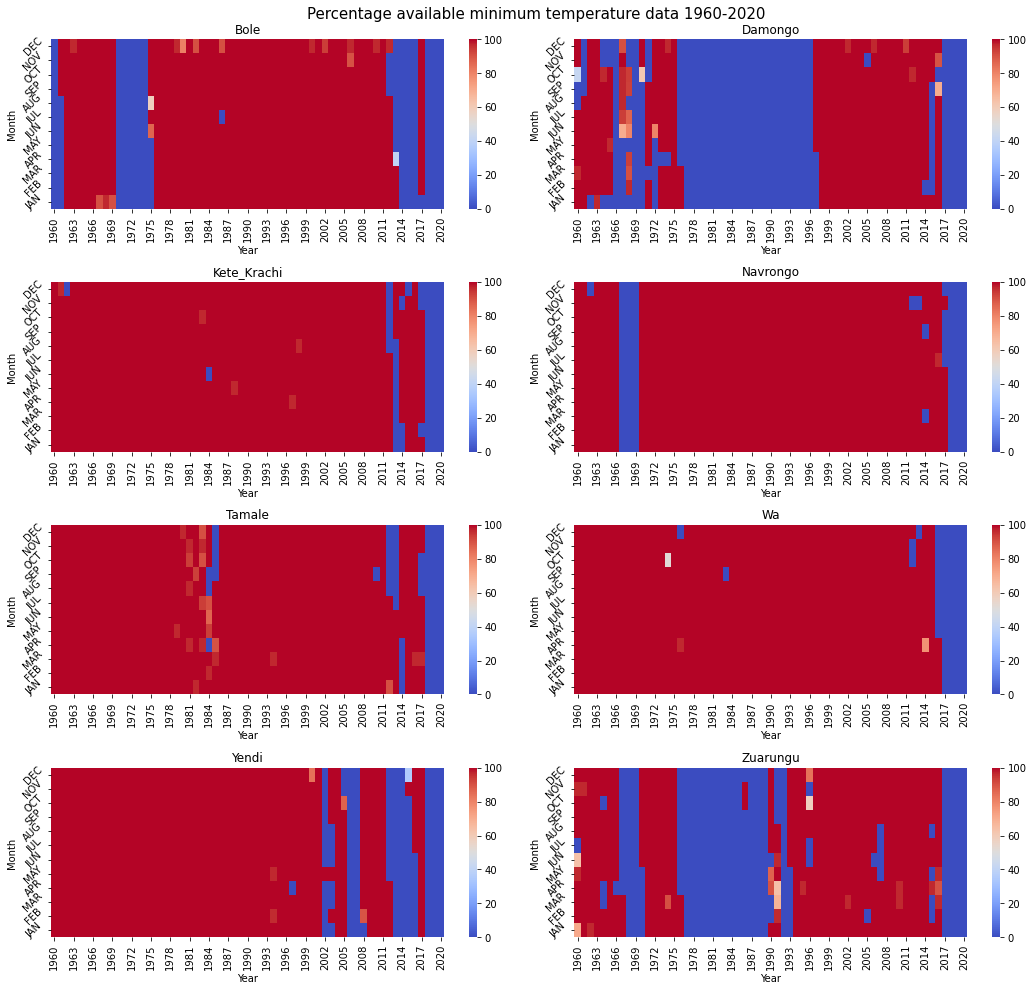

In [ ]:
#################### Plot data #############

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,14))
ax = axes.flatten()
# cbar_ax = fig.add_axes([0.09, 0.12, 0.02, 0.7])
# cbar_ax = fig.add_axes([0.54, 0.13, 0.45, 0.03])
# fig.delaxes(axes[3][1])
# RR_all=[Navorngo_RR, Zuarungu_RR, Walewale_RR, Wa_RR, Bole_RR, Tamale_RR, Yendi_RR]
# RR_all_l=['Navrongo', 'Zuarungu', 'Walewale', 'Wa', 'Bole', 'Tamale', 'Yendi']
labels=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV','DEC']

for i,j in enumerate(Tn_per):
    # print(j)
    data = pd.read_fwf(j, names = ['Year','Month','RR'])
    sns.heatmap(heatmap_pivot(data, 'RR', ['Month'], 'Year'), ax=ax[i], cmap='coolwarm')#, vmax=100,
                #cbar_ax=cbar_ax, cbar_kws={'label': 'Monthly Rainfall [ mm / month]', 'orientation': 'horizontal'})
    ax[i].invert_yaxis()
    ax[i].set_yticklabels(labels, rotation=45)
    ax[i].set_title(j[52:-23])
plt.suptitle('Percentage available minimum temperature data 1960-2020', fontsize=15)
fig.tight_layout()
plt.savefig('Graphs/graphs/avail_Tn_data.JPEG',bbox_inches = 'tight')


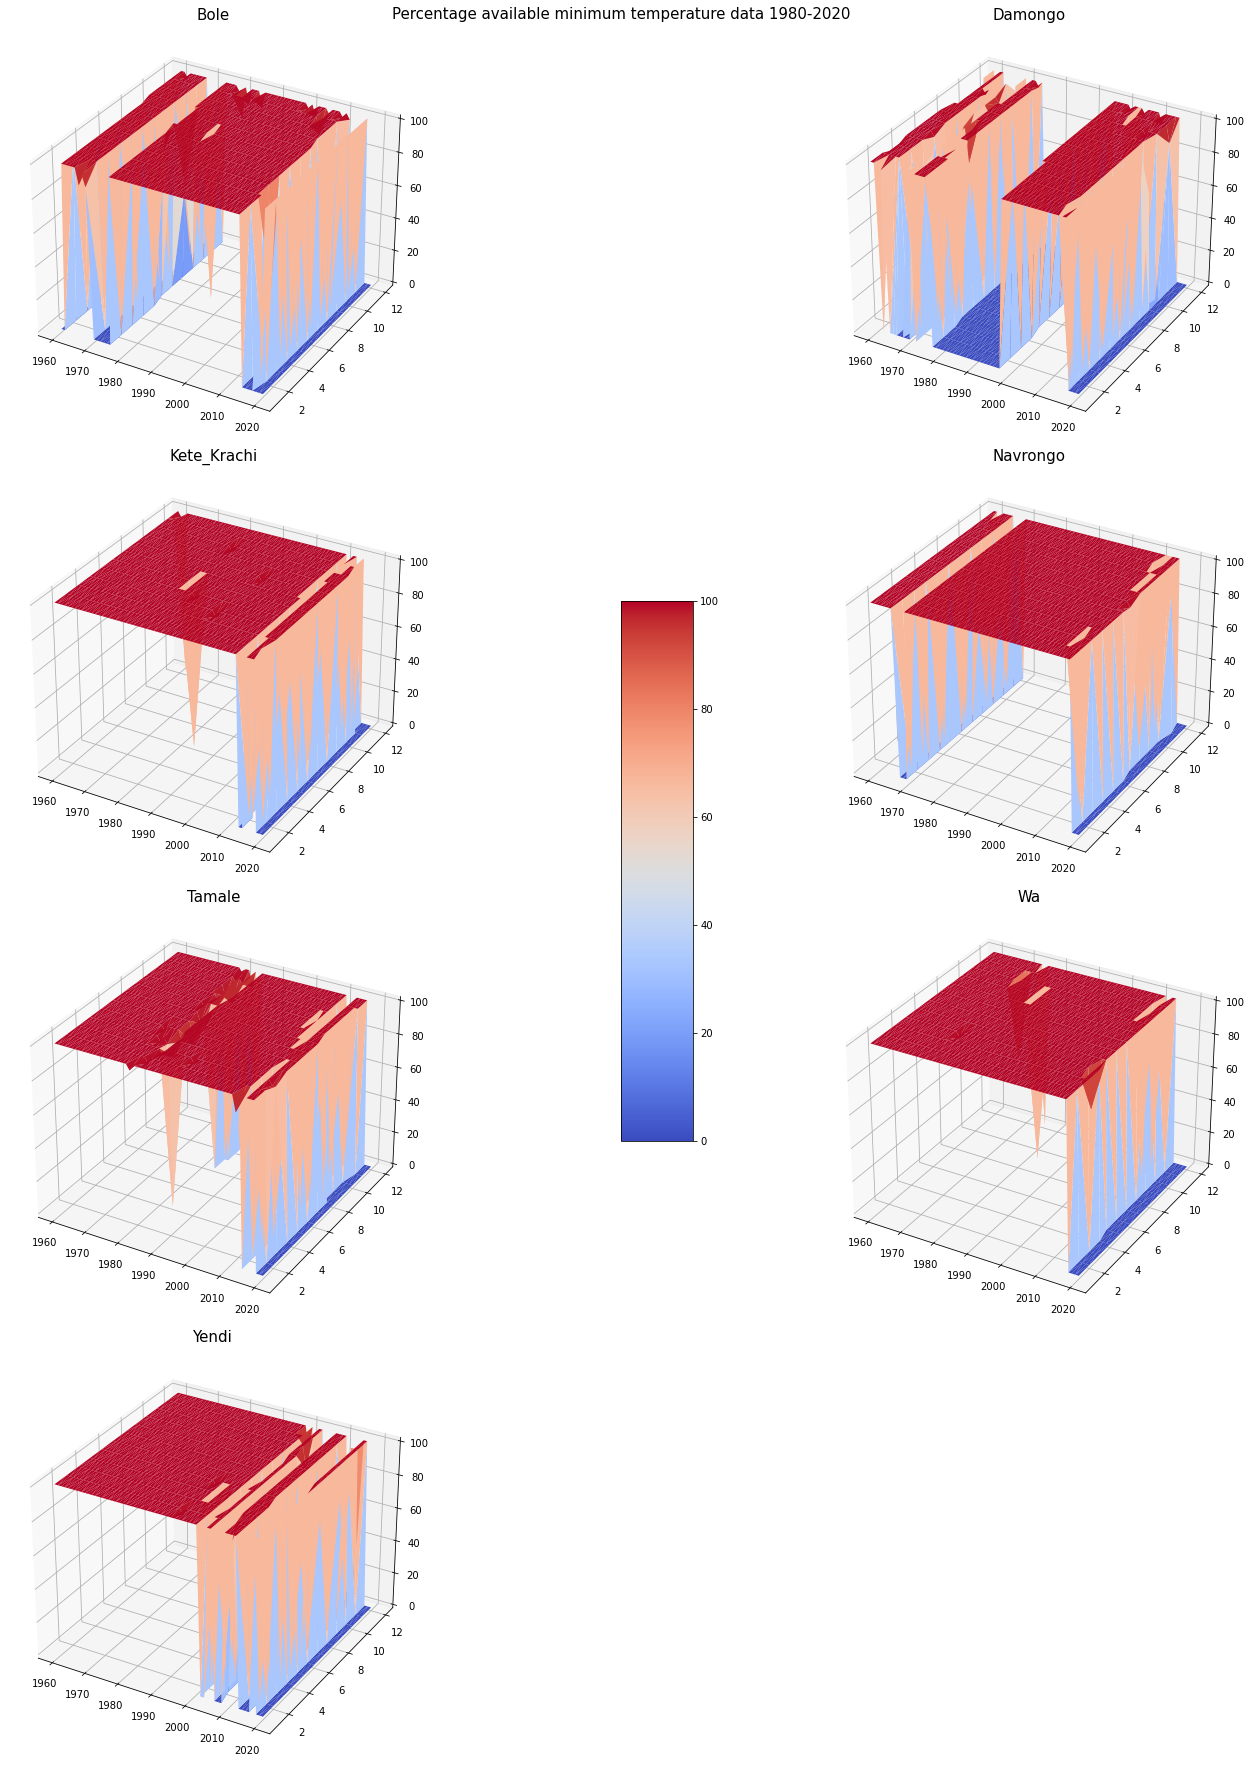

In [16]:
#################### Plot data #############

fig, ax = plt.subplots(4, 2, figsize = (25,25), subplot_kw={'projection': '3d'})
gs = gridspec.GridSpec(10, 8)
fig.delaxes(ax[3][1])
ax = ax.flatten()  
cbar_ax = fig.add_axes([0.5, 0.35, 0.04, 0.3])

for i,j in enumerate(Tn_per):
    x,y,z = np.loadtxt(j, unpack=True)
    p = ax[i].plot_trisurf(x, y, z, linewidth=0.1, cmap='coolwarm')
    ax[i].set_title(j[52:-23], fontsize=15)

plt.suptitle('Percentage available minimum temperature data 1980-2020', fontsize=15)
plt.subplots_adjust(left=0.1,
                    bottom=0,
                    right=0.9,
                    top=0.9,
                    wspace=0,
                    hspace=0)
# plt.colorbar(p, shrink=0.5, aspect=5, ax=cbar_ax)
gs.tight_layout(fig)
#### fig.colorbar()
fig.colorbar(p, cax=cbar_ax)
fig.tight_layout()
# plt.savefig('Graphs/graphs/avail_data.JPEG',bbox_inches = 'tight')


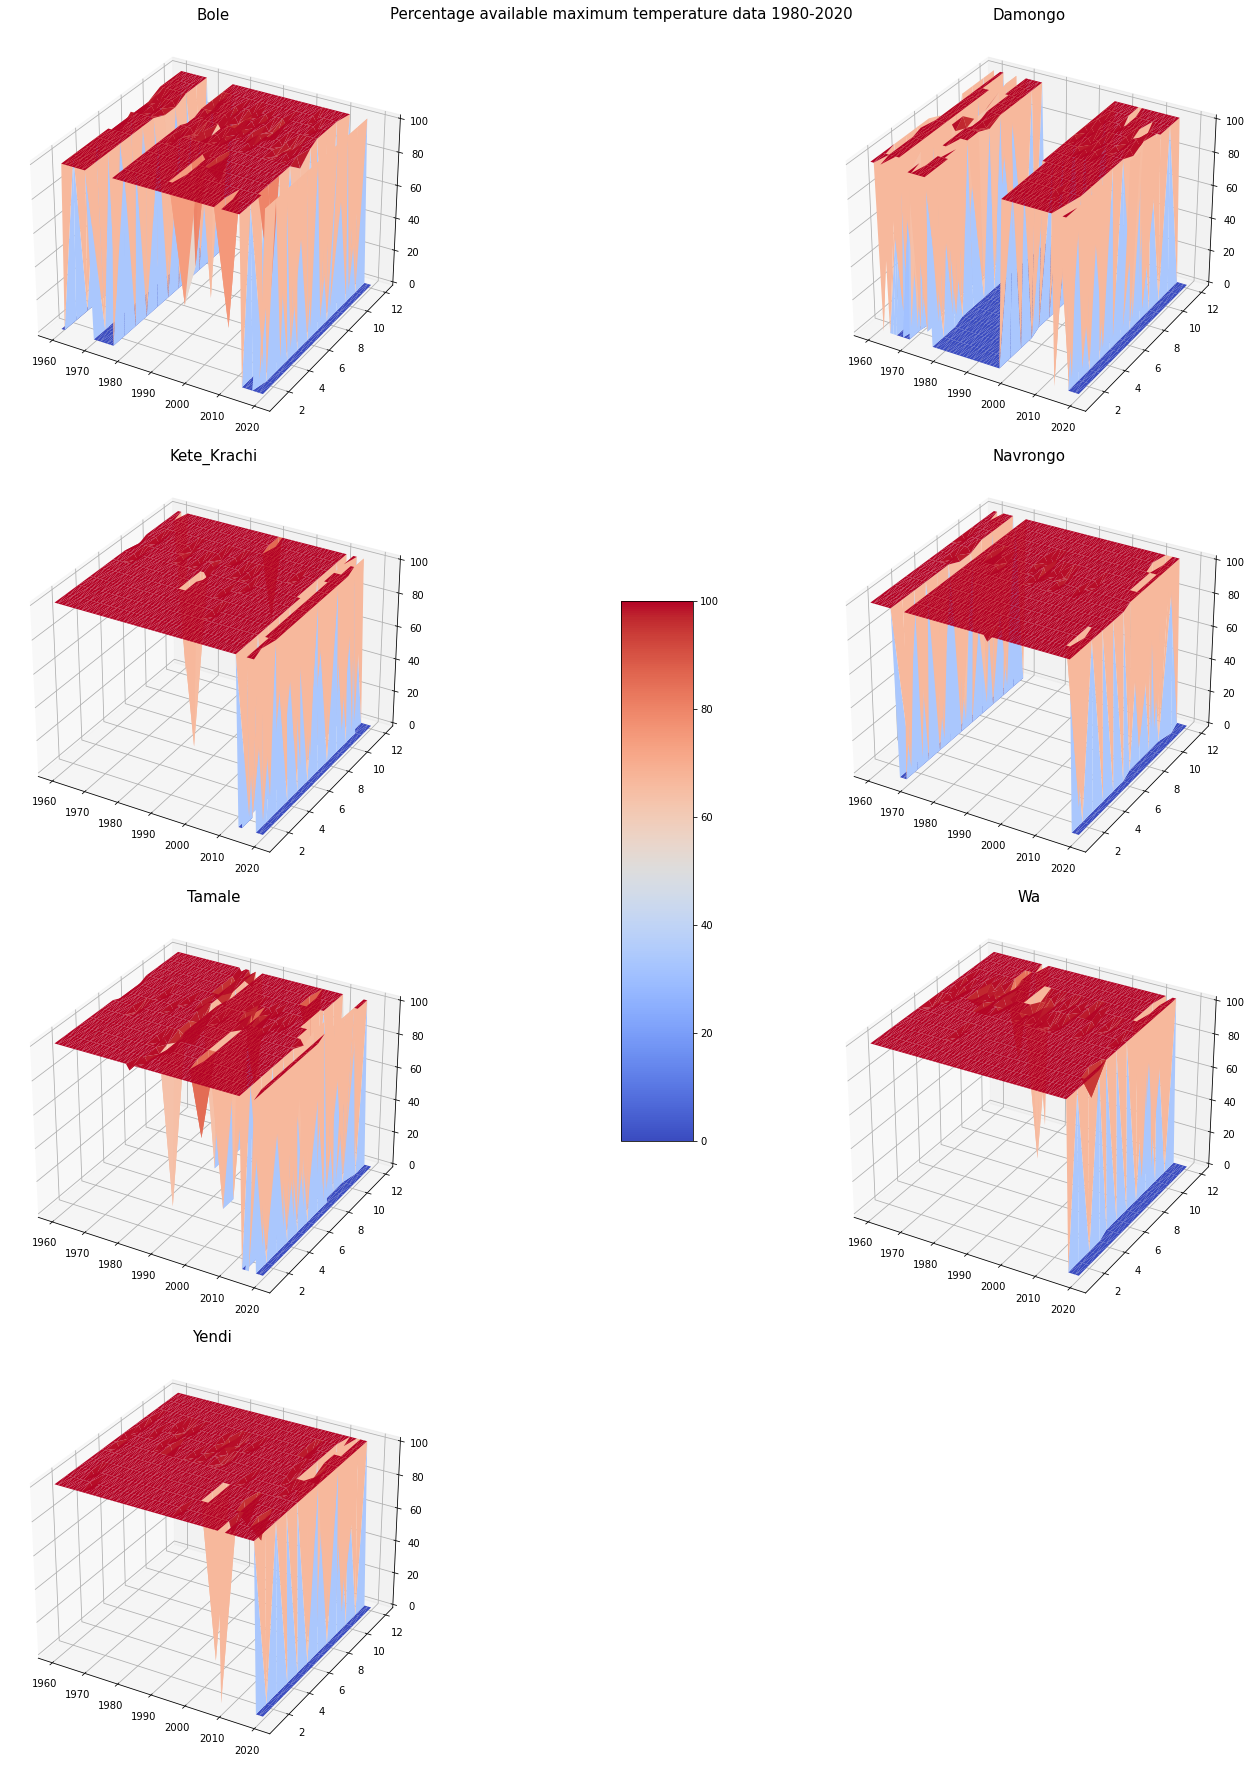

In [17]:
#################### Plot data #############

fig, ax = plt.subplots(4, 2, figsize = (25,25), subplot_kw={'projection': '3d'})
gs = gridspec.GridSpec(10, 8)
fig.delaxes(ax[3][1])
ax = ax.flatten()  
cbar_ax = fig.add_axes([0.5, 0.35, 0.04, 0.3])

for i,j in enumerate(Tx_per):
    x,y,z = np.loadtxt(j, unpack=True)
    p = ax[i].plot_trisurf(x, y, z, linewidth=0.1, cmap='coolwarm')
    ax[i].set_title(j[52:-23], fontsize=15)

plt.suptitle('Percentage available maximum temperature data 1980-2020', fontsize=15)
plt.subplots_adjust(left=0.1,
                    bottom=0,
                    right=0.9,
                    top=0.9,
                    wspace=0,
                    hspace=0)
# plt.colorbar(p, shrink=0.5, aspect=5, ax=cbar_ax)
gs.tight_layout(fig)
#### fig.colorbar()
fig.colorbar(p, cax=cbar_ax)
fig.tight_layout()


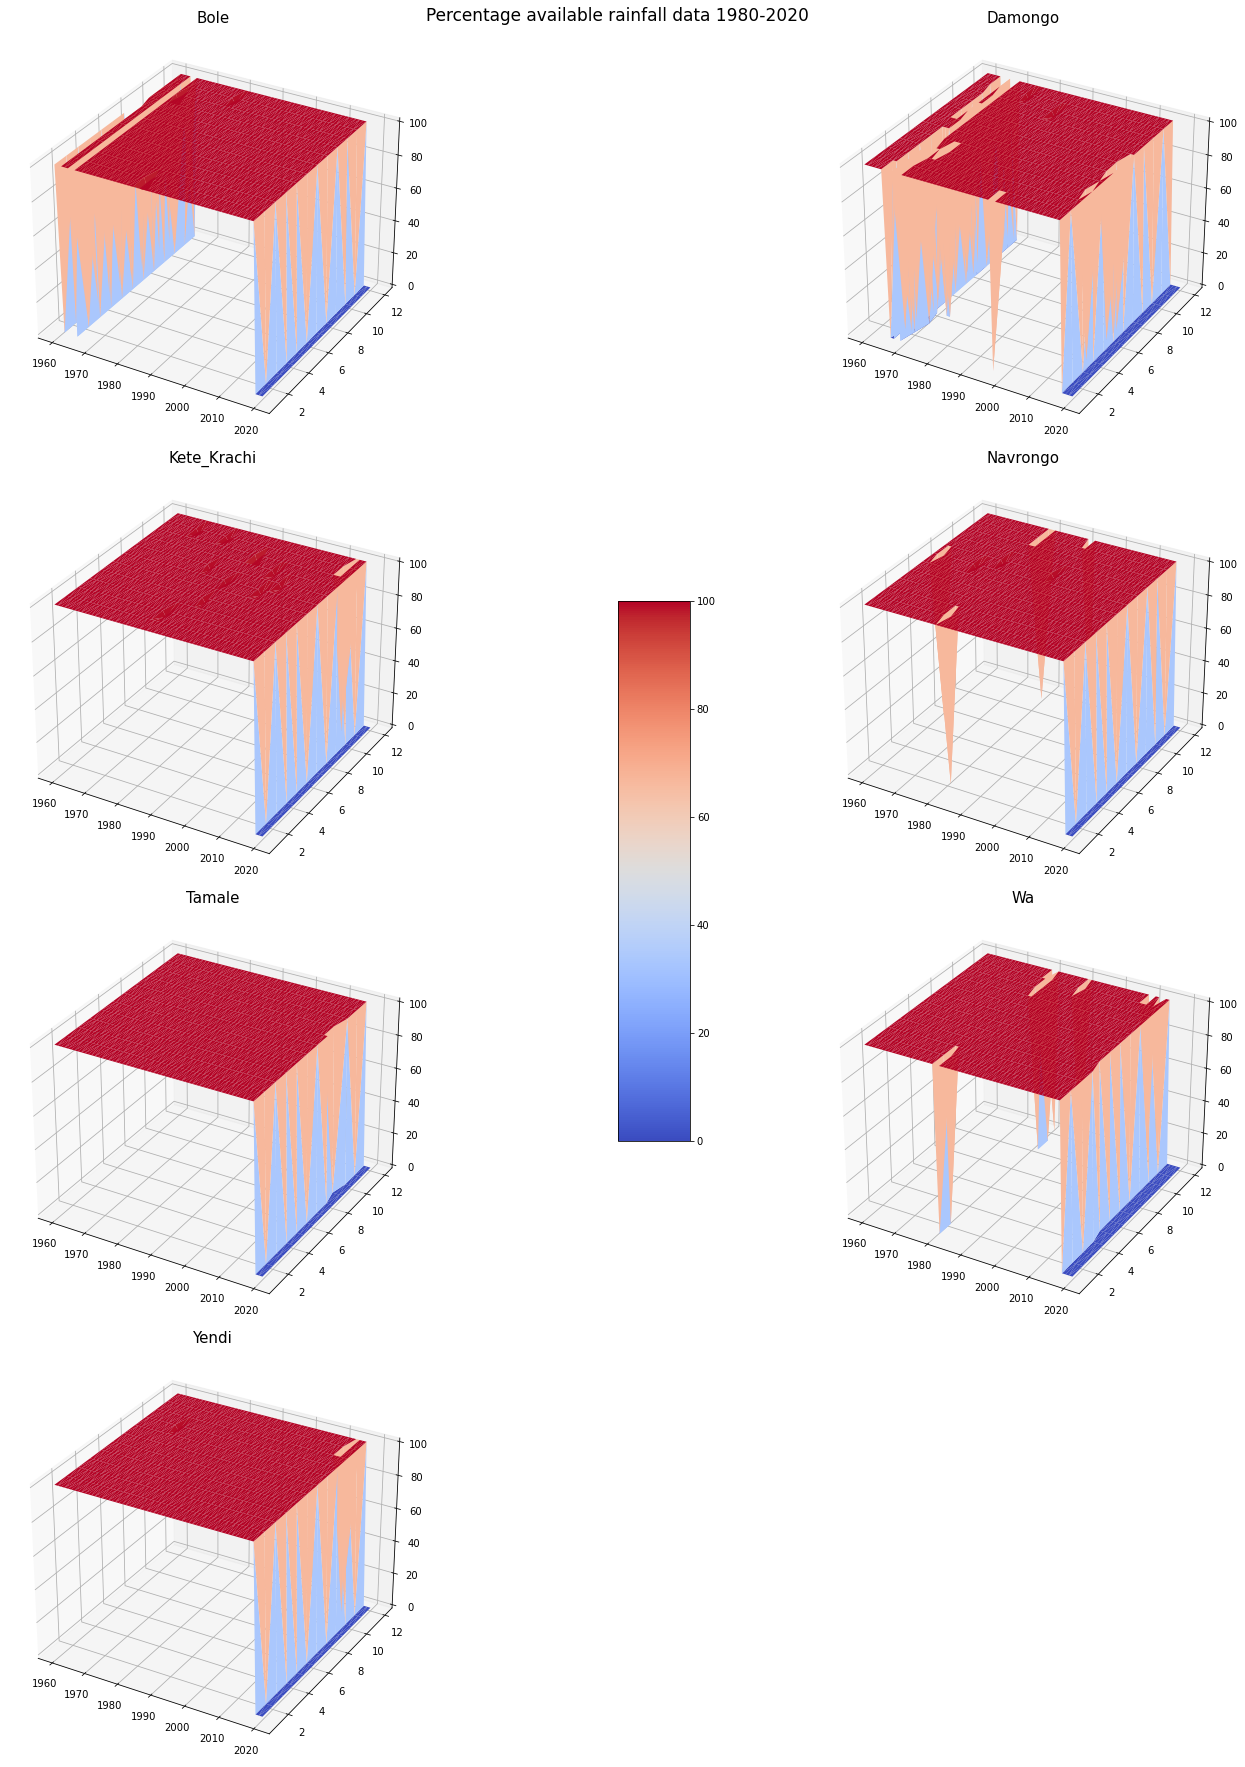

In [18]:
#################### Plot data #############

fig, ax = plt.subplots(4, 2, figsize = (25,25), subplot_kw={'projection': '3d'})
gs = gridspec.GridSpec(10, 8)
fig.delaxes(ax[3][1])
ax = ax.flatten()  
cbar_ax = fig.add_axes([0.5, 0.35, 0.04, 0.3])

for i,j in enumerate(RR_per):
    x,y,z = np.loadtxt(j, unpack=True)
    p = ax[i].plot_trisurf(x, y, z, linewidth=0.1, cmap='coolwarm')
    ax[i].set_title(j[52:-23], fontsize=15)

plt.suptitle('Percentage available rainfall data 1980-2020', fontsize=17)
# plt.subplots_adjust(left=0.1,
#                     bottom=0,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0,
#                     hspace=0)
# plt.colorbar(p, shrink=0.5, aspect=5, ax=cbar_ax)
# gs.tight_layout(fig)
#### fig.colorbar()
fig.colorbar(p, cax=cbar_ax)
fig.tight_layout()


### Converting sgf data to RClimdex format for quality control #####

### Monthly Rainfall values ####


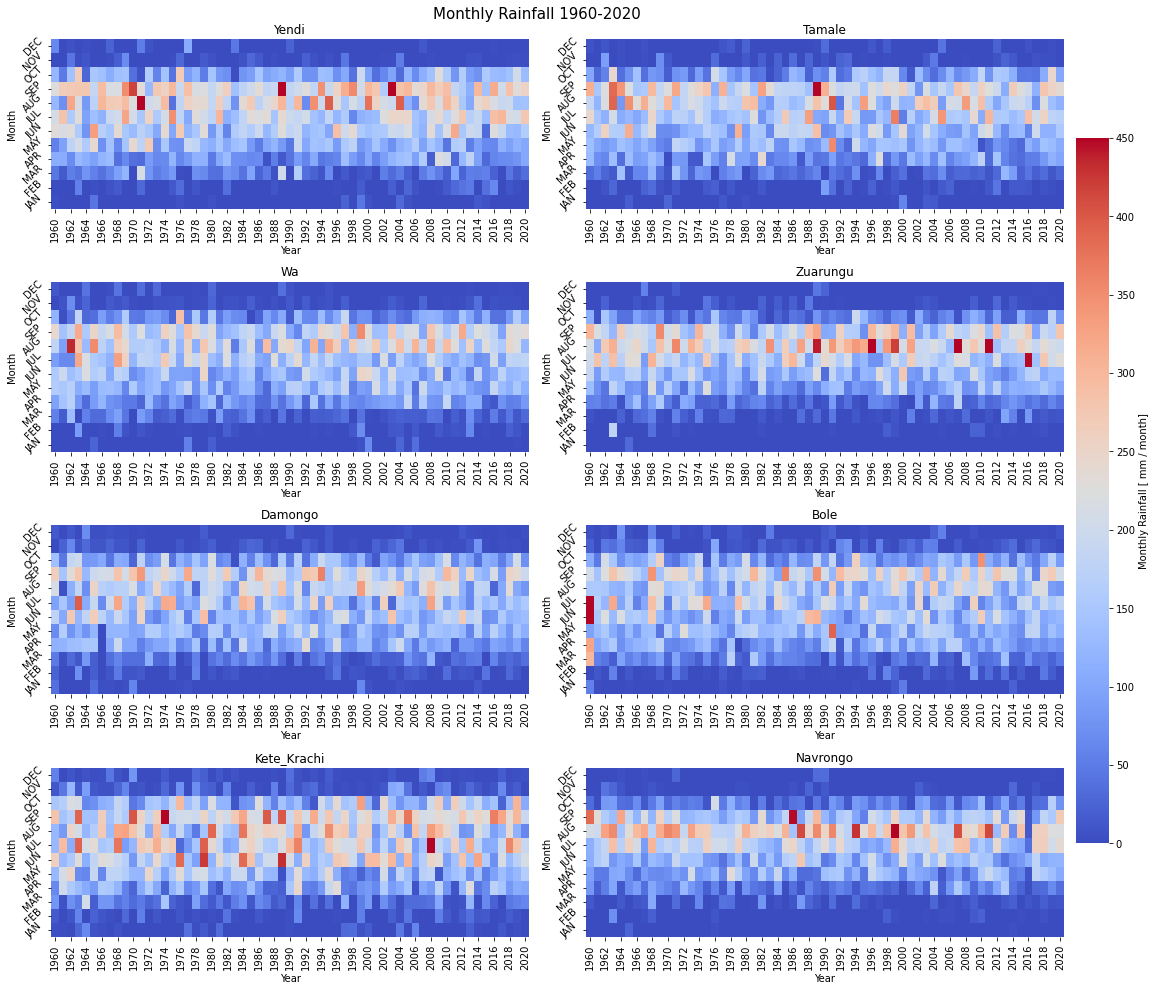

In [19]:
#################### Plot data #############

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,14))
ax = axes.flatten()
cbar_ax = fig.add_axes([1, .15, .03, .7])

labels=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV','DEC']

for i,j in enumerate(RR_cgf):
    # print(j)
    data = pd.read_fwf(j, names = ['Year','Month','RR'])
    sns.heatmap(heatmap_pivot(data, 'RR', ['Month'], 'Year'), ax=ax[i], cmap='coolwarm', vmax=450,
                cbar_ax=cbar_ax, cbar_kws={'label': 'Monthly Rainfall [ mm / month]', 'orientation': 'vertical'})
    ax[i].invert_yaxis()
    ax[i].set_yticklabels(labels, rotation=45)
    ax[i].set_title(j[48:-23])
plt.suptitle('Monthly Rainfall 1960-2020', fontsize=15)
fig.tight_layout()
# fig.tight_layout(rect=[0, 0, .9, 1])
plt.savefig('Graphs/graphs/Monthly Rainfall.JPEG', bbox_inches='tight')

### Coefficient of Variation ####

### Standard Rainfall Anomaly (SAI)

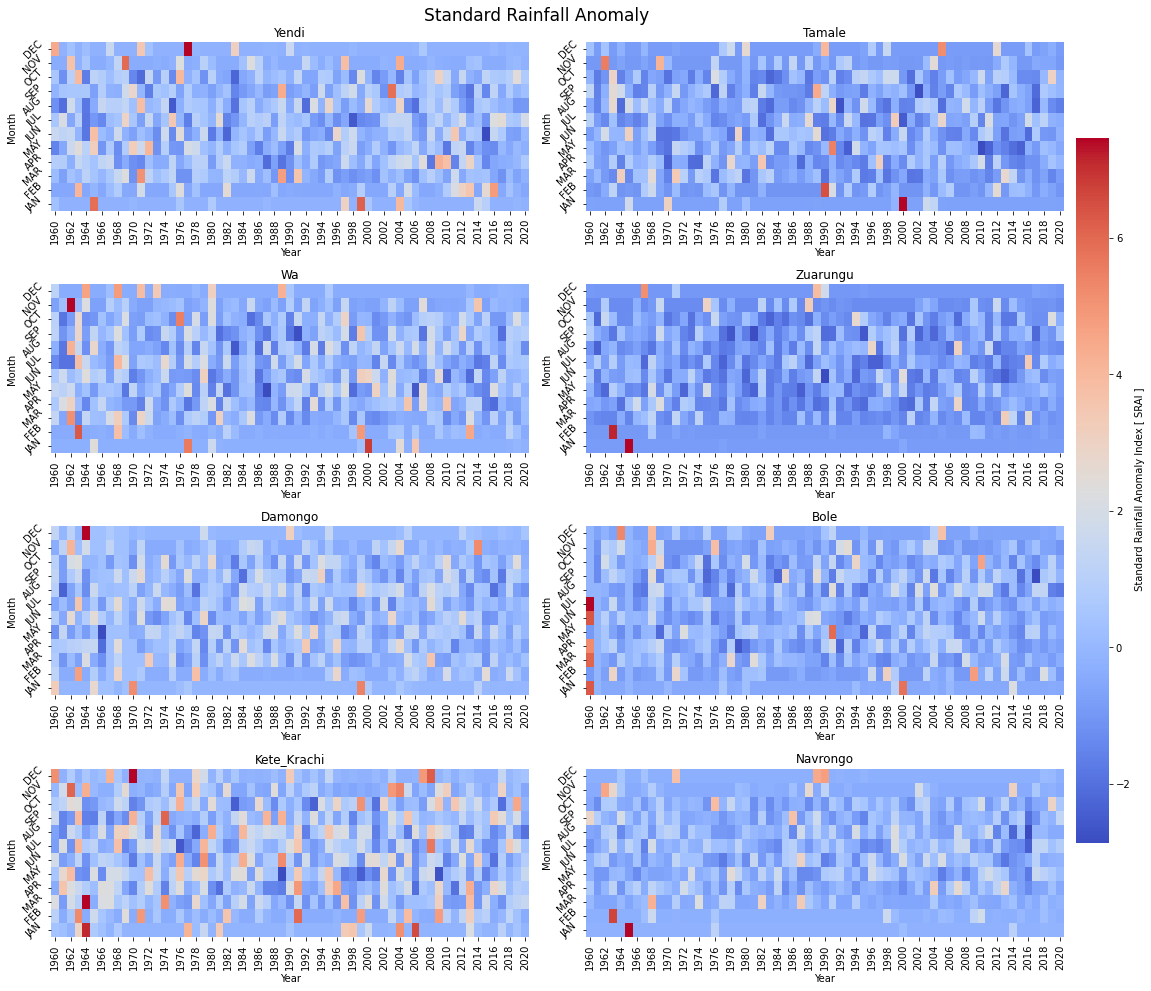

In [20]:
#################### Plot data #############
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,14))
ax = axes.flatten()
# cbar_ax = fig.add_axes([0.09, 0.12, 0.02, 0.7])
cbar_ax = fig.add_axes([1, .15, .03, .7])
# fig.delaxes(axes[3][1])
# RR_all=[Navrongo_RR, Zuarungu_RR, Walewale_RR, Wa_RR, Bole_RR, Tamale_RR, Yendi_RR]
# RR_all_l=['Navrongo', 'Zuarungu', 'Walewale', 'Wa', 'Bole', 'Tamale', 'Yendi']
labels=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV','DEC']

for i,j in enumerate(RR_cgf):
    data = pd.read_fwf(j, names = ['Year','Month','RR'])
    # print(j)
    sns.heatmap(heatmap_pivot(SRA(data), 'RR', 
                SRA(data).Month, SRA(data).Year), 
                ax=ax[i], cmap='coolwarm', cbar_ax=cbar_ax, 
                cbar_kws={'label': ' Standard Rainfall Anomaly Index [ SRAI ]', 'orientation': 'vertical'})
    ax[i].invert_yaxis()
    ax[i].set_yticklabels(labels, rotation=45)
    ax[i].set_title(j[48:-23])
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Month')
    plt.suptitle('Standard Rainfall Anomaly', fontsize=17)
fig.tight_layout()
plt.savefig('Graphs/graphs/Standard Rainfall Anomaly.JPEG', bbox_inches='tight')

### Monthly Temperature Values ###

#### Monthly Maximum Temperatures ###

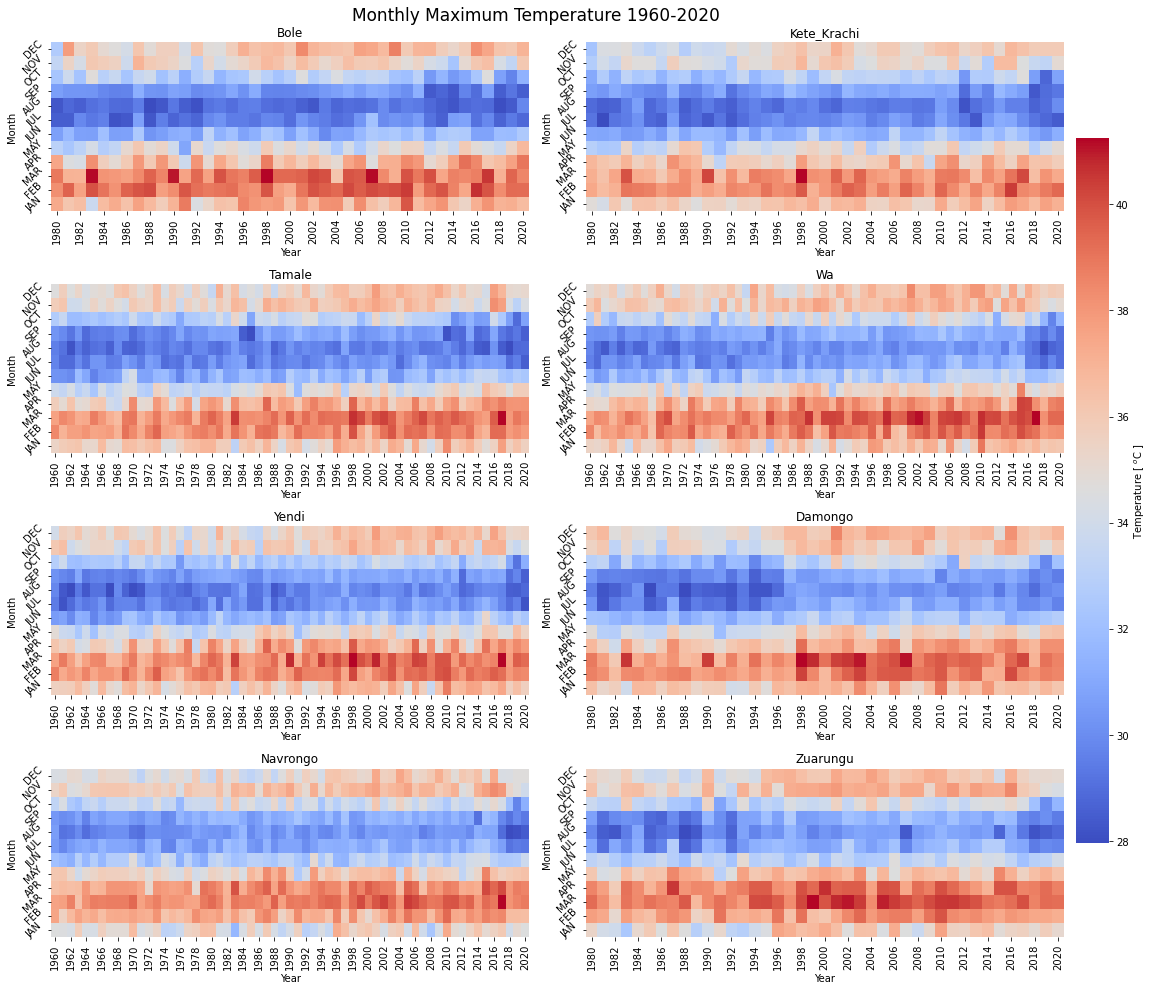

In [21]:
#################### Plot data #############

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,14))
ax = axes.flatten()
# cbar_ax = fig.add_axes([0.09, 0.12, 0.02, 0.7])
cbar_ax = fig.add_axes([1, .15, .03, .7])
# fig.delaxes(axes[3][1])

for i,j in enumerate(Tx_cgf):
    if (i == 0 or i == 1 or i == 5 or i==7):
        data = pd.read_fwf(j, names = ['Year','Month','Tx'])
        data=data.loc[240:]
        sns.heatmap(heatmap_pivot(data, 'Tx', ['Month'], 'Year'), ax=ax[i], cmap='coolwarm',
                cbar_ax=cbar_ax, cbar_kws={'label': 'Temperature [ $^o$C ]', 'orientation': 'vertical'})
    else:
        data = pd.read_fwf(j, names = ['Year','Month','Tx'])
        sns.heatmap(heatmap_pivot(data, 'Tx', ['Month'], 'Year'), ax=ax[i], cmap='coolwarm',
                cbar_ax=cbar_ax, cbar_kws={'label': 'Temperature [ $^o$C ]', 'orientation': 'vertical'})
    
    
    
    
#     data = pd.read_fwf(j, names = ['Year','Month','Tx'])
#     sns.heatmap(heatmap_pivot(data, 'Tx', ['Month'], 'Year'), ax=ax[i], cmap='coolwarm',
#                 cbar_ax=cbar_ax, cbar_kws={'label': 'Temperature [ $^o$C ]', 'orientation': 'vertical'})
    ax[i].invert_yaxis()
    ax[i].set_yticklabels(labels, rotation=45)
    ax[i].set_title(j[48:-23])
plt.suptitle('Monthly Maximum Temperature 1960-2020', fontsize=17)
fig.tight_layout()
plt.savefig('Graphs/graphs/Monthly Maximum Temperature.JPEG', bbox_inches='tight')

#### Monthly minimum temperatures

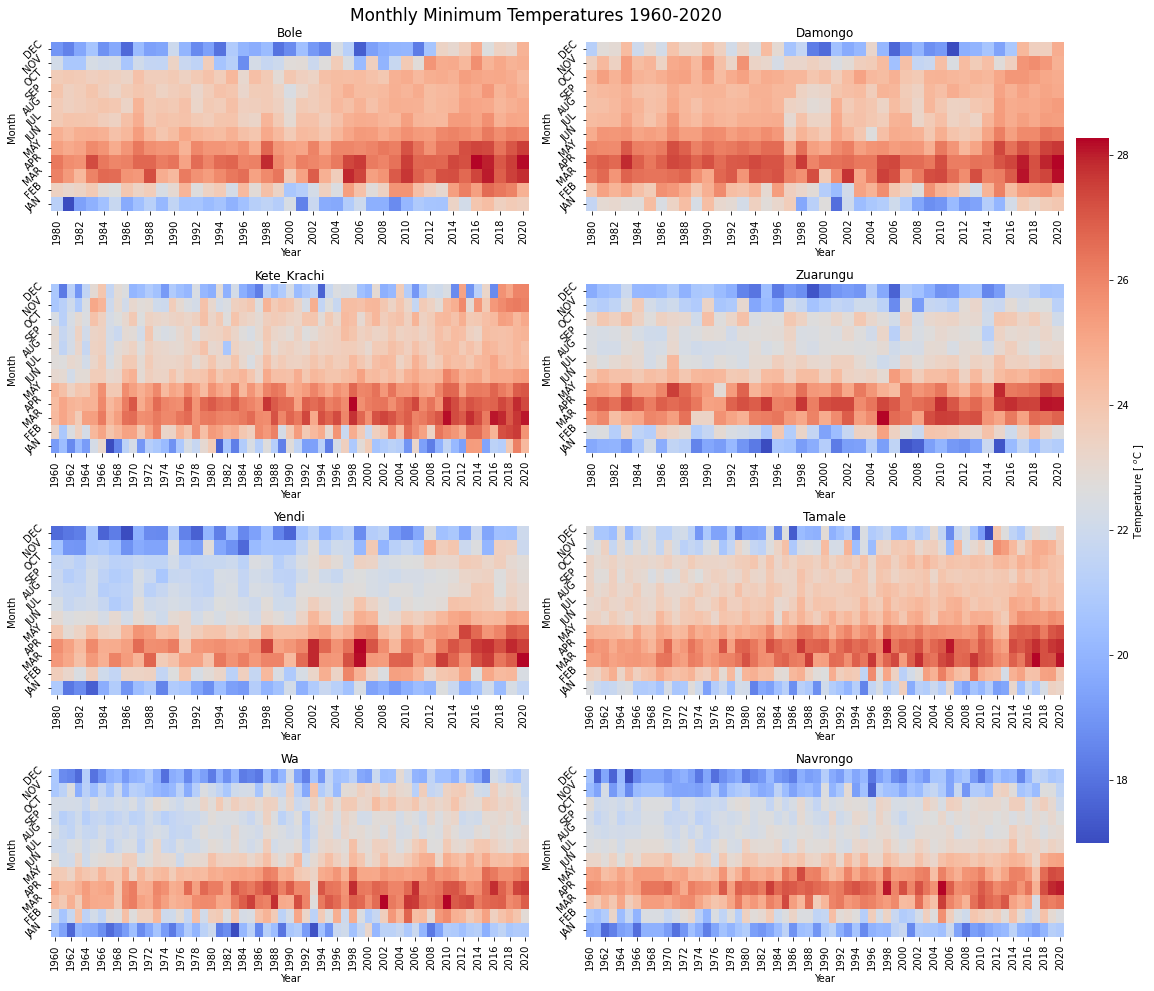

In [22]:
#################### Plot data #############

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,14))
ax = axes.flatten()
# cbar_ax = fig.add_axes([0.09, 0.12, 0.02, 0.7])
cbar_ax = fig.add_axes([1, .15, .03, .7])
# fig.delaxes(axes[3][1])

for i,j in enumerate(Tn_cgf):
    if (i == 0 or i == 1 or i == 3 or i==4):
        data = pd.read_fwf(j, names = ['Year','Month','Tn'])
        data=data.loc[240:]
        sns.heatmap(heatmap_pivot(data, 'Tn', ['Month'], 'Year'), ax=ax[i], cmap='coolwarm',
                cbar_ax=cbar_ax, cbar_kws={'label': 'Temperature [ $^o$C ]', 'orientation': 'vertical'})
    else:
        data = pd.read_fwf(j, names = ['Year','Month','Tn'])
        sns.heatmap(heatmap_pivot(data, 'Tn', ['Month'], 'Year'), ax=ax[i], cmap='coolwarm',
                cbar_ax=cbar_ax, cbar_kws={'label': 'Temperature [ $^o$C ]', 'orientation': 'vertical'})
    

# for i,j in enumerate(Tn_cgf):
#     data = pd.read_fwf(j, names = ['Year','Month','Tn'])
#     sns.heatmap(heatmap_pivot(data, 'Tn', ['Month'], 'Year'), ax=ax[i], cmap='coolwarm',
#                 cbar_ax=cbar_ax, cbar_kws={'label': 'Temperature [ $^o$C ]', 'orientation': 'vertical'})
    ax[i].invert_yaxis()
    ax[i].set_yticklabels(labels, rotation=45)
    ax[i].set_title(j[48:-23])
plt.suptitle('Monthly Minimum Temperatures 1960-2020', fontsize=17)
fig.tight_layout()
plt.savefig('Graphs/graphs/Monthly Minimum Temperature.JPEG', bbox_inches='tight')

#### Monthly mean temperatures

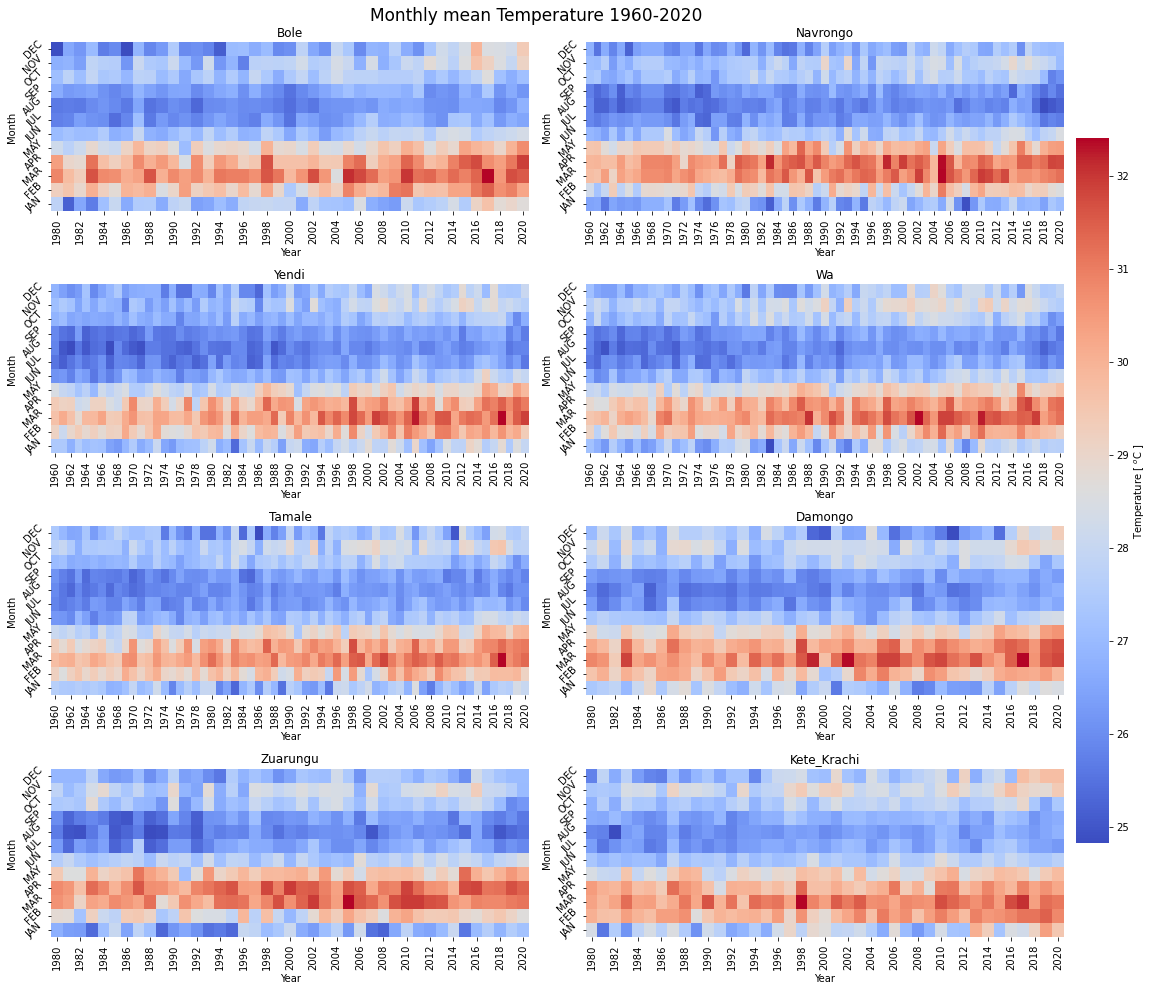

In [23]:
#################### Plot data #############

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,14))
ax = axes.flatten()
# cbar_ax = fig.add_axes([0.09, 0.12, 0.02, 0.7])
cbar_ax = fig.add_axes([1, .15, .03, .7])
# fig.delaxes(axes[3][1])

for i,j in enumerate(Tm_cgf):
    if (i == 0 or i == 6 or i == 5 or i==7):
        data = pd.read_fwf(j, names = ['Year','Month','Tn'])
        data=data.loc[240:]
        sns.heatmap(heatmap_pivot(data, 'Tn', ['Month'], 'Year'), ax=ax[i], cmap='coolwarm',
                cbar_ax=cbar_ax, cbar_kws={'label': 'Temperature [ $^o$C ]', 'orientation': 'vertical'})
    else:
        data = pd.read_fwf(j, names = ['Year','Month','Tn'])
        sns.heatmap(heatmap_pivot(data, 'Tn', ['Month'], 'Year'), ax=ax[i], cmap='coolwarm',
                cbar_ax=cbar_ax, cbar_kws={'label': 'Temperature [ $^o$C ]', 'orientation': 'vertical'})
    


# for i,j in enumerate(Tm_cgf):
#     data = pd.read_fwf(j, names = ['Year','Month','Tm'])
#     sns.heatmap(heatmap_pivot(data, 'Tm', ['Month'], 'Year'), ax=ax[i], cmap='coolwarm',
#                 cbar_ax=cbar_ax, cbar_kws={'label': 'Temperature [ $^o$C ]', 'orientation': 'vertical'})
    ax[i].invert_yaxis()
    ax[i].set_yticklabels(labels, rotation=45)
    ax[i].set_title(j[48:-23])
plt.suptitle('Monthly mean Temperature 1960-2020', fontsize=17)
fig.tight_layout()
plt.savefig('Graphs/graphs/Monthly Mean Temperature.JPEG', bbox_inches='tight')

### Standard Anomaly plots #####

#### SAI for Maximum Temperatures

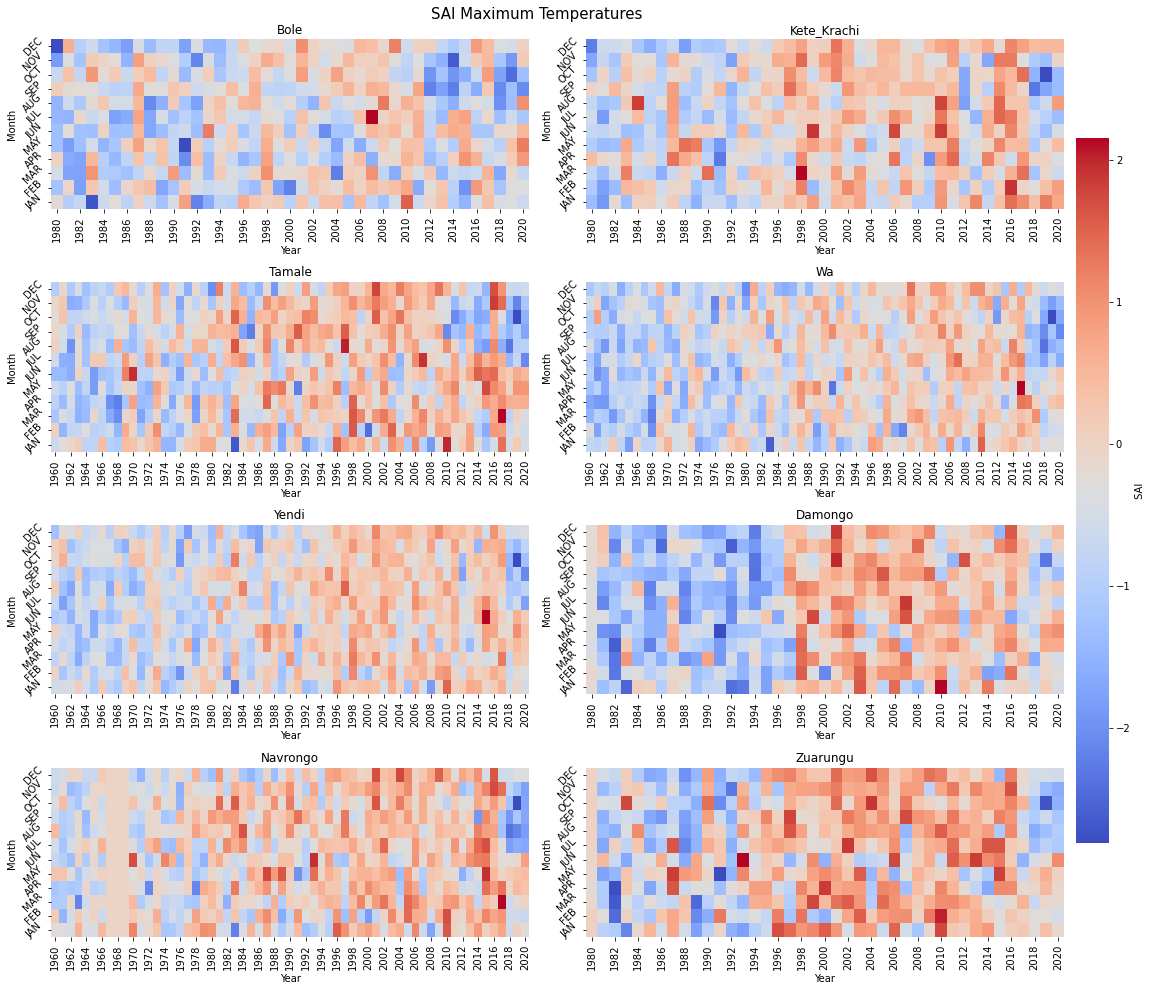

In [24]:
#################### Plot data #############
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,14))
ax = axes.flatten()
cbar_ax = fig.add_axes([1, .15, .03, .7])
# fig.delaxes(axes[3][1])

for i,j in enumerate(Tx_cgf):
    if (i == 0 or i == 1 or i == 5 or i==7):
        data = pd.read_fwf(j, names = ['Year','Month','Temperature'])
        sns.heatmap(heatmap_pivot(SAI_80(data), 'Temperature', 
                    SAI_80(data).index.month, SAI_80(data).index.year), 
                    ax=ax[i], cmap='coolwarm', cbar_ax=cbar_ax, 
                    cbar_kws={'label': ' SAI ', 'orientation': 'vertical'})
    else:
        data = pd.read_fwf(j, names = ['Year','Month','Temperature'])
        sns.heatmap(heatmap_pivot(SAI(data), 'Temperature', 
                    SAI(data).index.month, SAI(data).index.year), 
                    ax=ax[i], cmap='coolwarm', cbar_ax=cbar_ax, 
                    cbar_kws={'label': ' SAI ', 'orientation': 'vertical'})

    ax[i].invert_yaxis()
    ax[i].set_yticklabels(labels, rotation=45)
    ax[i].set_title(j[48:-23])
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Month')
    plt.suptitle('SAI Maximum Temperatures', fontsize=15)
fig.tight_layout()
plt.savefig('Graphs/graphs/Standard Anomaly for Maximum Temperature.JPEG', bbox_inches='tight')

#### Standard anomaly Minimum Temperatures

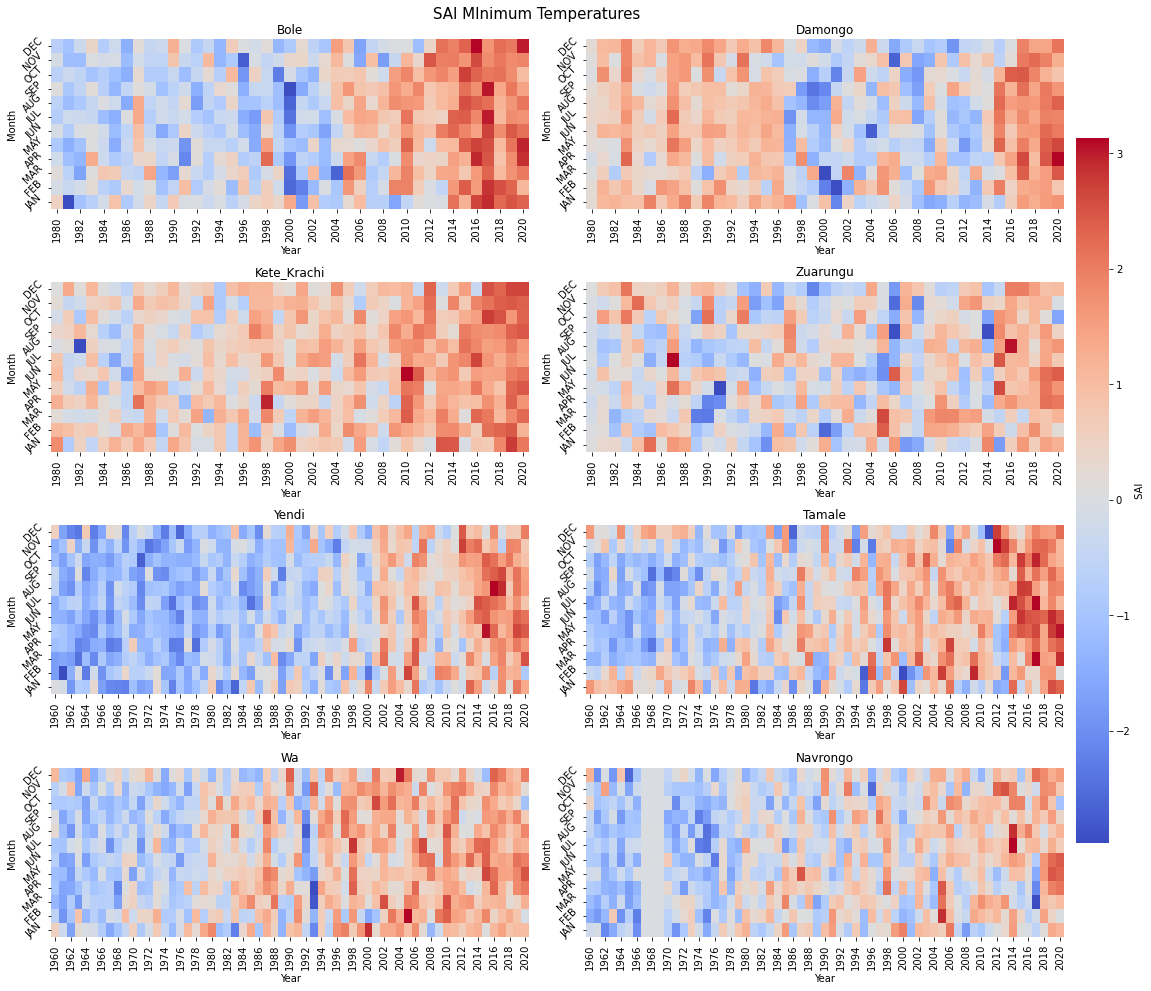

In [25]:
#################### Plot data #############
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,14))
ax = axes.flatten()
cbar_ax = fig.add_axes([1, .15, .03, .7])

for i,j in enumerate(Tn_cgf):

    if (i == 0 or i == 1 or i == 2 or i==3):
        data = pd.read_fwf(j, names = ['Year','Month','Temperature'])
        sns.heatmap(heatmap_pivot(SAI_80(data), 'Temperature', 
                    SAI_80(data).index.month, SAI_80(data).index.year), 
                    ax=ax[i], cmap='coolwarm', cbar_ax=cbar_ax, 
                    cbar_kws={'label': ' SAI ', 'orientation': 'vertical'})
    else:
        data = pd.read_fwf(j, names = ['Year','Month','Temperature'])
        sns.heatmap(heatmap_pivot(SAI(data), 'Temperature', 
                    SAI(data).index.month, SAI(data).index.year), 
                    ax=ax[i], cmap='coolwarm', cbar_ax=cbar_ax, 
                    cbar_kws={'label': ' SAI ', 'orientation': 'vertical'})

    ax[i].invert_yaxis()
    ax[i].set_yticklabels(labels, rotation=45)
    ax[i].set_title(j[48:-23])
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Month')
    plt.suptitle('SAI MInimum Temperatures', fontsize=15)
fig.tight_layout()
plt.savefig('Graphs/graphs/Standard Anomaly for Minimum Temperature.JPEG', bbox_inches='tight')

#### SAI Mean Temperatures

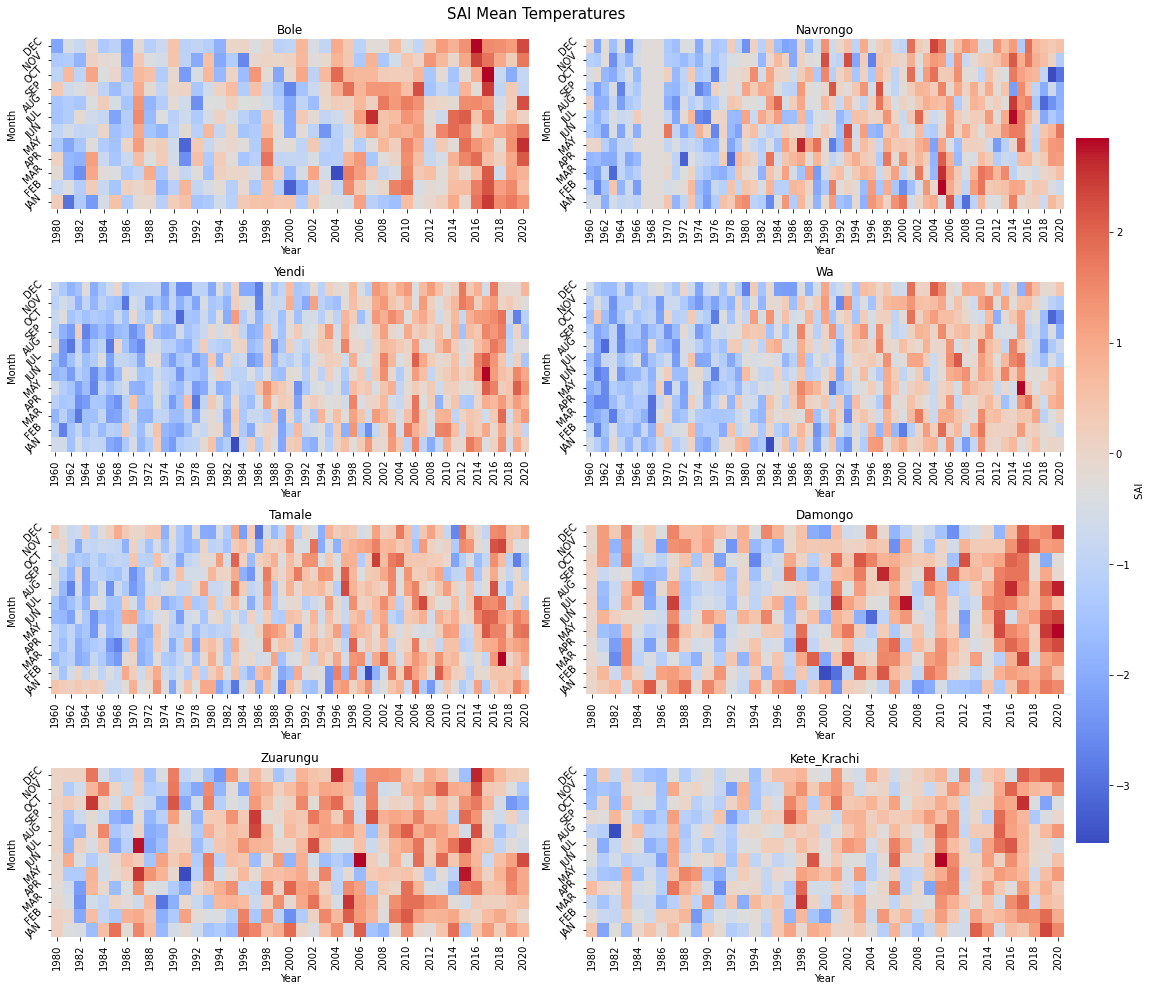

In [26]:
#################### Plot data #############
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,14))
ax = axes.flatten()
cbar_ax = fig.add_axes([1, .15, .03, .7])
# fig.delaxes(axes[3][1])

for i,j in enumerate(Tm_cgf):

    if (i == 0 or i == 6 or i == 5 or i==7):
        data = pd.read_fwf(j, names = ['Year','Month','Temperature'])
        sns.heatmap(heatmap_pivot(SAI_80(data), 'Temperature', 
                    SAI_80(data).index.month, SAI_80(data).index.year), 
                    ax=ax[i], cmap='coolwarm', cbar_ax=cbar_ax, 
                    cbar_kws={'label': ' SAI ', 'orientation': 'vertical'})
    else:
        data = pd.read_fwf(j, names = ['Year','Month','Temperature'])
        sns.heatmap(heatmap_pivot(SAI(data), 'Temperature', 
                    SAI(data).index.month, SAI(data).index.year), 
                    ax=ax[i], cmap='coolwarm', cbar_ax=cbar_ax, 
                    cbar_kws={'label': ' SAI ', 'orientation': 'vertical'})

    ax[i].invert_yaxis()
    ax[i].set_yticklabels(labels, rotation=45)
    ax[i].set_title(j[48:-23])
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Month')
    plt.suptitle('SAI Mean Temperatures', fontsize=15)
fig.tight_layout()
plt.savefig('Graphs/graphs/Standard Anomaly for Mean Temperature.JPEG', bbox_inches='tight')

##### SAI line plots ####

#### SAI Maximum Temperatures

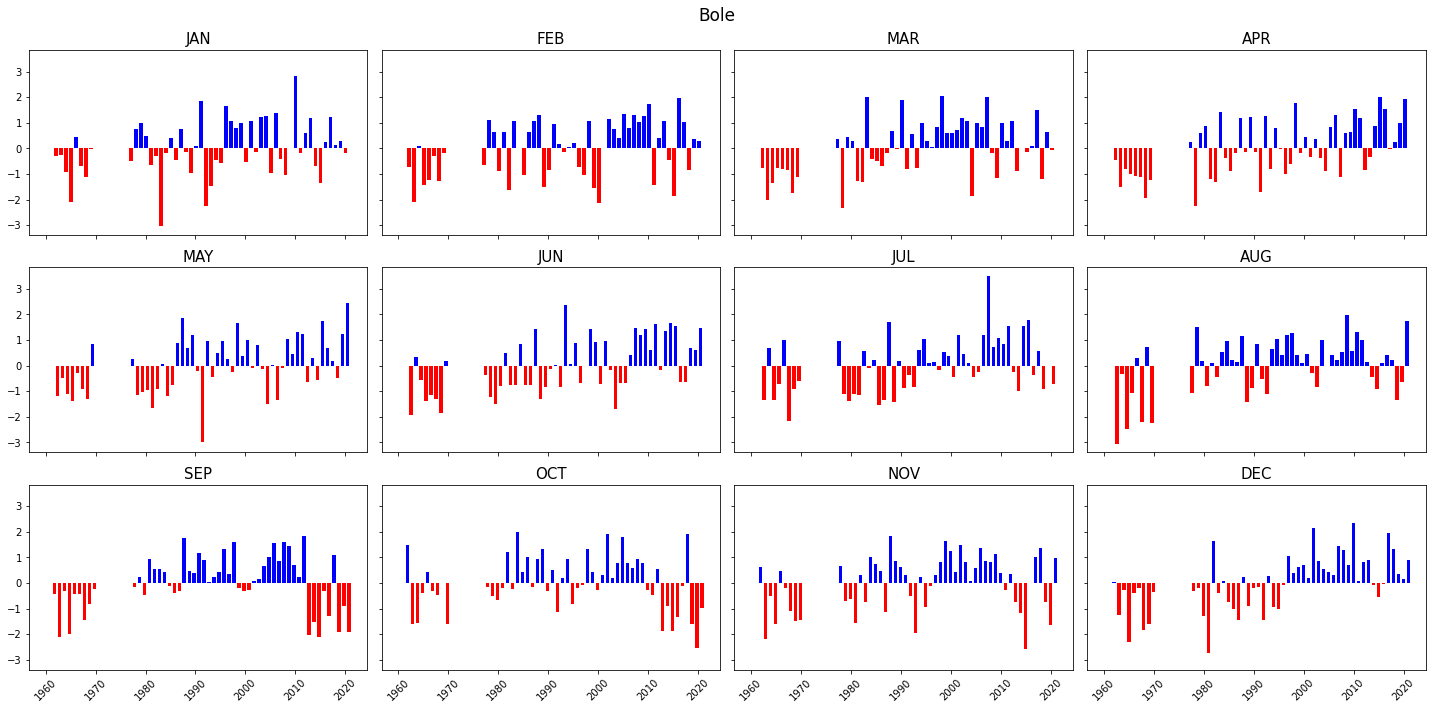

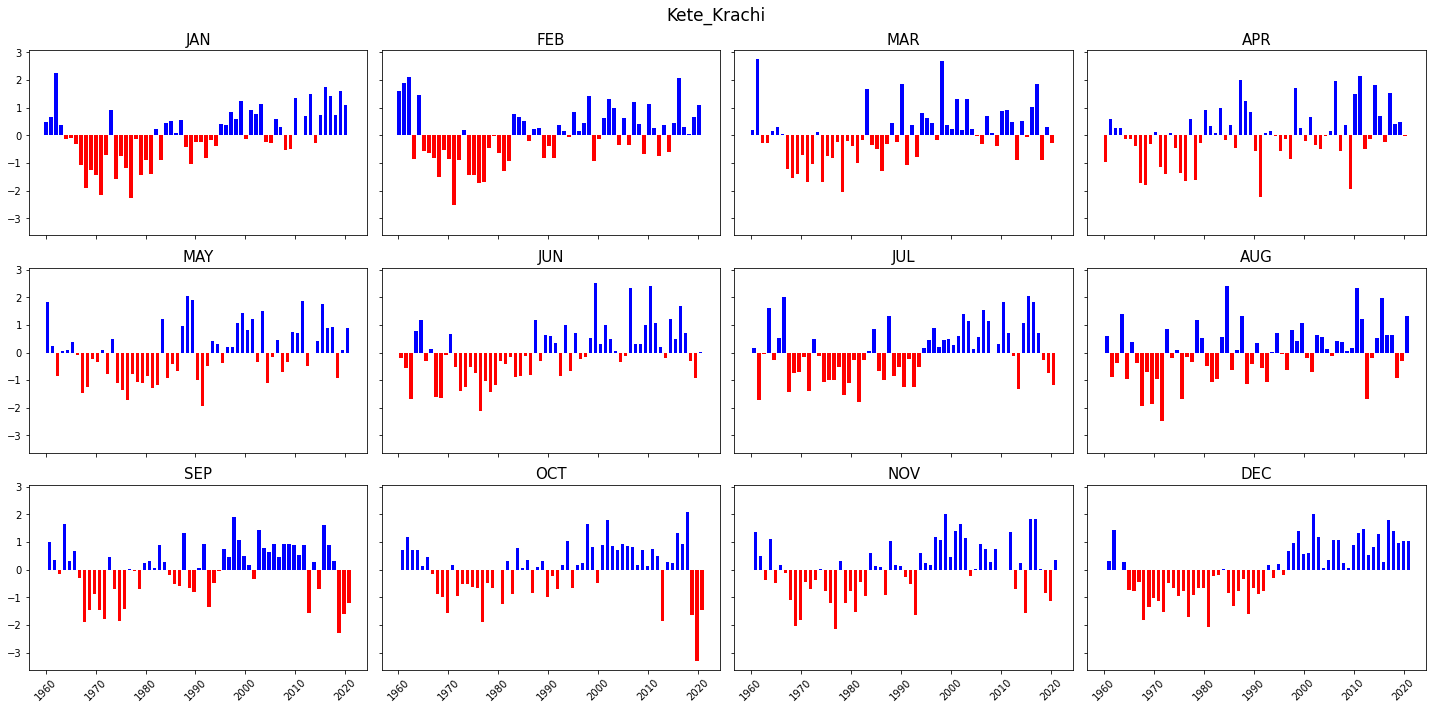

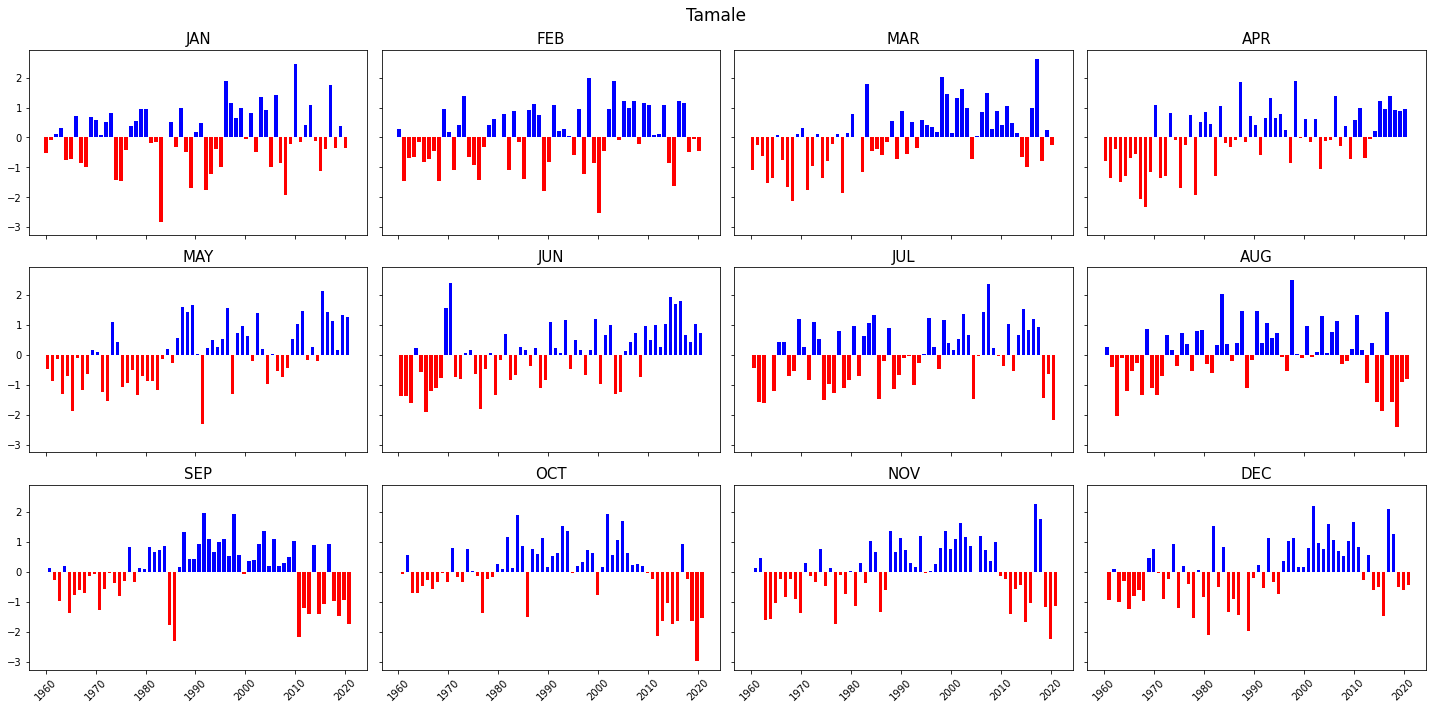

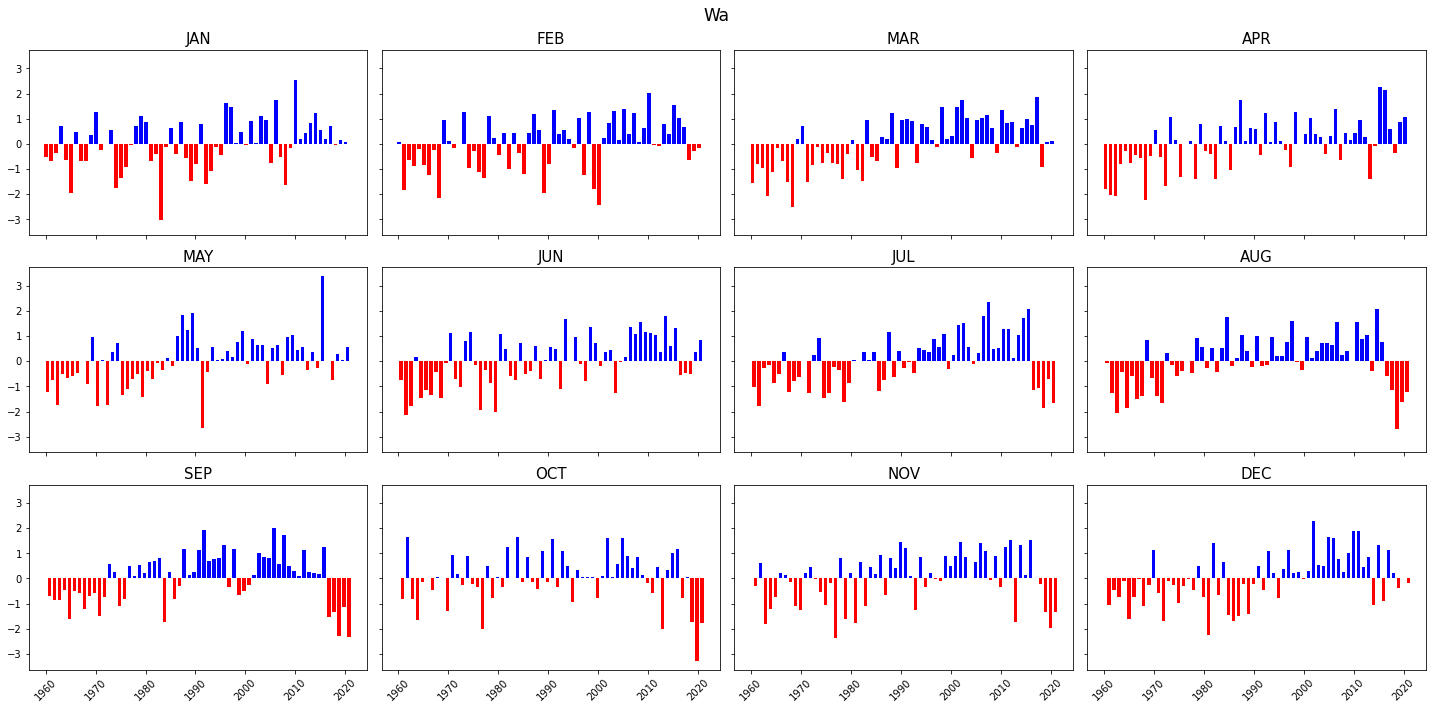

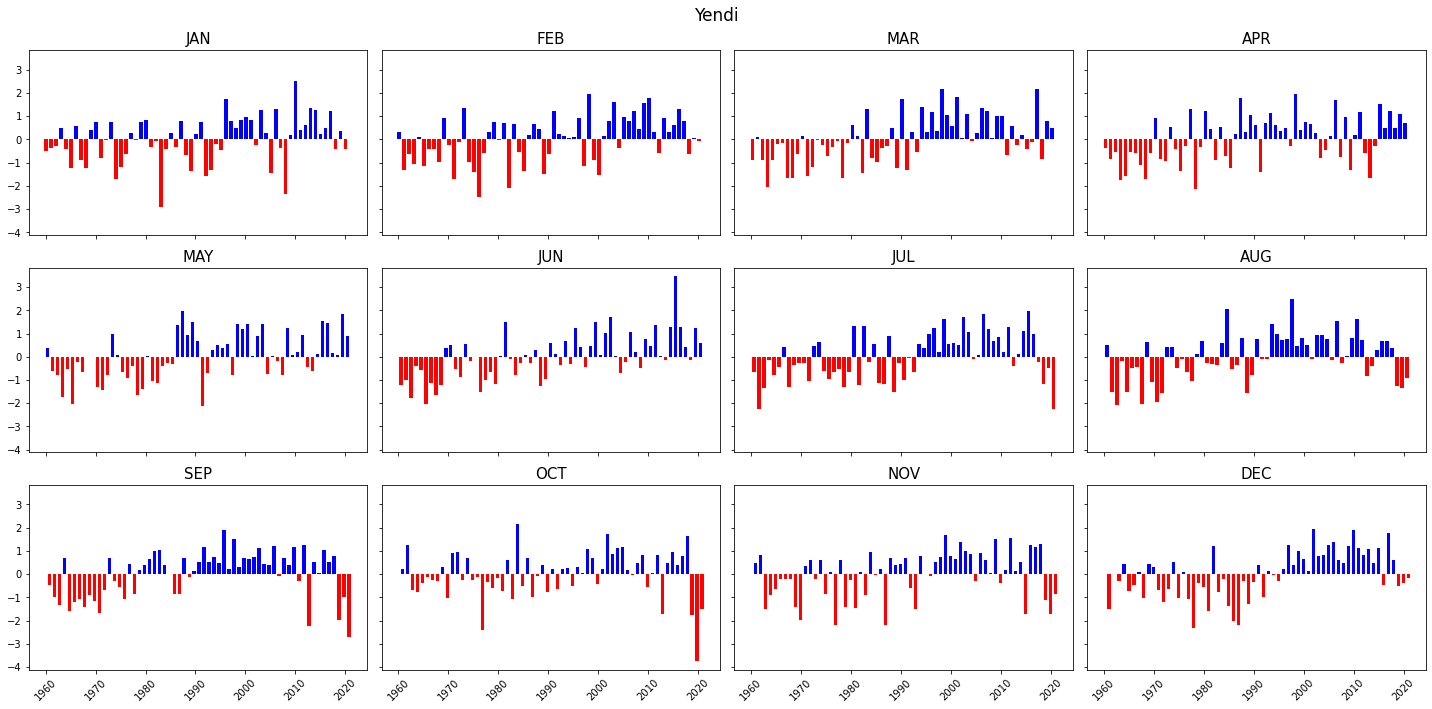

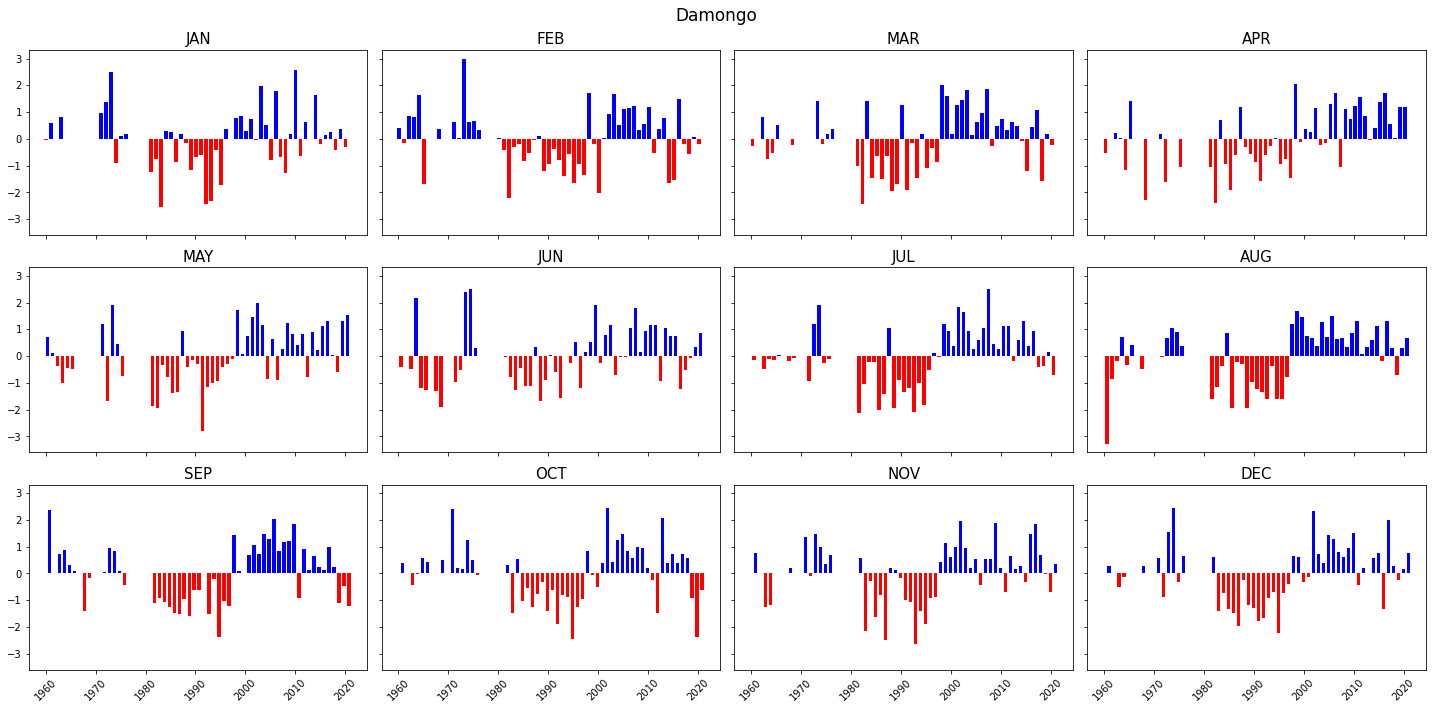

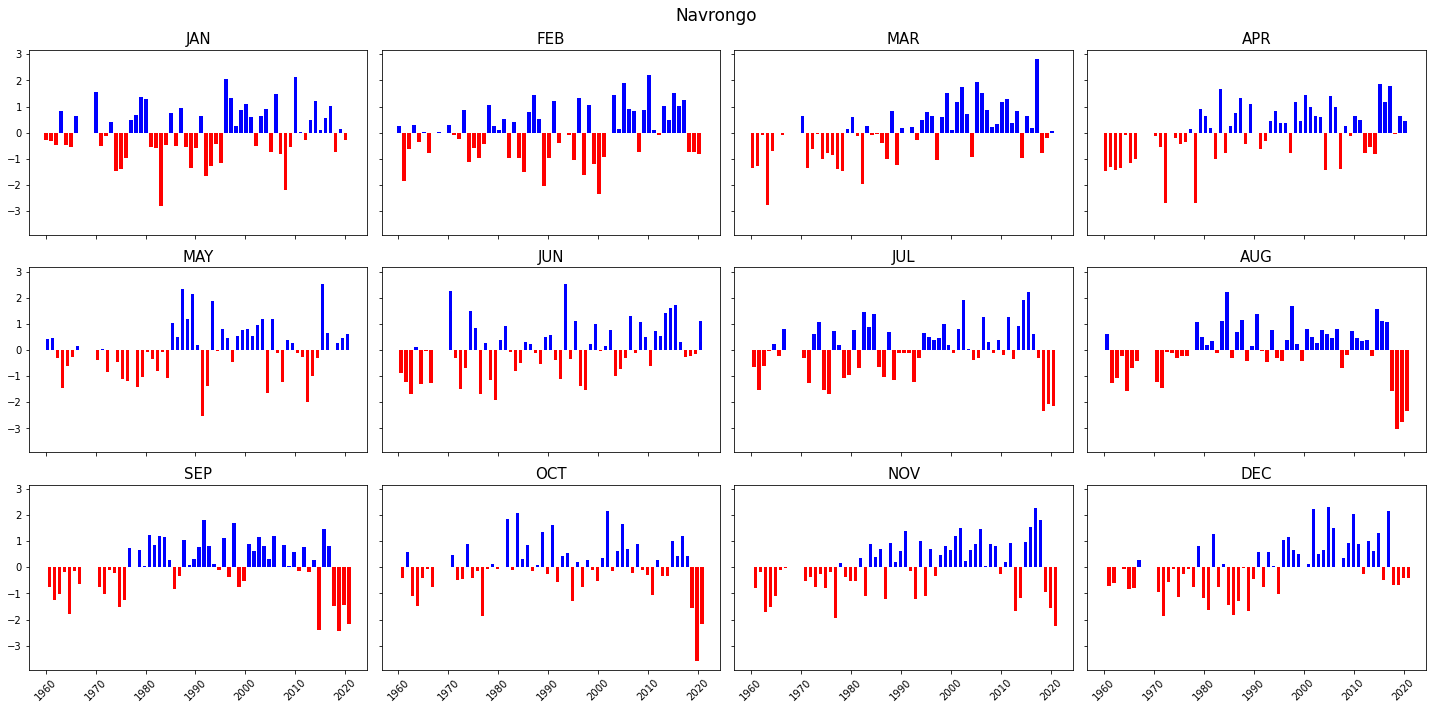

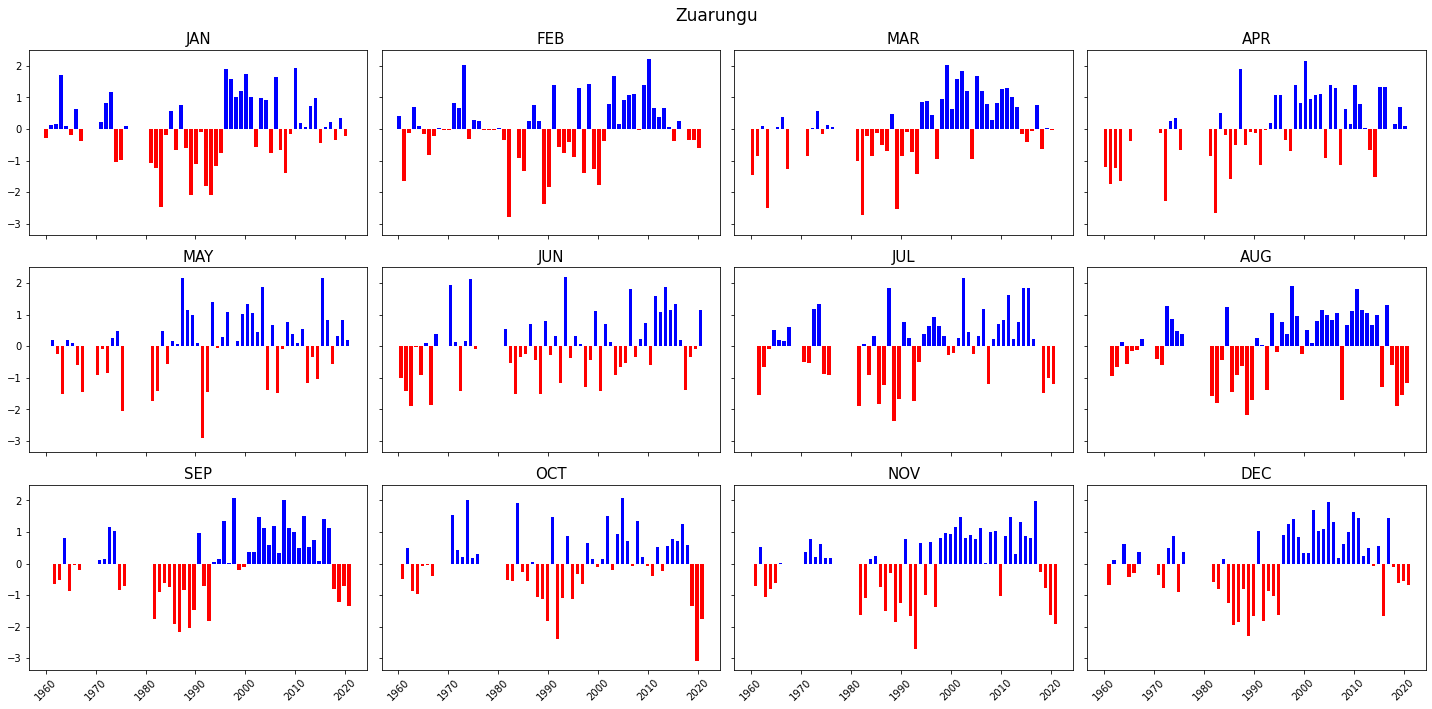

In [27]:
for i, j in enumerate(Tx_cgf):
    data = pd.read_fwf(j, names = ['Year','Month','Temperature'])
    fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20,10), sharex=True, sharey=True)
    ax = axes.flatten()

    # data = pd.read_fwf('/media/kenz/DISK/Data for publications/Data/Zuarungu_1960_2020_mmTn_cgf.txt', names=['Year', 'Month', 'Temperature'])
    data  = SAI(data)
    data = data.groupby(data.index.month)
    for i in range(1,13,1):
        ax[i-1].bar(data.get_group(i).index,data.get_group(i).Temperature, width=250, color=col(data.get_group(i).Temperature,'b','r'))
        ax[i-1].set_title(labels[i-1], fontsize=15)
        date_form = DateFormatter("%Y")
        ax[i-1].xaxis.set_major_formatter(date_form) 
        ax[i-1].tick_params(axis='x', rotation=45)
    plt.suptitle(j[48:-23], fontsize=17)
    # ax[i].set_title(j[44:-23])
    plt.tight_layout()

#### SAI Minimum Temperatures

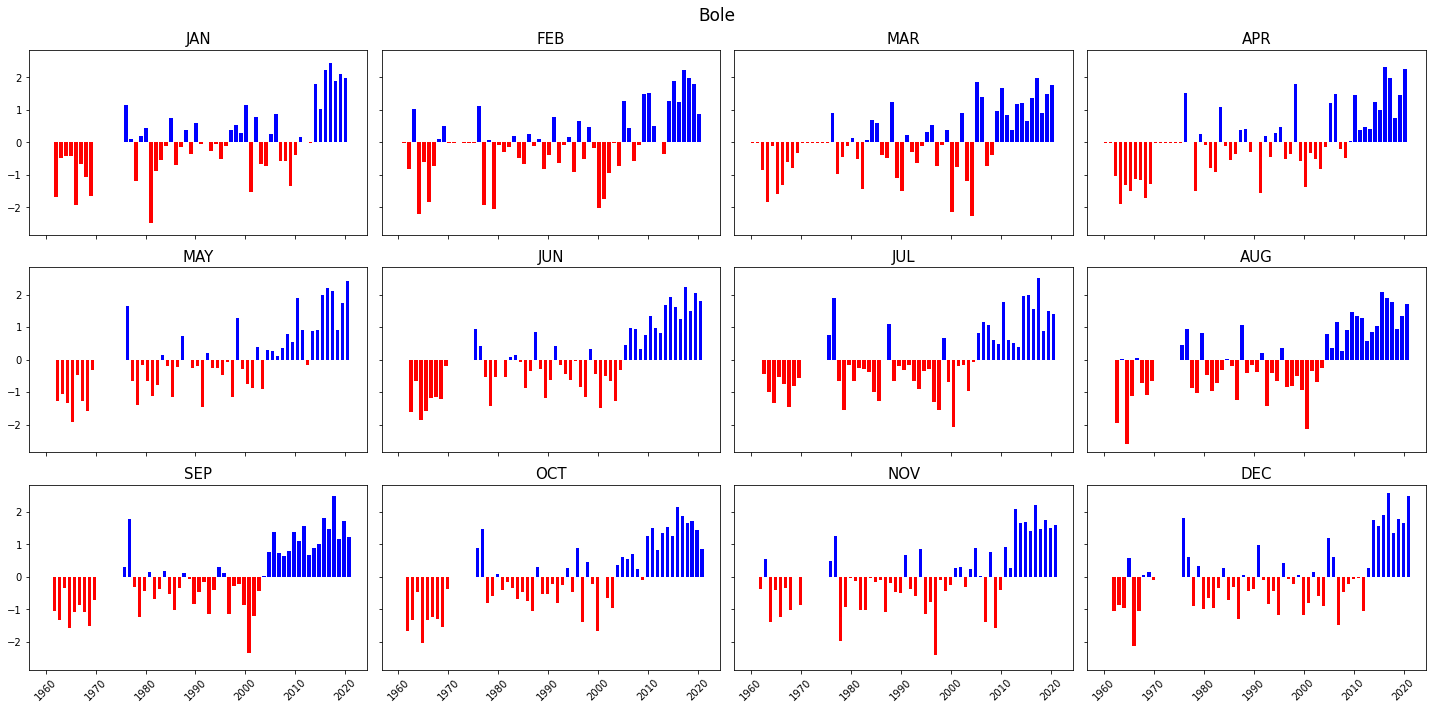

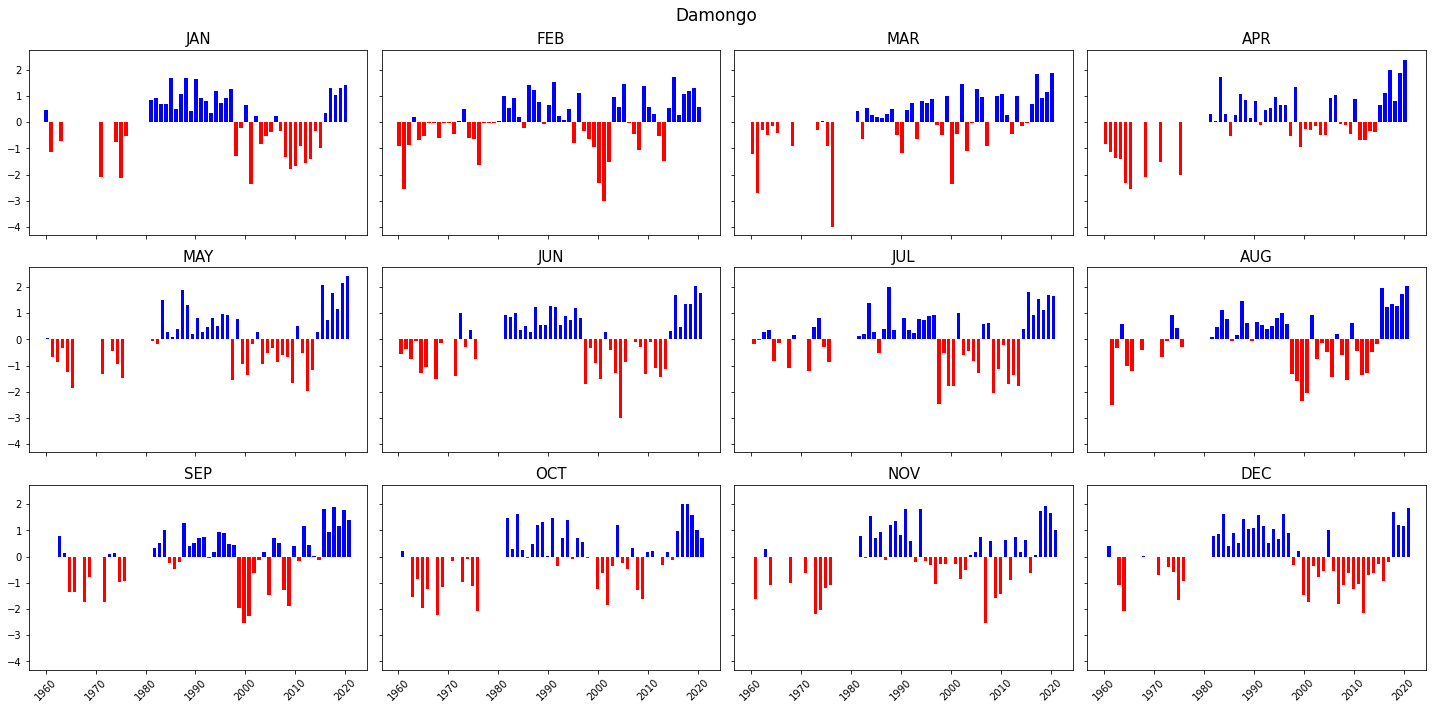

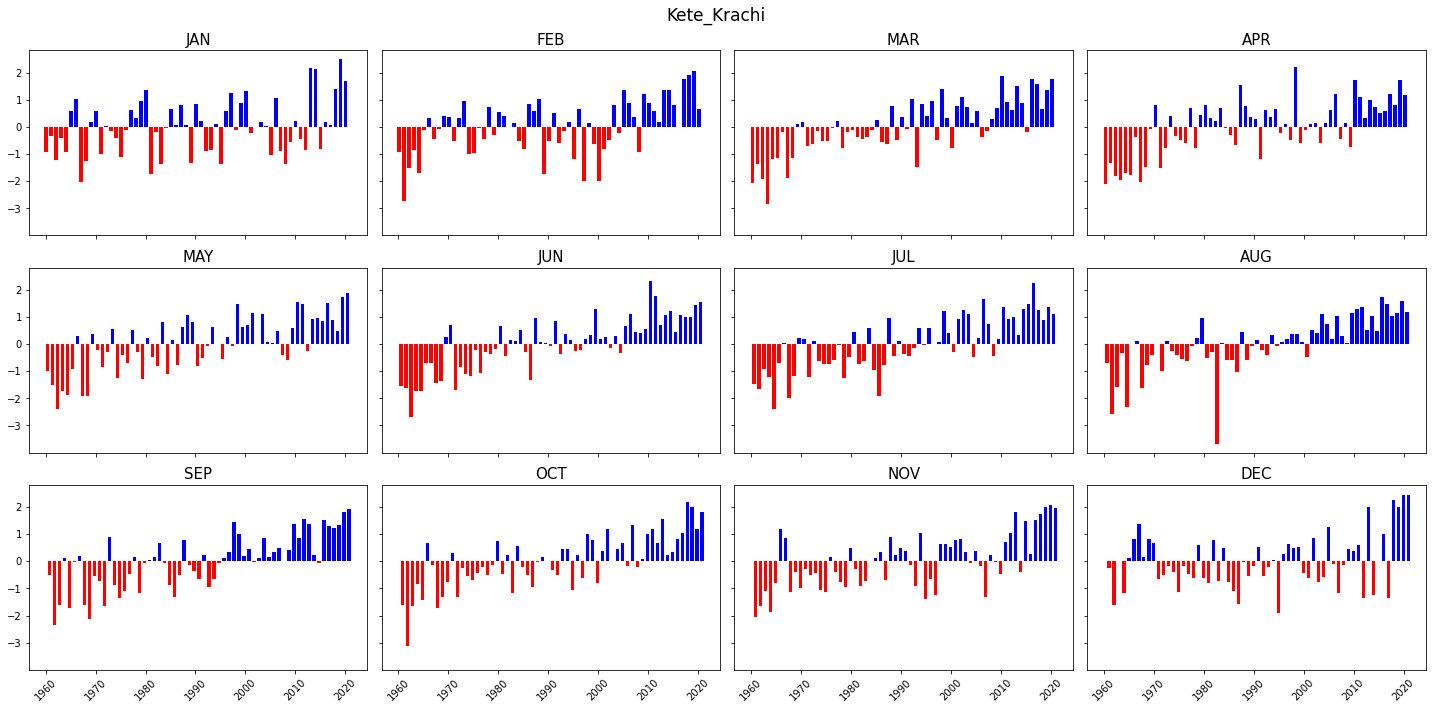

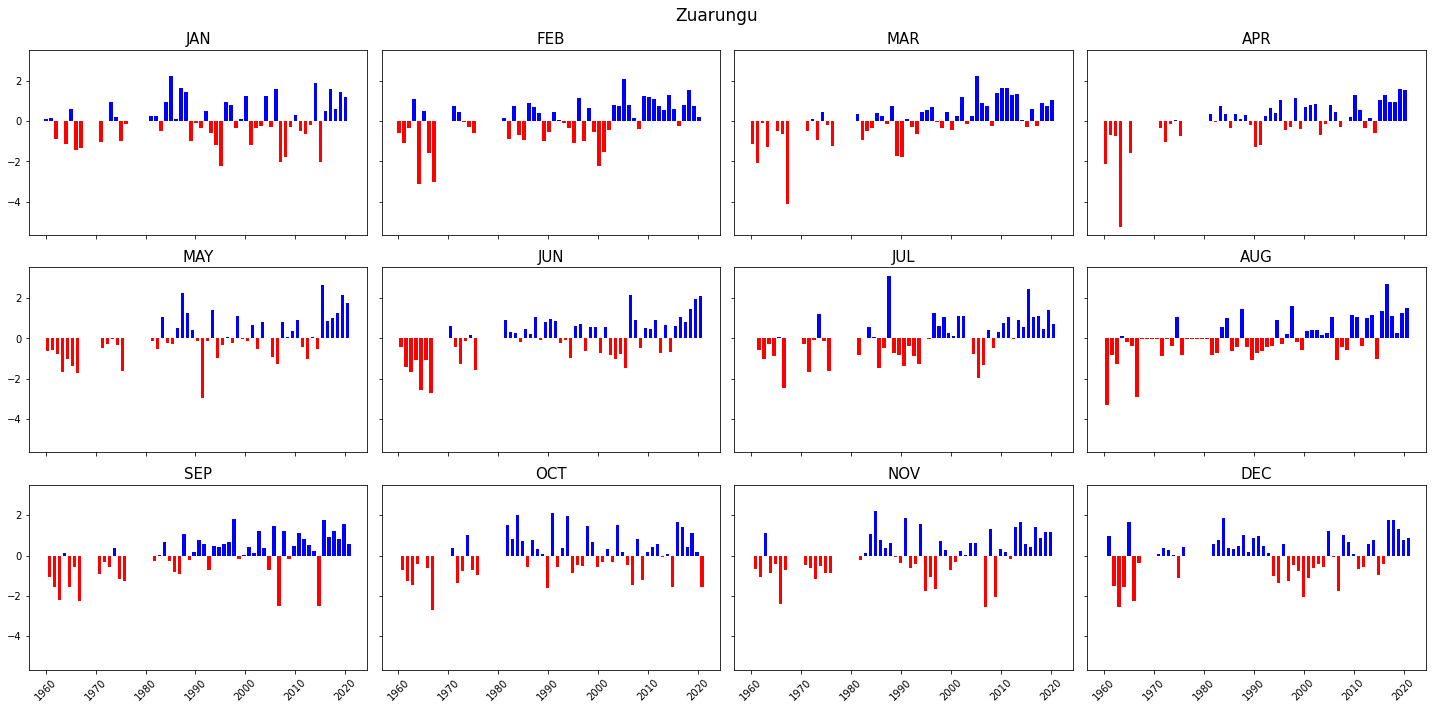

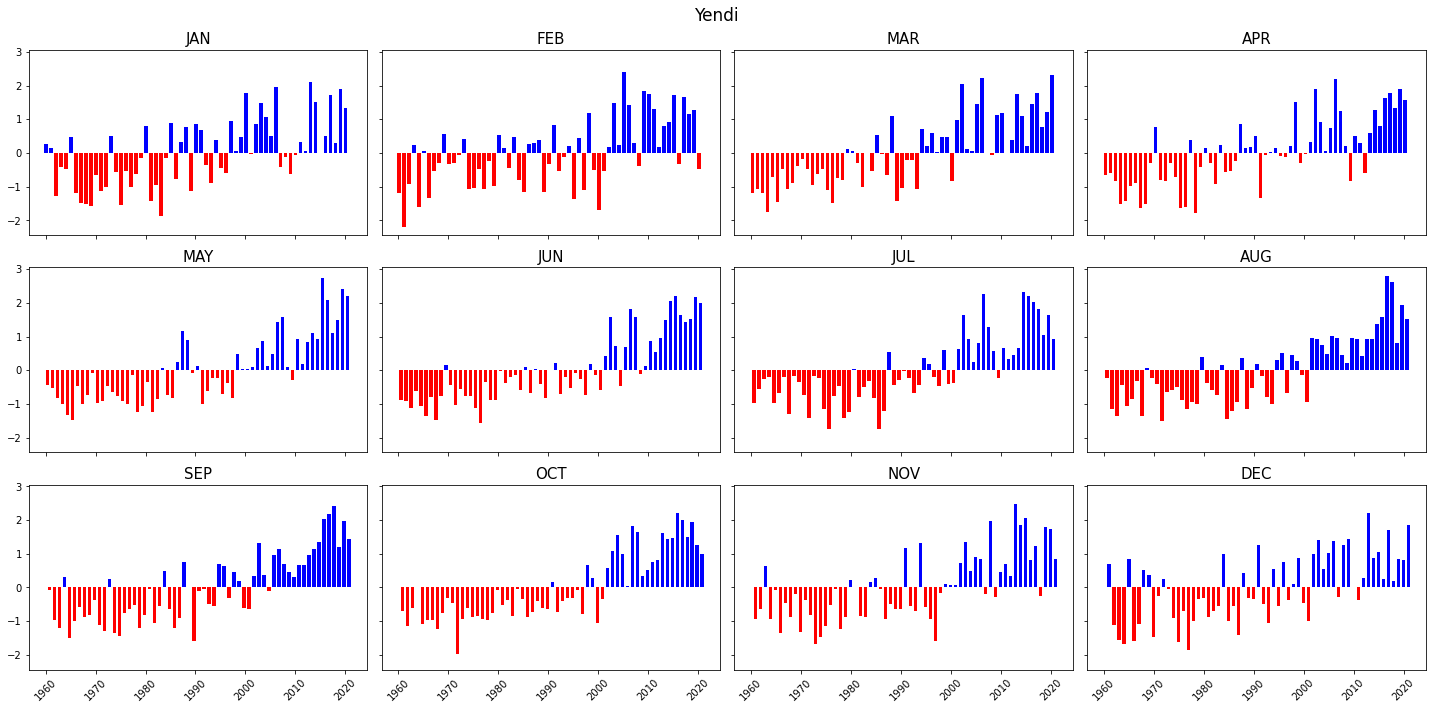

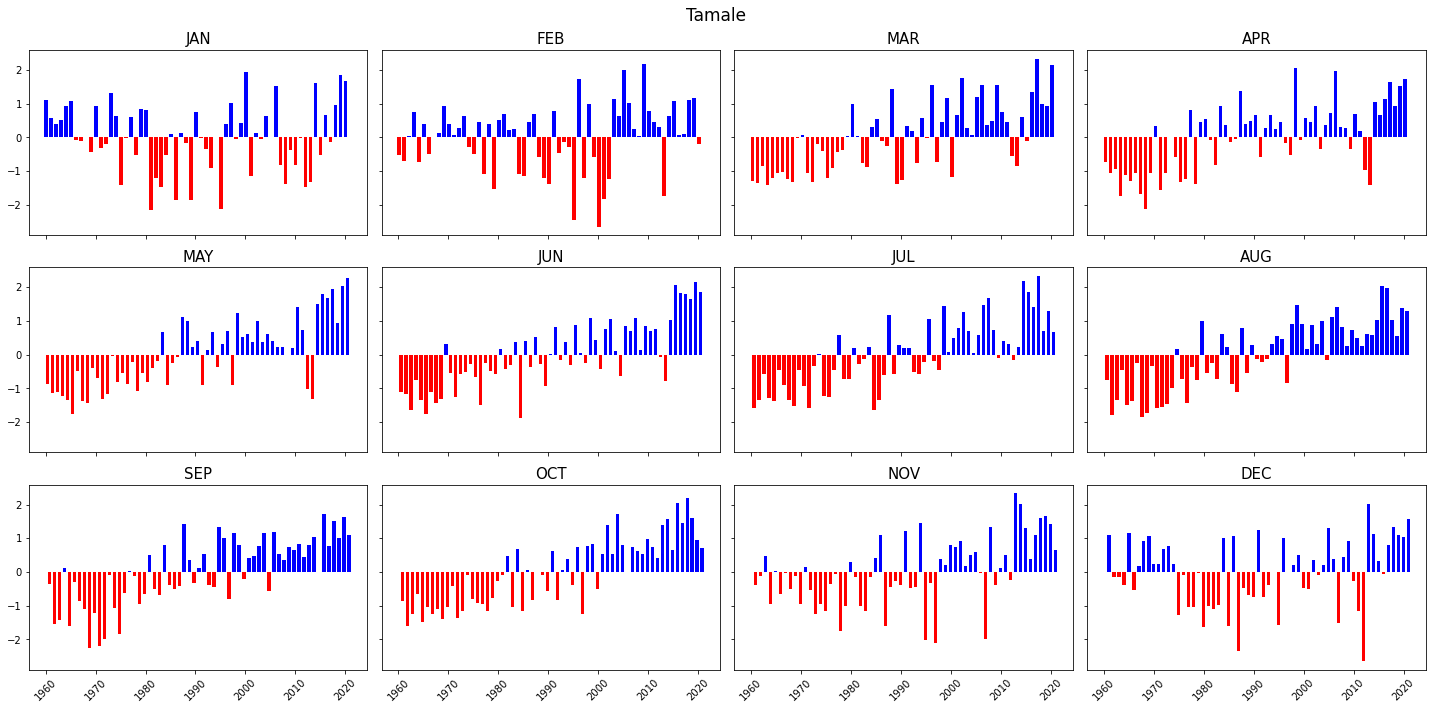

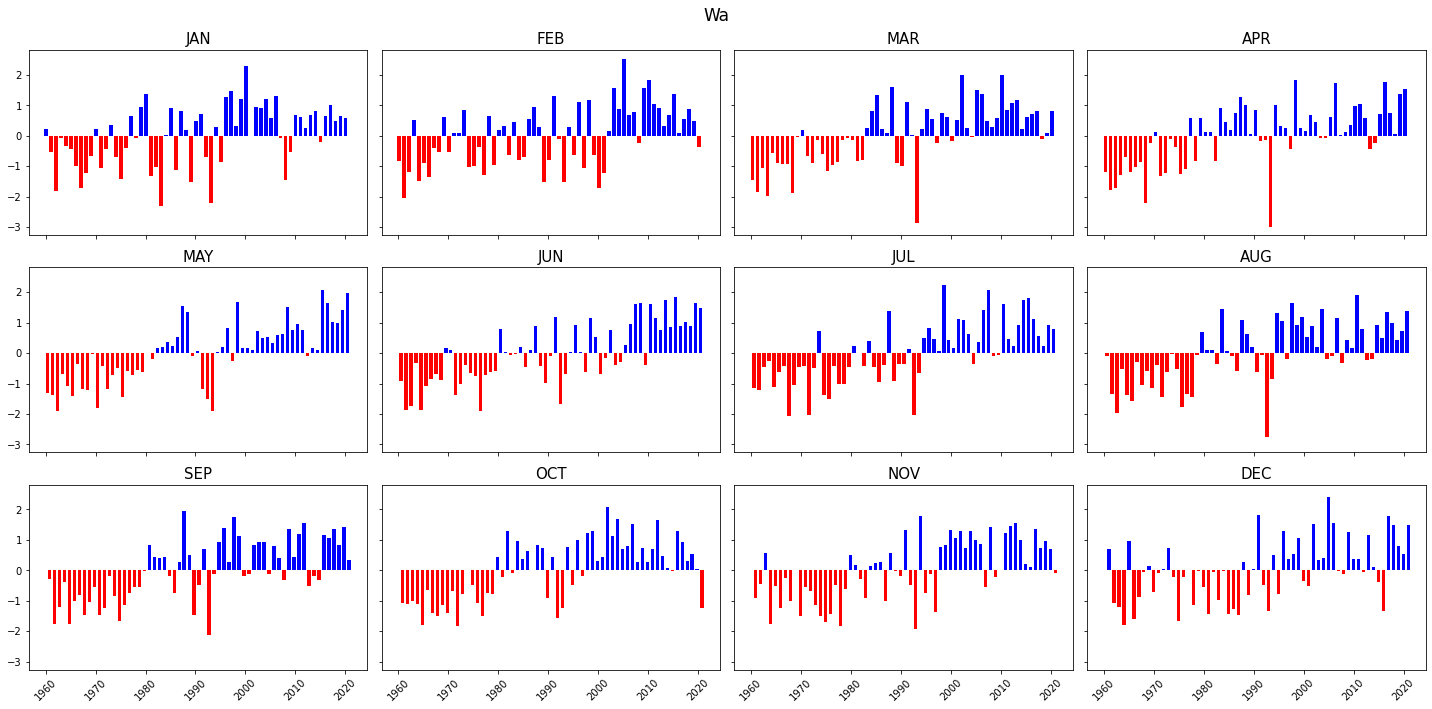

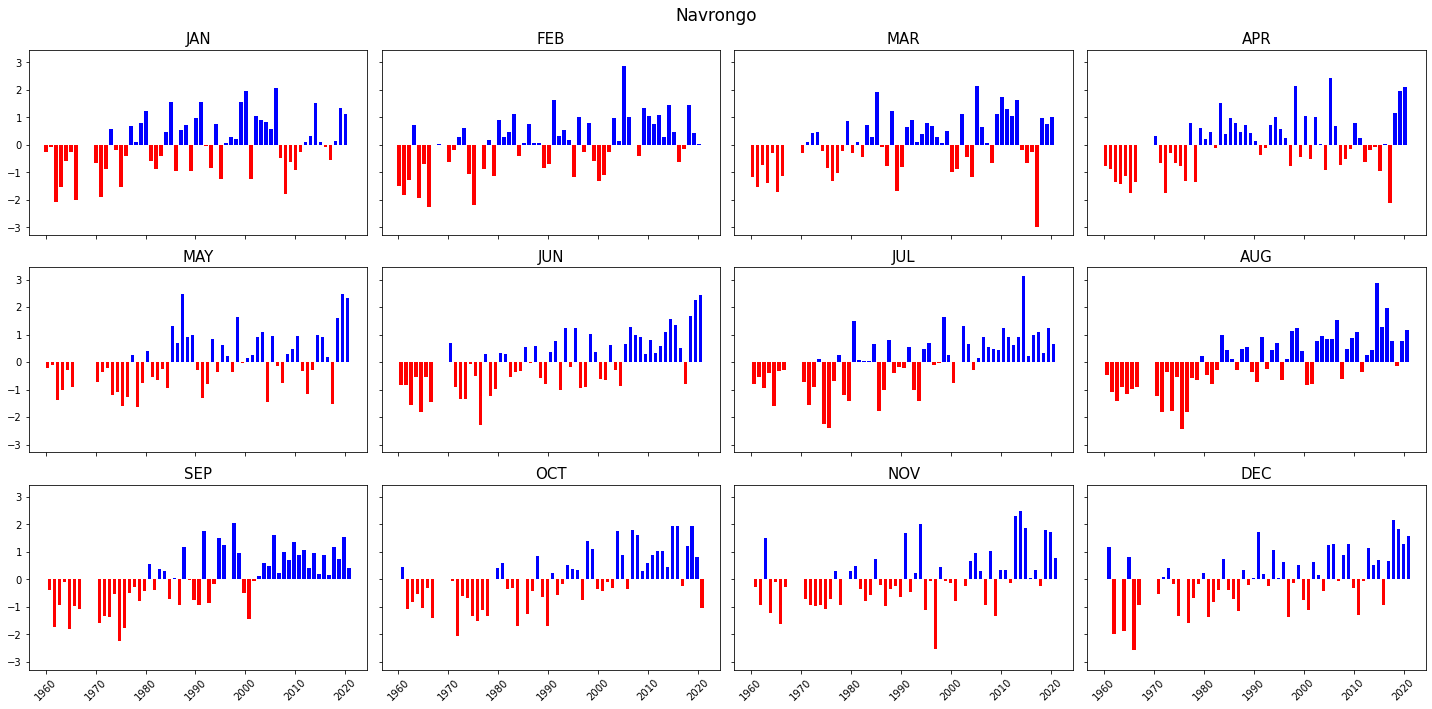

In [28]:
for i, j in enumerate(Tn_cgf):
    data = pd.read_fwf(j, names = ['Year','Month','Temperature'])
    fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20,10), sharex=True, sharey=True)
    ax = axes.flatten()

    data  = SAI(data)
    data = data.groupby(data.index.month)
    for i in range(1,13,1):
        ax[i-1].bar(data.get_group(i).index,data.get_group(i).Temperature, width=250, color=col(data.get_group(i).Temperature,'b','r'))
        ax[i-1].set_title(labels[i-1], fontsize=15)
        date_form = DateFormatter("%Y")
        ax[i-1].xaxis.set_major_formatter(date_form) 
        ax[i-1].tick_params(axis='x', rotation=45)
    plt.suptitle(j[48:-23], fontsize=17)
    # ax[i].set_title(j[44:-23])
    plt.tight_layout()

#### Mean Temperatures

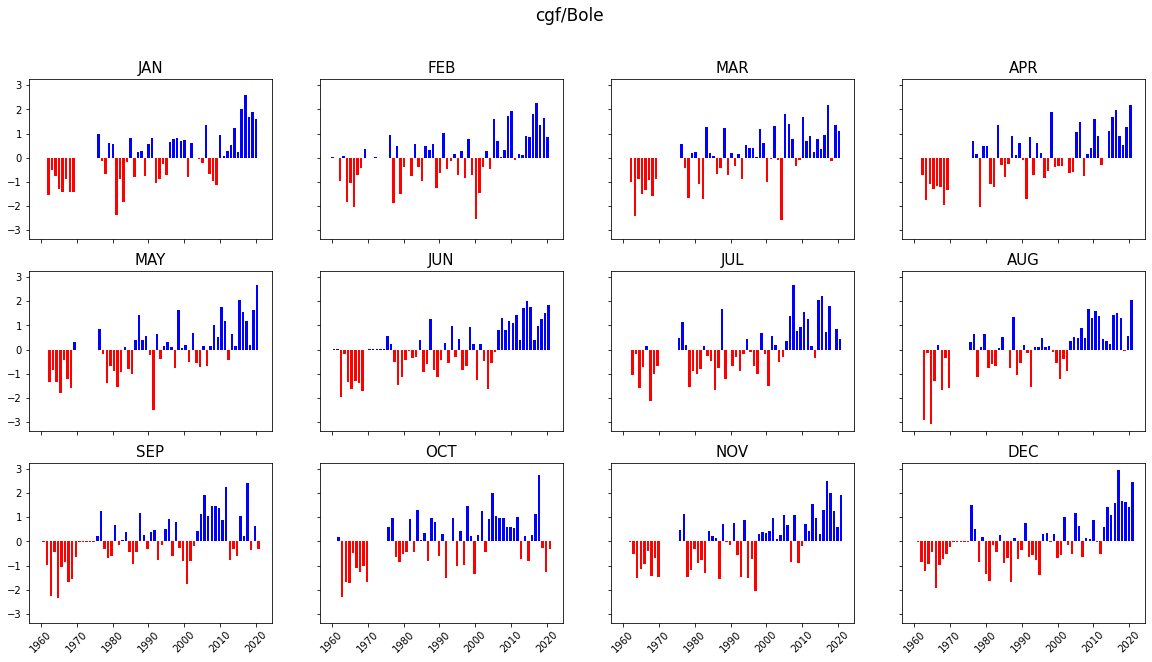

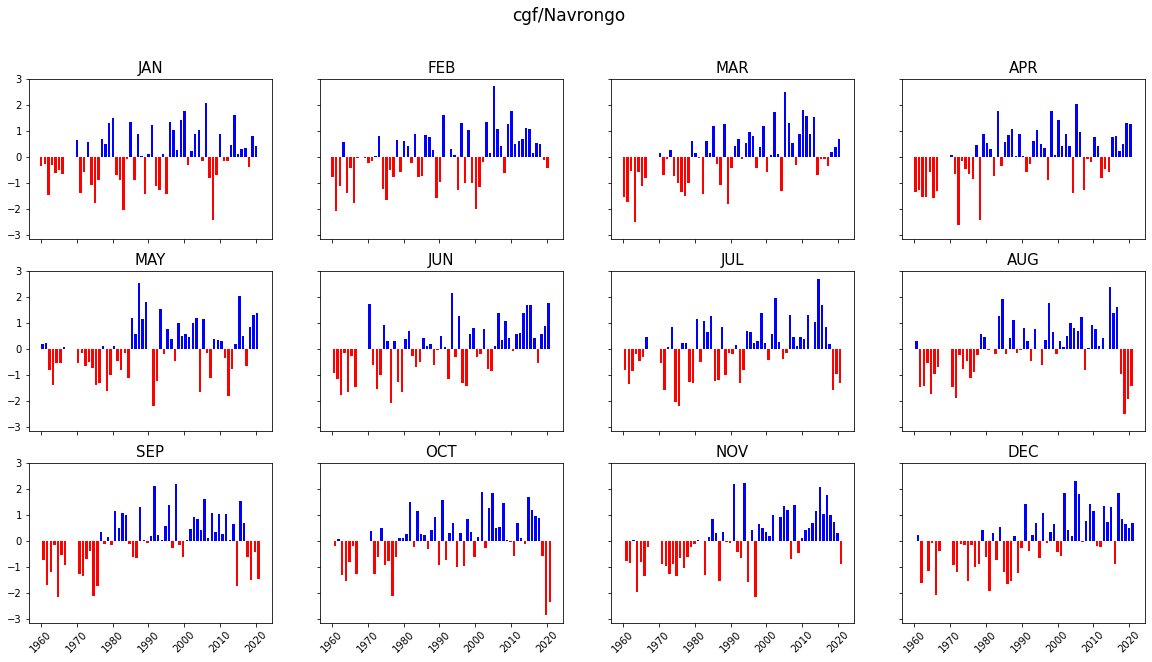

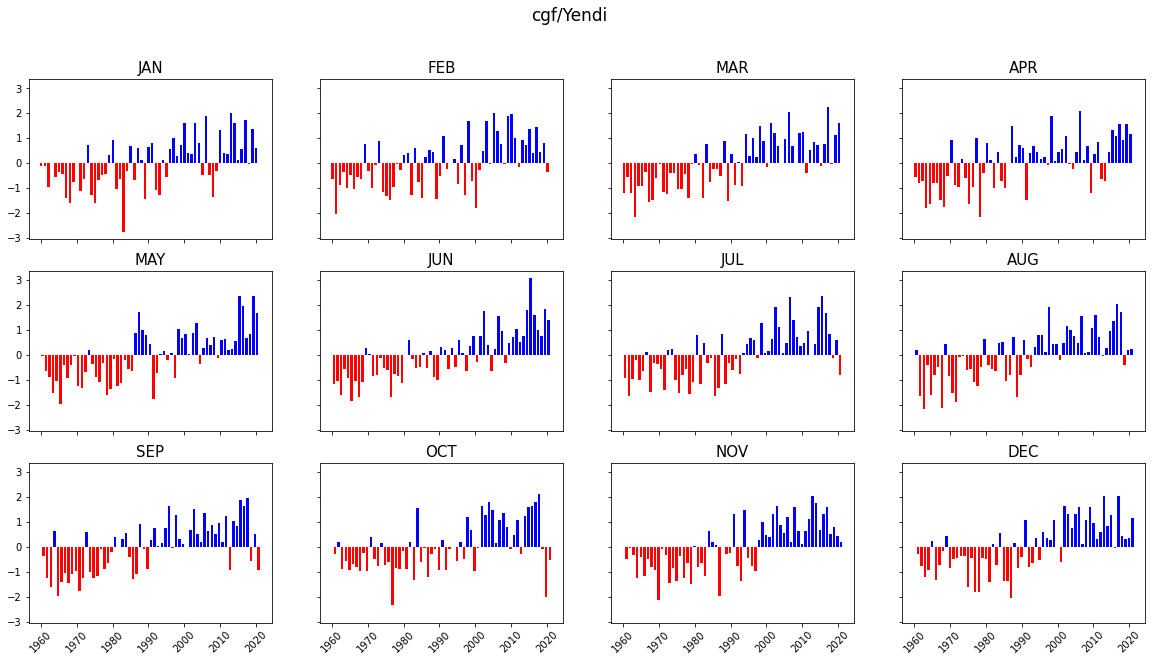

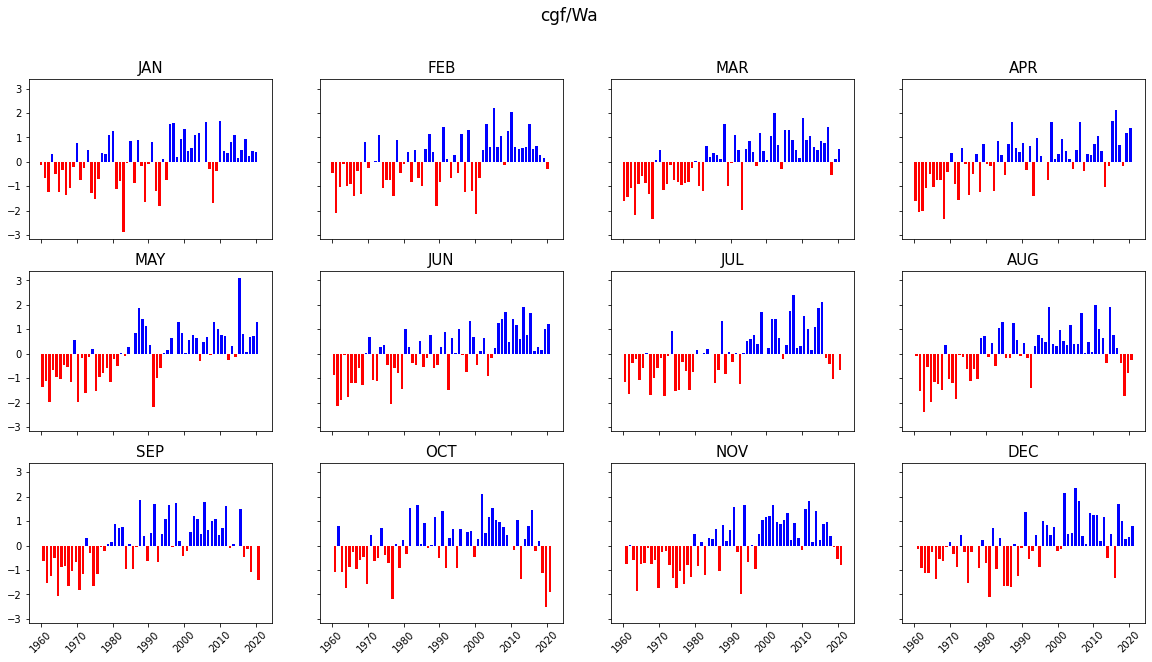

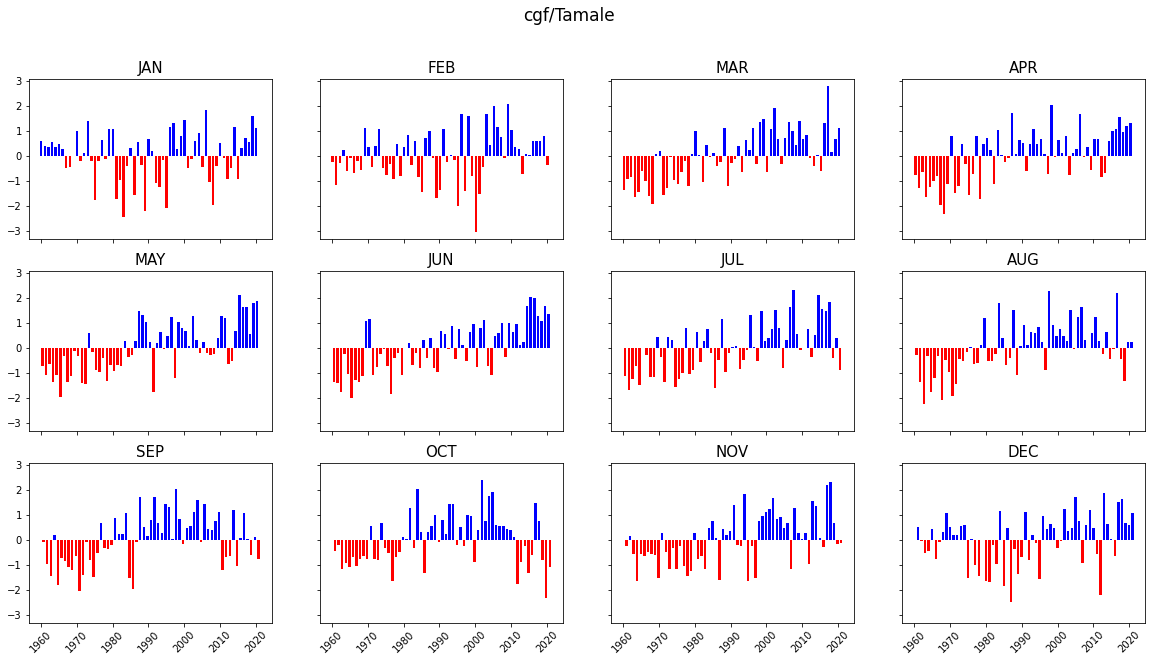

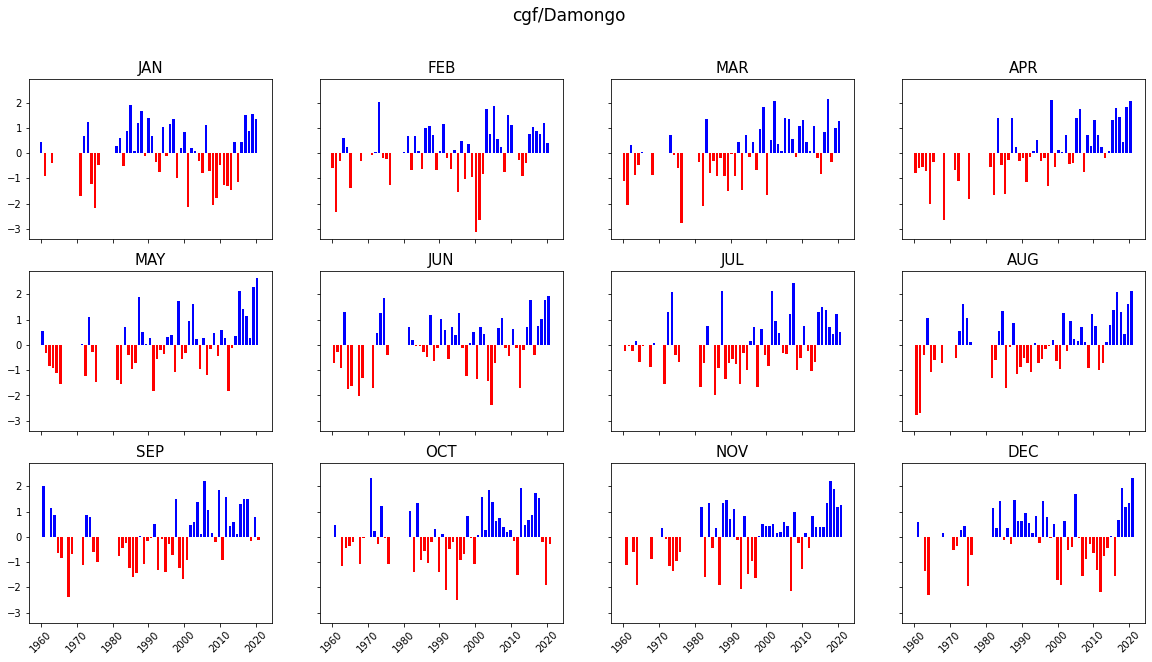

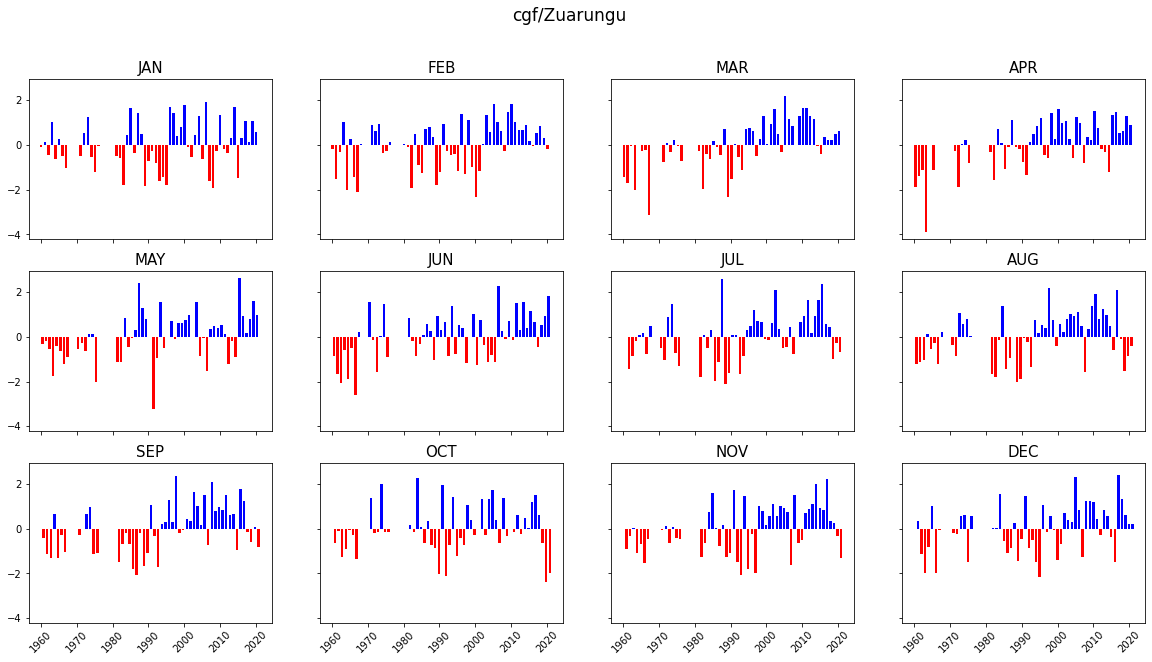

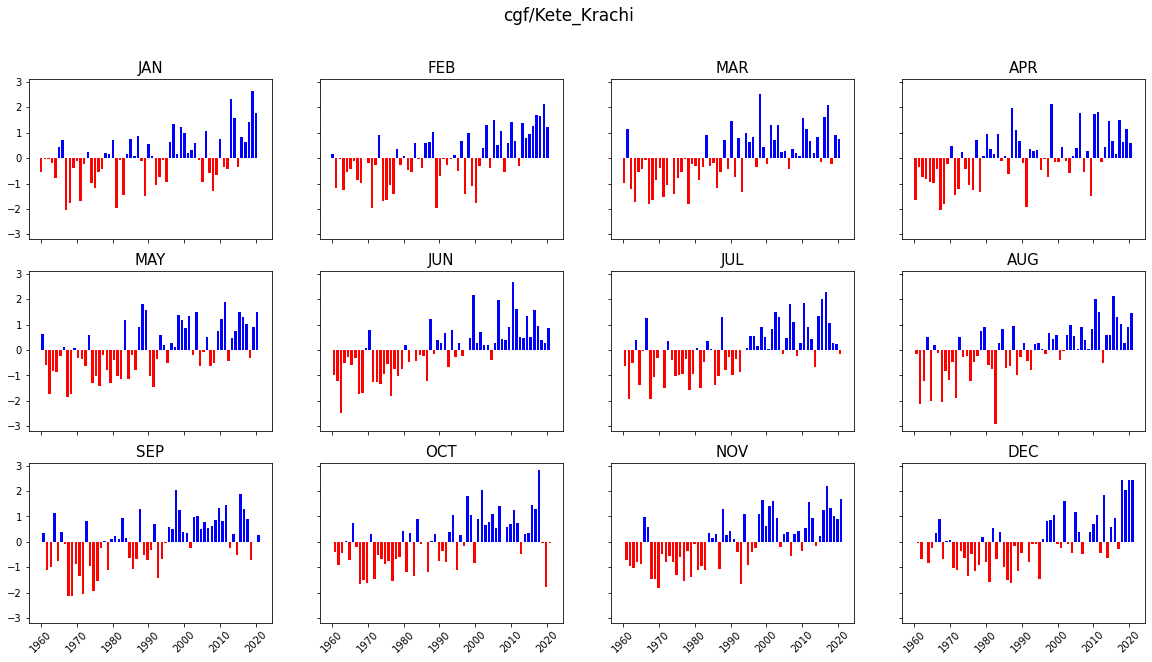

In [29]:
for i, j in enumerate(Tm_cgf):
    data = pd.read_fwf(j, names = ['Year','Month','Temperature'])
    fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20,10), sharex=True, sharey=True)
    ax = axes.flatten()
    data  = SAI(data)
    data = data.groupby(data.index.month)
    for i in range(1,13,1):
        ax[i-1].bar(data.get_group(i).index,data.get_group(i).Temperature, width=250, color=col(data.get_group(i).Temperature,'b','r'))
        ax[i-1].set_title(labels[i-1], fontsize=15)
        date_form = DateFormatter("%Y")
        ax[i-1].xaxis.set_major_formatter(date_form) 
        ax[i-1].tick_params(axis='x', rotation=45)
    plt.suptitle(j[44:-23], fontsize=17)
    # ax[i].set_title(j[44:-23])


#### Scatter

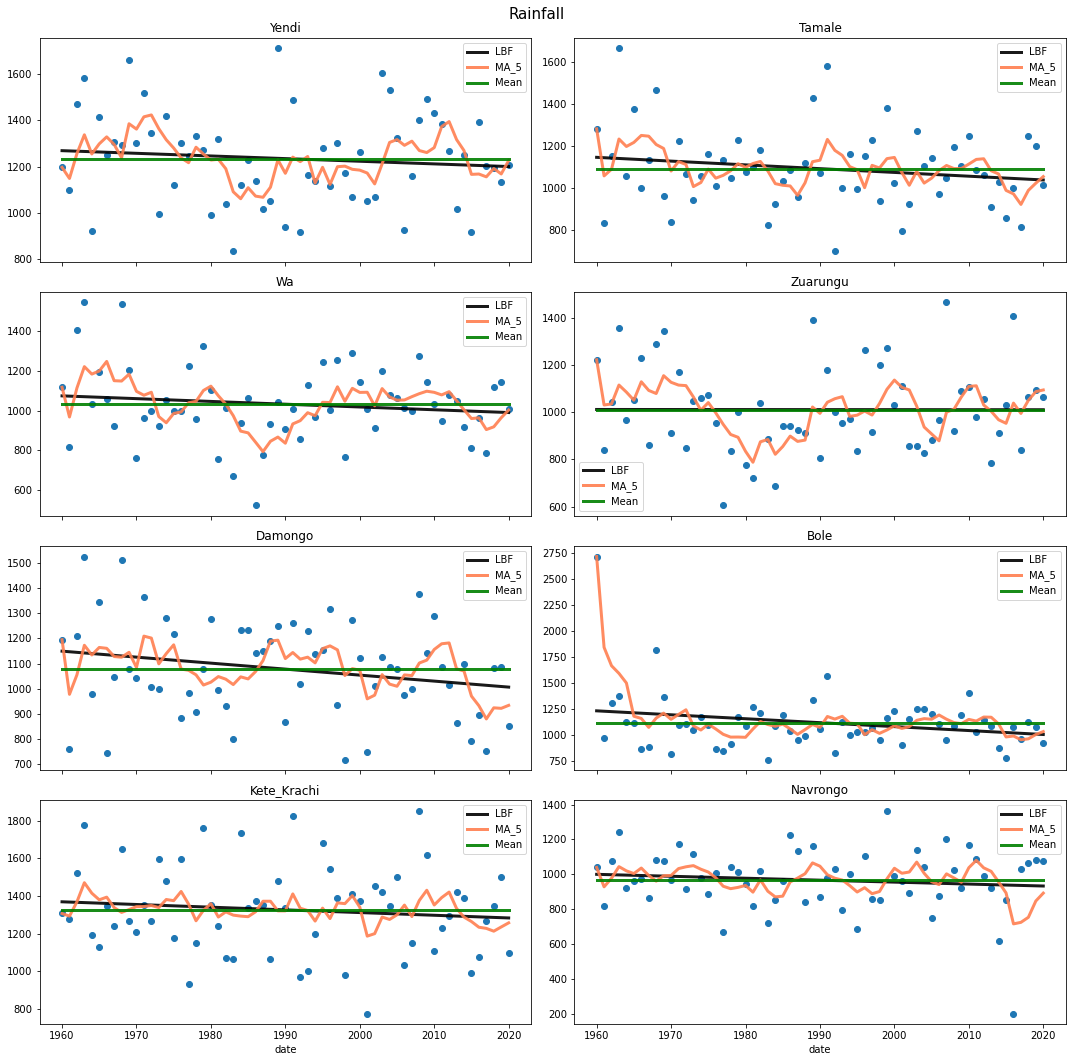

In [37]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,15), sharex=True)
ax = axes.flatten()
colors = ['k', 'coral', 'green']
for i,j in enumerate(RR_cgf):
    ax[i].set_title(j[48:-23])
    data = pd.read_fwf(j, names = ['Year','Month','RR'])
    data  = ARA(data)
    ax[i].scatter(data.index, data)
    a, b = np.polyfit(data.index, data.RR, 1)
    data['LBF']= a*data.index+b
    data['MA_5'] = data.RR.rolling(5, min_periods=1).mean()
    data['Mean']=data.RR.mean()
    data[['LBF','MA_5', 'Mean']].plot(color=colors, linewidth=3, alpha=0.9,ax=ax[i])
plt.suptitle('Rainfall', fontsize=15)
plt.tight_layout()
plt.savefig('Graphs/graphs/scatter_rainfall.JPEG', bbox_inches='tight')

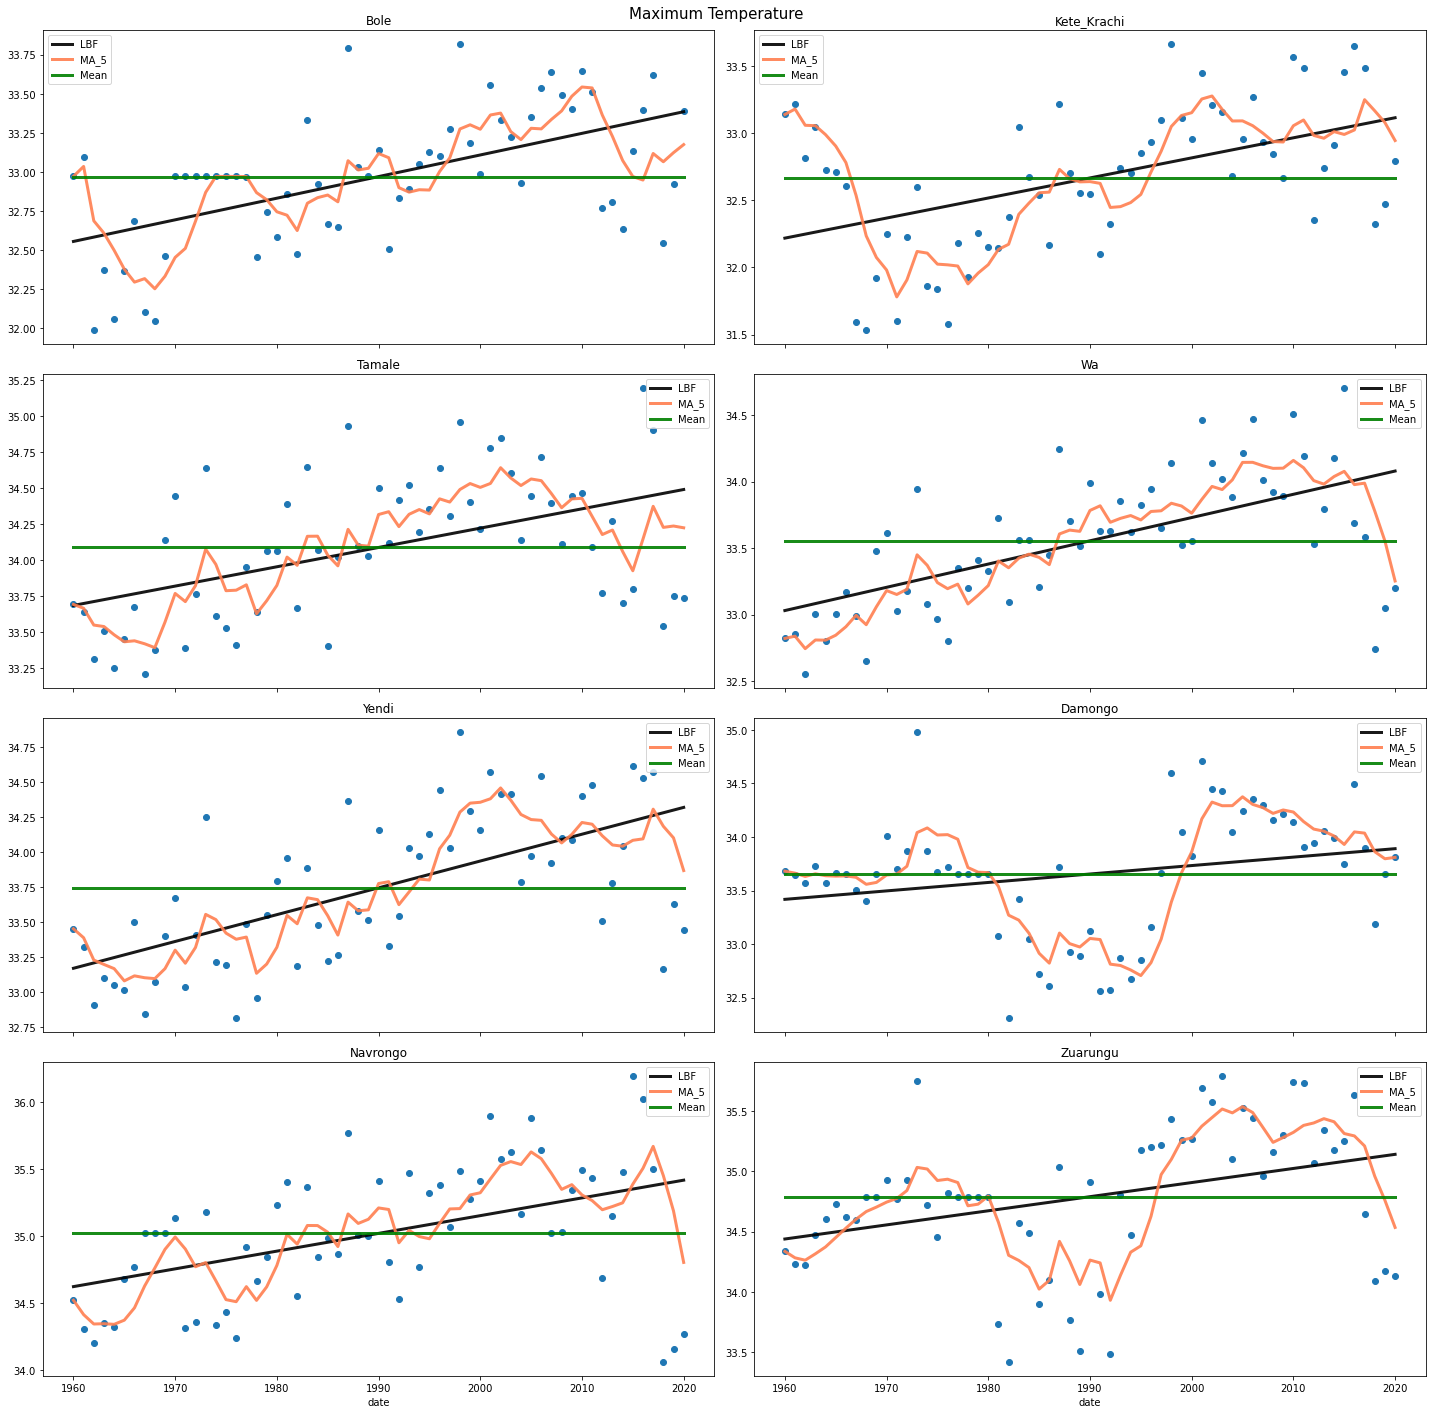

In [38]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (20,20), sharex=True)
ax = axes.flatten()

# for i,j in enumerate(Tx_cgf):
#     data = pd.read_fwf(j, names = ['Year','Month','Temperature'])
#     data  = ATT(data)
#     ax[i].scatter(data.index, data)
#     ax[i].set_title(j[48:-23])
#     ax[i].set_ylim([data.Temperature.min()-0.2,data.Temperature.max()+0.2])
#     a, b = np.polyfit(data.index, data.Temperature, 1)
#     ax[i].plot(data.index, a*data.index+b, color='k')
#     data['SMA_5'] = data.Temperature.rolling(5, min_periods=1).mean()
#     ax[i].plot(data.index, data.SMA_5, color='g')
#     data['Mean']=data.Temperature.mean()
#     ax[i].plot(data.index, data.Mean)
#     # print(data)
colors = ['k', 'coral', 'green']
for i,j in enumerate(Tx_cgf):
    ax[i].set_title(j[48:-23])
    data = pd.read_fwf(j, names = ['Year','Month','Temperature'])
    data  = ATT(data)
    ax[i].scatter(data.index, data)
    a, b = np.polyfit(data.index, data.Temperature, 1)
    data['LBF']= a*data.index+b
    data['MA_5'] = data.Temperature.rolling(5, min_periods=1).mean()
    data['Mean']=data.Temperature.mean()
    data[['LBF','MA_5', 'Mean']].plot(color=colors, linewidth=3, alpha=0.9,ax=ax[i])
plt.suptitle('Maximum Temperature', fontsize=15)
plt.tight_layout()
plt.savefig('Graphs/graphs/scatter_max_temp.JPEG', bbox_inches='tight')

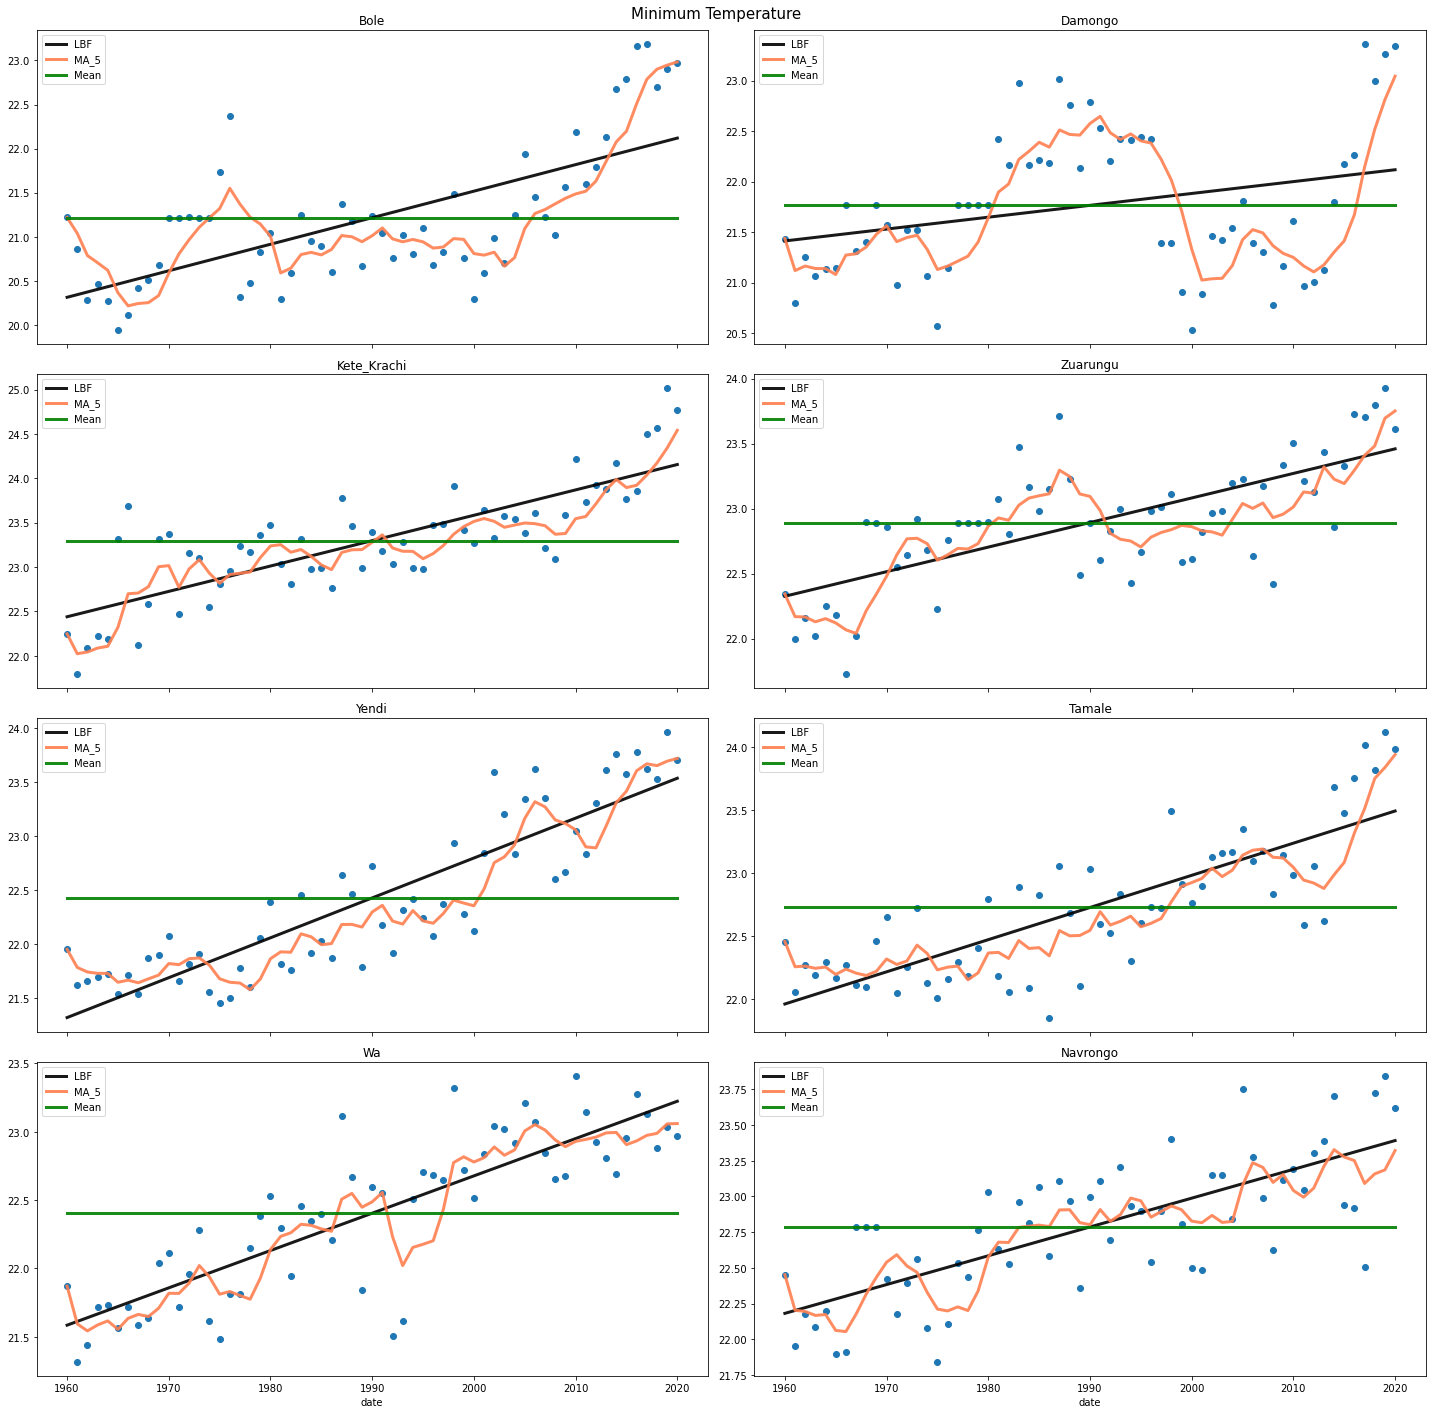

In [ ]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (20,20), sharex=True)
ax = axes.flatten()
colors = ['k', 'coral', 'green']
for i,j in enumerate(Tn_cgf):
    ax[i].set_title(j[48:-23])
    data = pd.read_fwf(j, names = ['Year','Month','Temperature'])
    data  = ATT(data)
    ax[i].scatter(data.index, data)
    a, b = np.polyfit(data.index, data.Temperature, 1)
    data['LBF']= a*data.index+b
    data['MA_5'] = data.Temperature.rolling(5, min_periods=1).mean()
    data['Mean']=data.Temperature.mean()
    data[['LBF','MA_5', 'Mean']].plot(color=colors, linewidth=3, alpha=0.9,ax=ax[i])
plt.suptitle('Minimum Temperature', fontsize=15)
plt.tight_layout()
plt.savefig('Graphs/graphs/scatter_min_temp.JPEG', bbox_inches='tight')

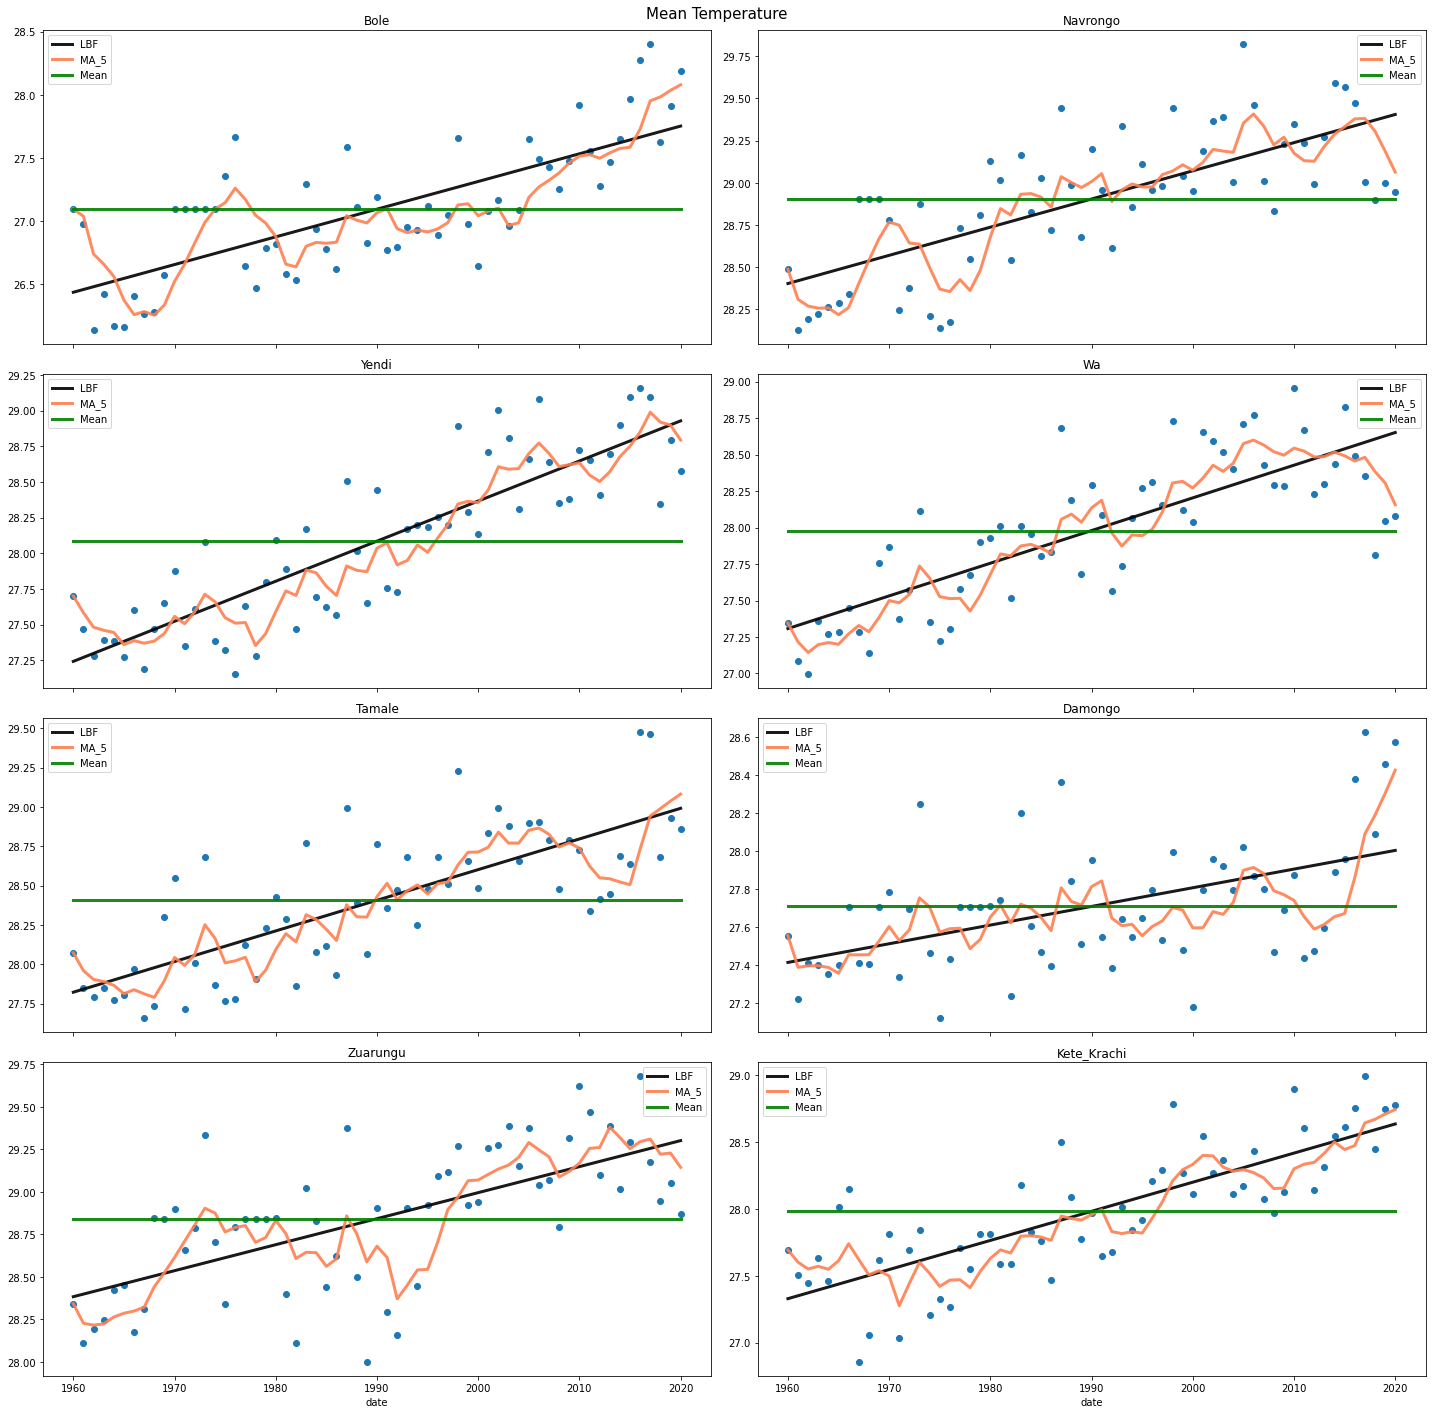

In [40]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (20,20), sharex=True)
ax = axes.flatten()
colors = ['k', 'coral', 'green']
for i,j in enumerate(Tm_cgf):
    ax[i].set_title(j[48:-23])
    data = pd.read_fwf(j, names = ['Year','Month','Temperature'])
    data  = ATT(data)
    ax[i].scatter(data.index, data)
    a, b = np.polyfit(data.index, data.Temperature, 1)
    data['LBF']= a*data.index+b
    data['MA_5'] = data.Temperature.rolling(5, min_periods=1).mean()
    data['Mean']=data.Temperature.mean()
    data[['LBF','MA_5', 'Mean']].plot(color=colors, linewidth=3, alpha=0.9,ax=ax[i])
plt.suptitle('Mean Temperature', fontsize=15)
plt.tight_layout()
plt.savefig('Graphs/graphs/scatter_mean_temp.JPEG', bbox_inches='tight')

In [ ]:
p=pd.read_fwf('/media/kenz/DISK/Data for publications/stevecgf/Kete_Krachi_1960_2020_mmTx_cgf.txt', names=['q','w','Temperature'])
# t=p.T
o=ATT(p)
o